In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("Amikacin has minimum dosage of 100mg")

for tok in doc:
  print(tok.text, "...", tok.dep_)

Amikacin ... nsubj
has ... ROOT
minimum ... amod
dosage ... dobj
of ... prep
100 ... nummod
mg ... pobj


In [2]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [3]:
import codecs
def readfile(file):
 fp = codecs.open(file,"rU", encoding="utf8",errors='ignore')
 text = fp.read()
 return text



In [4]:
trainpath="D:\\model\\Training data\\total1333.txt"                                                        
"""traindata=readfile(trainpath)
dataX=[]
dataY=[]
news=traindata.split("\n")
for line in news:
    line=line.strip()
    feature,label=line.split(":",2)
    dataX.append(feature)
    dataY.append(label)

#print(neofax)
chil=str(dataX)
from nltk.tokenize import sent_tokenize
sent=(sent_tokenize(chil))
print(sent)
"""
trainpath="D:\\model\\Training data\\total1333.txt"                                                        
traindata=readfile(trainpath)
news=traindata.split("\n")
from nltk.tokenize import sent_tokenize
sent=(sent_tokenize(str(news)))
print(sent)


["['Micormedex NeoFax Essentials 2014 Table of Contents\\r', 'Title Acetaminophen \\r', '===Dose===  ==Intravenous== Preterm infants 32 weeks postmenstrual age or older: 10 mg/kg/dose IV every 6 hours as needed or around-the-clock.\\r', '\\r', ' May consider a 20 mg/kg loading dose .\\r', ' as needed or around the clock for pain or fever .\\r', '\\r', ' ==Oral== Preterm infants less than 32 weeks Postmenstrual Age: 20 to 25 mg/kg orally; then 12 to 15 mg/kg/dose every 12 hours as needed or around-the-clock.\\r', '\\r', ' Preterm infants greater than or equal to 32 weeks Postmenstrual Age: 20 to 25 mg/kg orally; then 12 to 15 mg/kg/dose every 8 hours as needed or around-the-clock.\\r', '\\r', ' Term infants: 20 to 25 mg/kg orally; then 12 to 15 mg/kg/dose every 6 hours as needed or around-the-clock.\\r', '\\r', ' ==Rectal== Preterm infants less than 32 weeks Postmenstrual Age: 30 mg/kg rectally; then 12 to 18 mg/kg/dose every 12 hours as needed or around-the-clock.\\r', '\\r', ' Preterm

In [5]:
def remove_punctuations(tokens):
    table = str.maketrans('', '', string.punctuation) #removed punctuations from the tokens
    ptokens = [w.translate(table) for w in tokens]     #bible-believer: biblebeliever
    return ptokens
def remove_blank_tokens(tokens):
    non_blank_tokens = [s for s in tokens if s]
    return non_blank_tokens
from nltk.stem import WordNetLemmatizer


In [6]:
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    words = [t for t in tokens if not t in stop_words]
    return words

def lametizer(tokens):
    lemmatizer = WordNetLemmatizer() 
    lematized_tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return lematized_tokens

In [7]:
from nltk.stem import PorterStemmer 

def stemmer(tokens):
    pr = PorterStemmer() 
    stemmed_tokens = [pr.stem(t) for t in tokens]
    return stemmed_tokens


In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
import string

def fun(sentence):
  tokens = word_tokenize(sentence)
  ptokens=remove_punctuations(tokens)
  btokens=remove_blank_tokens(ptokens)
  simple_tokens=remove_stopwords(btokens)
  lame_tokens=lametizer(simple_tokens)
  stemmed_tokens = stemmer(lame_tokens)
  fstemmed_tokens=remove_blank_tokens(stemmed_tokens)
  return(fstemmed_tokens)

for sentence in sent:
    sentence=fun(sentence)
    #print(sentence)
    
for sentence in sent:
    for word in sentence:
     if(sentence=='.'):
        sent.remove(word)
     if(sentence==','):
        sent.remove(word)
     if(sentence==':'):
        sent.remove(word)
    print(sentence)

['Micormedex NeoFax Essentials 2014 Table of Contents\r', 'Title Acetaminophen \r', '===Dose===  ==Intravenous== Preterm infants 32 weeks postmenstrual age or older: 10 mg/kg/dose IV every 6 hours as needed or around-the-clock.\r', '\r', ' May consider a 20 mg/kg loading dose .\r', ' as needed or around the clock for pain or fever .\r', '\r', ' ==Oral== Preterm infants less than 32 weeks Postmenstrual Age: 20 to 25 mg/kg orally; then 12 to 15 mg/kg/dose every 12 hours as needed or around-the-clock.\r', '\r', ' Preterm infants greater than or equal to 32 weeks Postmenstrual Age: 20 to 25 mg/kg orally; then 12 to 15 mg/kg/dose every 8 hours as needed or around-the-clock.\r', '\r', ' Term infants: 20 to 25 mg/kg orally; then 12 to 15 mg/kg/dose every 6 hours as needed or around-the-clock.\r', '\r', ' ==Rectal== Preterm infants less than 32 weeks Postmenstrual Age: 30 mg/kg rectally; then 12 to 18 mg/kg/dose every 12 hours as needed or around-the-clock.\r', '\r', ' Preterm infants greater 

In [9]:
new_sent=[]
unique_list=[]
for sente in sent:
    sente=sente.strip()
    for sentee in sente:
        if(sentee.isdigit()):
            new_sent.append(sente)
#print(new_sent)

list_set = set(new_sent) 
unique_list = (list(list_set)) 





In [10]:
new=', '.join(map(str, unique_list))
print(new)


\r', 'Title Anidulafungin \r', '===Dose===  Candidiasis Full term infants when intolerant to or resistant to fluconazole or amphotericin B Loading dose: 3 mg/kg IV for 1 dose .\r', '\r', ' ==Administration== Administer by IV Infusion over 60 minutes ; not to exceed 1.1 mg/minute .\r', '\r', ' Candida species are the most common cause of invasive fungal infection in humans; mortality in neonates and children from invasive candidiasis is 10% to 15%.\r', '\r', ' In a single-dose study, less than 1% was recovered in urine and approximately 30% was recovered in the feces over 9 days, of which less than 10% was intact anidulafungin.\r', '\r', ' ==Solution Compatibility== D5W, NS.\r', '.\r', '\r', ' Trissel’s™ 2 Clinical Pharmaceutics Database, version updated on 06/15/2012., ==Terminal Injection Site Incompatibility== Aminophylline, ampicillin, hyaluronidase, micafungin, and sodium bicarbonate.\r', '\r', ' \r', 'Title Emtricitabine \r', '===Dose===  HIV Infection 3 mg/kg orally once daily .\

In [11]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 

In [12]:
import spacy
new_sent=new
new_sent=new_sent.split()
#print(new_sent)

new=' '.join(map(str, new_sent))
#print(new)

from random import sample
import random

new_sent=new
new_sent.strip()

#print(new_sent)
taggedfinal={}

new_sent=new_sent.split(',')
for sent in new_sent:
  
  doc = nlp(sent)
#  for tok in doc:
      #print(tok.text, "...", tok.dep_)
        


The ... det
modern ... amod
rules ... nsubjpass
of ... prep
many ... amod
football ... compound
codes ... pobj
were ... auxpass
formulated ... ROOT
during ... prep
the ... det
mid ... amod
or ... cc
late ... conj
19 ... nummod
century ... pobj


In [13]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text

  return [ent1.strip(), ent2.strip()]

In [14]:
get_entities("The modern rules of many football codes were formulated during the mid or late 19 century")


['modern  rules', '19 football century']

In [15]:
entity_pairs = []
quantifier=[]

for i in tqdm(new_sent):
  entity_pairs.append(get_entities(i))


100%|██████████| 8539/8539 [01:08<00:00, 124.82it/s]


In [16]:
print(entity_pairs)


[['', ''], ['', ''], ['', '1 kg dose'], ['', ''], ['', 'mg IV minute'], ['', ''], ['fungal  mortality', '10  15%.\\r'], ['', ''], ['', 'single dose study'], ['30  %', '9  days'], ['10  %', 'which'], ['', ''], ['', ''], ['', ''], ['', ''], ['', ''], ['', ''], ['', '06/15/2012'], ['', ''], ['', ''], ['', ''], ['', ''], ['', 'bicarbonate.\\r'], ['', ''], ['', ''], ['', ''], ['', 'mg HIV kg'], ['', ''], ['', ''], ['', '24 hemodialysis days.\\r'], ['', ''], ['', 'Uses== HIV-1 infection'], ['antiretroviral  infant', 'mother HIV HIV'], ['immediately  treatment', '3-drug combination regimen.\\r'], ['', ''], ['', ''], ['', 'Approved HIV-1 infection'], ['', 'antiretroviral  agents'], ['', 'birth'], ['', ''], ['', 'reverse  transcriptase'], ['', 'more  lamivudine'], ['', 'similar  activity.\\r'], ['', ''], ['absolute  bioavailability', '75  capsules'], ['', ''], ['relative  bioavailability', '80  capsules'], ['', '3  life'], ['emtricitabine  exposure', '200-mg kg dose.\\r'], ['', ''], ['Emtricita

In [17]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [18]:
get_relation("John completed the task")


'completed'

In [19]:
relations = [get_relation(i) for i in tqdm(new_sent)]


100%|██████████| 8539/8539 [01:08<00:00, 124.05it/s]


In [20]:
print(relations)

['\\r', "'", 'infants', '\\r', 'Administer by', '\\r', 'is', '\\r', "'", 'recovered in', 'was intact', '\\r', 'D5W', 'NS.\\r', '.\\r', '\\r', 'Database', 'version', 'Aminophylline', 'ampicillin', 'hyaluronidase', 'micafungin', 'sodium', '\\r', '\\r', "'", 'Dose===', 'hours.\\r', 'hours.\\r', 'give', '\\r', 'Treatment of', 'in', 'discontinued', '.\\r', '\\r', 'Treatment of', 'in', 'in', '\\r', 'Emtricitabine', 'is', 'NRTI with similar', '\\r', 'is', 'respectively', 'is', "' during", 'was similar', '\\r', 'decreased with', 'correlating with', '\\r', 'absorbed following oral', '\\r', 'is less', '\\r', "'", 'recovered in', 'respectively.\\r', '\\r', 'is', "'", 'noted', "' of", '.\\r', '.\\r', '.\\r', '\\r', 'be necessary', '.\\r', '\\r', '# For', 'obtain', 'monthly for', 'and', '\\r', 'be', 'mL.\\r', '.\\r', '\\r', "'", 'is stable', 'discarded after', '\\r', 'is', 'respectively', 'is', "' of", '\\r', 'be necessary', '\\r', '\\r', 'maleate', "'", 'frequently as', '\\r', 'is uncertain', 'is'

In [21]:
pd.Series(relations).value_counts()


\r                  2459
'                    530
.\r                  332
is                   219
dose                 178
                    ... 
along with             1
receive adequate       1
G3                     1
E.\r                   1
water                  1
Length: 1592, dtype: int64

In [22]:
def get_number1(sent):
  gt=sent
  gt=gt.split(' ')
  for gtoo in gt:
   gtoo=gtoo.split(' ')
   for gtoo1 in range(len(gtoo)):
     if((gtoo[gtoo1]).isdigit()):
       print("mmmmmm",gtoo1)
  return gtoo1,gtoo[gtoo1]


In [23]:
def get_number(sent):
   sent=sent.strip(" ")
   sent=sent.split(" ")
   print(sent)
   for pos in range(len(sent)):
        #print(pos)
        try:
          if (sent[pos].isnumeric()):
           #print("position",pos,"value",sent[pos])
           return pos,sent[pos]
          else:
           return Nil,Nil      
        except:
           pass

    
"""    
  gt=sent
 # gt=gt.split(" ")
  print(gt)
  for gtoo1 in range(len(gt)):
    print(gt[gtoo1])
    if((gt[gtoo1]).isnumeric()):
       #print("mmmmmm",gtoo1)
       print(gtoo1,gt[gtoo1])
    return gtoo1,gt[gtoo1]
"""

'    \n  gt=sent\n # gt=gt.split(" ")\n  print(gt)\n  for gtoo1 in range(len(gt)):\n    print(gt[gtoo1])\n    if((gt[gtoo1]).isnumeric()):\n       #print("mmmmmm",gtoo1)\n       print(gtoo1,gt[gtoo1])\n    return gtoo1,gt[gtoo1]\n'

In [24]:
for i in tqdm(new_sent):
     #print(i)
     try:
       position, number=get_number(i)
       print("position:",position,"number:",number)
     except:
       pass


["\\r'"]
["'Title", 'Anidulafungin', "\\r'"]
["'===Dose===", 'Candidiasis', 'Full', 'term', 'infants', 'when', 'intolerant', 'to', 'or', 'resistant', 'to', 'fluconazole', 'or', 'amphotericin', 'B', 'Loading', 'dose:', '3', 'mg/kg', 'IV', 'for', '1', 'dose', ".\\r'"]
position: 17 number: 3
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'IV', 'Infusion', 'over', '60', 'minutes', ';', 'not', 'to', 'exceed', '1.1', 'mg/minute', ".\\r'"]
position: 7 number: 60
["'\\r'"]
["'", 'Candida', 'species', 'are', 'the', 'most', 'common', 'cause', 'of', 'invasive', 'fungal', 'infection', 'in', 'humans;', 'mortality', 'in', 'neonates', 'and', 'children', 'from', 'invasive', 'candidiasis', 'is', '10%', 'to', "15%.\\r'"]
["'\\r'"]
["'", 'In', 'a', 'single-dose', 'study']
['less', 'than', '1%', 'was', 'recovered', 'in', 'urine', 'and', 'approximately', '30%', 'was', 'recovered', 'in', 'the', 'feces', 'over', '9', 'days']
position: 16 number: 9
['of', 'which', 'less', 'than', '10%', 'was', 'int

In [25]:
def get_quantifier(sent):
  

  
  neww=[]
  
  #############################################################
  docu=nlp(sent)
  for tok in range(len(docu)):
    if ((docu[tok].dep_ == 'amod') & (docu[tok].text=='less')):
              if docu[tok-1].dep_ == 'neg':
                   quantifier='Minimum'
                   print(quantifier,docu[tok-1].text,docu[tok].text)
                   return quantifier
              if docu[tok-1].dep_ !='neg':  
                   quantifier='Maximum'
                   print(quantifier,docu[tok].text)
                   return quantifier

                    


    if ((docu[tok].dep_ == 'amod') & (docu[tok].text=='more')):
               if docu[tok-1].dep_ == 'neg':
                   quantifier='Maximum'
                   print(quantifier,docu[tok-1].text,docu[tok].text)
                   return quantifier

               if docu[tok-1].dep_ !='neg':  
                   quantifier='Minimum'
                   print(quantifier,docu[tok].text)
                   return quantifier



    if(docu[tok].dep_=='acomp'):
         if docu[tok].text=='maximum' or docu[tok].text=='Maximum':
              if docu[tok-1].dep_ == 'neg':
                   quantifier='Minimum'
                   print(quantifier,docu[tok-1].text,docu[tok].text)
                   return quantifier

              if docu[tok-1].dep_ !='neg':  
                   quantifier='Maximum'
                   print(' Maximum',docu[tok].text)
                   return quantifier

  
    if(docu[tok].dep_=='acomp'):
         if docu[tok].text=='minimum':
              if docu[tok-1].dep_ == 'neg':
                   quantifier='Maximum'
                   print(quantifier,docu[tok-1].text,docu[tok].text)
                   return quantifier

              if docu[tok-1].dep_ !='neg':  
                   quantifier='Minimum'
                   print(' Minimum',docu[tok].text)
                   return quantifier

  


    if(docu[tok].dep_=='acomp'):
         if docu[tok].text=='greater':
              if docu[tok-1].dep_ == 'neg':
                   quantifier='Maximum'
                   print(quantifier,docu[tok-1].text,docu[tok].text)
                   return quantifier

              if docu[tok-1].dep_ !='neg':  
                   quantifier='Minimum'
                   print(' Minimum',docu[tok].text)
                   return quantifier

  
    if(docu[tok].dep_=='acomp'):
         if docu[tok].text=='equal':
              if docu[tok-1].dep_ == 'neg':
                   quantifier='Not equal to'
                   print(quantifier,docu[tok-1].text,docu[tok].text)
                   return quantifier

              if docu[tok-1].dep_ !='neg':  
                   quantifier='Exact'
                   print(' Exact',docu[tok].text)
                   return quantifier

  
    if(docu[tok].dep_=='advmod'):
         if docu[tok].text=='exactly':
              if docu[tok-1].dep_ == 'neg':
                   quantifier='Not equal quantifier'
                   print(quantifier,docu[tok-1].text,docu[tok].text)
                   return quantifier

              if docu[tok-1].dep_ !='neg':  
                   quantifier='Exact quantifier'
                   print(' Exact quantifier',docu[tok].text)
                   return quantifier

             
              
      
    if(docu[tok].dep_=='acomp'):
         if docu[tok].text=='exact':
              if docu[tok-1].dep_ == 'neg':
                   quantifier='Not equal'
                   print(quantifier,docu[tok-1].text,docu[tok].text)
                   return quantifier

              if docu[tok-1].dep_ !='neg':  
                   quantifier='Exact'
                   print(' Exact',docu[tok].text)
                   return quantifier

             
    
    ###########################################################



In [26]:
import spacy
nlp = spacy.load('en_core_web_sm')

maximum=['Maximum','maximum','less than','no greater than','not to exceed','no more than']
minimum=['Minimum','greater than','atleast','minimum','no lesser than','more than']
equal=['equal to','exact']

tt='My age is not exactly 7'
quantifier=get_quantifier(tt)
print(quantifier)
tt1=nlp(tt)
for tok1 in tt1:
      print(tok1.text, "...", tok1.dep_)




Not equal quantifier not exactly
Not equal quantifier
My ... poss
age ... nsubj
is ... ROOT
not ... neg
exactly ... advmod
7 ... attr


In [31]:
quantifier=[]
number=[]
for i in tqdm(new_sent):
    #print(i)
    quantifier.append(get_quantifier(i))
    try:
     position, num=get_number(i)
     number.append(num)

    except:
     pass

print(quantifier)
print(number)

  0%|          | 0/8539 [00:00<?, ?it/s]

["\\r'"]
["'Title", 'Anidulafungin', "\\r'"]
["'===Dose===", 'Candidiasis', 'Full', 'term', 'infants', 'when', 'intolerant', 'to', 'or', 'resistant', 'to', 'fluconazole', 'or', 'amphotericin', 'B', 'Loading', 'dose:', '3', 'mg/kg', 'IV', 'for', '1', 'dose', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'IV', 'Infusion', 'over', '60', 'minutes', ';', 'not', 'to', 'exceed', '1.1', 'mg/minute', ".\\r'"]
["'\\r'"]
["'", 'Candida', 'species', 'are', 'the', 'most', 'common', 'cause', 'of', 'invasive', 'fungal', 'infection', 'in', 'humans;', 'mortality', 'in', 'neonates', 'and', 'children', 'from', 'invasive', 'candidiasis', 'is', '10%', 'to', "15%.\\r'"]


  0%|          | 7/8539 [00:00<02:30, 56.60it/s]

["'\\r'"]
["'", 'In', 'a', 'single-dose', 'study']
Maximum less
['less', 'than', '1%', 'was', 'recovered', 'in', 'urine', 'and', 'approximately', '30%', 'was', 'recovered', 'in', 'the', 'feces', 'over', '9', 'days']
Maximum less
['of', 'which', 'less', 'than', '10%', 'was', 'intact', "anidulafungin.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']


  0%|          | 13/8539 [00:00<02:31, 56.17it/s]

["NS.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', 'Database']
['version', 'updated', 'on', '06/15/2012.']
['==Terminal', 'Injection', 'Site', 'Incompatibility==', 'Aminophylline']
['ampicillin']


  0%|          | 20/8539 [00:00<02:26, 57.97it/s]

['hyaluronidase']
['micafungin']
['and', 'sodium', "bicarbonate.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Emtricitabine', "\\r'"]
["'===Dose===", 'HIV', 'Infection', '3', 'mg/kg', 'orally', 'once', 'daily', ".\\r'"]
["'", 'every', '24', "hours.\\r'"]


  0%|          | 28/8539 [00:00<02:19, 61.21it/s]

["'", 'every', '24', "hours.\\r'"]
["'", 'every', '24', 'hours;', 'give', 'dose', 'after', 'hemodialysis', 'on', 'hemodialysis', "days.\\r'"]
["'\\r'"]
["'", '==Uses==', 'Treatment', 'of', 'HIV-1', 'infection']
['in', 'combination', 'with', 'other', 'antiretroviral', 'agents:', 'If', 'an', 'infant', 'is', 'definitively', 'diagnosed', 'with', 'HIV', 'infection', 'while', 'receiving', 'prophylactic', 'treatment', 'for', 'prevention', 'of', 'mother-to-child', 'transmission', 'of', 'HIV']
['prophylactic', 'antiretrovirals', 'should', 'be', 'discontinued', 'immediately', 'and', 'treatment', 'initiated', 'with', 'a', '3-drug', 'combination', "regimen.\\r'"]
["'.\\r'"]


  0%|          | 35/8539 [00:00<02:17, 61.64it/s]

["'\\r'"]
["'", 'Pediatric', 'FDA', 'Approved', 'Indications', 'Treatment', 'of', 'HIV-1', 'infection']
['in', 'combination', 'with', 'other', 'antiretroviral', 'agents']
['in', 'children', 'starting', 'at', 'birth', ".\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Emtricitabine', 'a', 'synthetic', 'nucleoside', 'analog', 'with', 'activity', 'against', 'HIV-1', 'reverse', 'transcriptase', 'and', 'HBV', 'DNA', 'polymerase']
['and', 'is', 'consistently', '4', 'to', '10', 'times', 'more', 'potent', 'than', 'lamivudine']
['the', 'other', 'NRTI', 'with', 'similar', "activity.\\r'"]
["'\\r'"]
["'", 'Mean', 'absolute', 'bioavailability', 'of', 'emtricitabine', 'is', '93%', 'and', '75%', 'for', 'the', 'capsules', 'and', 'the', 'oral', 'solution']
['respectively']
['and', 'the', 'relative', 'bioavailability', 'of', 'the', 'oral', 'solution', 'is', 'approximately', '80%', 'of', 'the', 'capsules', ".\\r'"]


  1%|          | 47/8539 [00:00<01:59, 71.05it/s]

["'", 'during', 'the', 'first', '3', 'months', 'of', 'life']
['emtricitabine', 'exposure', 'was', 'similar', 'to', 'the', 'exposures', 'achieved', 'in', 'patients', '3', 'months', 'to', '17', 'years', 'of', 'age', 'with', 'a', '6', 'mg/kg-dose', 'and', 'adults', 'with', 'a', '200-mg', "dose.\\r'"]
["'\\r'"]
["'", 'Emtricitabine', 'AUC', 'decreased', 'with', 'increasing', 'age', 'over', 'the', 'first', '3', 'months', 'of', 'life']
['correlating', 'with', 'an', 'increase', 'in', 'total', 'body', 'clearance', 'of', 'the', 'drug', ".\\r'"]
["'\\r'"]
["'", 'Rapidly', 'and', 'extensively', 'absorbed', 'following', 'oral', 'administration', 'with', 'peak', 'plasma', 'concentrations', 'occurring', 'at', '1', 'to', '2', 'hours', "post-dose.\\r'"]
["'\\r'"]
["'", 'Protein', 'binding', 'is', 'less', 'than', "4%.\\r'"]
["'\\r'"]
["'", 'Following', 'emtricitabine', 'administration']
['approximately', '86%', 'and', '14%', 'of', 'the', 'dose', 'was', 'recovered', 'in', 'the', 'urine', 'and', 'feces']

  1%|          | 59/8539 [00:00<01:46, 79.71it/s]

["respectively.\\r'"]
["'\\r'"]
["'", 'Half-life', 'is', 'approximately', '12', 'hours', 'in', 'neonates', ".\\r'"]
["'"]
['no', 'safety', 'issues', 'were', 'noted', ".\\r'"]
["'", 'of', "patients.\\r'"]
["'.\\r'"]
["'.\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'KEY:', 'AST', '=', 'aspartate', 'aminotransferase;', 'ALT', '=', 'alanine', 'aminotransferase;', 'BUN', '=', 'blood', 'urea', 'nitrogen', 'CBC', '=', 'complete', 'blood', 'count', '*', 'Baseline', 'may', 'not', 'be', 'necessary', 'if', 'pre-therapy', 'monitoring', 'was', 'performed', 'within', '30', 'to', '45', "days.\\r'"]
["'.\\r'"]


  1%|          | 71/8539 [00:00<01:36, 87.34it/s]

["'\\r'"]
["'", '#', 'For', 'nevirapine']
['obtain', 'serum', 'transaminase', 'concentrations', 'every', '2', 'weeks', 'for', 'the', 'first', '4', 'weeks', 'of', 'therapy']
['then', 'monthly', 'for', '3', 'months']
['and', 'every', '3', 'to', '4', 'months', "thereafter.\\r'"]
["'\\r'"]
["'", '#', '#', 'May', 'be', 'too', 'early', 'to', 'detect', 'immunological', 'response', 'in', 'the', 'CD4', 'count/percentage', 'Guidelines', 'for', 'the', 'Use', 'of', 'Antiretroviral', 'Agents', 'in', 'Pediatric', 'HIV', 'Infection']
['2012;', 'AIDSinfo', '==Special', 'Considerations/Preparation==', 'Available', 'in', 'an', 'oral', 'solution', 'with', 'a', 'concentration', 'of', '10', "mg/mL.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'If', 'stored', 'at', 'room', 'temperature']
['the', 'oral', 'solution', 'is', 'stable', 'for', 'up', 'to', '90', 'days']


  1%|          | 83/8539 [00:00<01:30, 93.83it/s]

['and', 'any', 'unused', 'portion', 'must', 'be', 'discarded', 'after', 'this', 'time', ".\\r'"]
["'\\r'"]
["'", 'Mean', 'absolute', 'bioavailability', 'of', 'emtricitabine', 'is', '93%', 'and', '75%', 'for', 'the', 'capsules', 'and', 'the', 'oral', 'solution']
['respectively']
['and', 'the', 'relative', 'bioavailability', 'of', 'the', 'oral', 'solution', 'is', 'approximately', '80%', 'of', 'the', 'capsules', ".\\r'"]
["'", 'of', "patients.\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'KEY:', 'AST', '=', 'aspartate', 'aminotransferase;', 'ALT', '=', 'alanine', 'aminotransferase;', 'BUN', '=', 'blood', 'urea', 'nitrogen', 'CBC', '=', 'complete', 'blood', 'count', '*', 'Baseline', 'may', 'not', 'be', 'necessary', 'if', 'pre-therapy', 'monitoring', 'was', 'performed', 'within', '30', 'to', '45', "days.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Enalapril', 'maleate', 'given', 'orally', 'every', '24', "hours.\\r'"]
["'"]
['as', 'frequently', 'as', 'every', '6', "hours.\\r'"]


  1%|          | 96/8539 [00:01<01:23, 100.78it/s]

["'\\r'"]
["'", 'Bioavailability', 'of', 'oral', 'dosage', 'form', 'is', 'uncertain', 'in', 'neonates']
['but', 'is', 'significantly', 'less', 'than', 'the', '60%', 'reported', 'in', "adults.\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'after', 'oral', 'dose', 'is', '1', 'to', '2', "hours.\\r'"]
["'\\r'"]
["'", 'Duration', 'of', 'action', 'is', 'quite', 'variable', 'in', 'neonates']
['ranging', 'from', '8', 'to', '24', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'in', '2.5-mg']
['5-mg']
['10-mg']
['and', '20-mg', "tablets.\\r'"]


  1%|▏         | 109/8539 [00:01<01:18, 106.81it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Mixture', 'should', 'be', 'placed', 'in', 'a', 'bottle', 'and', 'shaken', 'for', 'at', 'least', '2', 'minutes']
['left', 'to', 'stand', 'for', '60', 'minutes']
['and', 'then', 'shaken', 'for', 'an', 'additional', "minute.\\r'"]
["'\\r'"]
["'", 'Add', '150', 'mL', 'of', 'Ora-Sweet', 'SF®']
['yielding', 'a', 'final', 'concentration', 'of', '1', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Suspension', 'is', 'stable', 'for', '30', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Enalapril', 'maleate', 'given', 'orally', 'every', '24', "hours.\\r'"]
["'\\r'"]


  1%|▏         | 123/8539 [00:01<01:13, 114.83it/s]

["'", '1.62', 'Enalaprilat', "\\r'"]
["'Title", 'Enalaprilat', 'IV', 'over', '5', 'minutes', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Enalaprilat', 'is', 'supplied', 'as', 'a', '1.25-mg/mL', 'solution', 'for', 'injection', 'in', '1-mL', 'and', '2-mL', "vials.\\r'"]
["'\\r'"]
["'", 'Benzyl', 'alcohol', 'content', 'is', '9', "mg/mL.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Dilution', 'stable', 'for', '24', "hours.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D5NS']
['NS']
['and', "D5LR.\\r'"]
["'\\r'"]


  2%|▏         | 138/8539 [00:01<01:08, 122.24it/s]

["'", "\\r'"]
["'Title", 'Enalaprilat', 'IV', 'over', '5', 'minutes', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Enoxaparin', "\\r'"]
["'===Dose===", 'Treatment', 'of', 'Thrombosis:', 'Term', 'infants:', 'initial']
['1.7', 'mg/kg', 'per', 'dose', 'subQ', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Preterm', 'infants:', 'initial']
['2', 'mg/kg', 'per', 'dose', 'subQ', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Adjust', 'dosage', 'to', 'maintain', 'anti-factor', 'Xa', 'level', 'between', '0.5', 'and', '1.0', "unit/mL.\\r'"]
["'\\r'"]
["'", 'Dosage', 'requirements', 'to', 'maintain', 'target', 'anti-factor', 'Xa', 'levels', 'in', 'preterm', 'infants', 'are', 'quite', 'variable']


  2%|▏         | 152/8539 [00:01<01:06, 126.14it/s]

['ranging', 'from', '0.8', 'to', '3', 'mg/kg', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Infants', '2', 'months', 'of', 'age', 'and', 'older:', 'initial']
['1', 'mg/kg', 'per', 'dose', 'subQ', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Adjust', 'dosage', 'to', 'maintain', 'anti-factor', 'Xa', 'level', 'between', '0.5', 'and', '1', "unit/mL.\\r'"]
["'\\r'"]
["'", 'A', 'suggested', 'dosage', 'adjustment', 'is', '0.125', 'mg/kg/dose', 'until', 'therapeutic', 'anti-Xa', 'level', 'is', "achieved.\\r'"]
["'", 'achieved', 'more', 'rapid', 'therapeutic', 'anti-', 'factor', 'Xa', 'levels', 'resulting', 'in', 'fewer', 'venipunctures']
['without', 'an', 'increase', 'in', 'adverse', 'events']
['compared', 'with', 'standard', "doses.\\r'"]
["'\\r'"]
Maximum less
["'", 'The', 'authors', 'concluded', 'a', 'higher', 'starting', 'dose', 'of', '1.8', 'mg/kg', 'every', '12', 'hours', 'for', 'infants', 'less', 'than', '3', 'months', 'of', 'age', 'and', '1.5', 'mg/kg', 'every', '12', 'hours', 'for',

  2%|▏         | 165/8539 [00:01<01:07, 124.10it/s]

["'", 'found', 'that', 'only', '41%', 'of', 'patients', 'attained', 'therapeutic', 'anti-', 'Xa', 'levels', 'with', 'initial', 'dosing', 'consistent', 'with', 'current', 'standard', 'treatment', "guidelines.\\r'"]
Maximum less
["':", 'less', 'than', 'one', 'month', 'of', 'age']
['1.8', 'mg/kg;', 'one', 'month', 'to', '1', 'year']
['1.64', 'mg/kg', ".\\r'"]
Maximum less
["'", 'also', 'revealed', 'that', 'less', 'than', 'half', 'of', 'the', 'population', 'achieved', 'therapeutic', 'anti-Xa', 'levels', 'following', 'the', 'initial', 'dose', 'with', 'the', 'current', 'standard', 'treatment', "guidelines.\\r'"]
Maximum less
["':", 'less', 'than', '2', 'months', 'of', 'age']
['1.6', 'mg/kg;', '2', 'months', 'to', '1', 'year']
['1.5', 'mg/kg', ".\\r'"]
["'", 'was', 'associated', 'with', 'therapeutic', 'anti-Xa', 'levels', 'and', 'no', 'reported', 'dose', 'measurement', "errors.\\r'"]
["'.\\r'"]
["'", 'had', 'a', 'supra-therapeutic', 'initial', 'anti-Xa', 'level', 'without', 'hemorrhagic', "co

  2%|▏         | 178/8539 [00:01<01:14, 112.77it/s]

["'\\r'"]
["'", 'Infants', '2', 'months', 'of', 'age', 'and', 'older:', '0.5', 'mg/kg', 'per', 'dose', 'subQ', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Adjust', 'dosage', 'to', 'maintain', 'anti-factor', 'Xa', 'level', 'between', '0.1', 'and', '0.4', "units/mL.\\r'"]
["'", 'Less', 'frequent', 'bleeding', "complications.\\r'"]
["'\\r'"]
["'", 'Call', '1-800-NOCLOTS', 'for', 'case', 'reporting', 'and', 'treatment', "guidance.\\r'"]
["'\\r'"]
["'", 'The', 'overall', 'incidence', 'is', 'approximately', "4%.\\r'"]
["'\\r'"]
["'", 'Bioavailability', 'is', 'almost', '100%', 'after', 'subcutaneous', 'administration']
['with', 'peak', 'activity', '2.5', 'to', '4', 'hours', "later.\\r'"]


  2%|▏         | 190/8539 [00:01<01:14, 112.09it/s]

["'\\r'"]
["'", 'The', 'apparent', 'half-life', 'of', 'anti-Xaactivity', 'is', '4', 'to', '5', "hours.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'If', 'measured', '2', 'to', '6', 'hours', 'after', 'a', 'dose']
['target', 'therapeutic', 'range', 'is', '0.5', 'to', '0.8', "units/mL.\\r'"]
["'\\r'"]
["'", 'Obtain', 'anti-factor', 'Xa', 'levels', 'initially']
['weekly', 'during', 'hospitalization']
['and', 'then', 'every', '3', 'to', '4', 'weeks', 'in', 'stable', "patients.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', '100-mg/mL', 'concentration', 'as', '30', 'mg/0.3', 'mL']
['40', 'mg/0.4', 'mL']


  2%|▏         | 203/8539 [00:01<01:12, 114.54it/s]

['60', 'mg/0.6', 'mL']
['80', 'mg/0.8', 'mL']
['100', 'mg/mL', 'in', 'preservative-free', 'prefilled', "syringes.\\r'"]
["'\\r'"]
["'", 'Multidose', 'vial', 'available', 'in', '100-mg/mL', 'concentration', 'with', '15', 'mg', 'benzyl', 'alcohol', 'per', '1', 'mL', 'as', 'a', "preservative.\\r'"]
["'", 'transferred', 'to', 'tuberculin', 'syringes', 'and', 'stored', 'under', 'refrigeration', 'retained', 'anti-Xa', 'activity', 'for', '10', "days.\\r'"]
["'", 'was', 'stable', 'for', '4', 'weeks', 'in', 'glass', 'vials', 'stored', 'at', 'room', "temperature.\\r'"]
["'", 'for', '2', 'weeks', 'stored', 'at', 'room', 'temperature', 'or', 'under', "refrigeration.\\r'"]
["'", 'for', '31', "days.\\r'"]
["'", 'was', 'diluted', 'with', 'sterile', 'water', 'and', 'stored', 'under', 'the', 'same', "conditions.\\r'"]
["'\\r'"]
["'", 'Stability', 'of', 'enoxaparin', 'in', 'commercially', 'available', '5%', 'glucose', 'solution', 'was', 'not', 'tested', 'in', 'this', 'study;', 'however']


  3%|▎         | 215/8539 [00:02<01:15, 109.85it/s]

['the', 'authors', 'suggest', 'that', 'an', 'increase', 'in', 'glucose', 'concentration', 'would', 'not', 'affect', 'the', 'stability', 'of', 'the', 'dilution', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'At', 'least', '90%', 'of', 'the', 'baseline', 'anti-Xa', 'activity', 'was', 'retained', 'under', 'these', 'conditions', ".\\r'"]
["'", 'in', 'polyvinyl', 'chloride', 'containers', 'was', 'stable', 'for', 'up', 'to', '48', 'hours', 'at', 'room', 'temperature;', 'greater', 'than', '94%', 'of', 'the', 'baseline', 'anti-Xa', 'activity', 'was', 'retained', 'during', 'the', 'time', 'period', ".\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'NS']
['D5W']
['and', 'sterile', "water.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Enoxaparin', "\\r'"]
["'===Dose===", 'Treatment', 'of', 'Thrombosis:', 'Term', 'infants:', 'initial']


  3%|▎         | 228/8539 [00:02<01:13, 113.19it/s]

['1.7', 'mg/kg', 'per', 'dose', 'subQ', 'every', '12', "hours.\\r'"]
["'\\r'"]
Maximum less
["'", 'The', 'authors', 'concluded', 'a', 'higher', 'starting', 'dose', 'of', '1.8', 'mg/kg', 'every', '12', 'hours', 'for', 'infants', 'less', 'than', '3', 'months', 'of', 'age', 'and', '1.5', 'mg/kg', 'every', '12', 'hours', 'for', 'children', '3', 'to', '12', 'months', 'of', 'age', 'may', 'be', 'considered', ".\\r'"]
["'\\r'"]
["'", 'Bioavailability', 'is', 'almost', '100%', 'after', 'subcutaneous', 'administration']
['with', 'peak', 'activity', '2.5', 'to', '4', 'hours', "later.\\r'"]
["'", 'transferred', 'to', 'tuberculin', 'syringes', 'and', 'stored', 'under', 'refrigeration', 'retained', 'anti-Xa', 'activity', 'for', '10', "days.\\r'"]
["'", 'in', 'polyvinyl', 'chloride', 'containers', 'was', 'stable', 'for', 'up', 'to', '48', 'hours', 'at', 'room', 'temperature;', 'greater', 'than', '94%', 'of', 'the', 'baseline', 'anti-Xa', 'activity', 'was', 'retained', 'during', 'the', 'time', 'period

  3%|▎         | 240/8539 [00:02<01:14, 111.40it/s]

['3', 'to', '5', 'times', 'per', 'week']
['for', '2', 'to', '6', "weeks.\\r'"]
["'\\r'"]
["'", 'Total', 'dose', 'per', 'week', 'is', '600', 'to', '1400', 'units', 'per', "kg.\\r'"]
["'\\r'"]
["'", 'Short', 'course:', '300', 'units/kg/dose', 'daily', 'for', '10', "days.\\r'"]
["'.\\r'"]
["'\\r'"]
Maximum less
["'", 'Those', 'most', 'likely', 'to', 'benefit', 'are', 'infants', 'with', 'birth', 'weights', 'less', 'than', '800', 'g', 'and', 'phlebotomy', 'losses', 'greater', 'than', '30', "mL/kg.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Epoetin', 'alfa', 'is', 'a', '165-amino', 'acid', 'glycoprotein', 'manufactured', 'by', 'recombinant', 'DNA', 'technology', 'that', 'has', 'the', 'same', 'biological', 'effects', 'as', 'endogenous', "erythropoietin.\\r'"]


  3%|▎         | 252/8539 [00:02<01:15, 110.17it/s]

["'\\r'"]
["'", 'Noticeable', 'effects', 'on', 'hematocrit', 'and', 'reticulocyte', 'counts', 'occur', 'within', '2', "weeks.\\r'"]
["'\\r'"]
["'", 'Subcutaneously', 'administered', 'drug', 'appears', 'to', 'be', 'pharmacodynamically', 'as', 'effective', 'as', 'IV']
['despite', 'only', '40%', "bioavailability.\\r'"]
["'\\r'"]
["'", 'Half-life', 'of', 'r-HuEPO', 'in', 'preterm', 'infants', 'is', 'approximately', '12', "hours.\\r'"]
["'"]
['but', 'no', 'differences', 'were', 'observed', 'in', 'the', 'randomized', 'trial', 'by', 'Maier', 'et', "al.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', 'preservative-free']
['single-use']
['1-mL', 'vials', 'containing', '2000']


  3%|▎         | 265/8539 [00:02<01:11, 115.29it/s]

['3000']
['4000']
['10']
['000']
['or', '40']
['000', 'units', 'formulated', 'in', 'an', 'isotonic']
['sodium', 'chloride/sodium', 'citrate', 'buffered', 'solution', 'with', '2.5', 'mg', 'human', "albumin.\\r'"]
["'\\r'"]
["'", 'Undiluted', 'epoetin', 'is', 'stable', 'in', 'plastic', 'syringes', 'for', '2', "weeks.\\r'"]
["'\\r'"]
["'", 'For', 'IV', 'infusion']
['dilute', 'epoetin', 'in', '2', 'mL', 'of', 'solutions', 'containing', 'at', 'least', '0.05%', 'protein', 'and', 'infuse', 'over', '4', "hours.\\r'"]
["'\\r'"]
["'", 'These', 'dilutions', 'are', 'stable', 'for', '24', "hours.\\r'"]


  3%|▎         | 279/8539 [00:02<01:07, 121.49it/s]

["'", 'benzyl', 'alcohol', 'solution', 'with', '2.5-mg', 'albumin', 'per', "mL.\\r'"]
["'\\r'"]
["'", 'Discard', 'multidose', 'vials', '21', 'days', 'after', 'initial', "entry.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Epoetin', 'alfa', "\\r'"]
["'===Dose===", '200', 'to', '400', 'units/kg/dose']
['3', 'to', '5', 'times', 'per', 'week']
['for', '2', 'to', '6', "weeks.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', 'preservative-free']
['single-use']
['1-mL', 'vials', 'containing', '2000']
['3000']


  3%|▎         | 293/8539 [00:02<01:05, 125.75it/s]

['4000']
['10']
['000']
['or', '40']
['000', 'units', 'formulated', 'in', 'an', 'isotonic']
['sodium', 'chloride/sodium', 'citrate', 'buffered', 'solution', 'with', '2.5', 'mg', 'human', "albumin.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Erythromycin', "\\r'"]
["'===Dose===", '==Oral==', 'Treatment', 'of', 'pneumonitis', 'and', 'conjunctivitis', 'due', 'to', 'Chlamydia', 'trachomatis:', '12.5', 'mg/kg', 'per', 'dose', 'orally', 'every', '6', 'hours', 'for', '14', "days.\\r'"]
["'\\r'"]
["'", 'Treatment', 'and', 'prophylaxis', 'of', 'pertussis:', '12.5', 'mg/kg', 'per', 'dose', 'orally', 'every', '6', 'hours', 'for', '14', "days.\\r'"]
["'\\r'"]
["'", 'The', 'drug', 'of', 'choice', 'in', 'infants', 'younger', 'than', '1', 'month', 'of', 'age', 'is', "azithromycin.\\r'"]


  4%|▎         | 307/8539 [00:02<01:05, 126.64it/s]

["'\\r'"]
["'", 'Treatment', 'of', 'feeding', 'intolerance', 'due', 'to', 'dysmotility:', '10', 'mg/kg', 'per', 'dose', 'orally', 'every', '6', 'hours', 'for', '2', 'days']
['followed', 'by', '4', 'mg/kg', 'per', 'dose', 'orally', 'every', '6', 'hours', 'for', '5', "days.\\r'"]
["'\\r'"]
["'", 'Other', 'infections', 'and', 'prophylaxis:', '10', 'mg/kg', 'per', 'dose', 'orally', 'every', '6', "hours.\\r'"]
["'\\r'"]
["'", '==Intravenous==', 'Severe', 'infections', 'when', 'oral', 'route', 'unavailable:', '5', 'to', '10', 'mg/kg', 'per', 'dose', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', 'at', 'least', '60', 'minutes', 'every', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Ophthalmic', 'Prophylaxis', 'of', 'ophthalmia', 'neonatorum:', 'Ribbon', 'of', '0.5%', 'ointment', 'instilled', 'in', 'each', 'conjunctival', "sac.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Intravenous:', 'Give', 'as', 'intermittent', 'infusion', 'over', 'at', 'least', '60', 'minutes', 'at', 'a', 'concentration', 'of'

  4%|▎         | 320/8539 [00:03<01:23, 98.93it/s] 

["'\\r'"]
["'", 'lactobionate', 'to', 'preterm', 'infants']
['using', 'doses', 'of', '6.25', 'to', '10', 'mg/kg']
['yielded', 'peak', 'serum', 'concentrations', 'of', '1.9', 'to', '3.7', 'mcg/mL', 'and', 'a', 'half-life', 'of', '2', "hours.\\r'"]
["'\\r'"]
["'", 'Plasma', 'clearance', 'of', 'midazolam', 'is', 'reduced', 'by', "50%.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Erythromycin', 'ethylsuccinate', 'oral', 'suspension', 'is', 'available', 'in', 'concentrations', 'of', '200', 'mg-', 'and', '400', 'mg', 'per', '5', "mL.\\r'"]
["'", 'up', 'to', 'a', 'final', 'volume', 'of', '10', 'mL', 'with', 'sterile', "water.\\r'"]
["'\\r'"]


  4%|▍         | 331/8539 [00:03<01:38, 82.97it/s]

["'", 'Erythromycin', 'ethylsuccinate', 'suspension', 'made', 'from', 'powder', 'for', 'suspension']
['at', 'usual', 'concentrations', 'of', '40', 'mg/mL', 'and', '80', 'mg/mL']
['is', 'stable', 'for', '35', 'days', 'at', 'room', "temperature.\\r'"]
["'\\r'"]
["'", 'Available', 'as', 'powder', 'for', 'injection', 'in', '500-mg', 'and', '1-g', "vials.\\r'"]
["'\\r'"]
["'", 'Reconstitute', '500-mg', 'vial', 'with', '10', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'to', 'concentration', 'of', '50', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '24', 'hours', 'at', 'room', 'temperature', 'or', '2', 'weeks', 'in', "refrigerator.\\r'"]
["'\\r'"]


  4%|▍         | 341/8539 [00:03<01:45, 77.55it/s]

["'", 'After', 'reconstitution']
['dilute', 'to', 'a', 'concentration', 'of', '1', 'to', '5', 'mg/mL', 'for', "infusion.\\r'"]
["'\\r'"]
["'", 'To', 'make', 'a', '5-', 'mg/mL', 'dilution']
['add', '1', 'mL', 'of', 'reconstituted', 'solution', 'to', '9', 'mL', 'sterile', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'Use', 'diluted', 'drug', 'within', '8', 'hours', ".\\r'"]
["'\\r'"]
["'", 'Erythromycin', 'ophthalmic', 'is', 'available', 'as', 'a', '0.5%', "ointment.\\r'"]


  4%|▍         | 350/8539 [00:03<01:49, 74.59it/s]

["'\\r'"]
["'", 'In', 'the', 'event', 'of', 'a', 'shortage']
['the', 'CDC', 'recommends', 'azithromycin', 'ophthalmic', 'solution', "1%.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Erythromycin', "\\r'"]
["'===Dose===", '==Oral==', 'Treatment', 'of', 'pneumonitis', 'and', 'conjunctivitis', 'due', 'to', 'Chlamydia', 'trachomatis:', '12.5', 'mg/kg', 'per', 'dose', 'orally', 'every', '6', 'hours', 'for', '14', "days.\\r'"]
["'\\r'"]


  4%|▍         | 359/8539 [00:03<01:54, 71.23it/s]

["'", 'Ophthalmic', 'Prophylaxis', 'of', 'ophthalmia', 'neonatorum:', 'Ribbon', 'of', '0.5%', 'ointment', 'instilled', 'in', 'each', 'conjunctival', "sac.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'To', 'make', 'a', '5-', 'mg/mL', 'dilution']
['add', '1', 'mL', 'of', 'reconstituted', 'solution', 'to', '9', 'mL', 'sterile', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Esmolol', ':', '100', 'mcg/kg', 'per', 'minute', 'continuous', "infusion.\\r'"]


  4%|▍         | 367/8539 [00:03<01:57, 69.67it/s]

["'\\r'"]
["'", 'Increase', 'in', 'increments', 'of', '50', 'to', '100', 'mcg/kg', 'per', 'minute', 'every', '5', 'minutes', 'until', 'control', 'of', 'the', 'ventricular', 'rate', 'is', "achieved.\\r'"]
["'\\r'"]
["'", 'Acute', 'management', 'of', 'postoperative', 'hypertension:', '50', 'mcg/kg', 'per', 'minute', 'continuous', "infusion.\\r'"]
["'\\r'"]
["'", 'Increase', 'in', 'increments', 'of', '25', 'to', '50', 'mcg/kg', 'per', 'minute', 'every', '5', 'minutes', 'until', 'desired', 'blood', 'pressure', 'is', "achieved.\\r'"]
["'\\r'"]
["'", 'Usual', 'maximum', 'dosage:', '200', 'mcg/kg', 'per', "minute.\\r'"]


  4%|▍         | 375/8539 [00:03<01:59, 68.10it/s]

["'\\r'"]
["'", "\\r'"]
 Minimum greater
["'===Dose===", 'greater', 'than', '300', 'mcg/kg', 'per', 'minute', 'are', 'likely', 'to', 'cause', "hypotension.\\r'"]
["'", 'duration', 'of', "action.\\r'"]
["'.\\r'"]
["'", 'vials']
['and', '2500', 'mg/250', 'mL', 'and', '2000', 'mg/100', 'mL', 'ready-to-use', 'premixed', "bags.\\r'"]
["'\\r'"]


  4%|▍         | 383/8539 [00:04<02:03, 66.21it/s]

["'", 'The', 'pH', 'is', 'approximately', '4.5', 'to', '5.5.']
["\\r'"]
["'Title", 'Caffeine', 'Citrate', "\\r'"]
["'===Dose===", 'Loading', 'dose:', '20', 'to', '25', 'mg/kg', 'of', 'caffeine', 'citrate', 'IV', 'over', '30', 'minutes', 'or', "orally.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose:', '5', 'to', '10', 'mg/kg', 'per', 'dose', 'of', 'caffeine', 'citrate', 'IV', 'slow', 'push', 'or', 'orally', 'every', '24', "hours.\\r'"]


  5%|▍         | 390/8539 [00:04<02:05, 64.92it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose', 'should', 'be', 'started', '24', 'hours', 'after', 'the', 'loading', "dose.\\r'"]
["'\\r'"]
["'", 'Caffeine', 'increases', 'the', 'respiratory', 'center', 'output']
['chemoreceptor', 'sensitivity', 'to', 'CO2']
['smooth', 'muscle', 'relaxation']


  5%|▍         | 397/8539 [00:04<02:15, 59.95it/s]

['and', 'cardiac', "output.\\r'"]
["'\\r'"]
["'", 'In', 'neonates']
['approximately', '86%', 'is', 'excreted', 'unchanged', 'in', 'the', 'urine']
['with', 'the', 'remainder', 'metabolized', 'via', 'the', 'CYP1A2', 'enzyme', "system.\\r'"]
["'\\r'"]
["'", 'The', 'serum', 'half-life', 'of', 'caffeine', 'ranges', 'from', '40', 'to', '230', 'hours']


  5%|▍         | 404/8539 [00:04<02:11, 61.70it/s]

['decreasing', 'with', 'advancing', 'postmenstrual', 'age', 'until', '60', 'weeks', "PMA.\\r'"]
["'", 'have', 'been', 'reported', 'to', 'decrease', 'cerebral', 'and', 'intestinal', 'blood', 'flow', "velocity.\\r'"]
["'\\r'"]
["'", 'Monitoring', 'of', 'serum', 'drug', 'concentration', 'should', 'be', 'based', 'on', 'a', 'trough', 'level', 'determined', 'on', 'approximately', 'day', '5', 'of', "therapy.\\r'"]
["'\\r'"]
["'", 'Therapeutic', 'trough', 'serum', 'concentration', 'is', '5', 'to', '25', "mcg/mL.\\r'"]
["'\\r'"]


  5%|▍         | 411/8539 [00:04<02:12, 61.50it/s]

["'", 'Concentrations', 'greater', 'than', '40', 'to', '50', 'mcg/mL', 'are', "toxic.\\r'"]
["'\\r'"]
["'", 'Monitor', 'heart', 'rate;', 'consider', 'withholding', 'dose', 'if', 'greater', 'than', '180', 'beats', 'per', "minute.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Both', 'Cafcit®', 'Oral', 'Solution', 'and', 'Cafcit®', 'Injection', 'for', 'intravenous', 'administration', 'are', 'preservative', 'free', 'and', 'available', 'in', '3-mL', 'single', 'use', "vials.\\r'"]
["'.\\r'"]
["'\\r'"]


  5%|▍         | 418/8539 [00:04<02:13, 60.88it/s]

["'", 'Alternatively']
['an', 'oral', 'solution', 'may', 'be', 'prepared', 'by', 'dissolving', '2.5', 'g', 'of', 'caffeine', 'anhydrous', 'powder', 'in', '250', 'mL', 'of', 'water']
['yielding', 'a', 'final', 'concentration', 'of', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Solution', 'is', 'stable', 'for', '4', 'weeks', "refrigerated.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W', 'and', "D50W.\\r'"]


  5%|▍         | 425/8539 [00:04<02:12, 61.24it/s]

["'"]
['isoproterenol']
['lidocaine']
['metoclopramide']
['morphine']
['nitroprusside']
['pancuronium']
['penicillin', 'G']


  5%|▌         | 433/8539 [00:04<02:07, 63.72it/s]

['phenobarbital']
['sodium', 'bicarbonate']
['and', "vancomycin.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Caffeine', 'Citrate', "\\r'"]
["'===Dose===", 'Loading', 'dose:', '20', 'to', '25', 'mg/kg', 'of', 'caffeine', 'citrate', 'IV', 'over', '30', 'minutes', 'or', "orally.\\r'"]


  5%|▌         | 440/8539 [00:04<02:08, 63.23it/s]

["'\\r'"]
["'", 'In', 'neonates']
['approximately', '86%', 'is', 'excreted', 'unchanged', 'in', 'the', 'urine']
['with', 'the', 'remainder', 'metabolized', 'via', 'the', 'CYP1A2', 'enzyme', "system.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Calcium', '-', 'Oral', "\\r'"]


  5%|▌         | 447/8539 [00:05<02:12, 60.93it/s]

["'===Dose===", '20', 'to', '80', 'mg/kg', 'elemental', 'calcium', 'per', 'day', 'orally', 'in', 'divided', 'doses', 'scheduled', 'around', 'oral', "feedings.\\r'"]
["':", '2', 'to', '8', 'mL/kg', 'per', "day.\\r'"]
["':", '0.2', 'to', '0.8', 'mL/kg', 'per', "day.\\r'"]
["':", '1', 'to', '3.5', 'mL/kg', 'per', "day.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Absorption', 'of', 'calcium', 'administered', 'orally', 'is', 'approximately', "50%.\\r'"]
["'\\r'"]


  5%|▌         | 454/8539 [00:05<02:20, 57.65it/s]

["'", 'Absorption', 'takes', 'place', 'throughout', 'the', 'small', 'intestine']
['and', 'is', 'primarily', 'regulated', 'by', '1']
['25-dihydroxy', 'Vitamin', "D.\\r'"]
["'\\r'"]
["'", 'The', 'osmolarity', 'of', 'calcium', 'glubionate', 'syrup', 'is', '2500', 'mOsm/L']
['and', 'of', 'calcium', 'gluconate', 'is', '700', "mOsm/L.\\r'"]


  5%|▌         | 460/8539 [00:05<02:19, 57.71it/s]

["'", 'in', '5-mL', 'unit', 'dose', "cups.\\r'"]
["'", 'and', 'is', 'available', 'in', '473', 'mL', "bottles.\\r'"]
["'\\r'"]
["'", 'Osmolarity', 'is', '2500', "mOsm/L.\\r'"]
["'\\r'"]
["'", "\\r'"]


  5%|▌         | 466/8539 [00:05<02:18, 58.09it/s]

["'Title", 'Calcium', '-', 'Oral', "\\r'"]
["'===Dose===", '20', 'to', '80', 'mg/kg', 'elemental', 'calcium', 'per', 'day', 'orally', 'in', 'divided', 'doses', 'scheduled', 'around', 'oral', "feedings.\\r'"]
["':", '2', 'to', '8', 'mL/kg', 'per', "day.\\r'"]
["':", '0.2', 'to', '0.8', 'mL/kg', 'per', "day.\\r'"]
["'\\r'"]
["'", "\\r'"]


  6%|▌         | 472/8539 [00:05<02:18, 58.18it/s]

["'Title", 'Calcium', 'chloride', '10%', 'slow', 'IV', 'push/IO;', 'repeat', 'dose', 'as', 'necessary', 'for', 'clinical', 'effect', ".\\r'"]
["'\\r'"]
["'", 'Maximum', 'single', 'dose', '2', 'g', ".\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'Dilute', 'in', 'appropriate', 'fluid']
['then', 'infuse', 'in', 'IV', 'over', '10', 'to', '30', 'minutes', 'while', 'monitoring', 'for', 'bradycardia', ".\\r'"]


  6%|▌         | 479/8539 [00:05<02:17, 58.71it/s]

["'\\r'"]
Maximum less
["'", 'Stop', 'infusion', 'if', 'heart', 'rate', 'is', 'less', 'than', '100', 'beats', 'per', "minute.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Treat', 'for', '3', 'to', '5', 'days', ".\\r'"]
["'.\\r'"]
["'\\r'"]


  6%|▌         | 486/8539 [00:05<02:12, 60.62it/s]

["'", 'Infuse', 'IV', 'over', '10', 'to', '30', "minutes.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'slow', 'IV', 'push', 'for', 'cardiac', 'arrest', ';', 'infuse', 'over', '30', 'to', '60', 'minutes', 'for', 'other', 'indications', ".\\r'"]
["'", ".\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'Ionized', 'calcium', 'is', 'the', 'physiologically', 'active', 'fraction']


  6%|▌         | 493/8539 [00:05<02:11, 61.06it/s]

['accounting', 'for', 'approximately', '50%', 'of', 'total', 'blood', "calcium.\\r'"]
["'", 'with', 'citrate']
['phosphate']
['and', "bicarbonate.\\r'"]
["'\\r'"]
["'", 'Clinical', 'signs', 'suggestive', 'of', 'hypocalcemia', 'in', 'neonates', 'include', 'muscle', 'twitching']
['jitteriness']


  6%|▌         | 500/8539 [00:05<02:12, 60.89it/s]

['generalized', 'seizures']
['and', 'QTc', 'above', '0.4', "second.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Osmolarity', 'is', '2040', "mOsm/L.\\r'"]
["'\\r'"]
["'", 'Amikacin']


  6%|▌         | 507/8539 [00:06<02:09, 61.90it/s]

['amiodarone']
['chloramphenicol']
['dobutamine']
['dopamine']
['epinephrine']
['esmolol']
['hydrocortisone']
['isoproterenol']


  6%|▌         | 515/8539 [00:06<02:02, 65.48it/s]

['lidocaine']
['micafungin']
['milrinone']
['morphine']
['penicillin', 'G']
['pentobarbital']
['phenobarbital']
['prostaglandin', 'E1']


  6%|▌         | 523/8539 [00:06<01:57, 68.06it/s]

['and', 'sodium', "nitroprusside.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Calcium', 'chloride', '10%', 'slow', 'IV', 'push/IO;', 'repeat', 'dose', 'as', 'necessary', 'for', 'clinical', 'effect', ".\\r'"]
["'", ".\\r'"]
["'", 'with', 'citrate']
['phosphate']


  6%|▌         | 530/8539 [00:06<02:01, 65.97it/s]

['and', "bicarbonate.\\r'"]
["'\\r'"]
["'", 'Amikacin']
['amiodarone']
['chloramphenicol']
['dobutamine']
['dopamine']


  6%|▋         | 537/8539 [00:06<02:03, 64.77it/s]

['epinephrine']
['esmolol']
['hydrocortisone']
['isoproterenol']
['lidocaine']
['micafungin']
['milrinone']
['morphine']


  6%|▋         | 545/8539 [00:06<01:59, 66.85it/s]

['penicillin', 'G']
['pentobarbital']
['phenobarbital']
['prostaglandin', 'E1']
['and', 'sodium', "nitroprusside.\\r'"]
["'\\r'"]
["'", "\\r'"]


  6%|▋         | 552/8539 [00:06<01:59, 66.85it/s]

["'Title", 'Calcium', 'gluconate', '10%', ".\\r'"]
["'", ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Infuse', 'IV', 'over', '10', "minutes.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'slow', 'IV', 'push', 'for', 'cardiac', 'arrest;', 'infuse', 'over', '30', 'to', '60', 'minutes', 'for', 'other', 'indications', ".\\r'"]


  7%|▋         | 559/8539 [00:06<02:02, 65.17it/s]

["'\\r'"]
["'", 'Administer', 'slowly', 'as', 'bolus']
['about', '1.5', 'mL', 'over', '1', 'minute']
['do', 'not', 'exceed', '200', 'mg/min', 'as', 'an', 'intermittent', 'infusion', 'or', 'continuous', 'infusion', ".\\r'"]
["'\\r'"]
["'", 'Studies', 'showed', 'that', 'patients', 'with', 'impaired', 'kidney', 'function']
['including', 'premature', 'neonates']


  7%|▋         | 566/8539 [00:06<02:05, 63.70it/s]

['who', 'receive', 'parenteral', 'levels', 'of', 'aluminum', 'at', 'greater', 'than', '4', 'to', '5', 'mcg/kg/day', 'accumulate', 'aluminum', 'at', 'levels', 'associated', 'with', 'central', 'nervous', 'system', 'and', 'bone', "toxicity.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Ionized', 'calcium', 'is', 'the', 'physiologically', 'active', 'fraction']
['accounting', 'for', 'approximately', '50%', 'of', 'total', 'blood', "calcium.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Osmolarity', 'is', '700', "mOsm/L.\\r'"]


  7%|▋         | 573/8539 [00:07<02:03, 64.43it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Calcium', 'gluconate', '10%', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'slow', 'IV', 'push', 'for', 'cardiac', 'arrest;', 'infuse', 'over', '30', 'to', '60', 'minutes', 'for', 'other', 'indications', ".\\r'"]
["'\\r'"]
["'", "\\r'"]


  7%|▋         | 580/8539 [00:07<02:01, 65.69it/s]

["'Title", 'Calfactant', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '3', 'mL/kg', 'intratracheally;', 'may', 'be', 'repeated', 'if', 'needed', 'every', '12', 'hours', 'up', 'to', 'a', 'total', 'of', '3', "doses.\\r'"]
["'\\r'"]
Maximum less
["'", 'For', 'prophylactic', 'therapy', 'in', 'premature', 'infants', 'less', 'than', '29', 'weeks', 'of', 'gestational', 'age', 'at', 'significant', 'risk', 'for', 'respiratory', 'distress', 'syndrome']
['Infasurf®', 'should', 'be', 'given', 'as', 'soon', 'as', 'possible']
['preferably', 'within', '30', 'minutes', 'after', 'birth', ".\\r'"]
["'\\r'"]


  7%|▋         | 587/8539 [00:07<02:03, 64.57it/s]

["'", 'In', 'the', 'Infasurf®', 'versus', 'Survanta®', 'treatment', 'trial']
['repeat', 'doses', 'were', 'administered', 'as', 'early', 'as', '6', 'hours', 'after', 'the', 'previous', 'dose', 'for', 'a', 'total', 'of', 'up', 'to', '4', 'doses', 'if', 'the', 'infant', 'was', 'still', 'intubated', 'and', 'required', 'at', 'least', '30%', 'inspired', 'oxygen', 'to', 'maintain', 'a', 'PaO2', 'of', '80', 'torr', 'or', 'less', ".\\r'"]
["'", 'Administration', 'by', 'instilling', 'the', 'suspension', 'through', 'a', 'side-port', 'adapter', 'into', 'the', 'endotracheal', "tube.\\r'"]
["'", 'should', 'be', 'administered', 'in', '2', 'aliquots', 'of', '1.5', 'mL/kg', "each.\\r'"]
["'\\r'"]
["'", 'Administration', 'is', 'made', 'while', 'ventilation', 'is', 'continued', 'over', '20', 'to', '30', 'breaths', 'for', 'each', 'aliquot']
['with', 'small', 'bursts', 'timed', 'only', 'during', 'the', 'inspiratory', "cycles.\\r'"]


  7%|▋         | 594/8539 [00:07<02:09, 61.47it/s]

["'", 'Administration', 'by', 'instilling', 'the', 'suspension', 'through', 'a', '5', 'French', 'feeding', 'tube', 'inserted', 'into', 'the', 'endotracheal', "tube.\\r'"]
["'\\r'"]
["'", 'The', 'total', 'dose', 'is', 'instilled', 'in', '4', 'equal', 'aliquots', 'with', 'the', 'catheter', 'removed', 'between', 'each', 'instillation', 'and', 'mechanical', 'ventilation', 'resumed', 'for', '0.5', 'to', '2', "minutes.\\r'"]
["'\\r'"]
["'", 'For', 'even', 'distribution', 'of', 'calfactant']
['each', 'of', 'the', 'aliquots', 'should', 'be', 'administered', 'with', 'the', 'neonate', 'in', '1', 'of', '4', 'positions;', 'prone']
['supine']


  7%|▋         | 601/8539 [00:07<02:12, 60.08it/s]

['right']
['and', 'left', "lateral.\\r'"]
Maximum less
["'", 'in', 'premature', 'infants', 'less', 'than', '29', 'weeks', 'of', 'gestational', 'age', 'at', 'significant', 'risk', 'for', "RDS.\\r'"]
["'\\r'"]
["'", 'Treatment', 'should', 'be', 'given', 'as', 'soon', 'as', 'possible']
['preferably', 'within', '30', 'minutes', 'after', 'birth', ".\\r'"]
["'", 'and', 'requiring', 'endotracheal', 'intubation', ".\\r'"]


  7%|▋         | 608/8539 [00:07<02:11, 60.20it/s]

["'", 'and', '0.65', 'mg', 'of', 'proteins', 'including', '0.26', 'mg', 'of', 'SP-B', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '3-mL', 'and', '6-mL', 'single-use', "vials.\\r'"]
["'\\r'"]
["'", 'The', '3', 'mL', 'vial', 'must', 'be', 'stored', "upright.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '3-mL', 'and', '6-mL', 'single-use', "vials.\\r'"]


  7%|▋         | 616/8539 [00:07<02:06, 62.64it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Captopril', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '0.01', 'to', '0.05', 'mg/kg/dose', 'orally', 'every', '8', 'to', '12', "hours.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', '1', 'hour', 'before', 'feeding;', 'food', 'decreases', "absorption.\\r'"]
["'\\r'"]


  7%|▋         | 623/8539 [00:07<02:10, 60.69it/s]

["'", 'Onset', 'of', 'action', 'is', '15', 'minutes', 'after', 'a', 'dose']
['with', 'peak', 'effects', 'seen', 'in', '30', 'to', '90', "minutes.\\r'"]
["'.\\r'"]
["'", 'than', 'those', 'recommended', "above.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '12.5-mg']
['25-mg']


  7%|▋         | 630/8539 [00:07<02:07, 62.25it/s]

['50-mg']
['and', '100-mg', "tablets.\\r'"]
["'.\\r'"]
["'", 'to', 'decrease', 'oxidation']
['then', 'adding', 'sufficient', 'water', 'to', 'make', 'a', 'final', 'volume', 'of', '200', "mL.\\r'"]
["'\\r'"]
["'", 'The', 'final', 'concentration', 'is', '0.03', 'mg/mL', 'captopril', 'and', '5', 'mg/mL', 'sodium', "ascorbate.\\r'"]


  7%|▋         | 637/8539 [00:08<02:03, 63.73it/s]

["'\\r'"]
["'", 'Solution', 'is', 'stable', 'for', '14', 'days', 'at', 'room', 'temperature']
['56', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Captopril', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '0.01', 'to', '0.05', 'mg/kg/dose', 'orally', 'every', '8', 'to', '12', "hours.\\r'"]


  8%|▊         | 644/8539 [00:08<02:01, 65.05it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Carglumic', 'Acid', 'deficiency;', 'Adjunct:', 'Initial']
['100', 'to', '250', 'mg/kg/day', 'divided', 'into', '2', 'to', '4', 'doses', 'per', 'day', 'concomitantly', 'with', 'other', 'ammonia', 'lowering', "agents.\\r'"]
["'\\r'"]
["'", 'Normal', 'plasma', 'ammonia', 'levels', 'usually', 'attained', 'by', 'day', '3.']
['Thawed', 'solution', 'stable', 'for', '3', 'days', 'at', 'room', 'temperature']


  8%|▊         | 651/8539 [00:08<02:00, 65.21it/s]

['21', 'days', "refrigerator.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '3', 'days', 'at', 'room', 'temperature']
['7', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Osmolality', 'was', 'determined', 'to', 'be', '709', 'mOsm/kg', 'of', "water.\\r'"]
["'\\r'"]


  8%|▊         | 658/8539 [00:08<01:59, 65.88it/s]

["'", 'For', 'direct', 'intravenous', 'injection']
['dilute', 'in', '15', 'to', '30', 'mL', 'of', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Nafcillin', "\\r'"]
["'===Dose===", 'Usual', 'dosage:', '25', 'mg/kg/dose', 'IV', 'over', '15', "minutes.\\r'"]
["'\\r'"]


  8%|▊         | 665/8539 [00:08<01:57, 66.92it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '1', 'and', '2-g', "vials.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '3', 'days', 'at', 'room', 'temperature']
['7', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Naloxone', "\\r'"]


  8%|▊         | 672/8539 [00:08<02:00, 65.04it/s]

["'===Dose===", 'Suggested', 'dose:', '0.1', 'mg/kg', 'IV', "push.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", 'needed', 'to', 'reverse', 'narcotic-induced', 'depression', 'may', 'be', 'as', 'low', 'as', '0.01', "mg/kg.\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'is', 'variable']
['but', 'usually', 'within', 'minutes', 'after', 'IV', 'administration']


  8%|▊         | 679/8539 [00:08<02:03, 63.78it/s]

['and', 'approximately', '1', 'hour', 'after', 'IM', "administration.\\r'"]
["'\\r'"]
["'", 'Half-life', 'in', 'neonates', 'is', 'approximately', '70', "minutes.\\r'"]
["'", 'and', '1-mg/mL', "concentrations.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'NS', 'and', 'D5W', 'No', 'data', 'are', 'currently', 'available', 'on', "Dex/AA.\\r'"]
["'\\r'"]


  8%|▊         | 686/8539 [00:08<02:01, 64.49it/s]

["'", "\\r'"]
["'Title", 'Naloxone', "\\r'"]
["'===Dose===", 'Suggested', 'dose:', '0.1', 'mg/kg', 'IV', "push.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Neostigmine', ".\\r'"]
["'.\\r'"]


  8%|▊         | 693/8539 [00:08<01:59, 65.73it/s]

["'\\r'"]
["'", 'Reversal', 'of', 'neuromuscular', 'blockade:', '0.04', 'to', '0.08', 'mg/kg', 'IV']
['in', 'addition', 'to', 'atropine', '0.02', "mg/kg.\\r'"]
["'", 'was', '13.1', 'mcg/kg', 'in', 'infants', 'and', '15.5', 'mcg/kg', 'in', "children.\\r'"]
["'", 'of', '15%', 'to', "25%.\\r'"]
["'\\r'"]
["'", 'Volume', 'of', 'distribution', 'of', 'approximately', '0.5', 'L/kg', 'in', 'infants', 'and', "children.\\r'"]


  8%|▊         | 700/8539 [00:09<02:02, 64.25it/s]

["'\\r'"]
["'", 'Undergoes', 'hydrolysis', 'by', 'cholinesterase', 'and', 'also', 'metabolized', 'by', 'microsomal', 'enzymes', 'in', 'the', 'liver', 'to', '3-hydroxy-phenyl-', 'trimethyl', "ammonium.\\r'"]
["'\\r'"]
["'", 'Renal', 'excretion', 'accounts', 'for', '50%', 'of', 'drug', "elimination.\\r'"]
["'", ".\\r'"]
["'", ".\\r'"]
["'.\\r'"]


  8%|▊         | 707/8539 [00:09<02:00, 65.19it/s]

["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Neostigmine', ".\\r'"]
["'", 'Trough:', '0.5', 'to', '1', 'mcg/mL', 'Suggested', 'Dosing', 'IntervalsSpecial', 'Considerations/Preparation', 'Available', 'in', 'a', 'concentration', 'of', '100', 'mg/mL', 'in', '1.5', 'mL', "vials.\\r'"]
["'\\r'"]
["'", 'A', '10', 'mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '1', 'mL', 'of', 'this', 'solution', 'to', '9', 'mL', 'of', 'sterile', 'water', 'for', "injection.\\r'"]


  8%|▊         | 714/8539 [00:09<02:02, 63.88it/s]

["'\\r'"]
["'", 'Dilution', 'is', 'stable', 'for', '72', 'hours', "refrigerated.\\r'"]
["'"]
['mezlocillin']
['nafcillin']
['oxacillin']
['penicillin', 'G']
['propofol']


  8%|▊         | 722/8539 [00:09<01:58, 66.19it/s]

['and', "ticarcillin/clavulanate.\\r'"]
["'", 'Trough:', '0.5', 'to', '1', 'mcg/mL', 'Suggested', 'Dosing', 'IntervalsSpecial', 'Considerations/Preparation', 'Available', 'in', 'a', 'concentration', 'of', '100', 'mg/mL', 'in', '1.5', 'mL', "vials.\\r'"]
["'"]
['mezlocillin']
['nafcillin']
['oxacillin']
['penicillin', 'G']


  9%|▊         | 729/8539 [00:09<02:01, 64.02it/s]

['propofol']
['and', "ticarcillin/clavulanate.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Nevirapine', "\\r'"]
["'===Dose===", 'Prevention', 'of', 'Perinatal', 'HIV', 'Transmission:', 'Birth', 'weight', '1.5', 'to', '2', 'kg:', '8', 'mg/dose', 'orally', 'for', '3', 'doses', 'in', 'the', 'first', 'week', 'of', 'life;', 'give', 'first', 'dose', 'within', '48', 'hours', 'of', 'birth']
['second', 'dose', '48', 'hours', 'after', 'first', 'dose']


  9%|▊         | 736/8539 [00:09<02:05, 62.25it/s]

['and', 'third', 'dose', '96', 'hours', 'after', 'second', 'dose', ".\\r'"]
["'\\r'"]
["'", 'Birth', 'weight', 'greater', 'than', '2', 'kg:', '12', 'mg/dose', 'orally', 'for', '3', 'doses', 'in', 'the', 'first', 'week', 'of', 'life;', 'give', 'first', 'dose', 'within', '48', 'hours', 'of', 'birth']
['second', 'dose', '48', 'hours', 'after', 'first', 'dose']
['and', 'third', 'dose', '96', 'hours', 'after', 'second', 'dose', ".\\r'"]
["'\\r'"]
["'", 'All', 'neonates', 'born', 'to', 'HIV-infected', 'women', 'should', 'receive', '6', 'weeks', 'of', 'zidovudine', 'prophylaxis', 'beginning', 'as', 'soon', 'as', 'possible', 'after', "birth.\\r'"]


  9%|▊         | 743/8539 [00:09<02:16, 57.19it/s]

["'", 'for', 'infants', 'born', 'to', 'women', 'who', 'received', 'antepartum/intrapartum', 'antiretroviral', 'therapy', 'but', 'have', 'suboptimal', 'viral', 'suppression', 'near', "delivery.\\r'"]
["'\\r'"]
["'", 'Zidovudine', 'plus', '3', 'doses', 'of', 'nevirapine', 'is', 'recommended', 'for', 'infants', 'born', 'to', 'women', 'who', 'received', 'only', 'intrapartum', 'antiretroviral', 'therapy', 'and', 'for', 'infants', 'born', 'to', 'mothers', 'who', 'received', 'no', 'antepartum', 'or', 'intrapartum', 'antiretroviral', 'therapy', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Nevirapine', 'is', 'a', 'non-nucleoside', 'antiretroviral', 'agent', 'that', 'inhibits', 'HIV-1', 'replication', 'by', 'selectively', 'interfering', 'with', 'viral', 'reverse', 'transcriptase', 'without', 'requiring', 'intracellular', "metabolism.\\r'"]


  9%|▉         | 749/8539 [00:09<02:16, 57.22it/s]

["'\\r'"]
["'", 'Serum', 'half-life', 'in', 'neonates', 'is', 'approximately', '30', 'to', '44', 'hours', ".\\r'"]
["'\\r'"]
["'", 'The', '3-', 'dose', 'nevirapine', 'regimen', 'in', 'neonates', 'for', 'prevention', 'of', 'perinatal', 'HIV', 'transmission', 'provided', 'serum', 'concentrations', 'above', '100', 'ng/mL', 'in', 'all', 'newborns', 'through', '10', 'days', 'of', 'life', ".\\r'"]
["'\\r'"]
["'", 'Nevirapine', 'is', 'extensively', 'metabolized', 'by']


  9%|▉         | 755/8539 [00:09<02:16, 57.08it/s]

['and', 'an', 'inducer', 'of']
['hepatic', 'CYP3A4', 'and', 'CYP2B6', "isoenzymes.\\r'"]
["'", 'may', 'affect', 'plasma', 'concentrations', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'an', 'oral', 'suspension', 'in', 'a', 'concentration', 'of', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", "\\r'"]


  9%|▉         | 762/8539 [00:10<02:11, 59.24it/s]

["'Title", 'Nevirapine', "\\r'"]
["'===Dose===", 'Prevention', 'of', 'Perinatal', 'HIV', 'Transmission:', 'Birth', 'weight', '1.5', 'to', '2', 'kg:', '8', 'mg/dose', 'orally', 'for', '3', 'doses', 'in', 'the', 'first', 'week', 'of', 'life;', 'give', 'first', 'dose', 'within', '48', 'hours', 'of', 'birth']
['second', 'dose', '48', 'hours', 'after', 'first', 'dose']
['and', 'third', 'dose', '96', 'hours', 'after', 'second', 'dose', ".\\r'"]
["'", 'for', 'infants', 'born', 'to', 'women', 'who', 'received', 'antepartum/intrapartum', 'antiretroviral', 'therapy', 'but', 'have', 'suboptimal', 'viral', 'suppression', 'near', "delivery.\\r'"]
["'\\r'"]


  9%|▉         | 768/8539 [00:10<02:13, 58.30it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'an', 'oral', 'suspension', 'in', 'a', 'concentration', 'of', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'NiCARdipine', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '0.5', 'mcg/kg', 'per', 'minute', 'continuous', 'IV', "infusion.\\r'"]
["'\\r'"]
["'", 'Blood', 'pressure', 'will', 'begin', 'to', 'decrease', 'within', 'minutes', 'of', 'starting', 'the', 'infusion']


  9%|▉         | 775/8539 [00:10<02:07, 60.79it/s]

['reaching', 'half', 'of', 'its', 'ultimate', 'decrease', 'in', 'approximately', '45', "minutes.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Maintenance', 'doses', 'are', 'usually', '0.5', 'to', '2', 'mcg/kg', 'per', "minute.\\r'"]
["'.\\r'"]
["'", 'in', 'children', 'without', 'significant', 'problems']
['except', 'for', 'superficial', 'phlebitis', ".\\r'"]


  9%|▉         | 782/8539 [00:10<02:03, 62.82it/s]

["'", 'that', 'can', 'only', 'be', 'detected', 'after', 'long-term', "infusions.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', '2.5-mg/mL', 'solution', 'for', 'injection', 'in', '10-mL', "ampules.\\r'"]
["'\\r'"]
["'", 'Dilute', 'prior', 'to', 'administration', 'to', 'a', 'concentration', 'of', '0.1', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Dilution', 'is', 'stable', 'at', 'room', 'temperature', 'for', '24', "hours.\\r'"]


  9%|▉         | 789/8539 [00:10<02:00, 64.15it/s]

["'", 'in', 'dextrose', 'or', 'sodium', "chloride.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['NS']
['and', "D5NS.\\r'"]
["'"]
['hydrocortisone']


  9%|▉         | 796/8539 [00:10<01:57, 65.67it/s]

['lidocaine']
['linezolid']
['lorazepam']
['magnesium', 'sulfate']
['metronidazole']
['midazolam']
['milrinone']
['morphine']


  9%|▉         | 804/8539 [00:10<01:53, 68.38it/s]

['nafcillin']
['nitroglycerin']
['norepinephrine']
['penicillin', 'G', 'potassium']
['piperacillin']
['potassium', 'chloride']
['potassium', 'phosphate']


  9%|▉         | 811/8539 [00:10<01:54, 67.72it/s]

['ranitidine']
['sodium', 'acetate']
['sodium', 'nitroprusside']
['tobramycin']
['trimethoprim/sulfamethoxazole']
['vancomycin']
['and', "vecuronium.\\r'"]
["'"]


 10%|▉         | 819/8539 [00:10<01:52, 68.72it/s]

['micafungin']
['sodium', 'bicarbonate', 'and', "thiopental.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'NiCARdipine', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '0.5', 'mcg/kg', 'per', 'minute', 'continuous', 'IV', "infusion.\\r'"]
["'.\\r'"]
["'", 'in', 'children', 'without', 'significant', 'problems']


 10%|▉         | 827/8539 [00:11<01:51, 69.21it/s]

['except', 'for', 'superficial', 'phlebitis', ".\\r'"]
["'\\r'"]
["'", 'Begin', 'at', '20', "ppm.\\r'"]
["'\\r'"]
["'", 'If', 'within', '4', 'hours', 'PaO2', 'increases', 'to', 'at', 'least', '60', 'torr']
['decrease', 'to', '5', "ppm.\\r'"]
["'\\r'"]
["'", 'Continue', 'at', '5', 'ppm', 'and', 'wean', 'fiO2', 'as', "tolerated.\\r'"]


 10%|▉         | 835/8539 [00:11<01:51, 69.19it/s]

["'\\r'"]
Maximum less
["'", 'When', 'fiO2', 'is', 'less', 'than', '0.6', 'and', 'ventilatory', 'support', 'has', 'been', 'decreased']
['wean', 'iNO', 'in', '1', 'ppm', 'increments', 'at', 'approximately', '4', 'hour', 'intervals', 'as', "tolerated.\\r'"]
["'\\r'"]
["'", 'Discontinue', 'when', 'stable', 'on', '1', 'ppm', 'for', '4', "hours.\\r'"]
["'\\r'"]
Maximum less
["'", 'The', 'usual', 'length', 'of', 'treatment', 'is', 'less', 'than', '4', "days.\\r'"]


 10%|▉         | 842/8539 [00:11<01:55, 66.90it/s]

["'\\r'"]
["'", 'Infants', 'who', 'cannot', 'be', 'weaned', 'off', 'after', '4', 'days', 'should', 'undergo', 'further', 'diagnostic', 'testing', 'for', 'other', "diseases.\\r'"]
["'.\\r'"]
["'", 'associated', 'with', 'clinical', 'or', 'echocardiographic', 'evidence', 'of', 'pulmonary', "hypertension.\\r'"]
["'\\r'"]
Maximum less
["'", 'Available', 'evidence', 'does', 'not', 'support', 'the', 'use', 'in', 'preterm', 'infants', 'less', 'than', '34', 'weeks', 'GA', ".\\r'"]
["'\\r'"]


 10%|▉         | 849/8539 [00:11<01:58, 64.67it/s]

["'", 'The', 'risks', 'of', 'methemoglobinemia', 'and', 'elevated', 'NO2', 'levels', 'increase', 'significantly', 'at', 'doses', 'greater', 'than', '20', "ppm.\\r'"]
["'\\r'"]
["'", 'Normal', 'methemoglobin', 'levels', 'are', 'less', 'than', "1%.\\r'"]
["'\\r'"]
["'", 'In', 'most', 'neonatal', 'studies']
['methemoglobinemia', 'was', 'defined', 'as', 'levels', 'of', '5%', 'to', "7%.\\r'"]
["'\\r'"]


 10%|█         | 856/8539 [00:11<01:59, 64.05it/s]

["'", 'Cyanosis', 'develops', 'at', 'levels', 'of', '10%']
['although', 'the', 'patients', 'generally', 'remain', "asymptomatic.\\r'"]
["'\\r'"]
["'", 'At', 'methemoglobin', 'levels', 'approaching', '30%']
['patients', 'begin', 'to', 'experience', 'respiratory', 'distress']
['and', 'cardiac']
['gastrointestinal']


 10%|█         | 863/8539 [00:11<01:58, 64.69it/s]

['and', 'neurologic', "symptoms.\\r'"]
["'\\r'"]
["'", 'A', 'methemoglobin', 'level', 'greater', 'than', '50%', 'is', 'usually', "lethal.\\r'"]
["'", 'is', 'a', 'selective', 'pulmonary', 'vasodilator', 'that', 'decreases', 'extrapulmonary', 'right-to-left', "shunting.\\r'"]
["'\\r'"]
["'", 'Measure', 'blood', 'methemoglobin', 'concentration', '4', 'hours', 'after', 'initiation', 'of', 'therapy', 'and', 'at', '24', 'hour', 'intervals', "thereafter.\\r'"]
["'\\r'"]


 10%|█         | 870/8539 [00:11<02:05, 61.22it/s]

["'", 'Monitoring', 'of', 'inspired', 'gas', 'must', 'provide', 'for', 'continuous', 'measurement', 'of', 'both', 'NO', 'and', 'NO2', 'concentrations']
['with', 'a', 'feedback', 'mechanism', 'that', 'cuts', 'off', 'delivery', 'if', 'NO', 'or', 'NO2', 'exceed', 'acceptable', "limits.\\r'"]
["'", 'and', '800', 'ppm', "concentrations.\\r'"]
["'\\r'"]
Maximum less
["'", 'When', 'fiO2', 'is', 'less', 'than', '0.6', 'and', 'ventilatory', 'support', 'has', 'been', 'decreased']
['wean', 'iNO', 'in', '1', 'ppm', 'increments', 'at', 'approximately', '4', 'hour', 'intervals', 'as', "tolerated.\\r'"]
["'\\r'"]


 10%|█         | 877/8539 [00:11<02:10, 58.71it/s]

["'", "\\r'"]
["'Title", 'Nizatidine', "\\r'"]
["'===Dose===", 'Oral:', '2', 'to', '5', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Inhibits', 'gastric', 'acid', 'secretion', 'by', 'histamine', 'H2', '-receptor', "antagonism.\\r'"]
["'\\r'"]


 10%|█         | 883/8539 [00:11<02:11, 58.11it/s]

["'", 'Peak', 'serum', 'concentration', 'occurs', '0.5', 'to', '3', 'hours', 'after', 'oral', 'administration', 'and', 'is', 'not', 'influenced', 'by', "food.\\r'"]
["'\\r'"]
["'", 'Greater', 'than', '90%', 'eliminated', 'in', 'the', 'urine', 'within', '12', 'hours', 'with', '60%', 'excreted', "unchanged.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'in', 'neonates', 'is', '3', 'to', '7', 'hours']
['and', 'is', 'prolonged', 'in', 'preterm', 'infants', 'and', 'patients', 'with', 'renal', "insufficiency.\\r'"]
["'", 'is', 'supplied', 'in', '480', 'mL', "bottles.\\r'"]


 10%|█         | 890/8539 [00:12<02:08, 59.71it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Nizatidine', "\\r'"]
["'===Dose===", 'Oral:', '2', 'to', '5', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]
["'", 'is', 'supplied', 'in', '480', 'mL', "bottles.\\r'"]
["'\\r'"]
["'", "\\r'"]


 11%|█         | 897/8539 [00:12<02:02, 62.34it/s]

["'Title", 'Norepinephrine', "\\r'"]
["'===Dose===", 'Septic', 'Shock', 'Gestational', 'age', 'greater', 'than', '35', 'weeks:', 'Initial', 'dose']
['0.2', 'to', '0.5', 'mcg/kg/min', 'by', 'IV', 'infusion;', 'titrate', 'every', '30', 'minutes', 'to', 'target', 'blood', "pressure.\\r'"]
["'\\r'"]
["'", 'Usual', 'Infusion', 'rate', '0.2', 'to', '2', 'mcg/kg/min;', 'higher', 'rates', 'may', 'be', 'required', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Must', 'be', 'diluted', 'before', 'infusion', 'and', 'administered', 'via', 'central', 'venous', 'route', 'at', 'a', 'concentration', 'of', '16', 'to', '100', 'mcg/mL', ".\\r'"]


 11%|█         | 904/8539 [00:12<02:04, 61.45it/s]

["'", 'that', 'has', 'not', 'responded', 'to', 'fluid', 'therapy', 'and', "dopamine/dobutamine.\\r'"]
["'\\r'"]
["'", 'Norepinephrine', 'was', 'started', 'via', 'central', 'venous', 'catheter', 'at', '0.2', 'to', '0.5', 'mcg/kg/min', 'and', 'titrated', 'every', '30', 'minutes', 'to', 'target', 'mean', 'blood', 'pressure;', 'maximum', 'individual', 'infusion', 'rate', 'was', '7.1', "mcg/kg/min.\\r'"]
["'\\r'"]
["'", 'The', 'mortality', 'rate', 'was', '18%', ".\\r'"]
["'", 'demonstrated', 'that', 'norepinephrine', 'improved', 'lung', 'function', 'in', 'neonates', 'with', 'PPHN', 'having', 'low', 'systemic', 'blood', 'pressure', 'and', 'reduced', 'cardiac', 'output', 'despite', 'fluid', "resuscitation.\\r'"]
["';", 'the', 'maximum', 'infusion', 'rate', 'was', '1', "mcg/kg/min.\\r'"]


 11%|█         | 911/8539 [00:12<02:05, 60.85it/s]

["'\\r'"]
["'", '==Monitoring==', 'Monitor', 'blood', 'pressure', 'every', '2', 'minutes', 'from', 'start', 'of', 'administration', 'until', 'target', 'blood', 'pressure', 'is', 'obtained', 'and', 'every', '5', 'minutes', 'thereafter', 'until', 'infusion', 'is', "discontinued.\\r'"]
["'\\r'"]
["'", 'For', 'a', 'full-', 'term', 'newborn']
['the', 'target', 'heart', 'rate', 'and', 'perfusion', 'pressure', 'are', '120', 'to', '180', 'beats/min', 'and', '55', 'mmHg']
['respectively', ".\\r'"]
["'\\r'"]


 11%|█         | 918/8539 [00:12<02:02, 62.36it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'for', 'IV', 'infusion', 'in', '4-mL', 'ampules', 'containing', '1', "mg/mL.\\r'"]
["'", 'since', 'dextrose-containing', 'solutions', 'protect', 'against', 'excessive', 'oxidation', 'and', 'subsequent', 'potency', 'loss', 'Administration', 'in', 'saline', 'alone', 'is', 'not', 'recommended', ".\\r'"]
["'\\r'"]
["'", 'Final', 'concentration', 'of', '100', 'mcg/mL', '==Solution', 'Compatibility==', 'D5W']
['D5NS']
['NS']
['LR', 'Terminal', 'Injection', 'Site', 'Compatibility', 'Norepinephrine', '0.004', 'mg/mL:', 'Famotidine', '0.2', 'mg/mL']


 11%|█         | 925/8539 [00:12<02:02, 62.40it/s]

['vasopressin', '0.2', 'units/mL']
['20', 'units/10', 'mL']
['and', '40', 'units/10', "mL.\\r'"]
["'\\r'"]
["'", 'Norepinephrine', '0.016', 'mg/mL:', 'Propofol', '10', 'mg/mL']
['vasopressin', '0.2', "units/mL.\\r'"]
["'\\r'"]


 11%|█         | 932/8539 [00:12<01:59, 63.49it/s]

["'", 'Norepinephrine', '0.02', 'mg/mL:', 'Clonidine', '0.018', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Norepinephrine', '0.032', 'mg/mL:', 'Dobutamine', '2', 'mg/mL']
['dopamine', '3.2', 'mg/mL']
['epinephrine', '0.008', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Norepinephrine', '0.064', 'mg/mL:', 'Dopamine', '3.2', 'mg/mL']


 11%|█         | 939/8539 [00:12<02:00, 63.08it/s]

['esmolol', '40', 'mg/mL']
['labetalol', '5', 'mg/mL']
['midazolam', '1', 'mg/mL']
['milrinone', '0.4', 'mg/mL']
['morphine', '1', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Norepinephrine', '0.1', 'mg/mL:', 'Dobutamine', '10', "mg/mL.\\r'"]


 11%|█         | 946/8539 [00:12<01:58, 64.16it/s]

["'\\r'"]
["'", 'Norepinephrine', '0.12', 'mg/mL:', 'Bivalirudin', '5', 'mg/mL']
['cisatracurium', '0.1']
['2']
['and', '5', 'mg/mL']
['dexmedetomidine', '4', 'mcg/mL']
['diltiazem', '1', "mg/mL.\\r'"]


 11%|█         | 953/8539 [00:13<02:01, 62.18it/s]

["'\\r'"]
["'", 'Norepinephrine', '0.128', 'mg/mL:', 'Argatroban', '1', 'mg/mL']
['caspofungin', '0.5', 'and', '0.7', 'mg/mL']
['daptomycin', '10', 'mg/mL']
['diltiazem', '1', 'mg/mL']
['dobutamine', '4', 'mg/mL']
['dopamine', '3.2', 'mg/mL']


 11%|█         | 960/8539 [00:13<01:59, 63.34it/s]

['epinephrine', '0.02', 'mg/mL']
['ertapenem', '20', 'mg/mL']
['fentanyl', 'citrate', '50', 'mcg/mL']
['granisetron', '50', 'mcg/mL']
['heparin', '100', 'units/mL']
['hydromorphone', '1', 'mg/mL']
['labetalol', '2', 'mg/mL']


 11%|█▏        | 967/8539 [00:13<01:57, 64.71it/s]

['linezolid', '2', 'mg/mL']
['lorazepam', '0.5', 'mg/mL']
['methotrexate', '15', 'mg/mL']
['metronidazole', '5', 'mg/mL']
['micafungin', '1.5', 'mg/mL']
['midazolam', '2', 'mg/mL']
['milrinone', '0.2', 'mg/mL']


 11%|█▏        | 974/8539 [00:13<01:55, 65.69it/s]

['morphine', '2', 'mg/mL']
['mycophenolate', 'mofetil', '6', 'mg/mL']
['nicardipine', '1', 'mg/mL']
['nitroglycerin', '0.4', 'mg/mL']
['octreotide', 'acetate', '5', 'mcg/mL']
['ondansetron', '1', 'mg/mL']
['palonosetron', '50', 'mcg/mL']


 11%|█▏        | 981/8539 [00:13<01:53, 66.42it/s]

['pancuronium', '0.1', 'mg/mL']
['piperacillin/tazobactam', '40', 'and', '5', 'mg/mL']
['ranitidine', '1', 'mg/mL']
['tacrolimus', '20', 'mcg/mL']
['vecuronium', '1', 'mg/mL']
['voriconazole', '4', "mg/mL.\\r'"]
["'"]


 12%|█▏        | 988/8539 [00:13<01:53, 66.55it/s]

['methyldopate', '25', 'mg/mL']
['methylprednisolone', '125', 'mg/mL']
['metoclopramide', '2.5', 'mg/mL']
['metoprolol', '0.5', 'mg/mL']
['midazolam', '2.5', 'mg/mL']
['morphine', '4', 'mg/mL']
['nafcillin', '250', 'mg/mL']


 12%|█▏        | 995/8539 [00:13<01:53, 66.63it/s]

['nalbuphine', '10', 'mg/mL']
['naloxone', '16', 'mcg/mL']
['netilmicin', '50', 'mg/mL']
['nitroglycerin', '1.6', 'mg/mL']
['ondansetron', '1', 'mg/mL']
['oxacillin', '160', 'mg/mL']
['papaverine', '15', 'mg/mL']


 12%|█▏        | 1002/8539 [00:13<01:53, 66.32it/s]

['penicillin', 'G', 'potassium', '500']
['000', 'units/mL']
['penicillin', 'G', 'sodium', '500']
['000', 'units/mL']
['phentolamine', '5', 'mg/mL']
['phenylephrine', '4', 'mg/mL']
['piperacillin', '320', 'mg/mL']


 12%|█▏        | 1009/8539 [00:13<01:54, 65.91it/s]

['potassium', 'chloride', '1', 'mEq/mL']
['procainamide', '250', 'mg/mL']
['prochlorperazine', '2.5', 'mg/mL']
['propranolol', '0.5', 'mg/mL']
['protamine', '5', 'mg/mL']
['pyridoxine', '50', 'mg/mL']
['ranitidine', '2', 'mg/mL']


 12%|█▏        | 1016/8539 [00:14<01:57, 63.84it/s]

['succinylcholine', '8', 'mg/mL']
['ticarcillin/clavulanate', '195', 'mg/mL']
['tobramycin', '6.4', 'mg/mL']
['vancomycin', '20', 'mg/mL']
['vasopressin', '4', 'units/mL']
['verapamil', '1.25', "mg/mL.\\r'"]
["'\\r'"]


 12%|█▏        | 1023/8539 [00:14<02:00, 62.47it/s]

["'", 'Norepinephrine', '1', 'mg/mL:', 'Argatroban', '1', 'mg/mL']
['dobutamine', '10', 'mg/mL']
['epinephrine', '0.5', 'and', '1', 'mg/mL']
['heparin', '1', 'unit/mL']
['hydrocortisone', '0.01', 'mg/mL']
['meropenem', '1', 'and', '50', 'mg/mL']
['mycophenolate', 'mofetil', '5.9', 'mg/mL']


 12%|█▏        | 1030/8539 [00:14<01:58, 63.37it/s]

['potassium', 'chloride', '0.04', 'mEq/mL']
['propofol', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', 'Database']
['version', 'updated', 'on', '12/15/2012.']
['Phlebitis', 'may', 'occur', 'at', 'IV', 'site', 'due', 'to', 'alkaline', 'pH', 'of', '10.']
['Osmolarity', 'is', '312', "mOsm/L.\\r'"]


 12%|█▏        | 1037/8539 [00:14<01:56, 64.40it/s]

["'\\r'"]
["'", 'Stable', 'for', 'at', 'least', '24', 'hours', 'at', 'room', 'temperature', 'or', 'refrigeration', 'when', 'diluted', 'in', 'compatible', 'solutions', 'to', 'a', 'concentration', 'of', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['LR']
['D5LR']
['NS']


 12%|█▏        | 1044/8539 [00:14<01:54, 65.48it/s]

['½', 'NS']
['D5', '½', 'NS']
['and', "D5NS.\\r'"]
["'\\r'"]
["'", '==Terminal', 'Injection', 'Site', 'Incompatibility==', 'Amphotericin', 'B']
['diazepam']
['furosemide']
['procainamide']


 12%|█▏        | 1052/8539 [00:14<01:51, 67.21it/s]

['and', 'sodium', 'bicarbonate', '5%', "injection.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Esmolol', ':', '100', 'mcg/kg', 'per', 'minute', 'continuous', "infusion.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['LR']


 12%|█▏        | 1059/8539 [00:14<01:50, 67.48it/s]

['D5LR']
['NS']
['½', 'NS']
['D5', '½', 'NS']
['and', "D5NS.\\r'"]
["'\\r'"]
["'", "\\r'"]


 12%|█▏        | 1066/8539 [00:14<01:49, 68.07it/s]

["'Title", 'Famotidine', "\\r'"]
["'===Dose===", 'IV:', '0.25', 'to', '0.5', 'mg/kg/dose', 'IV', 'slow', 'push', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Oral:', '0.5', 'to', '1', 'mg/kg/dose', 'orally', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", '==Administration==', 'IV', 'push:', 'Dilute', 'to', 'concentration', 'of', '2', 'to', '4', 'mg/mL', 'with', '0.9%', 'NS;', 'give', 'over', 'a', 'period', 'of', 'at', 'least', '2', "minutes.\\r'"]
["'\\r'"]


 13%|█▎        | 1073/8539 [00:14<01:55, 64.71it/s]

["'", 'Oral:', 'Shake', 'oral', 'suspension', 'vigorously', 'for', '5', 'to', '10', 'seconds', 'prior', 'to', 'each', "use.\\r'"]
["'", 'by', '3', 'months', 'of', "age.\\r'"]
["'\\r'"]
["'", 'Oral', 'bioavailability', 'is', '42', 'to', "50%.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'The', 'use', 'of', 'H2', 'blockers', 'in', 'preterm', 'infants', 'has', 'been', 'associated', 'with', 'an', 'increased', 'risk', 'for', 'late-onset', 'bacterial', 'and', 'fungal', "sepsis.\\r'"]
["'", 'adverse', 'effects', 'noted', 'in', 'adults', 'were', 'headache']


 13%|█▎        | 1080/8539 [00:15<02:06, 59.07it/s]

['dizziness']
['constipation']
['and', "diarrhea.\\r'"]
["'.\\r'"]
["'", 'benzyl', 'alcohol', 'as', 'a', "preservative.\\r'"]
["'\\r'"]
["'", 'A', '1-mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '1', 'mL', 'of', 'the', '10', 'mg/mL', 'concentrated', 'solution', 'to', '9', 'mL', 'of', 'sterile', 'water', 'for', "injection.\\r'"]


 13%|█▎        | 1087/8539 [00:15<02:01, 61.20it/s]

["'\\r'"]
["'", 'Dilution', 'stable', 'for', '7', 'days', 'at', 'room', "temperature.\\r'"]
["'\\r'"]
["'", 'Although', 'diluted', 'Pepcid®', 'Injection', 'has', 'been', 'shown', 'to', 'be', 'physically', 'and', 'chemically', 'stable', 'for', '7', 'days', 'at', 'room', 'temperature']
['there', 'are', 'no', 'data', 'on', 'the', 'maintenance', 'of', 'sterility', 'after', "dilution.\\r'"]
["'\\r'"]
["'", 'Therefore']


 13%|█▎        | 1094/8539 [00:15<02:06, 58.70it/s]

['it', 'is', 'recommended', 'that', 'if', 'not', 'used', 'immediately', 'after', 'preparation']
['diluted', 'solutions', 'of', 'Pepcid®', 'Injection', 'should', 'be', 'refrigerated', 'and', 'used', 'within', '48', "hours.\\r'"]
["'\\r'"]
["'", 'Pepcid®', 'for', 'oral', 'suspension', 'is', 'supplied', 'as', 'a', 'powder', 'containing', '400', 'mg', "famotidine.\\r'"]
["'\\r'"]
["'", 'Constitute', 'by', 'slowly', 'adding', '46', 'mL', 'Purified', 'Water', 'and', 'shaking', 'vigorously', 'for', '5-10', "seconds.\\r'"]
["'.\\r'"]


 13%|█▎        | 1101/8539 [00:15<02:03, 59.99it/s]

["'\\r'"]
["'", 'Stable', 'at', 'room', 'temperature', 'for', '30', "days.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['NS']
['and', 'Dex/AA', "solutions.\\r'"]


 13%|█▎        | 1108/8539 [00:15<01:59, 62.06it/s]

["'\\r'"]
["'", 'Terminal', 'Injection', 'Site', 'Compatibility', 'Acyclovir']
['aminophylline']
['amiodarone']
['ampicillin']
['atropine']
['aztreonam']
['calcium', 'gluconate']


 13%|█▎        | 1116/8539 [00:15<01:53, 65.22it/s]

['caspofungin']
['cefazolin']
['cefotaxime']
['cefoxitin']
['ceftazidime']
['ceftriaxone']
['dexamethasone']
['digoxin']


 13%|█▎        | 1124/8539 [00:15<01:49, 67.53it/s]

['dobutamine']
['dopamine']
['enalaprilat']
['epinephrine']
['erythromycin', 'lactobionate']
['esmolol']
['fluconazole']
['flumazenil']


 13%|█▎        | 1132/8539 [00:15<01:46, 69.77it/s]

['furosemide']
['gentamicin']
['heparin']
['hydrocortisone', 'succinate']
['imipenem/cilastatin']
['insulin']
['isoproterenol']
['lidocaine']


 13%|█▎        | 1140/8539 [00:15<01:43, 71.25it/s]

['linezolid']
['lorazepam']
['magnesium', 'sulfate']
['metoclopramide']
['mezlocillin']
['midazolam']
['morphine']
['nafcillin']


 13%|█▎        | 1148/8539 [00:16<01:42, 72.13it/s]

['nicardipine']
['nitroglycerin']
['oxacillin']
['phenytoin']
['piperacillin']
['potassium', 'chloride']
['procainamide']
['propofol']


 14%|█▎        | 1156/8539 [00:16<01:43, 71.02it/s]

['remifentanil']
['sodium', 'bicarbonate']
['sodium', 'nitroprusside']
['ticarcillin/clavulanate']
['vancomycin']
['and', 'vitamin', 'K1.']
["\\r'"]
["'Title", 'Norepinephrine', "\\r'"]


 14%|█▎        | 1164/8539 [00:16<01:44, 70.82it/s]

["'===Dose===", 'Septic', 'Shock', 'Gestational', 'age', 'greater', 'than', '35', 'weeks:', 'Initial', 'dose']
['0.2', 'to', '0.5', 'mcg/kg/min', 'by', 'IV', 'infusion;', 'titrate', 'every', '30', 'minutes', 'to', 'target', 'blood', "pressure.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Must', 'be', 'diluted', 'before', 'infusion', 'and', 'administered', 'via', 'central', 'venous', 'route', 'at', 'a', 'concentration', 'of', '16', 'to', '100', 'mcg/mL', ".\\r'"]
["'\\r'"]
["'", 'Norepinephrine', '0.032', 'mg/mL:', 'Dobutamine', '2', 'mg/mL']
['dopamine', '3.2', 'mg/mL']
['epinephrine', '0.008', "mg/mL.\\r'"]


 14%|█▎        | 1172/8539 [00:16<01:53, 65.17it/s]

["'\\r'"]
["'", 'Norepinephrine', '0.064', 'mg/mL:', 'Dopamine', '3.2', 'mg/mL']
['esmolol', '40', 'mg/mL']
['labetalol', '5', 'mg/mL']
['midazolam', '1', 'mg/mL']
['milrinone', '0.4', 'mg/mL']
['morphine', '1', "mg/mL.\\r'"]


 14%|█▍        | 1179/8539 [00:16<01:53, 64.76it/s]

["'"]
['methyldopate', '25', 'mg/mL']
['methylprednisolone', '125', 'mg/mL']
['metoclopramide', '2.5', 'mg/mL']
['metoprolol', '0.5', 'mg/mL']
['midazolam', '2.5', 'mg/mL']
['morphine', '4', 'mg/mL']
['nafcillin', '250', 'mg/mL']


 14%|█▍        | 1187/8539 [00:16<01:51, 65.85it/s]

['nalbuphine', '10', 'mg/mL']
['naloxone', '16', 'mcg/mL']
['netilmicin', '50', 'mg/mL']
['nitroglycerin', '1.6', 'mg/mL']
['ondansetron', '1', 'mg/mL']
['oxacillin', '160', 'mg/mL']
['papaverine', '15', 'mg/mL']


 14%|█▍        | 1194/8539 [00:16<01:57, 62.44it/s]

['penicillin', 'G', 'potassium', '500']
['000', 'units/mL']
['penicillin', 'G', 'sodium', '500']
['000', 'units/mL']
['phentolamine', '5', 'mg/mL']
['phenylephrine', '4', 'mg/mL']
['piperacillin', '320', 'mg/mL']


 14%|█▍        | 1201/8539 [00:16<01:58, 61.84it/s]

['potassium', 'chloride', '1', 'mEq/mL']
['procainamide', '250', 'mg/mL']
['prochlorperazine', '2.5', 'mg/mL']
['propranolol', '0.5', 'mg/mL']
['protamine', '5', 'mg/mL']
['pyridoxine', '50', 'mg/mL']
['ranitidine', '2', 'mg/mL']


 14%|█▍        | 1208/8539 [00:16<01:57, 62.59it/s]

['succinylcholine', '8', 'mg/mL']
['ticarcillin/clavulanate', '195', 'mg/mL']
['tobramycin', '6.4', 'mg/mL']
['vancomycin', '20', 'mg/mL']
['vasopressin', '4', 'units/mL']
['verapamil', '1.25', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Norepinephrine', '1', 'mg/mL:', 'Argatroban', '1', 'mg/mL']


 14%|█▍        | 1216/8539 [00:17<01:53, 64.27it/s]

['dobutamine', '10', 'mg/mL']
['epinephrine', '0.5', 'and', '1', 'mg/mL']
['heparin', '1', 'unit/mL']
['hydrocortisone', '0.01', 'mg/mL']
['meropenem', '1', 'and', '50', 'mg/mL']
['mycophenolate', 'mofetil', '5.9', 'mg/mL']
['potassium', 'chloride', '0.04', 'mEq/mL']


 14%|█▍        | 1223/8539 [00:17<01:54, 63.78it/s]

['propofol', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', 'Database']
['version', 'updated', 'on', '12/15/2012.']
['A', '5-mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '1', 'mL', 'of', 'the', '50-mg/mL', 'solution', 'to', '9', 'mL', 'of', 'preservative-free', 'normal', "saline.\\r'"]
["'\\r'"]
["'", "\\r'"]


 14%|█▍        | 1230/8539 [00:17<01:53, 64.49it/s]

["'Title", 'PENTobarbital', "\\r'"]
["'===Dose===", '2', 'to', '6', 'mg/kg', 'IV', 'slow', "push.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'PHENobarbital', "\\r'"]
["'===Dose===", 'Anticonvulsant:', 'Loading', 'dose:', '20', 'mg/kg', 'IV']
['given', 'slowly', 'over', '10', 'to', '15', "minutes.\\r'"]


 14%|█▍        | 1237/8539 [00:17<01:57, 62.40it/s]

["'\\r'"]
["'", 'Refractory', 'seizures:', 'Additional', '5-mg/kg', 'doses']
['up', 'to', 'a', 'total', 'of', '40', "mg/kg.\\r'"]
["'\\r'"]
["'", 'Maintenance:', '3', 'to', '4', 'mg/kg', 'per', 'day', 'beginning', '12', 'to', '24', 'hours', 'after', 'the', "load.\\r'"]
["'.\\r'"]
["'\\r'"]


 15%|█▍        | 1244/8539 [00:17<01:53, 64.01it/s]

["'", 'Neonatal', 'Abstinence', 'Syndrome:', 'Loading', 'dose:', '16', 'mg/kg', 'orally', 'on', 'day', '1.']
['==Adverse', 'Effects==', 'Signs', 'of', 'vitamin', 'D', 'toxicity', 'include', 'hypercalcemia']
['azotemia']
['vomiting']
['and', "nephrocalcinosis.\\r'"]
["'-D", 'concentration', 'greater', 'than', '250', 'nmol/L', 'may', 'be', 'associated', 'with', 'a', 'risk', 'for', 'vitamin', 'D', "intoxication.\\r'"]
Maximum less
["'", 'concentration', 'of', 'less', 'than', '50', 'nmol/L', 'is', 'thought', 'to', 'be', 'indicative', 'of', 'vitamin', 'D', 'deficiency', 'in', 'infants', ".\\r'"]


 15%|█▍        | 1251/8539 [00:17<01:56, 62.59it/s]

["'.\\r'"]
["'", 'vitamin', 'D2', 'per', "drop.\\r'"]
["'", 'is', 'supplied', 'as', '400', 'units', 'vitamin', 'D3', 'per', "drop.\\r'"]
["'", 'is', 'supplied', 'as', '400', 'units', 'per', "drop.\\r'"]
["'", 'is', 'supplied', 'as', '400', 'units', 'vitamin', 'D3', 'per', "mL.\\r'"]
["'", 'is', 'supplied', 'as', '400', 'units', 'vitamin', 'D3', 'per', "mL.\\r'"]
["'\\r'"]


 15%|█▍        | 1258/8539 [00:17<01:54, 63.63it/s]

["'", 'Inactive', 'ingredients', 'include', 'glycerin']
['water']
['polysorbate', '80']
['citric', 'acid']
['sodium', 'citrate']
['sodium', 'hydroxide']
['artificial', 'flavor', 'and', 'artificial', 'caramel', "color.\\r'"]
["'\\r'"]
["'", 'The', 'vitamin', 'D3', 'content', 'of', 'Vi-Daylin®', 'and', 'Vi-Sol®', 'products', 'is', '400', 'units', 'per', "mL.\\r'"]
["'\\r'"]
["'", 'The', 'vitamin', 'D3', 'content', 'of', 'AquADEKs™', 'drops', 'is', '400', 'units', 'per', "mL.\\r'"]


 15%|█▍        | 1269/8539 [00:17<01:41, 71.61it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Vitamin', 'D', "\\r'"]
["'===Dose===", 'Supplementation:', '400', 'units', 'per', 'day', 'orally', ".\\r'"]
["'-D", 'levels', 'when', 'compared', 'with', 'vitamin', 'D2.']
['8', 'mg/mL']
['tacrolimus', '20', 'mcg/mL']
['ticarcillin/clavulanate', '31', 'mg/mL']
['tobramycin', '5', 'mg/mL']
['vancomycin', '10', 'mg/mL']
['vasopressin', '1', 'unit/mL']
['vecuronium', '1', 'mg/mL']
['voriconazole', '4', 'mg/mL']


 15%|█▌        | 1282/8539 [00:17<01:28, 82.02it/s]

['zidovudine', '4', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', 'Database']
['version', 'updated', 'on', '06/15/2012.']
['8', 'mg/mL']
['ticarcillin/clavulanate', '31', 'mg/mL']
['tobramycin', '5', 'mg/mL']
['vancomycin', '10', 'mg/mL']
['zidovudine', '4', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Remifentanil', '0.2', 'mg/mL:', 'Cefepime', '120', 'mg/mL']
['ceftazidime', '120', "mg/mL.\\r'"]
["'"]


 15%|█▌        | 1295/8539 [00:18<01:19, 90.93it/s]

['sulfamethoxazole/trimethoprim', '4/0.']
['Contains', 'no', "preservatives.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'EMLAÂ®', "\\r'"]
["'===Dose===", 'Apply', '1', 'to', '2', 'g', 'to', 'distal', 'half', 'of', 'the', 'penis']
['then', 'wrap', 'with', 'occlusive', "dressing.\\r'"]
["'\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'Follow', 'IV', 'administration', 'with', '0.5', 'to', '1', 'mL', 'flush', 'of', 'normal', 'saline', ".\\r'"]
["'\\r'"]
["'", 'IV', 'continuous', 'infusion:', 'Start', 'at', '0.1', 'mcg/kg', 'per', 'minute', 'and', 'adjust', 'to', 'desired', 'response']


 15%|█▌        | 1308/8539 [00:18<01:12, 99.55it/s]

['to', 'a', 'maximum', 'of', '1', 'mcg/kg', 'per', "minute.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Intravenous:', 'When', 'giving', 'IV', 'push']
['follow', 'administration', 'with', '0.5', 'to', '1', 'mL', 'flush', 'of', 'normal', "saline.\\r'"]
["'", 'concentration', 'to', 'prepare', 'continuous', 'infusion', "solution.\\r'"]
["'\\r'"]
["'", 'For', 'continuous', 'infusion']
['dilute', 'in', 'compatible', 'diluent', 'to', 'a', 'concentration', 'of', '10', 'to', '60', "mcg/mL.\\r'"]
["':Mix", '50', 'mL', 'of', '20', 'mcg/mL', 'solution', 'using', 'epinephrine', 'concentration', 'of', '1', "mg/mL.\\r'"]
["'", 'to', 'yield', '50', 'mL', 'of', 'infusion', 'solution', 'with', 'a', 'concentration', 'of', '20', "mcg/mL.\\r'"]
["'\\r'"]


 15%|█▌        | 1320/8539 [00:18<01:09, 103.63it/s]

["'", 'Maximum', 'concentration', '60', "mcg/mL.\\r'"]
["'\\r'"]
["'", 'Nonetheless']
['it', 'is', 'reasonable', 'to', 'continue', 'to', 'use', 'epinephrine', 'when', 'adequate', 'ventilation', 'and', 'chest', 'compressions', 'have', 'failed', 'to', 'increase', 'the', 'heart', 'rate', 'to', 'greater', 'than', '60', 'beats', 'per', 'minute', ".\\r'"]
["'\\r'"]
["'", 'Suggested', 'treatment:', 'Inject', 'a', '1', 'mg/mL', 'solution', 'of', 'phentolamine', 'into', 'the', 'affected', "area.\\r'"]
["'", "concentration.\\r'"]
["'", 'concentration', 'to', 'prepare', 'continuous', 'infusion', "solution.\\r'"]
["'\\r'"]
["'", 'Amikacin']
['amiodarone']
['caffeine', 'citrate']
['calcium', 'chloride']


 16%|█▌        | 1333/8539 [00:18<01:05, 109.86it/s]

['calcium', 'gluconate']
['ceftazidime']
['cimetidine']
['dobutamine']
['dopamine']
['famotidine']
['fentanyl']
['furosemide']
['heparin']
['hydrocortisone', 'succinate']
['ibuprofen', 'lysine']
['lorazepam']
['midazolam']


 16%|█▌        | 1346/8539 [00:18<01:02, 114.39it/s]

['milrinone']
['morphine']
['nicardipine']
['nitroglycerin']
['nitroprusside']
['pancuronium', 'bromide']
['potassium', 'chloride']
['propofol']
['ranitidine']
['remifentanil']
['vecuronium']
['and', 'vitamin', 'K1.']
['Thirty-three', 'excess', 'events', 'per', 'year', 'are', 'expected', 'in', 'the', 'US', 'when', 'the', 'rotavirus', 'vaccine', 'program', 'is', 'fully', 'mature', ".\\r'"]
["'", 'of', 'Kawasaki', 'disease', 'did', 'not', 'show', 'an', 'elevated', 'risk', 'with', 'RotaTeq®', 'or', 'other', 'US-licensed', 'vaccines', ".\\r'"]


 16%|█▌        | 1360/8539 [00:18<01:00, 118.96it/s]

["'\\r'"]
["'", 'In', 'clinical', 'studies']
['vaccine', 'virus', 'shedding', 'was', 'noted', 'from', '1', 'day', 'to', '15', 'days', 'after', 'a', "dose.\\r'"]
["'\\r'"]
["'", 'Each', 'dosage', 'tube', 'contains', '2', "mL.\\r'"]
['"', 'in', 'utero']
['administration', 'of', 'live', 'vaccines']
['such', 'as', 'rotavirus', 'vaccine']
['is', 'not', 'recommended', 'until', '6', 'months', 'after', 'the', "mother's", 'last', 'injection', 'in', 'pregnancy', '.\\r"']
["'", 'of', '385', 'subjects', 'after', 'dose', '3.']
['Onset', 'of', 'action', 'is', 'within', 'one', 'hour', 'of', 'administration']
['maximal', 'effect', 'is', 'at', 'approximately', '1.5', "hours.\\r'"]
["'\\r'"]


 16%|█▌        | 1373/8539 [00:18<01:00, 119.13it/s]

["'", 'Average', 'elimination', 'half-life', 'is', '1.5', "hours.\\r'"]
["'\\r'"]
["'", 'Inhibition', 'of', 'acid', 'secretion', 'is', 'about', '50%', 'of', 'maximum', 'at', '24', 'hours', 'and', 'the', 'duration', 'of', 'action', 'is', 'approximately', '72', "hours.\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'Observe', 'for', 'symptomatic', 'improvement', 'within', '3', "days.\\r'"]
["'.\\r'"]
["'\\r'"]
 Minimum greater
["'", 'Measure', 'AST', 'and', 'ALT', 'if', 'duration', 'of', 'therapy', 'is', 'greater', 'than', '8', "weeks.\\r'"]
["'.\\r'"]
["'", 'containing', 'either', '15', 'mg', 'or', '30', 'mg', 'lansoprazole', 'for', 'oral', 'administration', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Lansoprazole', "\\r'"]


 16%|█▌        | 1386/8539 [00:18<01:00, 118.29it/s]

["'===Dose===", '0.73', 'to', '1.66', 'mg/kg/dose', 'orally', 'once', "daily.\\r'"]
["'", 'of', 'proton', 'pump', "inhibitors.\\r'"]
["'", 'containing', 'either', '15', 'mg', 'or', '30', 'mg', 'lansoprazole', 'for', 'oral', 'administration', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'LevETIRAcetam', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '10', 'mg/kg/dose', 'IV', 'or', 'orally', 'every', '24', 'hours', 'in', 'the', 'neonatal', 'period']
['every', '12', 'hours', 'later', 'in', "infancy.\\r'"]
["'\\r'"]
["'", 'Adjust', 'dosage', 'upward', 'as', 'needed', 'every', '1', 'to', '2', 'weeks', 'to', 'a', 'maximum', 'of', '30', "mg/kg/dose.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Intravenous:', 'Dilute', 'to', 'a', 'concentration', 'of', '5', 'to', '15', 'mg/mL', 'and', 'infuse', 'over', '15', 'minutes', ".\\r'"]


 16%|█▋        | 1398/8539 [00:18<01:00, 118.56it/s]

["'\\r'"]
["'", '==Pharmacology==', 'Rapidly', 'and', 'completely', 'absorbed', 'after', 'oral', 'administration']
['with', 'the', 'onset', 'of', 'action', 'by', '30', 'minutes', 'and', 'peak', 'concentration', 'within', '2', "hours.\\r'"]
["'\\r'"]
["'", 'Half-life', 'in', 'the', 'immediate', 'neonatal', 'period', 'is', 'approximately', '18', 'hours']
['decreasing', 'to', '6', 'hours', 'by', '6', 'months', 'of', "age.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Therapeutic', 'concentrations', 'are', 'approximately', '10', 'to', '40', "mcg/mL.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Must', 'be', 'further', 'diluted', 'to', 'a', 'concentration', 'of', '5', 'to', '15', 'mg/mL', 'in', 'compatible', 'diluent', 'prior', 'to', "administration.\\r'"]


 17%|█▋        | 1410/8539 [00:19<01:01, 115.98it/s]

["'\\r'"]
["'", 'Diluted', 'solution', 'is', 'stable', 'for', '24', 'hours', 'at', 'room', 'temperature', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'NS']
['LR']
['and', "D5W.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'LevETIRAcetam', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '10', 'mg/kg/dose', 'IV', 'or', 'orally', 'every', '24', 'hours', 'in', 'the', 'neonatal', 'period']
['every', '12', 'hours', 'later', 'in', "infancy.\\r'"]
["'\\r'"]


 17%|█▋        | 1423/8539 [00:19<01:00, 118.32it/s]

["'", '==Administration==', 'Intravenous:', 'Dilute', 'to', 'a', 'concentration', 'of', '5', 'to', '15', 'mg/mL', 'and', 'infuse', 'over', '15', 'minutes', ".\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Rapidly', 'and', 'completely', 'absorbed', 'after', 'oral', 'administration']
['with', 'the', 'onset', 'of', 'action', 'by', '30', 'minutes', 'and', 'peak', 'concentration', 'within', '2', "hours.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'NS']
['LR']
['and', "D5W.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Levothyroxine', "\\r'"]
["'===Dose===", 'Initial', 'oral', 'dose:', '10', 'to', '14', 'mcg/kg/dose', 'orally', 'every', '24', "hours.\\r'"]


 17%|█▋        | 1435/8539 [00:19<01:00, 117.86it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Dosage', 'is', 'adjusted', 'in', '12.5-mcg', "increments.\\r'"]
["'\\r'"]
["'", 'Initial', 'IV', 'dose:', '5', 'to', '8', 'mcg/kg/dose', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Tissue', 'deiodination', 'converts', 'T4', 'to', 'T3']
['the', 'active', "metabolite.\\r'"]
["'\\r'"]
 Exact equal
["'", 'Elimination', 'of', 'both', 'T4', 'and', 'T3', 'is', 'equal', 'in', 'the', 'urine', 'and', "feces.\\r'"]
["'\\r'"]
["'", 'Clinical', 'effects', 'will', 'persist', 'for', '1', 'week', 'after', 'discontinuation', 'of', 'the', "drug.\\r'"]


 17%|█▋        | 1447/8539 [00:19<01:00, 117.20it/s]

["'\\r'"]
["'", 'Levothyroxine', 'prepared', 'as', 'an', 'oral', 'suspension', 'is', '50%', 'to', '80%', "bioavailable.\\r'"]
["'\\r'"]
["'", 'Oral', 'dosing', 'produces', 'effects', 'within', '3', 'to', '5', 'days']
['while', 'IV', 'dosing', 'produces', 'effects', 'in', '6', 'to', '8', "hours.\\r'"]
["'", 'and', 'should', 'be', 'maintained', 'in', 'this', 'range', 'for', 'the', 'first', 'year', 'of', "life.\\r'"]
["'"]
['and', 'TSH', 'should', 'have', 'declined', 'from', 'initial', "value.\\r'"]
["'\\r'"]
["'", 'After', '12', 'weeks', 'of', 'treatment']
['serum', 'TSH', 'concentration', 'should', 'be', 'in', 'the', 'normal', 'range']
Maximum less
['less', 'than', '15', "milliunits/L.\\r'"]
["'\\r'"]


 17%|█▋        | 1460/8539 [00:19<00:59, 119.01it/s]

["'", 'Serum', 'T4', 'and', 'TSH', 'concentrations', 'should', 'be', 'measured', 'at', 'two', 'weeks', 'of', 'age']
['then', 'every', '1', 'to', '2', 'months']
['or', '2', 'weeks', 'after', 'any', 'change', 'in', "dosage.\\r'"]
["'\\r'"]
["'", 'Available', 'as', 'scored', 'tablets', 'ranging', 'from', '25', 'to', '300', 'mcg', 'per', "tablet.\\r'"]
["'\\r'"]
["'", 'Also', 'available', 'in', 'capsules', 'that', 'contain', 'a', 'viscous', 'liquid', 'ranging', 'from', '13', 'to', '150', 'mcg', 'per', "capsule.\\r'"]
["'\\r'"]
["'", 'To', 'prepare', 'a', '15-mcg/mL', 'levothyroxine', 'oral', 'suspension:', 'Crush', 'levothyroxine', '100-mcg', 'tablets', 'in', 'glycerol', 'and', 'add', 'sterile', 'water', 'up', 'to', 'desired', "volume.\\r'"]
["'\\r'"]
["'", 'Product', 'stability', 'is', '10', 'days', 'when', 'refrigerated', 'between', '2', 'and', '8', 'degrees', "C.\\r'"]
["'\\r'"]


 17%|█▋        | 1472/8539 [00:19<01:01, 114.61it/s]

["'", 'Stability', 'tests', 'demonstrated', 'a', '12%', 'decline', 'in', 'levothyroxine', 'concentration', 'in', 'the', 'prepared', 'suspension', 'over', '11', "days.\\r'"]
["'\\r'"]
["'", 'An', 'oral', 'liquid', 'formulation', 'of', 'levothyroxine', 'sodium', '25', 'mcg/mL', 'in', '40%', 'glycerol', 'compounded', 'from', 'crushed', 'tablets', 'and', 'distilled', 'water', 'with', 'no', 'preservatives', 'added', 'was', 'stable', 'for', '8', 'days', 'when', 'stored', 'in', 'amber', 'bottles', 'at', '4', 'degrees', "C.\\r'"]
["'\\r'"]
["'", 'Injectable', 'form', 'is', 'available', 'as', 'lyophilized', 'powder', 'in', 'vials', 'containing', '100', 'or', '500', "mcg.\\r'"]
["'\\r'"]
["'", 'Following', 'reconstitution', 'with', '5', 'mL', 'of', 'NS']
['final', 'concentrations', 'are', 'approximately', '20', 'mcg/mL', 'and', '100', 'mcg/mL', 'Use', "immediately.\\r'"]
["'\\r'"]
["'", 'Do', 'not', 'add', 'to', 'any', 'other', 'IV', 'solution', 'Reconstituted', 'solution', 'is', 'preservative',

 17%|█▋        | 1484/8539 [00:19<01:01, 115.61it/s]

["'Title", 'Levothyroxine', "\\r'"]
["'===Dose===", 'Initial', 'oral', 'dose:', '10', 'to', '14', 'mcg/kg/dose', 'orally', 'every', '24', "hours.\\r'"]
["'", 'and', 'should', 'be', 'maintained', 'in', 'this', 'range', 'for', 'the', 'first', 'year', 'of', "life.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Lidocaine', '-', 'Antiarrhythmic', "\\r'"]
["'===Dose===", 'Initial', 'bolus', 'dose:', '0.5', 'to', '1', 'mg/kg', 'IV', 'push', 'over', '5', "minutes.\\r'"]
["'\\r'"]
["'", 'Repeat', 'every', '10', 'minutes', 'as', 'necessary', 'to', 'control', "arrhythmia.\\r'"]
["'\\r'"]
["'", 'Maximum', 'total', 'bolus', 'dose', 'should', 'not', 'exceed', '5', "mg/kg.\\r'"]
["'\\r'"]
["'", 'Maintenance', 'IV', 'infusion:', '10', 'to', '50', 'mcg/kg', 'per', "minute.\\r'"]


 18%|█▊        | 1497/8539 [00:19<01:00, 117.09it/s]

["':Mix", '50', 'mL', 'of', '2400', 'mcg/mL', 'solution', 'using', 'lidocaine', 'concentration', 'of', '20', "mg/mL.\\r'"]
["'", 'to', 'yield', '50', 'mL', 'of', 'infusion', 'solution', 'with', 'a', 'concentration', 'of', '2400', "mcg/mL.\\r'"]
["'\\r'"]
["'", 'Maximum', 'concentration', 'is', '8000', "mcg/mL.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Lidocaine', 'is', 'a', 'type', '1b', 'antiarrhythmic', 'agent', 'used', "intravenously.\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'is', '1', 'to', '2', 'minutes', 'after', 'bolus', "administration.\\r'"]
["'\\r'"]
["'", 'Plasma', 'half-life', 'in', 'neonates', 'is', '3', "hours.\\r'"]
["'\\r'"]
["'", 'Free', 'drug', 'fraction', 'in', 'both', 'term', 'and', 'premature', 'neonates', 'is', 'approximately', 'twice', 'that', 'found', 'in', 'older', 'children', 'because', 'of', 'significantly', 'reduced', 'protein', 'binding', 'by', 'Î±1-acid', "glycoprotein.\\r'"]


 18%|█▊        | 1509/8539 [00:19<01:00, 116.92it/s]

["'\\r'"]
["'", 'Transformed', 'in', 'the', 'liver', 'to', 'metabolites', 'with', 'antiarrhythmic', 'activity;', 'approximately', '30%', 'is', 'excreted', 'unchanged', 'in', "neonates.\\r'"]
["'\\r'"]
["'", 'Therapeutic', 'drug', 'concentration', 'is', '1.5', 'to', '6', 'mg/L']
['with', 'toxicity', 'associated', 'with', 'concentrations', 'greater', 'than', '9', 'mg/L', ".\\r'"]
["'\\r'"]
["'Available", 'in', 'multiple', 'concentrations', 'ranging', 'from', '1%', 'to', "20%.\\r'"]
["'", 'in', '9.5', 'mL', 'NS', 'or', 'D5W']
['yielding', 'a', '1-mg/mL', 'final', "concentration.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Lidocaine', '-', 'Antiarrhythmic', "\\r'"]
["'===Dose===", 'Initial', 'bolus', 'dose:', '0.5', 'to', '1', 'mg/kg', 'IV', 'push', 'over', '5', "minutes.\\r'"]


 18%|█▊        | 1522/8539 [00:19<00:59, 117.39it/s]

["'\\r'"]
["'", 'Maintenance', 'IV', 'infusion:', '10', 'to', '50', 'mcg/kg', 'per', "minute.\\r'"]
["'\\r'"]
["'", 'Therapeutic', 'drug', 'concentration', 'is', '1.5', 'to', '6', 'mg/L']
['with', 'toxicity', 'associated', 'with', 'concentrations', 'greater', 'than', '9', 'mg/L', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Lidocaine', '-', 'CNS', "\\r'"]
["'===Dose===", 'Term']
['normothermic', 'newborns:', 'Loading', 'dose:', '2', 'mg/kg', 'IV', 'over', '10', 'minutes']
['followed', 'immediately', 'by', 'a', 'Maintenance', 'infusion:', '6', 'mg/kg', 'per', 'hour', 'for', '6', 'hours']
['then', '4', 'mg/kg', 'per', 'hour', 'for', '12', 'hours']


 18%|█▊        | 1534/8539 [00:20<00:59, 117.56it/s]

['then', '2', 'mg/kg', 'per', 'hour', 'for', '12', "hours.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Approximately', '30%', 'is', 'excreted', 'unchanged', 'in', 'the', "urine.\\r'"]
["'\\r'"]
["'", 'The', 'half-life', 'in', 'neonates', 'is', 'at', 'least', '3', 'hours']
['and', 'clearance', 'is', "dose-dependent.\\r'"]
["'\\r'"]
["'", 'The', 'clinically', 'effective', 'dose', 'of', '6', 'mg/kg/hr', 'will', 'lead', 'to', 'accumulation', 'of', 'both', 'lidocaine', 'and', 'metabolites', 'within', 'several', "hours.\\r'"]
["'\\r'"]
["'", 'Free', 'drug', 'fraction', 'in', 'both', 'term', 'and', 'premature', 'neonates', 'is', 'approximately', 'twice', 'that', 'found', 'in', 'older', 'children', 'because', 'of', 'significantly', 'reduced', 'protein', 'binding', 'by', 'alpha', '1-acid', "glycoprotein.\\r'"]
["'\\r'"]


 18%|█▊        | 1546/8539 [00:20<01:15, 92.24it/s] 

["'", 'Arrhythmias', 'and', 'significant', 'bradycardia', 'have', 'occurred', 'in', '5%', 'of', 'reported', "cases.\\r'"]
["'", 'in', '9.5', 'mL', 'NS', 'or', 'D5W']
['yielding', 'a', '1', 'mg/mL', 'final', "concentration.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['and', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Lidocaine', '-', 'CNS', "\\r'"]
["'===Dose===", 'Term']


 18%|█▊        | 1557/8539 [00:20<01:26, 80.80it/s]

['normothermic', 'newborns:', 'Loading', 'dose:', '2', 'mg/kg', 'IV', 'over', '10', 'minutes']
['followed', 'immediately', 'by', 'a', 'Maintenance', 'infusion:', '6', 'mg/kg', 'per', 'hour', 'for', '6', 'hours']
['then', '4', 'mg/kg', 'per', 'hour', 'for', '12', 'hours']
['then', '2', 'mg/kg', 'per', 'hour', 'for', '12', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Linezolid', "\\r'"]
["'===Dose===", '10', 'mg/kg/dose', 'IV', 'or', 'orally', 'every', '8', 'hours', ".\\r'"]
["'\\r'"]


 18%|█▊        | 1566/8539 [00:20<01:39, 70.18it/s]

Maximum less
["'", 'Preterm', 'newborns', 'less', 'than', '1', 'week', 'of', 'age:', '10', 'mg/kg/dose', 'IV', 'or', 'orally', 'every', '12', 'hours', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'IV:', 'Give', 'as', 'an', 'intermittent', 'IV', 'infusion', 'over', '30', 'to', '120', "minutes.\\r'"]
["';", 'no', 'further', 'dilution', 'is', 'necessary', ".\\r'"]
["'\\r'"]
["'", 'Before', 'administering', 'oral', 'suspension']
['gently', 'mix', 'by', 'inverting', 'bottle', '3', 'to', '5', "times.\\r'"]
["'\\r'"]


 18%|█▊        | 1574/8539 [00:20<01:50, 63.26it/s]

["'", 'Peripheral', 'and', 'optic', 'neuropathy', 'have', 'been', 'reported', 'in', 'pediatric', 'patients']
['mainly', 'in', 'patients', 'treated', 'for', 'longer', 'than', '28', "days.\\r'"]
["'\\r'"]
["'", 'Lactic', 'acidosis', 'has', 'been', 'reported', 'in', 'a', 'case', 'series', 'of', '3', 'children', 'aged', '6', 'months']
['6', 'months']
['and', '16', 'years', 'receiving', 'linezolid', 'for', '53']
['31', 'and', '7', 'days', 'of', 'treatment']
["respectively.\\r'"]


 19%|█▊        | 1582/8539 [00:20<01:52, 61.91it/s]

["'\\r'"]
["'", 'All', '3', 'children', 'had', 'liver', 'dysfunction', 'and', 'complicated', 'medical', 'courses', 'while', 'receiving', 'linezolid', "therapy.\\r'"]
["'\\r'"]
["'", 'Safety', 'and', 'efficacy', 'of', 'linezolid', 'therapy', 'for', 'greater', 'than', '28', 'days', 'has', 'not', 'been', 'evaluated', 'in', 'controlled', 'clinical', 'trials', ".\\r'"]
["'", 'on', 'March', '16']
['2007.']
['The', 'relationship', 'between', 'serum', 'concentration', 'and', 'clinical', 'efficacy', 'is', "unclear.\\r'"]


 19%|█▊        | 1589/8539 [00:21<01:54, 60.84it/s]

["'\\r'"]
["'", 'The', 'oral', 'syrup', 'is', 'well-absorbed']
['but', 'only', '65%', 'bioavailable', 'due', 'to', 'significant', 'first-pass', "metabolism.\\r'"]
["'\\r'"]
["'", 'The', 'serum', 'half-life', 'in', 'term', 'newborns', 'is', '3', 'hours']
['declining', 'to', '2', 'hours', 'after', '2', 'weeks', 'of', "age.\\r'"]
["'\\r'"]


 19%|█▊        | 1596/8539 [00:21<01:55, 60.12it/s]

Maximum less
["'", 'In', 'preterm', 'infants', 'less', 'than', '33', 'weeks', 'gestation']
['half-life', 'during', 'the', 'first', 'two', 'weeks', 'of', 'life', 'ranges', 'from', '5', 'to', '10', 'hours']
['decreasing', 'to', '2', 'to', '6', 'hours', 'afterward', ".\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Anemia', 'and', 'neutropenia', 'occur', 'frequently']
['and', 'are', 'associated', 'with', 'serum', 'concentrations', 'greater', 'than', '3', 'micromol/L', ".\\r'"]
["'\\r'"]


 19%|█▉        | 1603/8539 [00:21<01:59, 57.99it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', 'syrup', 'for', 'oral', 'use', 'in', 'a', 'concentration', 'of', '10', 'mg/mL', ".\\r'"]
["'\\r'"]
["'", 'The', 'IV', 'form', 'is', 'supplied', 'in', 'a', 'concentration', 'of', '10', 'mg/mL', 'in', 'a', '20', 'mL', 'single-use', "vial.\\r'"]
["'\\r'"]
["'", 'Dilute', 'in', 'D5W', 'before', 'IV', 'administration', 'to', 'a', 'concentration', 'not', 'exceeding', '4', "mg/mL.\\r'"]
["'\\r'"]


 19%|█▉        | 1609/8539 [00:21<01:59, 57.78it/s]

["'A", 'dilution', 'of', '4', 'mg/mL', 'may', 'be', 'prepared', 'by', 'adding', '4', 'mL', 'of', 'the', '10-mg/mL', 'concentration', 'to', '6', 'mL', "D5W.\\r'"]
["'\\r'"]
["'", 'After', 'dilution']
['the', 'drug', 'is', 'stable', 'for', '24', 'hours', 'at', 'room', 'temperature', 'or', '48', 'hours', 'if', "refrigerated.\\r'"]
["'\\r'"]
Maximum less
["'", '30', 'weeks', 'to', 'less', 'than', '35', 'weeks', 'gestation:', '2', 'mg/kg/dose', 'orally', 'every', '12', 'hours']


 19%|█▉        | 1615/8539 [00:21<02:06, 54.80it/s]

['then', '3', 'mg/kg', 'every', '12', 'hours', 'at', '15', 'days', 'postnatal', 'age', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'The', 'CSF:', 'plasma', 'ratio', 'is', '0.24.']
['Each', 'container', 'contains', '13.5', 'mEq', 'of', "sodium.\\r'"]
["'\\r'"]
["'", 'Supplied', 'as', '250-mg', 'and', '500-mg', 'tablets', 'for', 'oral', "administration.\\r'"]


 19%|█▉        | 1622/8539 [00:21<02:03, 56.13it/s]

["'"]
['dissolving', 'powder', 'in', '10', 'mL', 'purified', 'water']
['then', 'adding', 'cherry', 'syrup', 'to', 'make', 'a', 'total', 'volume', 'of', '83', "mL.\\r'"]
["'\\r'"]
["'", 'Final', 'concentration', 'is', '15', "mg/mL.\\r'"]
["'\\r'"]


 19%|█▉        | 1628/8539 [00:21<02:12, 52.21it/s]

["'", '==Solution', 'Compatibility==', 'D5W']
['and', "NS.\\r'"]
["'\\r'"]
["'", 'Acyclovir']
['amikacin']
['amiodarone']


 19%|█▉        | 1634/8539 [00:21<02:11, 52.38it/s]

['ampicillin']
['caspofungin']
['cefazolin']
['cefepime']
['cefotaxime']
['cefoxitin']


 19%|█▉        | 1640/8539 [00:21<02:09, 53.47it/s]

['ceftazidime']
['ceftriaxone']
['chloramphenicol']
['clindamycin']
['dopamine']
['enalaprilat']
['esmolol']


 19%|█▉        | 1647/8539 [00:22<02:04, 55.27it/s]

['fluconazole']
['gentamicin']
['heparin']
['hydrocortisone', 'succinate']
['linezolid']
['lorazepam']
['magnesium', 'sulfate']


 19%|█▉        | 1654/8539 [00:22<01:59, 57.58it/s]

['midazolam']
['milrinone']
['morphine']
['netilmicin']
['nicardipine']
['penicillin', 'G']
['piperacillin-tazobactam']


 19%|█▉        | 1661/8539 [00:22<01:55, 59.77it/s]

['prostaglandin', 'E1']
['remifentanil']
['and', "tobramycin.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'MetroNIDAZOLE', "\\r'"]
["'===Dose===", 'Loading', 'dose:', '15', 'mg/kg', 'orally', 'or', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '60', "minutes.\\r'"]


 20%|█▉        | 1668/8539 [00:22<01:51, 61.90it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Micafungin', "\\r'"]
["'===Dose===", '7', 'to', '10', 'mg/kg/dose', 'IV', 'every', '24', "hours.\\r'"]
["'", 'and', 'those', 'with', "meningitis.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'intermittent', 'IV', 'infusion', 'over', '1', 'hour', 'at', 'a', 'concentration', 'between', '0.5', 'to', '1.5', "mg/mL.\\r'"]


 20%|█▉        | 1675/8539 [00:22<01:50, 62.22it/s]

["'\\r'"]
["'", 'It', 'inhibits', 'the', 'synthesis', 'of', '1']
['3-beta-D-glucan']
['an', 'integral', 'component', 'of', 'the', 'fungal', 'cell', "wall.\\r'"]
["'\\r'"]
["'", 'Metabolism', 'occurs', 'primarily', 'in', 'the', 'liver', 'through', 'both', 'noncytochrome', 'and', 'cytochrome', 'P450', 'pathways', 'to', '2', 'biologically', 'inactive', 'metabolites', 'that', 'are', 'eliminated', 'in', 'the', "feces.\\r'"]
["'.\\r'"]


 20%|█▉        | 1682/8539 [00:22<01:48, 63.02it/s]

["'", 'was', 'discontinued', 'after', '16', 'days', 'of', 'treatment', 'and', 'laboratory', 'values', 'gradually', "declined.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', 'single-use', 'lyophilized', 'powder', 'for', 'injection', 'in', 'vials', 'containing', '50', 'and', '100', "mg.\\r'"]
["'", 'to', 'each', '50', 'mg', 'or', '100', 'mg', 'vial', 'yielding', 'approximately', '10', 'mg', 'or', '20', 'mg', 'per', 'mL']
["respectively.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'vials', 'may', 'be', 'stored', 'at', 'room', 'temperature', 'for', 'up', 'to', '24', 'hours', 'before', "use.\\r'"]


 20%|█▉        | 1689/8539 [00:22<01:49, 62.58it/s]

["'\\r'"]
["'", 'Reconstituted', 'drug', 'should', 'be', 'further', 'diluted', 'in', 'NS', 'or', 'D5W', 'to', 'a', 'final', 'concentration', 'between', '0.5', 'to', '1.5', 'mg/mL', 'prior', 'to', "administration.\\r'"]
["'\\r'"]
["'", 'Diluted', 'infusion', 'should', 'be', 'protected', 'from', 'light', 'and', 'may', 'be', 'stored', 'at', 'room', 'temperature', 'for', 'up', 'to', '24', 'hours', 'before', "use.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Micafungin', "\\r'"]


 20%|█▉        | 1696/8539 [00:22<01:56, 58.83it/s]

["'===Dose===", '7', 'to', '10', 'mg/kg/dose', 'IV', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'MicrolipidÂ®', "\\r'"]
["'===Dose===", 'Microlipid', 'is', 'a', '50%', 'safflower', 'oil', 'fat', 'emulsion', 'with', '4.5', "calories/mL.\\r'"]
["':", 'Not', 'available', 'Supplied:', '48', 'three', 'ounce', 'bottles', 'per', "case.\\r'"]
["'\\r'"]


 20%|█▉        | 1703/8539 [00:22<01:52, 60.55it/s]

["'", 'Opened', 'product', 'should', 'be', 'recapped']
['refrigerated']
['and', 'discarded', 'after', '5', "days.\\r'"]
["'\\r'"]
["'", '1.117', 'Midazolam', "\\r'"]
["'Title", 'Midazolam', "\\r'"]
["'===Dose===", 'Sedation:', 'IV:', '0.05', 'to', '0.15', 'mg/kg', 'over', 'at', 'least', '5', "minutes.\\r'"]


 20%|██        | 1710/8539 [00:23<01:51, 61.49it/s]

["'\\r'"]
["'", 'Repeat', 'as', 'required']
['usually', 'every', '2', 'to', '4', "hours.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Intranasal:', '0.2', 'to', '0.3', 'mg/kg', 'per', 'dose', 'using', '5-mg/mL', 'injectable', "form.\\r'"]
["'\\r'"]


 20%|██        | 1717/8539 [00:23<01:47, 63.69it/s]

["'", 'Sublingual:', '0.2', 'mg/kg', 'per', 'dose', 'using', '5-mg/mL', 'injectable', 'form', 'mixed', 'with', 'a', 'small', 'amount', 'of', 'flavored', "syrup.\\r'"]
["'\\r'"]
["'", 'Oral:', '0.25', 'mg/kg', 'per', 'dose', 'using', 'Versed®', 'oral', "syrup.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Metabolized', 'by', 'hepatic', 'CYP', '3A4', 'to', 'a', 'less', 'active', 'hydroxylated', 'metabolite']
['then', 'glucuronidated', 'before', 'excretion', 'in', "urine.\\r'"]


 20%|██        | 1724/8539 [00:23<01:46, 63.90it/s]

["'\\r'"]
["'", 'Duration', 'of', 'action', 'is', '2', 'to', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'is', 'approximately', '4', 'to', '6', 'hours', 'in', 'term', 'neonates']
['and', 'quite', 'variable']
['up', 'to', '22', 'hours']
['in', 'premature', 'babies', 'and', 'those', 'with', 'impaired', 'hepatic', "function.\\r'"]


 20%|██        | 1731/8539 [00:23<01:46, 64.22it/s]

["'\\r'"]
["'", 'Bioavailability', 'is', 'approximately', '36%', 'with', 'oral', 'administration', 'and', '50%', 'with', 'sublingual', 'and', 'intranasal', "administration.\\r'"]
["'\\r'"]
["'", 'Seizure-like', 'myoclonus', 'has', 'been', 'reported', 'in', '8%', 'of', 'premature', 'infants', 'receiving', 'continuous', 'infusions', '-', 'this', 'also', 'may', 'occur', 'following', 'rapid', 'bolus', 'administration', 'and', 'in', 'patients', 'with', 'underlying', 'CNS', "disorders.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'A', 'preservative-free', 'preparation', 'is', 'available', 'as', '1-', 'and', '5-mg/mL', 'concentrations', 'in', '1-']
['2-']


 20%|██        | 1738/8539 [00:23<01:46, 63.92it/s]

['and', '5-mL', "vials.\\r'"]
["'", 'benzyl', 'alcohol', 'as', 'a', "preservative.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '24', 'hours', 'when', 'diluted', 'with', 'NS', 'or', 'D5W', 'to', 'a', 'concentration', 'of', '0.5', 'mg/mL;', 'stable', 'for', '4', 'hours', 'in', 'LR', ".\\r'"]
["'\\r'"]
["'", 'Oral', 'syrup', 'is', 'available', 'in', 'a', '2', 'mg/mL', "concentration.\\r'"]
["'", ".\\r'"]


 20%|██        | 1745/8539 [00:23<01:48, 62.69it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Midazolam', "\\r'"]
["'===Dose===", 'Sedation:', 'IV:', '0.05', 'to', '0.15', 'mg/kg', 'over', 'at', 'least', '5', "minutes.\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", "\\r'"]


 21%|██        | 1752/8539 [00:23<01:45, 64.06it/s]

["'Title", 'Milrinone', "\\r'"]
["'===Dose===", 'Loading', 'dose:', '75', 'mcg/kg', 'IV', 'infused', 'over', '60', 'minutes']
['immediately', 'followed', 'by', 'Maintenance', 'infusion:', '0.5', 'to', '0.75', 'mcg/kg', 'per', "minute.\\r'"]
["'\\r'"]
Maximum less
["'", 'Premature', 'infants', 'less', 'than', '30', 'weeks', 'GA:', 'Loading', 'dose:', '135', 'mcg/kg', 'IV', 'infused', 'over', '3', 'hours']
['immediately', 'followed', 'by', 'Maintenance', 'infusion:', '0.2', 'mcg/kg', 'per', "minute.\\r'"]
["'", 'treatment', 'of', 'acute', 'low', 'cardiac', 'output', 'after', 'cardiac', 'surgery', 'or', 'due', 'to', 'septic', "shock.\\r'"]


 21%|██        | 1759/8539 [00:23<01:56, 58.39it/s]

["'\\r'"]
["'", 'Based', 'on', 'results', 'from', 'a', 'randomized']
['placebo-controlled', 'clinical', 'trial']
Maximum less
['milrinone', 'was', 'no', 'more', 'effective', 'than', 'placebo', 'in', 'preventing', 'low', 'systemic', 'blood', 'flow', 'in', 'preterm', 'neonates', 'less', 'than', '30', 'weeks', "GA.\\r'"]
["'", '0.75', 'mcg/kg/minute', 'for', 'the', 'first', '3', 'hours', 'followed', 'by', '0.20', 'mcg/kg/minute', 'until', '18', 'hours', 'of', "age.\\r'"]
["'.\\r'"]


 21%|██        | 1765/8539 [00:24<01:57, 57.72it/s]

["'\\r'"]
["'", 'Half-life', 'is', 'quite', 'variable']
['ranging', 'from', 'approximately', '10', 'hours', 'in', 'ELBW', 'neonates', 'to', 'approximately', '3', 'hours', 'in', 'older', 'and', 'more', 'mature', "infants.\\r'"]
["'\\r'"]
["'", 'Blood', 'pressure', 'will', 'likely', 'fall', '5%', 'to', '9%', 'after', 'the', 'loading', 'dose']
['but', 'should', 'gradually', 'return', 'to', 'baseline', 'by', '24', "hours.\\r'"]
["'\\r'"]


 21%|██        | 1772/8539 [00:24<01:53, 59.88it/s]

["'", 'Heart', 'rate', 'increases', 'of', '5%', 'to', '10%', 'are', 'also', "common.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '1-mg/mL', 'solution', 'for', 'injection', 'in', '10-']
['20-']
['and', '50-mL', 'single-dose', "vials.\\r'"]
["'\\r'"]
["'", 'Maximum', 'concentration', 'for', 'infusion', 'is', '200', "mcg/mL.\\r'"]


 21%|██        | 1779/8539 [00:24<01:50, 61.33it/s]

["'.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['NS']
['and', "LR.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Milrinone', "\\r'"]


 21%|██        | 1787/8539 [00:24<01:45, 63.94it/s]

["'===Dose===", 'Loading', 'dose:', '75', 'mcg/kg', 'IV', 'infused', 'over', '60', 'minutes']
['immediately', 'followed', 'by', 'Maintenance', 'infusion:', '0.5', 'to', '0.75', 'mcg/kg', 'per', "minute.\\r'"]
["'\\r'"]
["'", 'Half-life', 'is', 'quite', 'variable']
['ranging', 'from', 'approximately', '10', 'hours', 'in', 'ELBW', 'neonates', 'to', 'approximately', '3', 'hours', 'in', 'older', 'and', 'more', 'mature', "infants.\\r'"]
["'\\r'"]
["'", "\\r'"]


 21%|██        | 1794/8539 [00:24<01:45, 64.07it/s]

["'Title", 'Morphine', "\\r'"]
["'===Dose===", '0.05', 'to', '0.2', 'mg/kg', 'per', 'dose', 'IV', 'over', 'at', 'least', '5', 'minutes']
['IM']
['or', "subQ.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Continuous', 'infusion:', 'Give', 'a', 'loading', 'dose', 'of', '100', 'to', '150', 'mcg/kg', 'over', '1', 'hour', 'followed', 'by', '10', 'to', '20', 'mcg/kg', 'per', "hour.\\r'"]


 21%|██        | 1801/8539 [00:24<01:45, 63.99it/s]

["'\\r'"]
["'", 'Taper', '10%', 'to', '20%', 'per', 'day', 'as', "tolerated.\\r'"]
["'\\r'"]
["'", 'Oral', 'dose', 'is', 'approximately', '3', 'to', '5', 'times', 'IV', "dose.\\r'"]
["'\\r'"]
["'", 'Neonatal', 'Abstinence', 'Syndrome:', 'Initial', 'dose:', '0.03', 'to', '0.1', 'mg/kg', 'per', 'dose', 'orally', 'every', '3', 'to', '4', "hours.\\r'"]
["'\\r'"]


 21%|██        | 1808/8539 [00:24<01:45, 63.76it/s]

["'", 'Maximum', 'dose', '0.2', 'mg/kg', ".\\r'"]
["'\\r'"]
["'", 'Wean', 'dose', 'by', '10%', 'to', '20%', 'every', '2', 'to', '3', 'days', 'based', 'on', 'abstinence', "scoring.\\r'"]
["'\\r'"]
["'", 'Use', 'a', '0.4-mg/mL', 'dilution', 'made', 'from', 'a', 'concentrated', 'oral', 'morphine', 'sulfate', 'solution', ".\\r'"]
["'", 'that', 'are', 'renally', "excreted.\\r'"]
["'", 'is', 'a', 'potent', 'respiratory-depressant', 'and', "analgesic.\\r'"]


 21%|██▏       | 1815/8539 [00:24<01:47, 62.58it/s]

["'", 'is', 'an', 'antagonist', 'to', 'the', 'effects', 'of', 'morphine', 'and', 'morphine-6-', "glucuronide.\\r'"]
["'\\r'"]
["'", 'Morphine', 'is', '20%', 'to', '40%', 'bioavailable', 'when', 'administered', "orally.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'is', 'approximately', '9', 'hours', 'for', 'morphine', 'and', '18', 'hours', 'for', "morphine-6-glucuronide.\\r'"]
["'\\r'"]
["'", 'Steady', 'state', 'concentrations', 'of', 'morphine', 'are', 'reached', 'by', '24', 'to', '48', "hours.\\r'"]


 21%|██▏       | 1822/8539 [00:24<01:47, 62.44it/s]

["'.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Injectable', 'solutions', 'are', 'available', 'in', 'dosage', 'strengths', 'ranging', 'from', '0.5', 'to', '50', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Oral', 'morphine', 'sulfate', 'solutions', 'are', 'available', 'in', 'concentrations', 'of', '2', 'and', '4', "mg/mL.\\r'"]
["'\\r'"]
["'", 'A', '0.4-mg/mL', 'oral', 'morphine', 'dilution', 'may', 'be', 'made', 'by', 'adding', '1', 'mL', 'of', 'the', '4-mg/mL', 'injectable', 'solution', 'to', '9', 'mL', 'preservative-free', 'normal', "saline.\\r'"]


 21%|██▏       | 1829/8539 [00:25<01:52, 59.64it/s]

["'\\r'"]
["'", 'For', 'continuous', 'infusions', 'of', 'morphine', 'containing', 'heparin:', 'Use', 'only', 'NS;', 'maximum', 'morphine', 'concentration', '5', "mg/mL.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Morphine', "\\r'"]
["'===Dose===", '0.05', 'to', '0.2', 'mg/kg', 'per', 'dose', 'IV', 'over', 'at', 'least', '5', 'minutes']
['IM']


 22%|██▏       | 1836/8539 [00:25<01:51, 59.90it/s]

['or', "subQ.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Mupirocin', "\\r'"]
["'===Dose===", 'Cutaneous', 'infections:', 'Apply', 'small', 'amounts', 'topically', 'to', 'affected', 'areas', '3', 'times', "daily.\\r'"]
["'\\r'"]
["'", 'Decolonization:', 'Apply', 'small', 'amounts', 'to', 'anterior', 'nares', 'twice', 'daily', 'for', '5', 'to', '7', "days.\\r'"]


 22%|██▏       | 1843/8539 [00:25<01:47, 62.15it/s]

["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Mupirocin', "\\r'"]
["'===Dose===", 'Cutaneous', 'infections:', 'Apply', 'small', 'amounts', 'topically', 'to', 'affected', 'areas', '3', 'times', "daily.\\r'"]
["'\\r'"]
["'", "\\r'"]


 22%|██▏       | 1850/8539 [00:25<01:46, 62.98it/s]

["'Title", 'Nafcillin', "\\r'"]
["'===Dose===", 'Usual', 'dosage:', '25', 'mg/kg/dose', 'IV', 'over', '15', "minutes.\\r'"]
["'\\r'"]
["'", 'Meningitis:', '50', 'mg/kg/dose', 'IV', 'over', '15', "minutes.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '1', 'and', '2-g', "vials.\\r'"]
["'\\r'"]


 22%|██▏       | 1857/8539 [00:25<01:45, 63.57it/s]

["'", 'Reconstitute', '1-g', 'vial', 'with', '3.4', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'to', 'provide', 'a', 'final', 'volume', 'of', '4', 'mL', 'and', 'a', 'concentration', 'of', '250', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Also', 'available', 'in', '1-g', 'in', '50-mL', 'and', '2-g', 'in', '100-mL', 'frozen', 'single-dose', "bags.\\r'"]
["'\\r'"]
["'", 'pH', 'of', 'resulting', 'solution', '6', 'to', '8.5.']
['The', 'protonated', 'R-NH3+', 'is', 'eliminated', 'by', 'the', "kidneys.\\r'"]
["'\\r'"]


 22%|██▏       | 1864/8539 [00:25<01:44, 63.81it/s]

["'", 'Unlike', 'bicarbonate']
['THAM', 'does', 'not', 'require', 'an', 'open', 'system', 'for', 'CO2', 'elimination', 'in', 'order', 'to', 'exert', 'its', 'buffering', "effect.\\r'"]
["'", 'in', 'a', '500-mL', 'single-dose', 'container', 'with', 'no', 'bacteriostatic', "agent.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'THAM', 'acetate', 'per', 'dose', "IV.\\r'"]
["'\\r'"]


 22%|██▏       | 1871/8539 [00:25<01:45, 62.95it/s]

["'", "\\r'"]
["'Title", 'Ticarcillin/Clavulanate', "\\r'"]
["'===Dose===", '75', 'to', '100', 'mg/kg/dose', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', "minutes.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Timentin®', 'combines', 'the', 'extended-spectrum', 'antibiotic', 'ticarcillin', 'with', 'the', 'β-lactamase', 'inhibitor', 'clavulanic', 'acid', 'in', 'a', '30:1', "ratio.\\r'"]
["'\\r'"]


 22%|██▏       | 1878/8539 [00:25<01:44, 63.55it/s]

["'", 'As', 'a', 'result', 'the', 'mean', 'half-life', 'of', 'ticarcillin', 'in', 'neonates', 'is', '4.2', 'hours', 'compared', 'to', 'a', 'mean', 'half-life', 'of', '2', 'hours', 'for', "clavulanate.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '3.1-g', "vials.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'vial', 'by', 'adding', '13', 'mL', 'of', 'sterile', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'Dilute', 'further', 'with', 'a', 'compatible', 'solution', 'to', 'a', 'concentration', 'between', '10', 'and', '100', "mg/mL.\\r'"]


 22%|██▏       | 1885/8539 [00:25<01:51, 59.88it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Frozen', 'dilutions', 'stable', 'for', '7', 'days', 'for', 'D5W', 'and', '30', 'days', 'for', 'NS', 'and', "LR.\\r'"]
["'", 'of', 'sodium', 'per', 'gram', 'of', "ticarcillin/clavulanate.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['LR']


 22%|██▏       | 1892/8539 [00:26<01:48, 61.49it/s]

['and', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Ticarcillin/Clavulanate', "\\r'"]
["'===Dose===", '75', 'to', '100', 'mg/kg/dose', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', "minutes.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Timentin®', 'combines', 'the', 'extended-spectrum', 'antibiotic', 'ticarcillin', 'with', 'the', 'β-lactamase', 'inhibitor', 'clavulanic', 'acid', 'in', 'a', '30:1', "ratio.\\r'"]


 22%|██▏       | 1899/8539 [00:26<01:52, 59.18it/s]

["'", 'Trough:', '0.5', 'to', '1', 'mcg/mL', '==Special', 'Considerations/Preparation==', 'Pediatric', 'injectable', 'solution', 'available', 'in', 'a', 'concentration', 'of', '10', "mg/mL.\\r'"]
["'"]
['linezolid']
['magnesium', 'sulfate']
['metronidazole']
['midazolam']
['milrinone']


 22%|██▏       | 1906/8539 [00:26<01:48, 61.13it/s]

['morphine']
['nafcillin']
['nicardipine']
['ranitidine']
['remifentanil']
['theophylline']
['and', "zidovudine.\\r'"]
["'"]


 22%|██▏       | 1914/8539 [00:26<01:43, 63.94it/s]

['mezlocillin']
['oxacillin']
['penicillin', 'G']
['propofol']
['and', "ticarcillin/clavulanate.\\r'"]
["'\\r'"]
["'", 'Obtain', 'peak', 'concentration', '30', 'minutes', 'after', 'end', 'of', 'infusion']


 22%|██▏       | 1921/8539 [00:26<01:41, 65.51it/s]

['and', 'trough', 'concentration', 'just', 'prior', 'to', 'the', 'next', "dose.\\r'"]
["'.\\r'"]
["'", 'was', 'started', 'at', 'initiation', 'of', 'hypothermia']
['followed', 'by', 'doses', 'of', 'either', '5', 'mg/kg', 'or', '3', 'mg/kg', 'given', 'on', 'days', '2', 'and', '3', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'The', 'dose', 'being', 'used', 'in', 'this', 'trial', 'is', '10', 'mg/kg/dose', 'for', '3', 'doses', ".\\r'"]


 23%|██▎       | 1928/8539 [00:26<01:43, 64.10it/s]

["'.\\r'"]
["'"]
['5', 'of', '6', 'patients', 'were', 'seizure-free', 'on', 'topiramate', "monotherapy.\\r'"]
["'\\r'"]
["'", 'Of', 'these', '5', 'patients']
['4', 'received', 'topiramate', '10', 'mg/kg/day;', 'the', 'remaining', 'patient', 'received', '3', 'mg/kg/day', ".\\r'"]
["'.\\r'"]


 23%|██▎       | 1935/8539 [00:26<01:46, 61.97it/s]

["'\\r'"]
["'", 'Indicated', 'for', 'seizures', 'associated', 'with', 'Lennox-Gastaut', 'syndrome', 'in', 'patients', '2', 'years', 'or', 'older', ".\\r'"]
["'.\\r'"]
["'", ".\\r'"]
["'", 'activity', 'at', 'some', 'subtypes', 'of', 'the', 'GABA-A', 'receptors']
['antagonism', 'of', 'AMPA/kainate', 'subtype', 'of', 'the', 'glutamate', 'receptor']
['and', 'inhibition', 'of', 'the', 'carbonic', 'anhydrase', 'enzyme']


 23%|██▎       | 1942/8539 [00:26<01:49, 60.26it/s]

['particularly', 'isozymes', 'II', 'and', 'IV', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'All', 'patients', 'received', 'a', 'topiramate', 'dose', 'of', '5', 'mg/kg', 'every', '24', 'hours', 'for', '3', 'days']
['starting', 'with', 'the', 'initiation', 'of', "hypothermia.\\r'"]
["'"]
['likely', 'due', 'to', 'more', 'irregular', 'absorption', 'and', "elimination.\\r'"]


 23%|██▎       | 1949/8539 [00:26<01:52, 58.52it/s]

["'.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Serum', 'concentrations', 'within', 'the', 'reference', 'range', 'of', '5', 'to', '20', 'mg/L', 'were', 'achieved', 'in', 'most', 'patients', ".\\r'"]
["'.\\r'"]
["'\\r'"]


 23%|██▎       | 1955/8539 [00:27<01:52, 58.49it/s]

["'", 'When', 'used', 'for', 'seizure', 'disorders']
['3', 'of', '6', 'term', 'infants', 'had', 'a', 'weight', 'of', 'less', 'than', 'the', '5th', 'percentile']
['however']
['these', 'patients', 'also', 'had', 'poor', 'oromotor', 'control', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Oral', 'Sprinkle', 'Capsules:', 'Available', 'as', '15-mg', 'and', '25-mg', 'sprinkle', "capsules.\\r'"]
["';", 'protect', 'from', 'moisture', ".\\r'"]


 23%|██▎       | 1962/8539 [00:27<01:53, 58.20it/s]

["'.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Tri-Vi-SolÂ®', 'MVI', 'Drops', 'every', '24', 'hours']
['or', 'as', 'directed', 'by', "physician.\\r'"]


 23%|██▎       | 1968/8539 [00:27<01:53, 57.92it/s]

["'\\r'"]
["'", 'Tri-Vi-Sol®', 'Multivitamin', 'DropsSpecial', 'Considerations/Preparation', 'Supplied', 'as', 'ophthalmic', 'solution', 'in', '0.5%']
['and', '1%', 'concentrations', 'in', '2-']
['3-']
['and', '15-mL', 'dropper', "bottles.\\r'"]
["'\\r'"]
["'", "\\r'"]


 23%|██▎       | 1975/8539 [00:27<01:47, 60.81it/s]

["'===Dose===", '1', 'drop', 'instilled', 'in', 'the', 'eye', 'at', 'least', '10', 'minutes', 'prior', 'to', 'funduscopic', "procedures.\\r'"]
["'\\r'"]
["'", 'Use', 'only', 'the', '0.5%', 'ophthalmic', 'solution', 'in', "neonates.\\r'"]
["'\\r'"]
["'", 'Mydriasis', 'begins', 'within', '5', 'minutes', 'of', 'instillation;', 'cycloplegia', 'occurs', 'in', '20', 'to', '40', "minutes.\\r'"]
["'\\r'"]
["'", 'Recovery', 'of', 'accommodation', 'occurs', 'in', '6', "hours.\\r'"]


 23%|██▎       | 1982/8539 [00:27<01:45, 62.17it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'as', 'ophthalmic', 'solution', 'in', '0.5%']
['and', '1%', 'concentrations', 'in', '2-']
['3-']
['and', '15-mL', 'dropper', "bottles.\\r'"]
["'\\r'"]
["'", "\\r'"]


 23%|██▎       | 1989/8539 [00:27<01:42, 63.68it/s]

["'Title", 'Ursodiol', "\\r'"]
["'===Dose===", '10', 'to', '15', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'is', '3', 'to', '4', 'days', 'in', "adults.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '300-mg', "capsules.\\r'"]
["'", '300-mg', 'capsules', 'into', 'a', 'glass', "mortar.\\r'"]


 23%|██▎       | 1996/8539 [00:27<01:41, 64.42it/s]

["'\\r'"]
["'", 'Mix', 'this', 'powder', 'with', '10', 'mL', 'of', 'glycerin', 'and', 'stir', 'until', "smooth.\\r'"]
["'\\r'"]
["'", 'Add', '60', 'mL', 'of', 'Ora-Plus®', 'to', 'the', 'mixture', 'and', "stir.\\r'"]
["'\\r'"]
["'", 'Pour', 'the', 'remaining', 'contents', 'into', 'the', 'amber', 'glass', 'bottle']
['then', 'add', 'enough', 'simple', 'syrup', 'to', 'make', 'the', 'final', 'volume', '120', 'mL']


 23%|██▎       | 2003/8539 [00:27<01:40, 64.95it/s]

['with', 'a', 'final', 'concentration', 'of', "25-mg/mL.\\r'"]
["'\\r'"]
["'", 'Mixture', 'is', 'stable', 'for', '60', 'days', 'stored', 'at', 'room', 'temperature', 'or', "refrigerated.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Ursodiol', "\\r'"]
["'===Dose===", '10', 'to', '15', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]


 24%|██▎       | 2010/8539 [00:27<01:41, 64.60it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'ValGANciclovir', "\\r'"]
["'===Dose===", '16', 'mg/kg', 'per', 'dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Treat', 'for', 'a', 'minimum', 'of', '6', 'weeks;', 'longer-term', 'treatment', 'may', 'be', "appropriate.\\r'"]
["'\\r'"]


 24%|██▎       | 2017/8539 [00:28<01:41, 64.01it/s]

Maximum less
["'", 'less', 'than', '500', 'cells/mm3']
['hold', 'drug', 'until', 'ANC', 'greater', 'than', '750', 'cells/mm3.']
['The', 'daily', 'dose', 'is', 'a', 'function', 'of', 'infant', 'weight', 'as', 'indicated', 'in', 'the', 'following', 'table', ".\\r'"]
["'", 'to', 'prevent', 'tissue', 'depletion', 'of', 'nutrients', ".\\r'"]
["'", 'Inactive', 'ingredients:', '50', 'mg', 'polysorbate', '80']
['sodium', 'hydroxide', 'and/or', 'hydrochloric', 'acid', 'for', 'pH', 'adjustment', 'and', 'water', 'for', "injection.\\r'"]
["'.\\r'"]


 24%|██▎       | 2024/8539 [00:28<01:45, 61.92it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Ibuprofen', 'Lysine', "\\r'"]
["'===Dose===", 'First', 'dose:', '10', 'mg/kg', 'IV', ".\\r'"]
["'\\r'"]
["'", 'Second', 'and', 'third', 'doses:', '5', 'mg/kg', 'IV', ".\\r'"]
["'\\r'"]


 24%|██▍       | 2031/8539 [00:28<01:43, 62.64it/s]

["'", 'Administer', 'at', '24', 'hour', 'intervals', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Dilute', 'prior', 'to', 'administration', 'in', 'an', 'appropriate', 'volume', 'of', 'dextrose', 'or', 'saline', 'and', 'give', 'over', '15', 'minutes', ".\\r'"]
["'\\r'"]
["'", 'According', 'to', 'a', 'review', 'of', '20', 'studies']
['ibuprofen', 'was', 'found', 'to', 'be', 'as', 'effective', 'as', 'indomethacin', 'for', 'closure', 'of', "PDA.\\r'"]
Maximum less
["'", 'and', 'less', 'evidence', 'for', 'transient', 'renal', 'impairment', 'when', 'compared', 'with', 'indomethacin', ".\\r'"]


 24%|██▍       | 2038/8539 [00:28<01:52, 57.70it/s]

["'\\r'"]
Maximum less
["'", 'In', 'a', 'clinical', 'trial', 'including', 'preterm', 'neonates', 'less', 'than', '30', 'weeks', 'GA', 'with', 'an', 'asymptomatic', 'PDA']
['treatment', 'with', 'ibuprofen', 'within', 'the', 'first', '72', 'hours', 'of', 'life', 'was', 'associated', 'with', 'a', 'decreased', 'need', 'for', 'rescue', 'therapy', 'when', 'compared', 'with', 'placebo', ".\\r'"]
["'\\r'"]
["'", 'In', 'another', 'randomized']
['controlled']


 24%|██▍       | 2044/8539 [00:28<01:51, 58.08it/s]

['single-center', 'study']
['the', 'use', 'of', 'early', 'ibuprofen', 'therapy', 'for', 'PDA', 'closure', 'in', 'patients', 'who', 'were', 'mildly', 'symptomatic', 'was', 'not', 'associated', 'with', 'a', 'reduction', 'in', 'supplemental', 'oxygen', 'needs', 'in', 'the', 'first', '28', 'days', 'of', 'life', 'or', 'oxygen', 'requirements', 'at', '36', 'weeks', 'PMA', 'when', 'compared', 'with', 'ibuprofen', 'therapy', 'provided', 'once', 'a', 'PDA', 'became', 'symptomatic', 'and', 'required', "treatment.\\r'"]
["'\\r'"]
["'", 'This', 'study', 'was', 'terminated', 'early', 'due', 'to', 'a', 'recall', 'of', 'the', 'intravenous', 'ibuprofen', 'lysine', 'product;', '105', 'of', 'the', 'needed', '168', 'infants', 'were', 'enrolled', 'by', 'study', 'termination', ".\\r'"]
["'", 'congenital', 'heart', 'disease', 'with', 'ductal-dependent', 'systemic', 'blood', 'flow', ".\\r'"]
["'", 'and', "metabolites.\\r'"]


 24%|██▍       | 2050/8539 [00:28<01:53, 57.18it/s]

["'\\r'"]
["'", 'The', 'mean', 'half-life', 'in', 'premature', 'neonates', 'is', 'approximately', '43', 'hours']
['with', 'large', 'interpatient', "variability.\\r'"]
["'"]
['a', 'more', 'significant', 'increase', 'in', 'unbound', 'bilirubin', 'can', 'be', 'expected', 'in', 'those', 'infants', 'with', 'a', 'high', 'unconjugated', 'bilirubin/albumin', 'ratio', 'and', 'those', 'in', 'whom', 'high', 'ibuprofen', 'concentrations', 'are', 'achieved', ".\\r'"]
["'", 'in', 'babies', 'receiving', "ibuprofen.\\r'"]


 24%|██▍       | 2056/8539 [00:28<01:52, 57.54it/s]

["'\\r'"]
["'", 'The', 'cohorts', 'were', 'from', '2', 'separate', 'decades', 'which', 'could', 'introduce', 'historical', 'bias', ".\\r'"]
["'", 'for', 'treatment', 'of', 'PDA', ".\\r'"]
["'\\r'"]
["'", 'Several', 'studies', 'have', 'demonstrated', 'an', 'increased', 'risk', 'of', 'oxygen', 'dependency', 'at', '28', 'days', 'postnatal', 'age']
['but', 'not', '36', 'weeks', "PMA.\\r'"]
["'.\\r'"]


 24%|██▍       | 2063/8539 [00:28<01:48, 59.90it/s]

["'", ".\\r'"]
["'\\r'"]
["'", 'Monitor', 'urine', 'output', 'and', 'delay', 'further', 'doses', 'if', 'urine', 'output', 'falls', 'below', '0.6', 'mL/kg/hour', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'as', 'a', '10-mg/mL', 'sterile', 'solution', 'for', 'injection', 'in', '2-mL', 'single', 'use', "vials.\\r'"]
["'\\r'"]
["'", 'Administer', 'within', '30', 'minutes', 'of', "preparation.\\r'"]


 24%|██▍       | 2070/8539 [00:28<01:47, 60.39it/s]

["'\\r'"]
["'", 'The', 'pH', 'is', 'adjusted', 'to', '7.']
['The', 'AUC', 'is', 'equivalent', 'for', 'buffered', 'or', 'enteric-coated', "formulations.\\r'"]
["'\\r'"]
["'", 'Mean', 'bioavailability', 'is', 'approximately', '25%', 'in', "children.\\r'"]
["'\\r'"]
["'", 'Cmax', 'occurs', 'from', '0.25', 'to', '1.5', 'hours', 'following', 'oral', 'administration', 'of', 'the', 'pediatric', 'powder', 'for', "solution.\\r'"]


 24%|██▍       | 2077/8539 [00:29<01:45, 61.37it/s]

["'\\r'"]
["'", 'Protein', 'binding', 'is', 'less', 'than', "5%.\\r'"]
["'.\\r'"]
["'", 'showed', 'that', 'body', 'weight', 'is', 'the', 'primary', 'factor', 'associated', 'with', 'oral', "clearance.\\r'"]
["'", 'is', '0.8', 'hours', ".\\r'"]
["'/day", ".\\r'"]
["'", 'and', 'CD4', 'cell', 'counts']


 24%|██▍       | 2084/8539 [00:29<01:44, 61.59it/s]

['as', 'well', 'as', 'CBC', 'with', 'differential']
['serum', 'chemistries']
['and', 'liver', 'and', 'renal', 'function', 'tests', 'at', 'baseline']
['at', '4', 'to', '8', 'weeks', 'after', 'initiating', 'or', 'changing', 'therapy']
['and', 'at', 'least', 'every', '3', 'to', '4', 'months', "thereafter.\\r'"]
["'\\r'"]
["'", 'Screen', 'for', 'clinical', 'adverse', 'effects', 'and', 'assess', 'regimen', 'adherence', 'within', '1', 'to', '2', 'weeks', 'of', 'initiating', 'therapy']


 24%|██▍       | 2091/8539 [00:29<01:44, 61.75it/s]

['at', '4', 'to', '8', 'weeks', 'after', 'initiating', 'or', 'changing', 'therapy']
['and', 'at', 'least', 'every', '3', 'to', '4', 'months', "thereafter.\\r'"]
["'\\r'"]
["'", 'Lipid', 'panel', 'and', 'urinalysis', 'are', 'recommended', 'at', 'baseline', 'and', 'every', '6', 'to', '12', 'months', 'during', 'therapy', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', 'pediatric', 'powder', 'for', 'oral', 'solution', 'in', '4-', 'and', '8-ounce', 'glass', 'bottles', 'containing', '2', 'g', 'and', '4', 'g', 'of', 'didanosine']
["respectively.\\r'"]


 25%|██▍       | 2098/8539 [00:29<01:48, 59.35it/s]

["'\\r'"]
["'", 'Reconstitute', 'each', '2-g', 'or', '4-g', 'bottle', 'with', '100', 'mL', 'or', '200', 'mL', 'of', 'purified', 'water']
['USP']
['respectively']
['for', 'an', 'initial', 'concentration', 'of', '20', "mg/mL.\\r'"]
["'\\r'"]


 25%|██▍       | 2104/8539 [00:29<01:50, 58.20it/s]

["'", 'This', 'solution', 'should', 'be', 'immediately', 'mixed', 'with', 'one', 'part', 'Maximum', 'Strength', 'Mylanta®', 'Liquid']
['resulting', 'in', 'a', 'final', 'concentration', 'of', 'didanosine', '10', "mg/mL.\\r'"]
["'", 'for', 'up', 'to', '30', 'days']
['and', 'discard', 'any', 'unused', 'portion', 'after', 'this', 'time', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Didanosine', "\\r'"]


 25%|██▍       | 2111/8539 [00:29<01:47, 59.63it/s]

["'===Dose===", 'HIV', 'Infection', '14', 'days', 'or', 'older:', 'The', 'manufacturer', 'recommends', '100', 'mg/m2', 'orally', 'twice', 'daily', ';', 'however']
['guidelines', 'for', 'the', 'treatment', 'of', 'HIV-infected', 'children', 'recommend', 'that', 'a', 'dose', 'of', '50', 'mg/m2', 'twice', 'daily', 'may', 'be', 'more', 'appropriate', 'for', 'neonates', ".\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Didanosine', 'is', 'a', 'nucleoside', 'reverse', 'transcriptase', 'inhibitor', 'active', 'against', 'HIV', 'type', '1.']
['Patients', 'in', 'an', 'open-label']
['randomized', 'trial', 'comparing', 'linezolid', 'with', 'vancomycin']


 25%|██▍       | 2117/8539 [00:29<01:48, 59.43it/s]

['oxacillin']
['or', 'dicloxacillin', 'in', 'the', 'treatment', 'of', 'seriously', 'ill', 'patients', 'with', 'intravascular', 'catheter-related', 'bloodstream', 'infections', 'had', 'a', 'higher', 'chance', 'of', 'death', 'than', 'did', 'patients', 'treated', 'with', 'any', 'comparator', 'antibiotic']
['and', 'the', 'chance', 'of', 'death', 'was', 'related', 'to', 'the', 'type', 'of', 'organism', 'causing', 'the', "infection.\\r'"]
["'\\r'"]
["'gov/Drugs/DrugSafety/PostmarketDrugSafetyInformationforPatientsan", "dProviders/ucm101503.htm.\\r'"]
["'\\r'"]
["'", 'CSF', 'concentrations', 'were', '70%', 'of', 'plasma', 'concentrations', 'in', 'older', 'patients', 'with', 'non-inflamed', "meninges.\\r'"]


 25%|██▍       | 2124/8539 [00:29<01:48, 59.30it/s]

["'", 'and', 'two', 'inactive', "metabolites.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'in', 'most', 'neonates', 'is', '2', 'to', '3', 'hours']
Maximum less
['with', 'the', 'exception', 'of', 'preterm', 'neonates', 'less', 'than', 'one', 'week', 'of', 'age']
['who', 'have', 'a', 'serum', 'half-life', 'of', '5', 'to', '6', 'hours', ".\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Elevated', 'transaminases', 'and', 'diarrhea', 'occur', 'in', 'approximately', '5%', 'of', 'treated', 'patients;', 'thrombocytopenia', 'and', 'anemia', 'occur', 'in', '2%', 'to', '5%', ".\\r'"]


 25%|██▍       | 2131/8539 [00:29<01:49, 58.31it/s]

["'\\r'"]
["'", '==Monitoring==', 'Monitor', 'CBC', 'weekly']
['especially', 'in', 'patients', 'receiving', 'linezolid', 'for', 'longer', 'than', '2', 'weeks']
['those', 'with', 'myelosuppression']
['those', 'receiving', 'concurrent', 'myelosuppressive', 'drugs']
['or', 'those', 'with', 'a', 'chronic', 'infection', 'who', 'have', 'received', 'previous', 'or', 'concomitant', 'antibiotic', 'therapy', ".\\r'"]


 25%|██▌       | 2137/8539 [00:30<01:49, 58.34it/s]

["'", 'should', 'be', 'monitored', 'for', 'signs', 'and', 'symptoms', 'of', 'neuropathy', ".\\r'"]
["'", 'and', 'in', 'all', 'patients', 'experiencing', 'visual', "impairment.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Linezolid', 'IV', 'injection', 'is', 'supplied', 'as', 'a', '2-mg/mL', 'solution', 'in', 'single-use']
['ready-to-use', '100-mL']
['200-mL']
['and', '300-mL', 'plastic', 'infusion', 'bags', 'in', 'a', 'foil', 'laminate', "overwrap.\\r'"]


 25%|██▌       | 2144/8539 [00:30<01:47, 59.42it/s]

["'", 'provides', '20', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Use', 'within', '21', 'days', 'after', "reconstitution.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['NS']
['Lactated', "Ringers.\\r'"]


 25%|██▌       | 2151/8539 [00:30<01:46, 60.21it/s]

["'\\r'"]
["'", '==Administration==', 'IV:', 'Give', 'as', 'an', 'intermittent', 'IV', 'infusion', 'over', '30', 'to', '120', "minutes.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Lopinavir/Ritonavir', "\\r'"]
["'===Dose===", 'HIV', 'Infection', '14', 'days', 'and', 'older:', 'lopinavir', '16', 'mg/ritonavir', '4', 'mg/kg', 'orally', 'twice', 'daily', 'OR', 'lopinavir', '300', 'mg/ritonavir', '75', 'mg/m2', 'orally', 'twice', 'daily', ".\\r'"]
["'\\r'"]


 25%|██▌       | 2158/8539 [00:30<01:44, 61.08it/s]

["'", 'Do', 'not', 'use', 'until', 'a', 'postmenstrual', 'age', 'of', '42', 'weeks', 'and', 'a', 'postnatal', 'age', 'of', 'at', 'least', '14', "days.\\r'"]
["'", 'which', 'may', 'lead', 'to', 'serious', 'adverse', 'events', 'in', 'neonates']
['particularly', 'preterm', 'neonates', ".\\r'"]
["'\\r'"]
["'", 'Co-administration', 'with', 'efavirenz']
['nevirapine']
['fosamprenavir']


 25%|██▌       | 2165/8539 [00:30<01:45, 60.28it/s]

Maximum less
['or', 'nelfinavir', 'is', 'NOT', 'recommended', 'in', 'patients', 'less', 'than', '6', 'months', 'of', 'age', ".\\r'"]
["'\\r'"]
["'", 'When', 'used', 'in', 'infants', 'and', 'young', 'children']
['especially', 'those', '14', 'days', 'to', '6', 'months', 'of', 'age']
['it', 'is', 'critical', 'to', 'ensure', 'that', 'dose', 'calculation']
['transcription', 'of', 'the', 'medication', 'order']
['and', 'dosing', 'instructions', 'are', 'accurate']


 25%|██▌       | 2172/8539 [00:30<01:46, 59.58it/s]

['and', 'that', 'total', 'amounts', 'of', 'alcohol', 'and', 'propylene', 'glycol', 'from', 'all', 'concomitant', 'medications', 'are', 'accounted', 'for', ".\\r'"]
["'\\r'"]
["'", 'If', 'coadministered', 'with', 'didanosine']
['give', 'didanosine', '1', 'hour', 'before', 'or', '2', 'hours', 'after', 'lopinavir/ritonavir', 'dose', ".\\r'"]
["'", 'component']
['is', 'the', 'preferred', 'protease', 'inhibitor-based', 'regimen', 'for', 'treatment-naive']
['HIV-infected', 'neonates', 'with', 'postmenstrual', 'age', 'of', '42', 'weeks', 'and', 'postnatal', 'age', 'of', '14', 'days', 'and', "older.\\r'"]


 26%|██▌       | 2179/8539 [00:30<01:46, 59.55it/s]

["'\\r'"]
["'", 'Pediatric', 'FDA', 'Approved', 'Indications', 'Lopinavir/ritonavir', 'is', 'indicated', 'in', 'combination', 'with', 'other', 'antiretroviral', 'agents', 'for', 'the', 'treatment', 'of', 'HIV-1', 'infection', 'in', 'patients', '14', 'days', 'of', 'age', 'or', 'older', ".\\r'"]
["'\\r'"]
["'", '==Contraindications/Precautions==', 'Due', 'to', 'cardiovascular', 'toxicity', 'observed', 'in', 'preterm', 'infants']
['lopinavir/ritonavir', 'should', 'NOT', 'be', 'administered', 'to', 'neonates', 'before', 'a', 'postmenstrual', 'age', 'of', '42', 'weeks', 'and', 'a', 'postnatal', 'age', 'of', 'at', 'least', '14', "days.\\r'"]
["'", 'present', 'in', 'the', 'oral', 'solution', ".\\r'"]


 26%|██▌       | 2185/8539 [00:30<01:47, 58.86it/s]

["'.\\r'"]
["'"]
['oral', 'solution', 'should', 'be', 'used', 'within', '2', 'months', ".\\r'"]
["'\\r'"]
["'", 'Co-administration', 'with', 'efavirenz']
['nevirapine']
['fosamprenavir']


 26%|██▌       | 2192/8539 [00:30<01:43, 61.36it/s]

Maximum less
['or', 'nelfinavir', 'is', 'NOT', 'recommended', 'in', 'patients', 'less', 'than', '6', 'months', 'of', 'age', ".\\r'"]
["'\\r'"]
["'", 'If', 'coadministered', 'with', 'didanosine']
['give', 'didanosine', '1', 'hour', 'before', 'or', '2', 'hours', 'after', 'lopinavir/ritonavir', 'dose', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Lucinactant', ".\\r'"]


 26%|██▌       | 2199/8539 [00:31<01:41, 62.24it/s]

["'\\r'"]
["'", 'Up', 'to', '4', 'doses', 'may', 'be', 'given', 'in', 'the', 'first', '48', 'hours', 'of', 'life;', 'give', 'no', 'more', 'frequently', 'than', 'every', '6', 'hours', ".\\r'"]
["'\\r'"]
["'", 'In', 'clinical', 'trials']
['lucinactant', 'was', 'administered', 'within', '20', 'to', '30', 'minutes', 'after', 'birth', ".\\r'"]
["'.\\r'"]
["'.\\r'"]


 26%|██▌       | 2206/8539 [00:31<01:41, 62.20it/s]

["'\\r'"]
Minimum more
["'", 'Warmed', 'vials', 'should', 'not', 'be', 'refrigerated', 'after', 'warming', 'but', 'may', 'be', 'stored', 'in', 'the', 'carton', 'at', 'room', 'temperature', 'for', 'no', 'more', 'than', '2', 'hours', ".\\r'"]
["'\\r'"]
["'", 'Using', 'a', '16-', 'or', '18-gauge', 'needle']
['slowly', 'draw', 'up', 'the', 'dose', 'of', 'warmed', 'and', 'vigorously', 'shaken', 'lucinactant', 'intratracheal', 'suspension', 'into', 'an', 'appropriately', 'sized', 'syringe', ".\\r'"]
["'\\r'"]
["'", 'The', 'infant', 'should', 'be', 'positioned', 'in', 'the', 'right', 'lateral', 'decubitus', 'position', 'with', 'head', 'and', 'thorax', 'at', 'a', '30', 'degree', 'upward', 'inclined', "position.\\r'"]


 26%|██▌       | 2213/8539 [00:31<01:43, 61.04it/s]

["'", 'to', 'allow', 'maintenance', 'of', 'positive', 'end-expiratory', "pressure.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Administer', 'the', 'first', 'aliquot', 'while', 'continuing', 'positive', 'pressure', 'mechanical', 'ventilation', 'and', 'maintaining', 'a', 'positive', 'end-expiratory', 'pressure', 'of', '4', 'to', '5', 'cm', "H2O.\\r'"]
["'", ".\\r'"]
["'\\r'"]
['"', 'Keep', 'the', 'head', 'of', 'the', "infant's", 'bed', 'elevated', 'at', 'least', '10', 'degrees', 'for', 'at', 'least', '1', 'to', '2', 'hours.\\r"']


 26%|██▌       | 2220/8539 [00:31<01:44, 60.56it/s]

["'", ".\\r'"]
["'.\\r'"]
["'", 'was', '37.8%', 'vs', '33.1%']
['respectively', ".\\r'"]
["'"]
['lucinactant', 'had', 'similar', 'efficacy', 'to', 'the', 'animal-derived', 'and', 'synthetic', 'exogenous', 'surfactant', 'products', 'for', 'decreasing', 'mortality', 'and', 'morbidity', 'rates', 'in', 'premature', 'neonates', 'at', 'risk', 'for', "RDS.\\r'"]
["'.\\r'"]


 26%|██▌       | 2227/8539 [00:31<01:42, 61.50it/s]

["'\\r'"]
["'", 'In', 'clinical', 'trials']
['rates', 'of', 'bradycardia', 'and', 'oxygen', 'desaturation', 'have', 'ranged', 'from', '3%', 'to', '23%', 'and', '8%', 'to', '58%']
["respectively.\\r'"]
["'\\r'"]
["'", 'Endotracheal', 'tube', 'reflux', 'occurred', 'at', 'an', 'incidence', 'of', '18%', 'to', '27%', ".\\r'"]
["'"]


 26%|██▌       | 2234/8539 [00:31<01:46, 59.19it/s]

['and', 'periventricular', 'leukomalacia', 'was', 'not', 'significantly', 'different', 'between', 'lucinactant', 'and', 'the', 'comparators', 'in', 'clinical', 'trials', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'an', 'intratracheal', 'suspension', 'containing', '8.5', 'mL', 'in', 'a', 'glass', "vial.\\r'"]
["'"]
['4.05', 'mg', 'palmitic', 'acid']
['and', '0.862', 'mg', "sinapultide.\\r'"]


 26%|██▌       | 2240/8539 [00:31<01:48, 58.27it/s]

["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Lucinactant', ".\\r'"]
["'.\\r'"]
["'", ".\\r'"]
["'"]


 26%|██▋       | 2247/8539 [00:31<01:46, 59.22it/s]

['lucinactant', 'had', 'similar', 'efficacy', 'to', 'the', 'animal-derived', 'and', 'synthetic', 'exogenous', 'surfactant', 'products', 'for', 'decreasing', 'mortality', 'and', 'morbidity', 'rates', 'in', 'premature', 'neonates', 'at', 'risk', 'for', "RDS.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'an', 'intratracheal', 'suspension', 'containing', '8.5', 'mL', 'in', 'a', 'glass', "vial.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Use', 'within', '60', 'to', '90', 'days', 'after', 'a', 'bottle', 'is', "opened.\\r'"]
["'\\r'"]


 26%|██▋       | 2254/8539 [00:31<01:43, 60.68it/s]

["'", "\\r'"]
["'Title", 'MCT', 'Oil', "\\r'"]
["'===Dose===", 'Medium', 'Chain', 'Triglyceride', 'Oil', 'Medium', 'chain', 'triglyceridesSpecial', 'Considerations/Preparation', 'Supplied', 'as', '50%', 'concentration', 'in', '2-']
['10-']
['and', '50-mL', 'single', 'dose', 'vials', 'containing', '500', 'mg/mL', 'of', 'magnesium', 'sulfate', 'which', 'provides', '4.06', 'mEq', 'each', 'of', 'magnesium', 'and', "sulfate.\\r'"]
["'\\r'"]
["'", 'Osmolarity', 'is', '4.06', 'mOsm/mL;', 'pH', 'range', 'of', '5.5', 'to', '7', ".\\r'"]


 26%|██▋       | 2261/8539 [00:32<01:46, 58.95it/s]

["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['NS']
['LR']
['and', 'Dex/AA', "solutions.\\r'"]
["'\\r'"]
["'", "\\r'"]


 27%|██▋       | 2268/8539 [00:32<01:43, 60.33it/s]

["'Title", 'Magnesium', 'sulfate', ".\\r'"]
["'\\r'"]
["'", 'Hypomagnesemia', '25', 'to', '50', 'mg/kg', 'IV', 'infusion', 'over', '30', 'to', '60', 'minutes;', 'repeat', 'dose', 'as', 'necessary', ".\\r'"]
["'\\r'"]
["'", 'For', 'hypomagnesemia/torsades', 'with', 'pulses']
['an', 'infusion', 'time', 'of', '10', 'to', '20', 'minutes', 'is', 'recommended', ".\\r'"]
["'", '0.25', 'to', '0.5', 'mEq/kg/day', 'IV', ".\\r'"]


 27%|██▋       | 2275/8539 [00:32<01:48, 57.99it/s]

["'.\\r'"]
["'", 'for', 'pulseless', 'torsades']
['over', '10', 'to', '20', 'minutes', 'for', 'hypomagnesemia/torsades', 'with', 'pulses']
['and', 'over', '30', 'to', '60', 'minutes', 'for', 'hypomagnesemia', ".\\r'"]
["'", 'and', 'only', '1%', 'is', 'present', 'in', 'the', 'extracellular', "fluid.\\r'"]
["'", 'is', 'reabsorbed', 'by', 'the', "kidney.\\r'"]


 27%|██▋       | 2281/8539 [00:32<01:48, 57.78it/s]

["'", 'of', 'magnesium', 'sulfate', 'for', 'stopping', 'pre-term', 'labor', 'in', 'pregnant', 'mothers', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'as', '50%', 'concentration', 'in', '2-']
['10-']
['and', '50-mL', 'single', 'dose', 'vials', 'containing', '500', 'mg/mL', 'of', 'magnesium', 'sulfate', 'which', 'provides', '4.06', 'mEq', 'each', 'of', 'magnesium', 'and', "sulfate.\\r'"]
["'\\r'"]
["'", "\\r'"]


 27%|██▋       | 2288/8539 [00:32<01:45, 59.01it/s]

["'Title", 'Meropenem', "\\r'"]
Maximum less
["'===Dose===", 'Intra-abdominal', 'and', 'non-CNS', 'infections', 'Less', 'than', '32', 'weeks', 'GA', 'and', 'less', 'than', '14', 'days', 'PNA:', '20', 'mg/kg', 'IV', 'every', '12', 'hours', ".\\r'"]
["'\\r'"]
["'", 'Less', 'than', '32', 'weeks', 'GA', 'and', '14', 'days', 'PNA', 'and', 'older:', '20', 'mg/kg', 'IV', 'every', '8', 'hours', ".\\r'"]
["'\\r'"]
["'", '32', 'weeks', 'GA', 'and', 'older']


 27%|██▋       | 2294/8539 [00:32<01:46, 58.66it/s]

Maximum less
['and', 'less', 'than', '14', 'days', 'PNA:', '20', 'mg/kg', 'IV', 'every', '8', 'hours', ".\\r'"]
["'\\r'"]
["'", '32', 'weeks', 'GA', 'and', 'older']
['and', '14', 'days', 'PNA', 'and', 'older:', '30', 'mg/kg', 'IV', 'every', '8', 'hours', ".\\r'"]
["'\\r'"]
Maximum less
["'", 'Consider', '40', 'mg/kg/dose', 'at', 'the', 'recommended', 'age-specific', 'dosing', 'interval', 'Less', 'than', '32', 'weeks', 'GA', 'and', 'less', 'than', '14', 'days', 'PNA:', 'every', '12', 'hours', ".\\r'"]


 27%|██▋       | 2300/8539 [00:32<01:52, 55.35it/s]

["'\\r'"]
["'", 'Less', 'than', '32', 'weeks', 'GA', 'and', '14', 'days', 'PNA', 'and', 'older:', 'every', '8', 'hours', ".\\r'"]
["'\\r'"]
["'", '32', 'weeks', 'GA', 'and', 'older:', 'every', '8', 'hours', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'as', 'an', 'IV', 'infusion', 'over', '30', 'minutes', 'at', 'a', 'concentration', 'of', '1', 'to', '20', 'mg/mL', ".\\r'"]
["'"]


 27%|██▋       | 2307/8539 [00:32<01:48, 57.64it/s]

['Pseudomonas', 'aeruginosa']
['Escherichia', 'coli']
['Proteus', 'mirabilis']
['Bacteroides', 'fragilis']
['and', 'Peptostreptococcus', 'species', 'in', 'pediatric', 'patients', '3', 'months', 'and', 'older', ".\\r'"]
["'\\r'"]
["'", 'coli']


 27%|██▋       | 2314/8539 [00:33<01:43, 60.28it/s]

['Klebsiella', 'pneumoniae']
['P', 'aeruginosa']
['B', 'fragilis']
['B', 'thetaiotaomicron']
['and', 'Peptostreptococcus', 'species', 'in', 'pediatric', 'patients', '3', 'months', 'and', 'older', ".\\r'"]
["'\\r'"]
["'", 'Meropenem', 'is', 'considered', 'an', 'appropriate', 'single', 'agent', 'for', 'pediatric', 'patients', 'with', 'a', 'complicated', 'extra-biliary', 'intra-abdominal', 'infection', 'Treatment', 'of', 'bacterial', 'meningitis', 'caused', 'by', 'S', 'pneumoniae']


 27%|██▋       | 2321/8539 [00:33<01:42, 60.66it/s]

['Haemophilus', 'influenzae']
['and', 'Neisseria', 'meningitidis', 'in', 'pediatric', 'patients', '3', 'months', 'and', 'older', ".\\r'"]
["'\\r'"]
["'", 'It', 'exhibits', 'time-dependent', 'killing', 'of', 'Gram-negative', 'and', 'Gram-positive', 'pathogens']
['and', 'the', 'goal', 'of', 'therapy', 'is', 'to', 'keep', 'free', 'drug', 'concentrations', 'above', 'the', 'MIC', 'for', 'at', 'least', '40%', 'of', 'the', 'dosing', "interval.\\r'"]
["'\\r'"]
["'", 'Clearance', 'is', 'directly', 'related', 'to', 'renal', 'function']


 27%|██▋       | 2328/8539 [00:33<01:42, 60.30it/s]

['and', '70%', 'of', 'a', 'dose', 'is', 'recovered', 'intact', 'in', 'the', "urine.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'of', 'meropenem', 'is', '3', 'hours', 'in', 'preterm', 'and', '2', 'hours', 'in', 'full', 'term', "neonates.\\r'"]
["'.\\r'"]
["'", 'as', 'powder', 'for', 'injection', 'in', '500-mg']
['and', '1000-mg', "vials.\\r'"]
["'.\\r'"]


 27%|██▋       | 2335/8539 [00:33<01:40, 61.47it/s]

["'\\r'"]
["'", 'When', 'reconstituted', 'with', 'sterile', 'water', 'for', 'injection']
['stable', 'for', 'up', 'to', '2', 'hours', 'at', 'room', 'temperature', 'or', 'up', 'to', '12', 'hours', 'when', "refrigerated.\\r'"]
["'\\r'"]
["'", 'When', 'reconstituted', 'with', 'NS', 'to', 'a', 'final', 'concentration', 'between', '2.5', 'to', '50', 'mg/mL']
['the', 'solution', 'is', 'stable', 'for', 'up', 'to', '2', 'hours', 'at', 'room', 'temperature', 'or', '18', 'hours', 'when', "refrigerated.\\r'"]
["'\\r'"]


 27%|██▋       | 2342/8539 [00:33<01:41, 61.34it/s]

["'", 'When', 'reconstituted', 'with', 'D5W', 'to', 'final', 'concentration', 'between', '2.5', 'to', '50', 'mg/mL']
['the', 'solution', 'is', 'stable', 'for', 'up', 'to', '1', 'hour', 'at', 'room', 'temperature', 'or', '8', 'hours', 'when', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Solutions', 'prepared', 'in', 'sterile', 'water', 'for', 'injection', 'or', 'NS', 'at', 'concentrations', 'of', '1', 'to', '20', 'mg/mL', 'are', 'stable', 'in', 'plastic', 'syringes', 'for', 'up', 'to', '48', 'hours', 'when', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Solutions', 'prepared', 'in', 'D5W', 'at', 'concentrations', 'of', '1', 'to', '20', 'mg/mL', 'are', 'stable', 'in', 'plastic', 'syringes', 'for', 'up', 'to', '6', 'hours', 'when', "refrigerated.\\r'"]
["'\\r'"]


 28%|██▊       | 2349/8539 [00:33<01:44, 59.08it/s]

["'", 'Solutions', 'prepared', 'for', 'infusion', 'in', 'NS', 'at', 'concentrations', 'of', '1', 'to', '20', 'mg/mL', 'are', 'stable', 'in', 'plastic', 'IV', 'bags', 'for', '4', 'hours', 'at', 'room', 'temperature', 'or', '24', 'hours', 'when', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Solutions', 'prepared', 'for', 'infusion', 'in', 'D5W', 'at', 'concentrations', 'of', '1', 'to', '20', 'mg/mL', 'are', 'stable', 'in', 'plastic', 'IV', 'bags', 'for', '1', 'hour', 'at', 'room', 'temperature', 'or', '4', 'hours', 'when', "refrigerated.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Meropenem', "\\r'"]


 28%|██▊       | 2355/8539 [00:33<01:46, 57.86it/s]

Maximum less
["'===Dose===", 'Intra-abdominal', 'and', 'non-CNS', 'infections', 'Less', 'than', '32', 'weeks', 'GA', 'and', 'less', 'than', '14', 'days', 'PNA:', '20', 'mg/kg', 'IV', 'every', '12', 'hours', ".\\r'"]
["'\\r'"]
["'", '32', 'weeks', 'GA', 'and', 'older']
Maximum less
['and', 'less', 'than', '14', 'days', 'PNA:', '20', 'mg/kg', 'IV', 'every', '8', 'hours', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'as', 'an', 'IV', 'infusion', 'over', '30', 'minutes', 'at', 'a', 'concentration', 'of', '1', 'to', '20', 'mg/mL', ".\\r'"]


 28%|██▊       | 2361/8539 [00:33<01:54, 54.11it/s]

["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Methadone', "\\r'"]
["'===Dose===", 'Neonatal', 'Abstinence', 'Syndrome', 'Initial', 'dose:', '0.05', 'to', '0.1', 'mg/kg', 'per', 'dose', 'orally', 'every', '6', 'to', '24', 'hours', ".\\r'"]
["'", 'and', 'weaning', 'schedule', 'based', 'on', 'signs', 'and', 'symptoms', 'of', 'withdrawal', ".\\r'"]
["'\\r'"]


 28%|██▊       | 2368/8539 [00:33<01:49, 56.56it/s]

["'", 'Oral', 'bioavailability', 'is', '50%']
['with', 'peak', 'plasma', 'levels', 'obtained', 'in', '2', 'to', '4', "hours.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'ranges', 'from', '16', 'to', '25', 'hours', 'in', 'neonates', 'and', 'is', 'prolonged', 'in', 'patients', 'with', 'renal', "failure.\\r'"]
["'.\\r'"]
["'\\r'"]


 28%|██▊       | 2375/8539 [00:34<01:43, 59.29it/s]

['"', 'After', 'birth']
['the', "infant's", 'resting', 'HR', 'was', '80', 'to', '90', 'beats', 'per', 'minute', 'and', 'ECG', 'showed', 'a', 'QTc', 'of', '510', 'msec.\\r"']
["'\\r'"]
["'", 'This', 'resolved', 'spontaneously', 'over', '5', 'days', ".\\r'"]
["'\\r'"]
["'", 'A', '12-lead', 'ECG', 'should', 'be', 'obtained', 'on', 'methadone-exposed', 'infants', 'experiencing', 'bradycardia', 'or', 'tachycardia', ".\\r'"]
["'\\r'"]


 28%|██▊       | 2382/8539 [00:34<01:41, 60.42it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'oral', 'solutions', 'in', '1-', 'and', '2-mg/mL', 'concentrations', 'containing', '8%', 'alcohol']
['and', 'a', '10-mg/mL', 'alcohol-free', "solution.\\r'"]
["'\\r'"]
["'", 'May', 'dilute', '1', 'mL', 'of', 'the', '10-mg/mL', 'concentrated', 'solution', 'with', '19', 'mL', 'of', 'sterile', 'water', 'to', 'provide', 'an', 'oral', 'dilution', 'with', 'a', 'final', 'concentration', 'of', '0.5', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Also', 'available', 'as', '5-', 'and', '10-mg', "tablets.\\r'"]
["'\\r'"]


 28%|██▊       | 2389/8539 [00:34<01:41, 60.45it/s]

["'", "\\r'"]
["'Title", 'Metoclopramide', "\\r'"]
["'===Dose===", '0.033', 'to', '0.1', 'mg/kg/dose', 'orally', 'or', 'IV', 'slow', 'push', 'every', '8', "hours.\\r'"]
["'\\r'"]
["'", '(Also', 'used', 'to', 'enhance', 'lactation--10', 'mg', 'every', '8', "hours.\\r'"]
["'\\r'"]
["'", 'Treatment', 'with', 'metoclopramide', 'for', 'longer', 'than', '12', 'weeks', 'should', 'be', 'avoided', 'except', 'in', 'rare', 'cases', 'where', 'therapeutic', 'benefit', 'outweighs', 'the', 'risk', 'of', 'developing', 'tardive', "dyskinesia.\\r'"]


 28%|██▊       | 2396/8539 [00:34<01:41, 60.62it/s]

["'\\r'"]
["'", 'Serum', 'half-life', 'in', 'adults', 'is', '4', 'hours;', 'prolonged', 'in', 'patients', 'with', 'renal', "failure.\\r'"]
["'.\\r'"]
["'\\r'"]
["'A", '0.1', 'mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '0.4', 'mL', 'of', 'the', '5-mg/mL', 'concentration', 'to', '19.6', 'mL', 'of', 'preservative-free', "NS.\\r'"]
["'\\r'"]
["'", 'Dilution', 'is', 'stable', 'for', '24', 'hours', 'at', 'room', "temperature.\\r'"]


 28%|██▊       | 2403/8539 [00:34<01:40, 60.90it/s]

["'\\r'"]
["'", 'Oral', 'preparation', 'available', 'in', '1-mg/mL', "concentration.\\r'"]
["'\\r'"]
["'", 'A', '0.1', 'mg/mL', 'oral', 'dilution', 'may', 'be', 'made', 'by', 'adding', '1', 'mL', 'of', 'the', '1-mg/mL', 'concentration', 'to', '9', 'mL', 'simple', "syrup.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '4', 'weeks', 'at', 'room', "temperature.\\r'"]
["'\\r'"]


 28%|██▊       | 2410/8539 [00:34<01:42, 60.00it/s]

["'", 'Acyclovir']
['aminophylline']
['atropine']
['aztreonam']
['caffeine', 'citrate']
['cimetidine']
['ciprofloxacin']


 28%|██▊       | 2417/8539 [00:34<01:38, 62.40it/s]

['clindamycin']
['dexamethasone']
['famotidine']
['fentanyl']
['fluconazole']
['heparin']
['hydrocortisone']
['lidocaine']


 28%|██▊       | 2425/8539 [00:34<01:33, 65.54it/s]

['linezolid']
['meropenem']
['methadone']
['midazolam']
['morphine']
['multivitamins']
['piperacillin/tazobactam']


 28%|██▊       | 2432/8539 [00:34<01:39, 61.11it/s]

['potassium', 'chloride']
['potassium', 'phosphate']
['prostaglandin', 'E1']
['quinupristin-dalfopristin']
['ranitidine']
['remifentanil']
['and', "zidovudine.\\r'"]


 29%|██▊       | 2439/8539 [00:35<01:36, 63.06it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Metoclopramide', "\\r'"]
["'===Dose===", '0.033', 'to', '0.1', 'mg/kg/dose', 'orally', 'or', 'IV', 'slow', 'push', 'every', '8', "hours.\\r'"]
["'\\r'"]
["'", 'Treatment', 'with', 'metoclopramide', 'for', 'longer', 'than', '12', 'weeks', 'should', 'be', 'avoided', 'except', 'in', 'rare', 'cases', 'where', 'therapeutic', 'benefit', 'outweighs', 'the', 'risk', 'of', 'developing', 'tardive', "dyskinesia.\\r'"]
["'\\r'"]


 29%|██▊       | 2446/8539 [00:35<01:36, 63.45it/s]

["'", "\\r'"]
["'Title", 'MetroNIDAZOLE', "\\r'"]
["'===Dose===", 'Loading', 'dose:', '15', 'mg/kg', 'orally', 'or', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '60', "minutes.\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose:', '7.5', 'mg/kg/dose', 'orally', 'or', 'IV', 'infusion', 'over', '60', "minutes.\\r'"]
["'\\r'"]
["'", 'The', 'drug', 'exhibits', 'concentration-dependent', 'bactericidal', 'activity', 'with', 'a', 'post-antibiotic', 'effect', 'of', 'greater', 'than', '3', "hours.\\r'"]


 29%|██▊       | 2453/8539 [00:35<01:35, 63.56it/s]

["'\\r'"]
["'", 'It', 'is', 'well', 'absorbed', 'after', 'oral', 'administration']
['with', 'peak', 'serum', 'concentrations', 'attained', 'in', '1', 'to', '3', "hours.\\r'"]
["'\\r'"]
Maximum less
["'", 'It', 'is', 'less', 'than', '20%', 'protein', "bound.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'is', 'strongly', 'related', 'to', 'gestational', 'age']


 29%|██▉       | 2460/8539 [00:35<01:34, 64.16it/s]

['ranging', 'from', '22', 'to', '109', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '5', 'mg/mL', 'concentration', 'in', '100', 'mL', 'single-dose', 'plastic', 'ready-to-use', 'solution', "containers.\\r'"]
["'\\r'"]
["'", 'Osmolarity', 'is', '297', 'mOsm/L']
['pH', 'is', '4.5', 'to', '7.']
['Maintenance:', '1', 'to', '4', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]


 29%|██▉       | 2467/8539 [00:35<01:35, 63.70it/s]

["'\\r'"]
["'", 'Based', 'on', 'abstinence', 'scoring']
['weaning', 'can', 'be', 'achieved', 'by', 'decreasing', 'dose', '20%', 'every', 'other', "day.\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'Phenobarbital', 'sodium', 'can', 'be', 'diluted', 'to', '10', 'mg/mL', 'in', 'normal', 'saline', 'prior', 'to', 'administration', ".\\r'"]
["'\\r'"]


 29%|██▉       | 2474/8539 [00:35<01:34, 64.26it/s]

["'", 'Oral:The', 'intravenous', 'formulation', 'of', 'phenobarbital']
['diluted', 'to', '10', 'mg/mL']
['has', 'been', 'used', "orally.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'May', 'enhance', 'bile', 'excretion', 'in', 'patients', 'with', 'cholestasis', 'before', '99Tc-IDA', "scanning.\\r'"]
["'\\r'"]


 29%|██▉       | 2481/8539 [00:35<01:34, 63.77it/s]

["'", 'Approximately', '30%', 'protein', "bound.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'in', 'neonates', 'is', '40', 'to', '200', "hours.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Sedation', 'at', 'serum', 'concentrations', 'above', '40', "mcg/mL.\\r'"]
["'\\r'"]
["'", 'Respiratory', 'depression', 'at', 'concentrations', 'above', '60', "mcg/mL.\\r'"]


 29%|██▉       | 2488/8539 [00:35<01:35, 63.27it/s]

["'\\r'"]
["'", 'Irritating', 'to', 'veins', '-', 'pH', 'is', 'approximately', '10', 'and', 'osmolality', 'is', 'approximately', '15']
['000', 'mOsm/kg', "H2O.\\r'"]
["'", 'is', 'often', "needed.\\r'"]
["'\\r'"]
["'", 'Therapeutic', 'serum', 'concentration', 'is', '15', 'to', '40', "mcg/mL.\\r'"]
["'\\r'"]


 29%|██▉       | 2495/8539 [00:35<01:33, 64.65it/s]

["'", 'In', 'infants', 'with', 'neonatal', 'abstinence', 'syndrome']
['serum', 'concentrations', 'of', '20', 'to', '30', 'mcg/mL', 'are', 'associated', 'with', 'adequate', 'symptom', "control.\\r'"]
["'", 'alcohol', 'and', '67.8%', 'propylene', "glycol.\\r'"]
["'\\r'"]
["'", 'Phenobarbital', 'sodium']
['diluted', 'to', '10', 'mg/mL', 'in', 'normal', 'saline']
['was', 'stable', 'for', '4', 'weeks', 'under', 'refrigeration', ".\\r'"]


 29%|██▉       | 2502/8539 [00:36<01:37, 61.68it/s]

["'\\r'"]
["'", 'Oral', 'solution', 'is', 'available', 'in', '20', 'mg/5', 'mL', 'concentration;', 'contains', '13.5', '%', "alcohol.\\r'"]
["'", 'into', 'a', 'fine', "powder.\\r'"]
["'\\r'"]
["'", 'Mix', '30', 'mL', 'of', 'Ora-Plus', 'with', '30', 'mL', 'of', 'either', 'Ora-Sweet', 'or', 'Ora-Sweet', "SF.\\r'"]
["'\\r'"]
["'", 'Add', '15', 'mL', 'to', 'phenobarbital', 'powder', 'and', "triturate.\\r'"]


 29%|██▉       | 2509/8539 [00:36<01:38, 61.32it/s]

["'\\r'"]
["'", 'Transfer', 'suspension', 'to', '2-ounce', 'amber', 'plastic', 'bottle', 'and', 'fill', 'to', 'final', 'volume', 'of', '60', 'mL', 'with', 'Ora-Plus/Ora-Sweet', "mixture.\\r'"]
["'\\r'"]
["'", 'Label', '"shake', 'well', 'before', 'use";', 'suspension', 'stable', 'for', '115', 'days', 'at', 'room', 'temperature', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'PHENobarbital', "\\r'"]


 29%|██▉       | 2516/8539 [00:36<01:39, 60.29it/s]

["'===Dose===", 'Anticonvulsant:', 'Loading', 'dose:', '20', 'mg/kg', 'IV']
['given', 'slowly', 'over', '10', 'to', '15', "minutes.\\r'"]
["'\\r'"]
["'", 'Phenobarbital', 'sodium', 'can', 'be', 'diluted', 'to', '10', 'mg/mL', 'in', 'normal', 'saline', 'prior', 'to', 'administration', ".\\r'"]
["'\\r'"]
["'", 'Phenobarbital', 'sodium']
['diluted', 'to', '10', 'mg/mL', 'in', 'normal', 'saline']


 30%|██▉       | 2523/8539 [00:36<01:40, 60.04it/s]

['was', 'stable', 'for', '4', 'weeks', 'under', 'refrigeration', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Palivizumab', "\\r'"]
["'===Dose===", '15', 'mg/kg', 'per', 'dose', 'IM']
['preferably', 'in', 'the', 'anterolateral', 'aspect', 'of', 'the', "thigh.\\r'"]
["'.\\r'"]


 30%|██▉       | 2530/8539 [00:36<01:39, 60.18it/s]

["'\\r'"]
Maximum less
["'", 'Risk', 'factors', 'include', 'child', 'care', 'attendance', 'or', 'a', 'sibling', 'less', 'than', '5', 'years', 'of', "age.\\r'"]
["'\\r'"]
["'", 'Once', 'an', 'infant', 'qualifies', 'for', 'initiation', 'of', 'prophylaxis']
['it', 'should', 'continue', 'throughout', 'the', 'RSV', 'season']
Maximum less
['with', 'the', 'exception', 'of', 'infants', '32', 'to', 'less', 'than', '35', 'weeks', "gestation.\\r'"]
["'", 'antibody', 'sequences', 'inhibits', 'RSV', "replication.\\r'"]


 30%|██▉       | 2537/8539 [00:36<01:47, 55.69it/s]

["'\\r'"]
["'", 'The', 'mean', 'half-life', 'of', 'Synagis', '®is', 'approximately', '20', "days.\\r'"]
["'\\r'"]
["'", 'Adequate', 'antibody', 'titers', 'are', 'maintained', 'in', 'most', 'infants', 'for', 'one', 'month', 'following', 'a', '15-', 'mg/kg', "dose.\\r'"]
["'", 'may', 'not', 'maintain', 'optimal', 'RSV', 'titers', 'for', 'the', 'entire', 'initial', 'month', 'until', 'after', 'the', 'second', "dose.\\r'"]
["'", ".\\r'"]


 30%|██▉       | 2543/8539 [00:36<01:52, 53.32it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Synagis®', 'is', 'supplied', 'as', '50-mg', 'and', '100-mg', 'single-dose', 'vials', 'in', 'ready-to-use']
['NO', 'RECONSTITUTION', 'required']
['liquid', "solution.\\r'"]
["'.\\r'"]
["'\\r'"]


 30%|██▉       | 2549/8539 [00:36<01:52, 53.02it/s]

["'", "\\r'"]
["'Title", 'Palivizumab', "\\r'"]
["'===Dose===", '15', 'mg/kg', 'per', 'dose', 'IM']
['preferably', 'in', 'the', 'anterolateral', 'aspect', 'of', 'the', "thigh.\\r'"]
["'\\r'"]
["'", 'Adequate', 'antibody', 'titers', 'are', 'maintained', 'in', 'most', 'infants', 'for', 'one', 'month', 'following', 'a', '15-', 'mg/kg', "dose.\\r'"]


 30%|██▉       | 2555/8539 [00:37<01:51, 53.65it/s]

["'", ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Pancuronium', 'IV', 'push']
['as', 'needed', 'for', "paralysis.\\r'"]
["'\\r'"]


 30%|██▉       | 2561/8539 [00:37<01:52, 53.10it/s]

["'", 'Usual', 'dosing', 'interval', 'is', '1', 'to', '2', "hours.\\r'"]
["'\\r'"]
["'", 'Partially', 'hydroxylated', 'by', 'the', 'liver']
['40%', 'excreted', 'unchanged', 'in', "urine.\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'is', '1', 'to', '2', 'minutes;', 'duration', 'varies', 'with', 'dose', 'and', "age.\\r'"]


 30%|███       | 2567/8539 [00:37<01:53, 52.59it/s]

["'.\\r'"]
["'", 'benzyl', "alcohol.\\r'"]
["'\\r'"]
["'", 'Product', 'maintains', 'full', 'clinical', 'potency', 'for', '6', 'months', 'if', 'kept', 'at', 'room', 'temperature', 'or', '36', 'months', 'when', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '48', 'hours', 'when', 'further', 'diluted', 'in', 'compatible', "solution.\\r'"]
["'\\r'"]


 30%|███       | 2574/8539 [00:37<01:48, 55.12it/s]

['"', '==Solution', 'Compatibility==', 'D5W']
['NS']
['and', 'Lactated', 'Ringer\'s.\\r"']
["'\\r'"]
["'", "\\r'"]
["'Title", 'Pancuronium', 'IV', 'push']
['as', 'needed', 'for', "paralysis.\\r'"]


 30%|███       | 2581/8539 [00:37<01:43, 57.75it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Papaverine', "\\r'"]
["'===Dose===", '30', 'mg', 'per', '250', 'mL', 'of', 'arterial', 'catheter', 'infusion', "solution.\\r'"]
["'.\\r'"]
["'\\r'"]


 30%|███       | 2587/8539 [00:37<01:42, 58.28it/s]

["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'as', '30-mg/mL', 'solution', 'for', 'injection', 'in', '2-mL', 'preservative-free', 'vials', 'and', '10-mL', 'multiple', 'dose', 'vials', 'containing', '0.5%', 'chlorobutanol', 'as', 'a', "preservative.\\r'"]
["'\\r'"]
["'", 'Vials', 'also', 'contain', 'edetate', 'disodium', "0.005%.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'NS']
['0.45', 'NS']
['both', 'with', '1', 'unit/mL', "heparin.\\r'"]


 30%|███       | 2594/8539 [00:37<01:41, 58.79it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Papaverine', "\\r'"]
["'===Dose===", '30', 'mg', 'per', '250', 'mL', 'of', 'arterial', 'catheter', 'infusion', "solution.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'NS']


 30%|███       | 2601/8539 [00:37<01:38, 60.05it/s]

['0.45', 'NS']
['both', 'with', '1', 'unit/mL', "heparin.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Penicillin', 'G', "\\r'"]
["'===Dose===", '»Use', 'only', 'aqueous', 'crystalline', 'penicillin', 'G', 'for', 'IV', 'administration«', 'Bacteremia:', '25']
['000', 'to', '50']


 31%|███       | 2608/8539 [00:37<01:40, 58.83it/s]

['000', 'units/kg/dose', 'IV', 'infusion', 'over', '15', 'minutes']
['or', "IM.\\r'"]
["'\\r'"]
["'", 'Meningitis:', '75']
['000', 'to', '100']
['000', 'units/kg/dose', 'IV', 'infusion', 'over', '30', 'minutes']
['or', "IM.\\r'"]


 31%|███       | 2615/8539 [00:38<01:39, 59.47it/s]

["'", 'Also', 'recommended', 'in', 'infants', 'who', 'have', 'a', 'normal', 'physical', 'examination', 'and', 'a', 'serum', 'quantitative', 'nontreponemal', 'titer', 'the', 'same', 'or', 'less', 'than', 'fourfold', 'the', 'maternal', 'titer', 'and', 'the:', '\\uf0b7', 'mother', 'was', 'not', 'treated']
['inadequately', 'treated']
Maximum less
['or', 'has', 'no', 'documentation', 'of', 'having', 'received', 'treatment;', '\\uf0b7', 'mother', 'was', 'treated', 'with', 'erythromycin', 'or', 'another', 'non-penicillin', 'regimen;', 'OR', '\\uf0b7', 'mother', 'received', 'treatment', 'less', 'than', '4', 'weeks', 'before', 'delivery', '==Pharmacology==', 'Inhibits', 'synthesis', 'of', 'bacterial', 'cell', "wall.\\r'"]
["'\\r'"]
["'", 'Significant', 'CNS', 'toxicity', 'has', 'been', 'reported', 'in', 'adults', 'with', 'renal', 'failure', 'who', 'developed', 'CSF', 'concentrations', 'greater', 'than', '10', "mcg/mL.\\r'"]
["'", 'sodium', 'per', '1', 'million', "units.\\r'"]


 31%|███       | 2621/8539 [00:38<01:47, 54.94it/s]

["'", 'sodium', 'per', '1', 'million', "units.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'the', '5-million', 'unit', 'vial', 'with', '8', 'mL', 'sterile', 'water', 'for', 'injection', 'to', 'make', 'a', 'final', 'concentration', 'of', '500']
['000', "units/mL.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'good', 'for', '7', 'days', "refrigerated.\\r'"]


 31%|███       | 2627/8539 [00:38<01:48, 54.27it/s]

["'\\r'"]
["'", 'A', '100']
['000', 'unit/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '10', 'mL', 'of', 'reconstituted', 'solution', 'to', '40', 'mL', 'sterile', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'Dilution', 'stable', 'for', '7', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Penicillin', 'G', 'sodium', 'reconstituted', 'solution', 'stable', 'for', '3', 'days', 'in', "refrigerator.\\r'"]


 31%|███       | 2634/8539 [00:38<01:44, 56.27it/s]

["'\\r'"]
["'", 'Penicillin', 'G', 'potassium', 'is', 'also', 'available', 'as', 'a', 'premixed', 'frozen', 'iso-osmotic', 'solution', 'containing', '1']
['2', 'or', '3', 'million', 'units', 'in', '50', "mL.\\r'"]
["'\\r'"]
["'", '1', 'million', 'units', 'is', 'the', 'equivalent', 'of', '600', "mg.\\r'"]
["'\\r'"]
["'", 'Acyclovir']


 31%|███       | 2641/8539 [00:38<01:41, 58.34it/s]

['amikacin']
['amiodarone']
['caffeine', 'citrate']
['calcium', 'chloride']
['calcium', 'gluconate']
['cefotaxime']
['cefoxitin']
['chloramphenicol']


 31%|███       | 2649/8539 [00:38<01:35, 61.49it/s]

['cimetidine']
['clindamycin']
['dopamine']
['enalaprilat']
['erythromycin', 'lactobionate']
['esmolol']
['fluconazole']
['furosemide']


 31%|███       | 2657/8539 [00:38<01:31, 64.37it/s]

['gentamicin']
['heparin']
['hydrocortisone', 'succinate']
['lidocaine']
['magnesium', 'sulfate']
['metronidazole']
['morphine']


 31%|███       | 2664/8539 [00:38<01:29, 65.45it/s]

['nicardipine']
['potassium', 'chloride']
['prostaglandin', 'E1']
['ranitidine', 'and', 'sodium', "bicarbonate.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Penicillin', 'G', "\\r'"]
["'===Dose===", '»Use', 'only', 'aqueous', 'crystalline', 'penicillin', 'G', 'for', 'IV', 'administration«', 'Bacteremia:', '25']


 31%|███▏      | 2672/8539 [00:38<01:28, 66.19it/s]

['000', 'to', '50']
['000', 'units/kg/dose', 'IV', 'infusion', 'over', '15', 'minutes']
['or', "IM.\\r'"]
["'\\r'"]
["'", 'Significant', 'CNS', 'toxicity', 'has', 'been', 'reported', 'in', 'adults', 'with', 'renal', 'failure', 'who', 'developed', 'CSF', 'concentrations', 'greater', 'than', '10', "mcg/mL.\\r'"]
["'\\r'"]
["'", "\\r'"]


 31%|███▏      | 2679/8539 [00:39<01:30, 64.91it/s]

["'Title", 'Penicillin', 'G', 'benzathine', "\\r'"]
["'===Dose===", 'Congenital', 'Syphilis:', '50']
['000', 'units/kg/dose', 'IM', 'as', 'a', 'single', "dose.\\r'"]
["'\\r'"]
["'", 'Recommended', 'as', 'an', 'alternative', 'to', 'aqueous', 'crystalline', 'penicillin', 'G', 'or', 'procaine', 'penicillin', 'G', 'in', 'infants', 'who', 'have', 'a', 'normal', 'physical', 'examination', 'and', 'a', 'serum', 'quantitative', 'nontreponemal', 'titer', 'the', 'same', 'or', 'less', 'than', 'fourfold', 'the', 'maternal', 'titer', 'and', 'the:', '\\uf0b7', 'mother', 'was', 'not', 'treated']
['inadequately', 'treated']
Maximum less
['or', 'has', 'no', 'documentation', 'of', 'having', 'received', 'treatment;', '\\uf0b7', 'mother', 'was', 'treated', 'with', 'erythromycin', 'or', 'another', 'non-penicillin', 'regimen;', 'OR', '\\uf0b7', 'mother', 'received', 'treatment', 'less', 'than', '4', 'weeks', 'before', "delivery.\\r'"]


 31%|███▏      | 2686/8539 [00:39<01:35, 61.36it/s]

["'", 'and', 'mother', 'has', 'no', 'evidence', 'of', 'reinfection', 'or', "relapse.\\r'"]
["'"]
['no', 'treatment', 'is', 'required;', 'however']
['it', 'may', 'be', 'considered', 'if', 'follow-up', 'is', 'not', "assured.\\r'"]
["'\\r'"]
["'", 'Approximately', '60%', 'bound', 'to', 'serum', "protein.\\r'"]
["'\\r'"]


 32%|███▏      | 2693/8539 [00:39<01:35, 61.42it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', 'a', 'concentration', 'of', '600']
['000', 'units/mL', 'in', '1-']
['2-']
['and', '4-mL', "syringes.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Penicillin', 'G', 'benzathine', "\\r'"]


 32%|███▏      | 2700/8539 [00:39<01:36, 60.20it/s]

["'===Dose===", 'Congenital', 'Syphilis:', '50']
['000', 'units/kg/dose', 'IM', 'as', 'a', 'single', "dose.\\r'"]
["'\\r'"]
["'", 'Recommended', 'as', 'an', 'alternative', 'to', 'aqueous', 'crystalline', 'penicillin', 'G', 'or', 'procaine', 'penicillin', 'G', 'in', 'infants', 'who', 'have', 'a', 'normal', 'physical', 'examination', 'and', 'a', 'serum', 'quantitative', 'nontreponemal', 'titer', 'the', 'same', 'or', 'less', 'than', 'fourfold', 'the', 'maternal', 'titer', 'and', 'the:', '\\uf0b7', 'mother', 'was', 'not', 'treated']
['inadequately', 'treated']
Maximum less
['or', 'has', 'no', 'documentation', 'of', 'having', 'received', 'treatment;', '\\uf0b7', 'mother', 'was', 'treated', 'with', 'erythromycin', 'or', 'another', 'non-penicillin', 'regimen;', 'OR', '\\uf0b7', 'mother', 'received', 'treatment', 'less', 'than', '4', 'weeks', 'before', "delivery.\\r'"]
["'\\r'"]


 32%|███▏      | 2707/8539 [00:39<01:39, 58.63it/s]

["'", "\\r'"]
["'Title", 'Penicillin', 'G', 'procaine', "\\r'"]
["'===Dose===", 'Congenital', 'Syphilis:', '50']
['000', 'units/kg/dose', 'IM', 'once', 'daily', 'for', '10', "days.\\r'"]
["'\\r'"]
["'", 'Also', 'recommended', 'as', 'an', 'alternative', 'to', 'aqueous', 'crystalline', 'penicillin', 'G', 'in', 'infants', 'who', 'have', 'a', 'normal', 'physical', 'examination', 'and', 'a', 'serum', 'quantitative', 'nontreponemal', 'titer', 'the', 'same', 'or', 'less', 'than', 'fourfold', 'the', 'maternal', 'titer', 'and', 'the:', '\\uf0b7', 'mother', 'was', 'not', 'treated']


 32%|███▏      | 2713/8539 [00:39<01:41, 57.55it/s]

['inadequately', 'treated']
Maximum less
['or', 'has', 'no', 'documentation', 'of', 'having', 'received', 'treatment;', '\\uf0b7', 'mother', 'was', 'treated', 'with', 'erythromycin', 'or', 'another', 'non-penicillin', 'regimen;', 'OR', '\\uf0b7', 'mother', 'received', 'treatment', 'less', 'than', '4', 'weeks', 'before', "delivery.\\r'"]
["'\\r'"]
["'", 'Dissolves', 'slowly', 'at', 'site', 'of', 'injection']
['with', 'maximum', 'blood', 'level', 'at', 'approximately', '4', 'hours']
['declining', 'slowly', 'over', 'a', 'period', 'of', '15', 'to', '20', "hours.\\r'"]


 32%|███▏      | 2719/8539 [00:39<01:40, 57.64it/s]

["'\\r'"]
["'", 'Approximately', '60%', 'to', '90%', 'of', 'a', 'dose', 'is', 'excreted', 'in', 'the', 'urine', 'within', '24', 'to', '36', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Penicillin', 'G', 'procaine', "\\r'"]
["'===Dose===", 'Congenital', 'Syphilis:', '50']
['000', 'units/kg/dose', 'IM', 'once', 'daily', 'for', '10', "days.\\r'"]


 32%|███▏      | 2726/8539 [00:39<01:36, 59.97it/s]

["'\\r'"]
["'", 'Also', 'recommended', 'as', 'an', 'alternative', 'to', 'aqueous', 'crystalline', 'penicillin', 'G', 'in', 'infants', 'who', 'have', 'a', 'normal', 'physical', 'examination', 'and', 'a', 'serum', 'quantitative', 'nontreponemal', 'titer', 'the', 'same', 'or', 'less', 'than', 'fourfold', 'the', 'maternal', 'titer', 'and', 'the:', '\\uf0b7', 'mother', 'was', 'not', 'treated']
['inadequately', 'treated']
Maximum less
['or', 'has', 'no', 'documentation', 'of', 'having', 'received', 'treatment;', '\\uf0b7', 'mother', 'was', 'treated', 'with', 'erythromycin', 'or', 'another', 'non-penicillin', 'regimen;', 'OR', '\\uf0b7', 'mother', 'received', 'treatment', 'less', 'than', '4', 'weeks', 'before', "delivery.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Phentolamine', "\\r'"]


 32%|███▏      | 2733/8539 [00:40<01:39, 58.48it/s]

["'===Dose===", 'Inject', 'a', '0.5-mg/mL', 'solution', 'of', 'phentolamine', 'subcutaneously', 'into', 'the', 'affected', "area.\\r'"]
["'\\r'"]
["'", 'Usual', 'amount', 'needed', 'is', '1', 'to', '5', 'mL']
['depending', 'on', 'the', 'size', 'of', 'the', "infiltrate.\\r'"]
["'\\r'"]
Maximum less
["'", 'Biological', 'half-life', 'when', 'injected', 'subcutaneously', 'is', 'less', 'than', '20', "minutes.\\r'"]


 32%|███▏      | 2739/8539 [00:40<01:41, 57.29it/s]

["'\\r'"]
["'", 'Consider', 'using', 'topical', '2%', 'nitroglycerin', 'ointment', 'if', 'affected', 'extremity', 'is', 'significantly', "swollen.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '5-mg', 'vial', 'as', 'a', 'lyophilized', "powder.\\r'"]
["'", 'Reconstitute', 'one', 'vial', 'with', '1', 'mL', 'of', 'normal', "saline.\\r'"]
["'", 'Dilute', 'to', 'a', 'concentration', 'of', '0.5', 'mg/mL', 'with', '9', 'mL', 'normal', "saline.\\r'"]
["'\\r'"]


 32%|███▏      | 2746/8539 [00:40<01:38, 59.10it/s]

["'", "\\r'"]
["'Title", 'Phentolamine', "\\r'"]
["'===Dose===", 'Inject', 'a', '0.5-mg/mL', 'solution', 'of', 'phentolamine', 'subcutaneously', 'into', 'the', 'affected', "area.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '5-mg', 'vial', 'as', 'a', 'lyophilized', "powder.\\r'"]
["'\\r'"]
["'", "\\r'"]


 32%|███▏      | 2753/8539 [00:40<01:36, 60.13it/s]

["'===Dose===", '1', 'drop', 'instilled', 'in', 'the', 'eye', 'at', 'least', '10', 'minutes', 'prior', 'to', 'funduscopic', "procedures.\\r'"]
["'\\r'"]
["'", 'Use', 'only', 'the', '2.5%', 'ophthalmic', 'solution', 'in', "neonates.\\r'"]
["'\\r'"]
["'", 'Mydriasis', 'begins', 'within', '5', 'minutes', 'of', 'instillation', 'and', 'lasts', 'for', '60', "minutes.\\r'"]
["'\\r'"]
["'", 'The', 'use', 'of', '10%', 'solutions', 'has', 'caused', 'systemic', 'hypertension', 'and', 'tachycardia', 'in', "infants.\\r'"]


 32%|███▏      | 2760/8539 [00:40<01:38, 58.43it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'as', 'ophthalmic', 'solution', 'in', '0.12%']
['2.5%']
['and', '10%', 'concentrations', 'in', '2', 'to', '15', 'mL', "quantities.\\r'"]
["'", 'is', 'commercially', 'available', 'in', '2-', 'and', '8-mL', "Drop-tainers.\\r'"]
["'\\r'"]
["'", 'Use', 'within', '24', 'hours']


 32%|███▏      | 2767/8539 [00:40<01:35, 60.73it/s]

['as', 'the', 'solution', 'contains', 'no', "preservatives.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", '1', 'drop', 'instilled', 'in', 'the', 'eye', 'at', 'least', '10', 'minutes', 'prior', 'to', 'funduscopic', "procedures.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Phenytoin', "\\r'"]


 32%|███▏      | 2774/8539 [00:40<01:31, 63.11it/s]

["'===Dose===", 'Loading', 'dose:', '15', 'to', '20', 'mg/kg', 'IV', 'infusion', 'over', 'at', 'least', '30', "minutes.\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose:', '4', 'to', '8', 'mg/kg', 'every', '24', 'hours', 'IV', 'slow', 'push']
['or', "orally.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Maximum', 'rate', 'of', 'infusion', '0.5', 'mg/kg', 'per', "minute.\\r'"]


 33%|███▎      | 2781/8539 [00:40<01:30, 63.67it/s]

["'", 'in', 'pediatric', 'patients', 'because', 'of', 'the', 'risk', 'of', 'severe', 'hypotension', 'and', 'cardiac', "arrhythmias.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'is', '18', 'to', '60', "hours.\\r'"]
["'\\r'"]
["'", '85%', 'to', '90%', 'protein', "bound.\\r'"]
["'\\r'"]
["'", ".\\r'"]


 33%|███▎      | 2788/8539 [00:40<01:29, 64.59it/s]

["'\\r'"]
["'", '==Monitoring==', 'Monitor', 'electrocardiogram']
['blood', 'pressure']
['and', 'respiratory', 'function', 'continuously', 'during', 'infusion']
['and', 'for', '15', 'minutes', 'to', '1', 'hour', 'after', 'infusion', ".\\r'"]
["'\\r'"]
["'", 'Follow', 'serum', 'concentration', 'closely:', 'therapeutic', 'range', 'is', '6', 'to', '15', 'mcg/mL', 'in', 'the', 'first', 'weeks']


 33%|███▎      | 2795/8539 [00:41<01:28, 64.89it/s]

['then', '10', 'to', '20', 'mcg/mL', 'due', 'to', 'changes', 'in', 'protein', "binding.\\r'"]
["'\\r'"]
["'", 'Obtain', 'initial', 'trough', 'level', '48', 'hours', 'after', 'IV', 'loading', "dose.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Injectable', 'solution', 'available', 'in', 'a', 'concentration', 'of', '50', "mg/mL.\\r'"]
["'", ".\\r'"]
["'\\r'"]


 33%|███▎      | 2802/8539 [00:41<01:28, 64.56it/s]

["'", 'Oral', 'suspension', 'available', 'in', 'a', 'concentration', 'of', '25', 'mg/mL', ".\\r'"]
["'\\r'"]
["'", 'Solution', 'Incompatibility', 'D5W', 'and', "D10W.\\r'"]
["'\\r'"]
["'", 'Amikacin']
['cefepime']
['ceftazidime']


 33%|███▎      | 2809/8539 [00:41<01:28, 65.05it/s]

['chloramphenicol']
['clindamycin']
['dobutamine']
['enalaprilat']
['fentanyl']
['heparin']
['hyaluronidase']


 33%|███▎      | 2816/8539 [00:41<01:26, 66.13it/s]

['hydrocortisone', 'succinate']
['insulin']
['lidocaine']
['linezolid']
['methadone']
['micafungin']
['morphine']
['nitroglycerin']


 33%|███▎      | 2824/8539 [00:41<01:23, 68.21it/s]

['pentobarbital']
['potassium', 'chloride']
['procainamide']
['propofol']
['sodium', 'bicarbonate']
['and', 'vitamin', 'K1.']
['==Terminal', 'Injection', 'Site', 'Incompatibility==', 'Azithromycin']


 33%|███▎      | 2831/8539 [00:41<01:24, 67.21it/s]

['cefepime', 'and', "piperacillin/tazobactam.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Famotidine', "\\r'"]
["'===Dose===", 'IV:', '0.25', 'to', '0.5', 'mg/kg/dose', 'IV', 'slow', 'push', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Inhibits', 'gastric', 'acid', 'secretion', 'by', 'histamine', 'H2-receptor', "antagonism.\\r'"]


 33%|███▎      | 2838/8539 [00:41<01:29, 63.46it/s]

["'\\r'"]
["'", 'Terminal', 'Injection', 'Site', 'Compatibility', 'Acyclovir']
['aminophylline']
['amiodarone']
['ampicillin']
['atropine']
['aztreonam']


 33%|███▎      | 2845/8539 [00:41<01:29, 63.74it/s]

['calcium', 'gluconate']
['caspofungin']
['cefazolin']
['cefotaxime']
['cefoxitin']
['ceftazidime']
['ceftriaxone']


 33%|███▎      | 2852/8539 [00:41<01:28, 64.46it/s]

['dexamethasone']
['digoxin']
['dobutamine']
['dopamine']
['enalaprilat']
['epinephrine']
['erythromycin', 'lactobionate']
['esmolol']


 33%|███▎      | 2860/8539 [00:41<01:24, 67.29it/s]

['fluconazole']
['flumazenil']
['furosemide']
['gentamicin']
['heparin']
['hydrocortisone', 'succinate']
['imipenem/cilastatin']
['insulin']


 34%|███▎      | 2868/8539 [00:42<01:22, 69.06it/s]

['isoproterenol']
['lidocaine']
['linezolid']
['lorazepam']
['magnesium', 'sulfate']
['metoclopramide']
['mezlocillin']
['midazolam']


 34%|███▎      | 2876/8539 [00:42<01:20, 70.55it/s]

['morphine']
['nafcillin']
['nicardipine']
['nitroglycerin']
['oxacillin']
['phenytoin']
['piperacillin']
['potassium', 'chloride']


 34%|███▍      | 2884/8539 [00:42<01:21, 69.58it/s]

['procainamide']
['propofol']
['remifentanil']
['sodium', 'bicarbonate']
['sodium', 'nitroprusside']
['ticarcillin/clavulanate']
['vancomycin']
['and', 'vitamin', 'K1.']


 34%|███▍      | 2892/8539 [00:42<01:19, 70.92it/s]

['The', 'AUC', 'is', 'equivalent', 'for', 'buffered', 'or', 'enteric-coated', "formulations.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'each', '2-g', 'or', '4-g', 'bottle', 'with', '100', 'mL', 'or', '200', 'mL', 'of', 'purified', 'water']
['USP']
['respectively']
['for', 'an', 'initial', 'concentration', 'of', '20', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Give', 'over', '24', 'hours', 'as', '3', 'divided', "doses.\\r'"]


 34%|███▍      | 2900/8539 [00:42<01:20, 69.65it/s]

["'\\r'"]
 Minimum greater
["'", 'Oral', 'doses', 'should', 'be', '25%', 'greater', 'than', 'IV', "doses.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Intravenous:', 'Administer', 'IV', 'slow', 'push', 'over', '5', 'to', '10', "minutes.\\r'"]
["'\\r'"]
["'", 'May', 'be', 'given', 'undiluted', 'or', 'diluted', 'at', 'least', '4-fold', 'in', 'compatible', 'diluents', 'or', 'precipitation', 'may', "occur.\\r'"]
["'\\r'"]


 34%|███▍      | 2907/8539 [00:42<01:27, 64.07it/s]

["'", 'For', 'small', 'dose', 'volumes']
['a', '1:10', 'dilution', 'of', 'the', '100', 'mcg/mL', 'concentration', 'to', 'provide', 'a', 'final', 'concentration', 'of', '10', 'mcg/mL', 'may', 'be', "required.\\r'"]
["'\\r'"]
["'", 'May', 'induce', 'ventricular', 'arrhythmias', 'in', 'patients', 'undergoing', 'electrical', 'cardioversion;', 'consider', 'reducing', 'dose', 'or', 'discontinuing', 'use', '1', 'to', '2', 'days', 'prior', 'to', "procedure.\\r'"]
["'\\r'"]
["'", 'Serum', 'concentration', 'peaks', '30', 'to', '90', 'minutes', 'after', 'an', 'oral', 'dose']
['with', 'myocardial', 'peak', 'occurring', 'in', '4', 'to', '6', "hours.\\r'"]


 34%|███▍      | 2914/8539 [00:42<01:28, 63.47it/s]

["'\\r'"]
["'", '20%', 'protein', "bound.\\r'"]
["'\\r'"]
["'", 'Treatment', 'of', 'Life-Threatening', 'Digoxin', 'Toxicity:', 'Digibind®', 'Digoxin', 'Immune', 'Fab']
['IV', 'over', '30', 'minutes', 'through', '0.22-micron', "filter.\\r'"]
["'\\r'"]
["'", ".\\r'"]
["'\\r'"]


 34%|███▍      | 2922/8539 [00:42<01:25, 65.39it/s]

["'", 'Therapeutic', 'serum', 'concentration', 'is', '1', 'to', '2', "nanograms/mL.\\r'"]
["'.\\r'"]
["'", 'Draw', 'up', 'digoxin', 'into', "syringe.\\r'"]
["'", 'Inject', 'desired', 'amount', 'of', 'drug', 'into', 'second', 'syringe', 'containing', 'a', '4-fold', 'or', 'greater', 'volume', 'of', 'solution-compatible', "diluent.\\r'"]
["':", 'D5W']
['D10W']
['NS']


 34%|███▍      | 2929/8539 [00:43<01:24, 66.01it/s]

['and', 'sterile', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'Total', 'Loading', "\\r'"]
["'===Dose===", 'Administration', 'Intravenous:', 'Administer', 'IV', 'slow', 'push', 'over', '5', 'to', '10', "minutes.\\r'"]
["'\\r'"]
["'", 'Treatment', 'of', 'Life-Threatening', 'Digoxin', 'Toxicity:', 'Digibind®', 'Digoxin', 'Immune', 'Fab']
['IV', 'over', '30', 'minutes', 'through', '0.22-micron', "filter.\\r'"]


 34%|███▍      | 2936/8539 [00:43<01:25, 65.88it/s]

["'", 'Inject', 'desired', 'amount', 'of', 'drug', 'into', 'second', 'syringe', 'containing', 'a', '4-fold', 'or', 'greater', 'volume', 'of', 'solution-compatible', "diluent.\\r'"]
["'", 'will', 'bind', 'approximately', '0.5', 'mg', 'of', 'digoxin', 'or', 'digitoxin', ".\\r'"]
["'\\r'"]
["'", 'Acute', 'Ingestion', 'of', 'Known', 'Amount', ".\\r'"]
["'", 'IV', 'initially', ".\\r'"]
["'/100", ".\\r'"]
["'.\\r'"]


 34%|███▍      | 2943/8539 [00:43<01:24, 66.17it/s]

["'", 'may', 'be', 'given', 'undiluted', 'via', 'a', 'tuberculin', 'syringe', 'or', 'the', 'reconstituted', 'solution', 'may', 'be', 'further', 'diluted', 'with', '36', 'mL', 'of', 'NS', 'to', 'achieve', 'a', '1', 'mg/mL', "concentration.\\r'"]
["'\\r'"]
["'", 'Administer', 'by', 'slow', 'IV', 'infusion', 'over', '30', 'minutes;', 'if', 'cardiac', 'arrest', 'is', 'imminent']
['the', 'solution', 'can', 'be', 'given', 'by', 'bolus', 'injection', ".\\r'"]
["'", 'or', 'more']
['or', 'amounts', 'leading', 'to', 'serum', 'concentrations', 'of', '10', 'ng/mL', 'or', 'greater;', 'chronic', 'ingestions', 'leading', 'to', 'levels', 'greater', 'than', '4', 'ng/mL;', 'and', 'in', 'the', 'presence', 'of', 'severe', 'ventricular', 'arrhythmias']
['bradycardia']


 35%|███▍      | 2950/8539 [00:43<01:27, 64.01it/s]

['second/third', 'degree', 'heart', 'block', 'that', 'is', 'unresponsive', 'to', 'atropine']
['or', 'potassium', 'levels', 'greater', 'than', '6', 'mEq/L', 'with', 'rapidly', 'progressive', 'signs', 'of', 'toxicity', ".\\r'"]
["'\\r'"]
["'", 'ECG', 'abnormalities', 'and', 'hyperkalemia', 'typically', 'resolve', 'within', '4', 'hours', 'after', 'digoxin', 'immune', 'Fab', 'administration', ".\\r'"]
["'\\r'"]
["'", 'The', 'elimination', 'half-life', 'in', 'patients', 'with', 'normal', 'renal', 'function', 'is', 'approximately', '15', "hours.\\r'"]
["'\\r'"]


 35%|███▍      | 2957/8539 [00:43<01:30, 61.92it/s]

["'", 'In', 'patients', 'with', 'renal', 'impairment']
['the', 'half-life', 'may', 'be', 'increased', 'by', 'up', 'to', '10-fold', ".\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', 'vial', 'containing', '40', 'mg', 'of', 'digoxin', 'immune', 'Fab', "protein.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'the', 'vial', 'with', '4', 'mL', 'of', 'Sterile', 'Water', 'for', 'Injection', 'and', 'mix', 'gently;', 'the', 'final', 'concentration', 'will', 'be', 'approximately', '10', "mg/mL.\\r'"]


 35%|███▍      | 2964/8539 [00:43<01:29, 62.47it/s]

["'\\r'"]
["'", 'May', 'dilute', 'the', 'reconstituted', 'solution', 'with', 'NS', 'to', 'a', 'concentration', 'of', '1', 'mg/mL', 'for', 'small', 'doses', 'or', 'to', 'an', 'appropriate', 'volume', 'of', 'NS', 'for', "administration.\\r'"]
["'\\r'"]
["'", 'Use', 'reconstituted', 'product', 'immediately;', 'if', 'not', 'used', 'immediately']
['refrigerate', 'and', 'use', 'within', '4', 'hours', ".\\r'"]
["'", 'will', 'bind', 'approximately', '0.5', 'mg', 'of', 'digoxin', 'or', 'digitoxin', ".\\r'"]
["'", 'may', 'be', 'given', 'undiluted', 'via', 'a', 'tuberculin', 'syringe', 'or', 'the', 'reconstituted', 'solution', 'may', 'be', 'further', 'diluted', 'with', '36', 'mL', 'of', 'NS', 'to', 'achieve', 'a', '1', 'mg/mL', "concentration.\\r'"]


 35%|███▍      | 2971/8539 [00:43<01:30, 61.38it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Dornase', 'alfa', "\\r'"]
["'===Dose===", '1.25', 'mL', 'to', '2.5', 'mL', 'via', 'nebulizer']
['or', '0.2', 'mL/kg', 'instilled', 'directly', 'into', 'the', 'endotracheal', "tube.\\r'"]
["'\\r'"]
["'", 'Clinical', 'improvements', 'in', 'the', 'thickness', 'of', 'secretions', 'and', 'ventilation', 'usually', 'occur', 'within', '3', 'hours', 'of', "administration.\\r'"]


 35%|███▍      | 2978/8539 [00:43<01:31, 60.48it/s]

["'", 'with', 'no', "preservative.\\r'"]
["'", 'and', 'protected', 'from', 'strong', "light.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Dornase', 'alfa', "\\r'"]
["'===Dose===", '1.25', 'mL', 'to', '2.5', 'mL', 'via', 'nebulizer']
['or', '0.2', 'mL/kg', 'instilled', 'directly', 'into', 'the', 'endotracheal', "tube.\\r'"]


 35%|███▍      | 2985/8539 [00:43<01:29, 61.93it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'EMLAÂ®', "\\r'"]
["'===Dose===", 'Apply', '1', 'to', '2', 'g', 'to', 'distal', 'half', 'of', 'the', 'penis']
['then', 'wrap', 'with', 'occlusive', "dressing.\\r'"]
["'\\r'"]
["'", 'Allow', 'dressing', 'to', 'remain', 'intact', 'for', '60', 'to', '90', 'minutes']


 35%|███▌      | 2992/8539 [00:44<01:27, 63.67it/s]

['remove', 'and', 'clean', 'treated', 'area', 'completely', 'prior', 'to', 'circumcision', 'to', 'avoid', 'systemic', "absorption.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'EMLA', 'cream']
['containing', '2.5%', 'lidocaine', 'and', '2.5%', 'prilocaine']
['attenuates', 'the', 'pain', 'response', 'to', 'circumcision', 'when', 'applied', '60', 'to', '90', 'minutes', 'before', 'the', "procedure.\\r'"]
["'\\r'"]
["'", 'Neonates', 'are', 'deficient', 'in', 'methemoglobin', 'NADH', 'cytochrome', 'b5', "reductase.\\r'"]


 35%|███▌      | 2999/8539 [00:44<01:26, 64.23it/s]

["'\\r'"]
["'", 'When', 'measured']
['blood', 'levels', 'of', 'methemoglobin', 'in', 'neonates', 'after', 'the', 'application', 'of', '1', 'g', 'of', 'EMLA', 'cream', 'have', 'been', 'well', 'below', 'toxic', "levels.\\r'"]
["'\\r'"]
["'", 'Two', 'cases', 'of', 'methemoglobinemia', 'in', 'infants', 'occurred', 'after', 'greater', 'than', '3', 'g', 'of', 'EMLA', 'cream', 'was', 'applied;', 'in', '1', 'of', 'these', 'cases']
['the', 'infant', 'also', 'was', 'receiving', "sulfamethoxazole.\\r'"]
["'\\r'"]


 35%|███▌      | 3006/8539 [00:44<01:26, 64.29it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '5-g', 'and', '30-g', 'tubes', 'with', 'Tegaderm', "dressing.\\r'"]
["'\\r'"]
["'", 'Each', 'gram', 'of', 'EMLA', 'contains', 'lidocaine', '25', 'mg', 'and', 'prilocaine', '25', 'mg', 'in', 'a', 'eutectic', "mixture.\\r'"]
["'\\r'"]
["'", 'pH', 'of', 'the', 'product', 'is', '9.']
["\\r'"]
["'Title", 'Remifentanil', "\\r'"]


 35%|███▌      | 3013/8539 [00:44<01:26, 63.97it/s]

["'===Dose===", 'Endotracheal', 'Intubation', 'Remifentanil', 'alone', 'Preterm']
['29', 'to', '32', 'weeks', 'gestation:', '2', 'mcg/kg', 'IV', 'bolus', 'over', '60', 'seconds;', 'dose', 'may', 'be', 'repeated', ".\\r'"]
["'\\r'"]
["'", 'Full-term', 'neonate', 'weighing', 'at', 'least', '2500', 'g:', 'Maintenance', 'rate:', '0.4', 'mcg/kg/min', 'IV']
['titrated', 'up', 'to', '1', 'mcg/kg/min', 'IV', 'in', 'increments', 'of', 'up', 'to', '50%', 'or', 'reduced', 'by', '25%', 'to', '50%', 'decrements', 'every', '2', 'to', '5', 'minutes', 'for', 'desired', 'effect;', 'plus', 'nitrous', 'oxide', ".\\r'"]
["'"]
['during', 'mechanical', 'ventilation']


 35%|███▌      | 3020/8539 [00:44<01:29, 61.73it/s]

['or', 'for', 'a', 'procedure', 'in', 'patients', 'on', 'mechanical', 'ventilation', ".\\r'"]
["'", 'in', 'neonates', 'administered', 'remifentanil/midazolam', 'and', 'fentanyl/midazolam']
['respectively']
['in', 'mechanically', 'ventilated', 'neonates', 'and', "infants.\\r'"]
["'\\r'"]
["'", 'Terminal', 'elimination', 'half-life', 'is', '10', 'to', '20', 'minutes']
['however']


 35%|███▌      | 3027/8539 [00:44<01:28, 62.34it/s]

['the', 'effective', 'biological', 'half-life', 'is', '3', 'to', '10', "minutes.\\r'"]
["'"]
['sulfamethoxazole/trimethoprim', '4/0.']
['All', 'studies', 'included', 'in', 'the', 'review', 'were', 'in', 'resource-limited', 'settings', ".\\r'"]
["'"]
['oral', 'sildenafil', 'was', 'more', 'effective', 'than', 'magnesium', 'sulfate', 'in', 'a', 'setting', 'without', 'iNO', 'or', 'high', 'frequency', 'ventilation', 'based', 'on', 'time', 'to', 'adequate', 'effect']
['duration', 'of', 'mechanical', 'ventilation']


 36%|███▌      | 3034/8539 [00:44<01:27, 62.60it/s]

['and', 'use', 'of', 'inotropic', 'support', ".\\r'"]
["'", 'with', 'pulmonary', 'hypertension', 'refractory', 'to', 'inhaled', 'nitric', 'oxide', ".\\r'"]
["'", 'despite', 'limited', 'evidence', 'to', 'support', 'its', "use.\\r'"]
["'", "inhibitor.\\r'"]
["'\\r'"]
["'", 'Oral', 'absorption', 'is', 'rapid', 'in', 'adults', 'with', 'approximately', '40%', 'bioavailability;', 'peak', 'concentrations', 'are', 'reached', 'in', '30', 'to', '120', "minutes.\\r'"]
["'\\r'"]


 36%|███▌      | 3041/8539 [00:44<01:27, 62.79it/s]

["'", 'Protein', 'binding', 'is', "94%.\\r'"]
["'", 'that', 'also', 'has', 'PDE5', 'inhibitory', 'activity', ".\\r'"]
["'\\r'"]
["'", 'The', 'terminal', 'half-life', 'of', 'sildenafil', 'in', 'neonates', 'on', 'Day', '1', 'of', 'life', 'is', 'estimated', 'to', 'be', '56', 'hours']
['and', 'that', 'of', 'the', 'metabolite', '10', "hours.\\r'"]
["'\\r'"]
["'", 'This', 'compares', 'to', 'adult', 'data', 'where', 'both', 'sildenafil', 'and', 'the', 'metabolite', 'have', 'terminal', 'half-lives', 'of', '4', "hours.\\r'"]


 36%|███▌      | 3048/8539 [00:44<01:30, 60.95it/s]

["'\\r'"]
["'", 'Significant', 'increases', 'in', 'sildenafil', 'concentrations', 'may', 'occur', 'when', 'used', 'concomitantly', 'with', 'drugs', 'that', 'are', 'CYP3A4', 'inhibitors:', 'eg']
['fluconazole']
['erythromycin']
['amlodipine']
['and', 'cimetidine', ".\\r'"]
["'"]


 36%|███▌      | 3055/8539 [00:45<01:29, 60.98it/s]

['positive', 'ocular', 'findings', 'were', 'reported', 'in', '4', 'patients']
['none', 'of', 'which', 'were', 'considered', 'drug-related', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Oral', 'Revatio®', 'is', 'supplied', 'as', '20-mg', 'tablets', 'and', 'an', 'oral', 'suspension', ".\\r'"]
["'\\r'"]
["'", 'Viagra®', 'is', 'supplied', 'as', '25-mg']
['50-mg']


 36%|███▌      | 3062/8539 [00:45<01:26, 62.96it/s]

['and', '100-mg', "tablets.\\r'"]
["'\\r'"]
["'", 'Remove', 'the', 'cap', 'and', 'add', '60', 'mL', 'of', "water.\\r'"]
["'\\r'"]
["'", 'Shake', 'the', 'closed', 'bottle', 'for', 'a', 'minimum', 'of', '30', "seconds.\\r'"]
["'\\r'"]
["'", 'Open', 'the', 'bottle', 'and', 'add', 'an', 'additional', '30', 'mL', 'of', 'water', 'and', 'shake', 'the', 'closed', 'bottle', 'for', 'another', '30', "seconds.\\r'"]


 36%|███▌      | 3069/8539 [00:45<01:25, 64.08it/s]

["'\\r'"]
["'", 'The', 'prepared', 'solution', 'contains', 'sildenafil', '10', 'mg', 'per', '1', "mL.\\r'"]
["'", 'or', 'in', 'the', 'refrigerator', 'for', 'up', 'to', '30', "days.\\r'"]
["'\\r'"]
["'", 'The', 'Revatio®', 'oral', 'suspension', 'is', 'supplied', 'as', 'an', 'off-white', 'powder', 'for', 'constitution']
['forming', 'a', 'white', 'to', 'off-white', 'grape', 'flavored', 'solution']
['which', 'when', 'constituted', 'with', 'water', 'as', 'directed', 'contains', '10', 'mg/mL', 'of', "sildenafil.\\r'"]


 36%|███▌      | 3076/8539 [00:45<01:27, 62.63it/s]

["'\\r'"]
["'", 'Available', 'in', 'glass', 'bottles', 'containing', 'approximately', '112', 'mL', 'of', 'solution', 'after', 'constitution;', 'a', 'press-in', 'bottle', 'adaptor', 'and', 'oral', 'syringe', 'are', 'supplied', 'with', 'each', "bottle.\\r'"]
["'", 'of', 'sildenafil']
['equivalent', 'to', '0.8', 'mg', 'sildenafil', 'per', "mL.\\r'"]
["'\\r'"]
["'", 'Each', 'mL', 'of', 'solution', 'also', 'contains', '50.5', 'mg', 'dextrose', 'and', 'water', 'for', 'injection', ".\\r'"]
["'", '25-', 'mg', 'tablets', 'into', 'a', 'fine', 'powder', 'and', 'add', 'a', '1:1', 'mixture', 'of', 'Ora-Sweet®', 'and', 'Ora-Plus®', 'or', 'methylcellulose', '1%', 'and', 'Simple', 'Syrup']


 36%|███▌      | 3083/8539 [00:45<01:28, 61.97it/s]

['NF', 'to', 'make', 'a', 'final', 'concentration', 'of', '2.5', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Suspension', 'is', 'stable', 'for', '91', 'days', 'in', 'plastic', 'bottles', 'at', '4', 'and', '25', 'degrees', 'C', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Sildenafil', ".\\r'"]
["'\\r'"]


 36%|███▌      | 3090/8539 [00:45<01:25, 63.36it/s]

["'", '1.168', 'Sodium', 'Bicarbonate', "\\r'"]
["'Title", 'Sodium', 'Bicarbonate', 'Administer', 'half', 'of', 'calculated', 'dose']
['then', 'assess', 'need', 'for', "remainder.\\r'"]
["'\\r'"]
["'", 'Usual', 'dosage:', '1', 'to', '2', 'mEq/kg', 'IV', 'over', 'at', 'least', '30', "minutes.\\r'"]
["'\\r'"]
["'", 'According', 'to', 'the', 'manufacturer']


 36%|███▋      | 3097/8539 [00:45<01:27, 62.48it/s]

Maximum less
['for', 'infants', 'less', 'than', '2', 'years', 'of', 'age']
['the', 'administration', 'rate', 'should', 'not', 'exceed', '10', "mL/minute.\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Bicarbonate', 'administered', 'during', 'inadequate', 'ventilation', 'increases', 'PCO2']
['thereby', 'decreasing', "pH.\\r'"]
["'.\\r'"]


 36%|███▋      | 3104/8539 [00:45<01:25, 63.55it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Terminal', 'Injection', 'Site', 'Compatibility', 'Acyclovir']
['amikacin']
['aminophylline']
['amphotericin', 'B']
['atropine']
['aztreonam']


 36%|███▋      | 3112/8539 [00:45<01:22, 65.94it/s]

['cefepime']
['cefoxitin']
['ceftazidime']
['ceftriaxone']
['chloramphenicol']
['cimetidine']
['clindamycin']
['dexamethasone']


 37%|███▋      | 3120/8539 [00:46<01:22, 66.04it/s]

['erythromycin', 'lactobionate']
['esmolol']
['famotidine']
['furosemide']
['heparin']
['hydrocortisone', 'succinate']
['ibuprofen', 'lysine']


 37%|███▋      | 3127/8539 [00:46<01:22, 65.54it/s]

['indomethacin']
['insulin']
['lidocaine']
['linezolid']
['milrinone']
['morphine']
['nafcillin']
['netilmicin']


 37%|███▋      | 3135/8539 [00:46<01:18, 68.63it/s]

['penicillin', 'G']
['phenobarbital']
['piperacillin/tazobactam']
['potassium', 'chloride']
['propofol']
['remifentanil']
['vancomycin']
['and', 'vitamin', 'K1.']


 37%|███▋      | 3143/8539 [00:46<01:16, 70.23it/s]

['Therapy', 'is', 'continuous', 'and', 'life-long', ".\\r'"]
["'"]
Maximum less
['maintenance', 'doses', 'were', 'typically', 'less', 'than', '100', 'mg/kg/day', ".\\r'"]
["'", 'tube', "administration.\\r'"]
["'\\r'"]
["'", 'For', 'oral', 'administration']
['measure', 'dose', 'using', 'an', 'oral', 'syringe']
['discard', 'the', 'unused', 'portion']


 37%|███▋      | 3151/8539 [00:46<01:17, 69.18it/s]

['administer', 'immediately']
['then', 'refill', 'the', 'oral', 'syringe', 'with', '1', 'to', '2', 'mL', 'of', 'water', 'and', 'administer', 'immediately', 'to', 'ensure', 'complete', 'delivery', 'of', "dose.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", 'used', 'in', 'these', 'cases', 'ranged', 'from', '70', 'to', '200', 'mg/kg/day']
['administered', 'as', 'a', 'single', 'dose', 'or', 'over', 'a', '48-hour', 'period', ".\\r'"]
["'\\r'"]


 37%|███▋      | 3158/8539 [00:46<01:19, 68.06it/s]

["'", 'During', 'initial', 'treatment']
['complete', 'protein', 'restriction', 'is', 'recommended', 'for', '24', 'to', '48', 'hours;', 'supplement', 'calories', 'to', 'avoid', 'catabolism', 'and', 'nitrogen', 'turnover', ".\\r'"]
["'"]
['which', 'is', 'the', 'first', 'enzyme', 'in', 'the', 'urea', "cycle.\\r'"]
["'\\r'"]
["'", 'Carglumic', 'acid', 'acts', 'as', 'a', 'replacement', 'for', 'NAG', 'in', 'patients', 'with', 'NAGS', 'deficiency']
['thereby', 'activating', 'CPS', '1.']


 37%|███▋      | 3165/8539 [00:46<01:23, 64.65it/s]

['Caution', 'is', 'urged', 'when', 'co-infusing', 'dopamine', 'and', 'fat', 'emulsion', 'together;', 'dopamine', 'may', 'degrade', 'over', 'time', 'in', 'this', 'alkaline', 'pH', 'resulting', 'in', 'lower', 'than', 'expected', 'clinical', "effects.\\r'"]
["'\\r'"]
["'", 'Aminophylline']
['amiodarone']
['aztreonam']
['caffeine', 'citrate']
['calcium', 'chloride']


 37%|███▋      | 3172/8539 [00:46<01:24, 63.18it/s]

['caspofungin']
['cefotaxime']
['cefoxitin']
['ceftazidime']
['chloramphenicol']
['dobutamine']
['enalaprilat']


 37%|███▋      | 3179/8539 [00:46<01:22, 64.77it/s]

['epinephrine']
['esmolol']
['famotidine']
['fentanyl']
['fluconazole']
['flumazenil']
['gentamicin']


 37%|███▋      | 3186/8539 [00:47<01:21, 65.56it/s]

['heparin']
['hydrocortisone', 'succinate']
['ibuprofen', 'lysine']
['lidocaine']
['linezolid']
['lorazepam']
['meropenem']


 37%|███▋      | 3193/8539 [00:47<01:20, 66.50it/s]

['metronidazole']
['micafungin']
['midazolam']
['milrinone']
['morphine']
['nicardipine']
['nitroglycerin']
['nitroprusside']


 37%|███▋      | 3201/8539 [00:47<01:17, 69.01it/s]

['oxacillin']
['pancuronium', 'bromide']
['piperacillin/tazobactam']
['potassium', 'chloride']
['propofol']
['prostaglandin', 'E1']
['ranitidine']
['tobramycin']


 38%|███▊      | 3209/8539 [00:47<01:15, 70.14it/s]

['vecuronium']
['and', "zidovudine.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'DOPamine', "\\r'"]
["'===Dose===", '2', 'to', '20', 'mcg/kg', 'per', 'minute', 'continuous', 'IV', "infusion.\\r'"]
["'\\r'"]
["'", "\\r'"]


 38%|███▊      | 3217/8539 [00:47<01:16, 70.02it/s]

["'Title", 'DT/Td', 'Vaccine', "\\r'"]
["'===Dose===", '0.5', 'mL', 'IM', ".\\r'"]
["'", 'of', 'diphtheria', 'toxoid', 'and', '5', 'Lf', 'of', 'tetanus', 'toxoid', ".\\r'"]
["'.\\r'"]
["'", 'is', 'available', 'as', '0.5-mL', 'single-dose', "vials.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]


 38%|███▊      | 3225/8539 [00:47<01:16, 69.58it/s]

["'Title", 'DTaP', 'Vaccine', "\\r'"]
["'===Dose===", '0.5', 'mL', 'IM', 'in', 'the', 'anterolateral', "thigh.\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'Contraindications', 'to', 'further', 'DTaP', 'vaccination:', 'in', 'children', 'who', 'develop', 'encephalopathy', 'within', '7', 'days', 'following', 'any', 'DTP', 'vaccination']
['DT', 'vaccine', 'should', 'be', 'substituted', 'for', 'the', 'remaining', 'doses;', 'in', 'children', 'who', 'develop', 'an', 'immediate', 'anaphylactic', 'reaction']
['further', 'immunization', 'with', 'any', 'of', 'the', 'three', 'antigens', 'should', 'be', 'deferred;', 'and', 'in', 'children', 'with', 'a', 'progressive', 'neurologic', 'disorder']


 38%|███▊      | 3232/8539 [00:47<01:18, 67.35it/s]

['it', 'is', 'prudent', 'to', 'delay', 'the', 'initial', 'dose', 'of', 'DTaP', 'vaccine', 'until', 'further', 'observation', 'and', 'study', 'have', 'clarified', 'their', 'neurologic', 'status', 'and', 'the', 'effect', 'of', 'treatment', ".\\r'"]
["'", 'occurring', 'within', '48', 'hours', '\\uf0b7', 'Convulsions', 'with', 'or', 'without', 'fever', 'occurring', 'within', '3', 'days', '==Pharmacology==', 'DTaP', 'vaccines', 'are', 'aluminum-salt-adsorbed', "preparations.\\r'"]
["'\\r'"]
["'", 'Each', 'dose', 'of', 'Daptacel®contains', '15', 'Lf', 'diphtheria', 'toxoid']
['5', 'Lf', 'tetanus', 'toxoid']
['5', 'mcg', 'fimbriae', 'types', '2', 'and', '3']
['5', 'mcg', 'FHA']


 38%|███▊      | 3239/8539 [00:47<01:23, 63.72it/s]

['and', '3', 'mcg', 'pertactin']
['with', '3.3', 'mg', '2-phenoxyethanol', 'as', 'a', "preservative.\\r'"]
["'\\r'"]
["'", 'Each', 'dose', 'of', 'Infanrix®', 'contains', '25', 'Lf', 'diphtheria', 'toxoid']
['10', 'Lf', 'tetanus', 'toxoid']
['25', 'mcg', 'inactivated', 'toxin']
['25', 'mcg', 'FHA']


 38%|███▊      | 3246/8539 [00:47<01:20, 65.35it/s]

['and', '8', 'mcg', 'pertactin']
['with', '2.5', 'mg', '2-phenoxyethanol', 'as', 'a', "preservative.\\r'"]
["'\\r'"]
["'", 'Each', 'dose', 'of', 'Tripedia®', 'contains', '6.7', 'Lf', 'diphtheria', 'toxoid']
['5', 'Lf', 'tetanus', 'toxoid']
['23.4', 'mcg', 'inactivated', 'toxin']
['and', '23.4', 'mcg', 'FHA', ".\\r'"]


 38%|███▊      | 3253/8539 [00:48<01:20, 65.79it/s]

["'.\\r'"]
["'", 'occurring', 'within', '48', 'hours', '\\uf0b7', 'Convulsions', 'with', 'or', 'without', 'fever', 'occurring', 'within', '3', 'days', '==Pharmacology==', 'DTaP', 'vaccines', 'are', 'aluminum-salt-adsorbed', "preparations.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'DTaP-HepB-IPV', 'Combination', 'Vaccine', "\\r'"]
["'===Dose===", '0.5', 'mL', 'IM', 'in', 'the', 'anterolateral', "thigh.\\r'"]
["'\\r'"]


 38%|███▊      | 3260/8539 [00:48<01:22, 64.29it/s]

["'", 'Pediarix®', 'should', 'not', 'be', 'administered', 'to', 'any', 'infant', 'before', 'the', 'age', 'of', '6', "weeks.\\r'"]
["'\\r'"]
["'", 'Contraindications', 'to', 'further', 'DTaP', 'vaccination:', 'in', 'children', 'who', 'develop', 'encephalopathy', 'within', '7', 'days', 'following', 'any', 'DTP', 'vaccination']
['DT', 'vaccine', 'should', 'be', 'substituted', 'for', 'the', 'remaining', 'doses;', 'in', 'children', 'who', 'develop', 'an', 'immediate', 'anaphylactic', 'reaction']
['further', 'immunization', 'with', 'any', 'of', 'the', 'three', 'antigens', 'should', 'be', 'deferred;', 'and', 'in', 'children', 'with', 'a', 'progressive', 'neurologic', 'disorder']
['it', 'is', 'prudent', 'to', 'delay', 'the', 'initial', 'dose', 'of', 'DTaP', 'vaccine', 'until', 'further', 'observation', 'and', 'study', 'have', 'clarified', 'their', 'neurologic', 'status', 'and', 'the', 'effect', 'of', 'treatment', ".\\r'"]
["'", 'occurring', 'within', '48', 'hours', '\\uf0b7', 'Convulsions', 'w

 38%|███▊      | 3267/8539 [00:48<01:27, 60.18it/s]

['and', 'hepatitis', 'B', 'virus', 'antigens', 'as', 'Engerix-B', "®.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'The', 'immunologic', 'responses', 'following', '3', 'doses', 'of', 'DTaP-HepB-IPV', 'were', 'generally', 'similar', 'to', 'those', 'following', '3', 'doses', 'of', 'the', 'individual', 'vaccines', 'administered', 'separately', ".\\r'"]
["'", 'after', 'Pediarix®', 'than', 'with', 'the', 'individual', 'component', 'vaccines', 'administered', 'separately', ".\\r'"]
["'\\r'"]
["'", 'Apnea']


 38%|███▊      | 3274/8539 [00:48<01:25, 61.87it/s]

['bradycardia']
['and', 'desaturation', 'events', 'are', 'common', 'in', 'premature', 'infants', 'for', '48', 'hours', 'after', 'vaccination', ".\\r'"]
["'"]
['and', 'in', 'disposable', 'prefilled', 'Tip-Lock®', 'syringes']
['which', 'contain', "latex.\\r'"]
["'\\r'"]
["'\\r'"]


 38%|███▊      | 3281/8539 [00:48<01:22, 63.80it/s]

["'", 'Contraindications', 'to', 'further', 'DTaP', 'vaccination:', 'in', 'children', 'who', 'develop', 'encephalopathy', 'within', '7', 'days', 'following', 'any', 'DTP', 'vaccination']
['DT', 'vaccine', 'should', 'be', 'substituted', 'for', 'the', 'remaining', 'doses;', 'in', 'children', 'who', 'develop', 'an', 'immediate', 'anaphylactic', 'reaction']
['further', 'immunization', 'with', 'any', 'of', 'the', 'three', 'antigens', 'should', 'be', 'deferred;', 'and', 'in', 'children', 'with', 'a', 'progressive', 'neurologic', 'disorder']
['it', 'is', 'prudent', 'to', 'delay', 'the', 'initial', 'dose', 'of', 'DTaP', 'vaccine', 'until', 'further', 'observation', 'and', 'study', 'have', 'clarified', 'their', 'neurologic', 'status', 'and', 'the', 'effect', 'of', 'treatment', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Dexamethasone', "\\r'"]


 39%|███▊      | 3288/8539 [00:48<01:23, 62.95it/s]

["'===Dose===", 'DART', 'Trial', 'Protocol:', '0.075', 'mg/kg/dose', 'every', '12', 'hours', 'for', '3', 'days']
['0.05', 'mg/kg/dose', 'every', '12', 'hours', 'for', '3', 'days']
['0.025', 'mg/kg/dose', 'every', '12', 'hours', 'for', '2', 'days']
['and', '0.01', 'mg/kg/dose', 'every', '12', 'hours', 'for', '2', "days.\\r'"]
["'", 'at', '36', 'weeks', ".\\r'"]
["'", "\\r'"]
["'\\r'"]


 39%|███▊      | 3295/8539 [00:48<01:22, 63.37it/s]

["'", 'Biologic', 'half-life', 'is', '36', 'to', '54', "hours.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'The', 'February', '2002', 'AAP', 'and', 'CPS', 'statement', 'strongly', 'discourages', 'routine', 'use', 'of', "dexamethasone.\\r'"]
["'", 'Use', 'preservative-free', 'drug', 'wherever', "possible.\\r'"]
["'\\r'"]
["'", 'Gastrointestinal', 'perforation', 'and', 'GI', 'hemorrhage', 'occur', 'more', 'frequently', 'in', 'patients', 'treated', 'beginning', 'on', 'Day', '1', 'and', 'in', 'those', 'also', 'being', 'treated', 'concurrently', 'with', "indomethacin.\\r'"]
["'\\r'"]


 39%|███▊      | 3302/8539 [00:48<01:21, 64.02it/s]

["'", 'Cardiac', 'effects', 'noted', 'by', 'Day', '14', 'of', 'therapy', 'include', 'increased', 'left', 'ventricular', 'wall', 'thickness', 'with', 'outflow', 'tract', 'obstruction', 'and', 'transient', 'impairment', 'of', 'left', 'ventricular', 'filling']
['systolic', 'anterior', 'motion', 'of', 'the', 'mitral', 'valve']
['and', 'ST-segment', "depression.\\r'"]
["'\\r'"]
["'", 'Echocardiogram', 'if', 'treating', 'longer', 'than', '7', "days.\\r'"]
["'.\\r'"]
["'\\r'"]


 39%|███▉      | 3309/8539 [00:48<01:22, 63.44it/s]

["'", 'Stable', 'for', '30', 'days', 'under', 'refrigeration', 'at', 'dilutions', 'of', '0.2', 'mg/mL', 'and', '0.4', 'mg/mL', 'in', 'NS', 'in', 'PVC', 'minibags', ".\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '22', 'days', 'at', 'room', 'temperature', 'at', 'dilutions', 'of', '0.1', 'mg/mL', 'and', '1', 'mg/mL', 'in', 'NS', 'in', 'polypropylene', 'syringes', ".\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '28', 'days', 'under', 'refrigeration', 'and', 'at', 'room', 'temperature', 'at', 'a', 'dilution', 'of', '1', 'mg/mL', 'in', 'bacteriostatic', 'NS', 'in', 'glass', 'vials', ".\\r'"]
["'\\r'"]
["'", 'Stable', 'for', 'up', 'to', '14', 'days', 'at', 'room', 'temperature', 'at', 'dilutions', 'of', '0.08', 'mg/mL', 'and', '0.6', 'mg/mL', 'in', 'D5W', 'in', 'polyvinyl', 'chloride', 'bags', ".\\r'"]


 39%|███▉      | 3316/8539 [00:49<01:25, 61.06it/s]

["'", "concentrations.\\r'"]
["'\\r'"]
["'", 'Intensol™', 'concentrate', 'contains', 'alcohol', "30%.\\r'"]
["'\\r'"]
["'", 'Discard', 'opened', 'bottle', 'of', 'Intensol™', 'after', '90', "days.\\r'"]
["'\\r'"]
["'", 'Tablets', 'are', 'available', 'in', 'the', 'following', 'strengths:', '0.5']
['0.75']


 39%|███▉      | 3324/8539 [00:49<01:21, 63.73it/s]

['1']
['1.5']
['2']
['4']
['and', '6', 'mg', ".\\r'"]
["'\\r'"]
["'", 'A', '0.5', 'mg/mL', 'oral', 'suspension', 'can', 'be', 'made', 'by', 'diluting', '1', 'mL', 'of', 'the', '4', 'mg/mL', 'IV', 'solution', 'up', 'to', 'a', 'total', 'volume', 'of', '8', 'mL', 'with', 'a', '1:1', 'mixture', 'of', 'Ora-Sweet®', 'and', "Ora-Plus®.\\r'"]


 39%|███▉      | 3331/8539 [00:49<01:24, 61.57it/s]

["'\\r'"]
["'", 'The', 'oral', 'suspension', 'is', 'physically', 'and', 'chemically', 'stable', 'for', 'up', 'to', '91', 'days', 'with', 'or', 'without', 'refrigeration', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Dexamethasone', "\\r'"]
["'===Dose===", 'DART', 'Trial', 'Protocol:', '0.075', 'mg/kg/dose', 'every', '12', 'hours', 'for', '3', 'days']
['0.05', 'mg/kg/dose', 'every', '12', 'hours', 'for', '3', 'days']


 39%|███▉      | 3338/8539 [00:49<01:23, 62.39it/s]

['0.025', 'mg/kg/dose', 'every', '12', 'hours', 'for', '2', 'days']
['and', '0.01', 'mg/kg/dose', 'every', '12', 'hours', 'for', '2', "days.\\r'"]
["'", 'at', '36', 'weeks', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Dextrose', "\\r'"]


 39%|███▉      | 3345/8539 [00:49<01:21, 63.84it/s]

["'===Dose===", 'Hypoglycemia', 'Initial', 'as', 'D10W', ".\\r'"]
["'\\r'"]
["'", 'Maintenance', "\\r'"]
["'===Dose===", ':', 'Continuous', 'infusion', 'of', 'a', '5%', 'to', '10%', 'dextrose', 'IV', 'solution', 'with', 'appropriate', 'maintenance', 'electrolytes', 'at', 'an', 'initial', 'glucose', 'infusion', 'rate', 'of', '5', 'to', '8', "mg/kg/minute.\\r'"]
["'", 'to', 'maintain', 'acceptable', 'blood', 'glucose', 'levels']
['particularly', 'in', 'patients', 'with', 'persistent', 'hyperinsulinemic', "hypoglycemia.\\r'"]
["'\\r'"]


 39%|███▉      | 3352/8539 [00:49<01:21, 63.66it/s]

["'", 'Hyperkalemia', 'Initial']
['continuous', 'IV', 'infusion', 'of', '0.5', 'g/kg/hour', 'dextrose', 'and', '0.1', 'to', '0.2', 'units/kg/hour', 'regular', "insulin.\\r'"]
["'\\r'"]
["'", 'Parenteral', 'Nutrition', 'Recommendations', 'An', 'initial', 'dextrose', 'infusion', 'rate', 'of', '6', 'to', '8', 'mg/kg/minute']
['advanced', 'as', 'tolerated', 'to', 'a', 'goal', 'rate', 'of', '10', 'to', '12', 'mg/kg/minute']
['is', 'recommended', 'in', "neonates.\\r'"]
["'\\r'"]


 39%|███▉      | 3359/8539 [00:49<01:21, 63.18it/s]

["'", 'An', 'initial', 'rate', 'of', '4', 'to', '8', 'mg/kg/minute', 'should', 'be', 'considered', 'in', 'preterm', "neonates.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Generally']
['glucose', 'concentrations', 'greater', 'than', '15%', 'should', 'be', 'administered', 'via', 'a', 'central', 'vein', 'to', 'minimize', 'risk', 'of', 'phlebitis', 'and', "thrombosis.\\r'"]
["'"]
['peripheral', 'infusion', 'of', 'a', '20%', 'glucose', 'solution', 'did', 'not', 'cause', 'a', 'higher', 'rate', 'or', 'severity', 'of', 'phlebitis', 'compared', 'with', 'peripheral', 'infusion', 'of', 'a', '15%', 'glucose', "solution.\\r'"]
["'", 'are', 'hypertonic', 'and', 'may', 'cause', 'phlebitis', 'and', 'thrombosis', 'at', 'injection', "site.\\r'"]


 39%|███▉      | 3366/8539 [00:49<01:22, 62.86it/s]

["'\\r'"]
["'", 'Intravenous', 'dextrose', 'provides', '3.4', 'kcal/g', ".\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'Frequent', 'monitoring', 'of', 'blood', 'glucose', 'is', 'recommended;', 'reasonable', 'goal', 'is', 'blood', 'glucose', 'between', '40', 'and', '50', "mg/dL.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', '50%', 'concentrated', 'solution', 'in', '50-mL', 'single-dose', 'vials', 'and', 'syringes']
['and', '25%', 'concentrated', 'solution', 'in', 'single-use', '10-mL', "syringes.\\r'"]


 40%|███▉      | 3373/8539 [00:49<01:22, 62.63it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Dextrose', "\\r'"]
["'===Dose===", 'Hypoglycemia', 'Initial', 'as', 'D10W', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Generally']
['glucose', 'concentrations', 'greater', 'than', '15%', 'should', 'be', 'administered', 'via', 'a', 'central', 'vein', 'to', 'minimize', 'risk', 'of', 'phlebitis', 'and', "thrombosis.\\r'"]


 40%|███▉      | 3380/8539 [00:50<01:23, 61.65it/s]

["'"]
['peripheral', 'infusion', 'of', 'a', '20%', 'glucose', 'solution', 'did', 'not', 'cause', 'a', 'higher', 'rate', 'or', 'severity', 'of', 'phlebitis', 'compared', 'with', 'peripheral', 'infusion', 'of', 'a', '15%', 'glucose', "solution.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Diazoxide', "\\r'"]
["'===Dose===", '2', 'to', '5', 'mg/kg/dose', 'orally', 'given', 'every', '8', "hours.\\r'"]
["'\\r'"]


 40%|███▉      | 3387/8539 [00:50<01:21, 62.95it/s]

["'", 'Positive', 'responses', 'are', 'usually', 'seen', 'within', '48', 'to', '72', 'hours']
Maximum less
['and', 'occur', 'in', 'less', 'than', '50%', 'of', "neonates.\\r'"]
["'\\r'"]
["'", 'The', 'serum', 'half-life', 'is', '10', 'to', '24', 'hours', 'in', "infants.\\r'"]
["'\\r'"]
Minimum more
["'", 'Protein', 'binding', 'is', 'more', 'than', '90%', 'in', 'adults']
['and', 'it', 'is', 'primarily', 'excreted', 'unchanged', 'by', 'the', "kidneys.\\r'"]


 40%|███▉      | 3394/8539 [00:50<01:26, 59.81it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Proglycem®', 'is', 'available', 'as', 'an', 'oral', 'suspension']
['50', 'mg/mL', "concentration.\\r'"]
["'\\r'"]
["'", 'Alcohol', 'content', 'is', "7.25%.\\r'"]
["'\\r'"]
["'", "\\r'"]


 40%|███▉      | 3401/8539 [00:50<01:23, 61.44it/s]

["'Title", 'Diazoxide', "\\r'"]
["'===Dose===", '2', 'to', '5', 'mg/kg/dose', 'orally', 'given', 'every', '8', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Didanosine', "\\r'"]
["'===Dose===", 'HIV', 'Infection', '14', 'days', 'or', 'older:', 'The', 'manufacturer', 'recommends', '100', 'mg/m2', 'orally', 'twice', 'daily', ';', 'however']
['guidelines', 'for', 'the', 'treatment', 'of', 'HIV-infected', 'children', 'recommend', 'that', 'a', 'dose', 'of', '50', 'mg/m2', 'twice', 'daily', 'may', 'be', 'more', 'appropriate', 'for', 'neonates', ".\\r'"]


 40%|███▉      | 3408/8539 [00:50<01:23, 61.80it/s]

["';", 'however']
['to', 'improve', 'adherence']
['may', 'be', 'given', 'with', 'a', 'feeding', ".\\r'"]
["'\\r'"]
["'", '==Uses==', 'Treatment', 'of', 'HIV-1', 'infection']
['in', 'combination', 'with', 'other', 'antiretroviral', "agents.\\r'"]
["'\\r'"]
["'", 'If', 'an', 'infant', 'is', 'definitively', 'diagnosed', 'with', 'HIV', 'infection', 'while', 'receiving', 'prophylactic', 'treatment', 'for', 'prevention', 'of', 'mother-to-child', 'transmission', 'of', 'HIV']


 40%|████      | 3416/8539 [00:50<01:20, 63.53it/s]

['prophylactic', 'antiretrovirals', 'should', 'be', 'discontinued', 'immediately', 'and', 'treatment', 'initiated', 'with', 'a', '3-drug', 'combination', "regimen.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Pediatric', 'FDA', 'Approved', 'Indications', 'Treatment', 'of', 'HIV-1', 'infection']
['in', 'combination', 'with', 'other', 'antiretroviral', 'agents']
['in', 'children', '2', 'weeks', 'or', 'older', ".\\r'"]
["'\\r'"]


 40%|████      | 3423/8539 [00:50<01:18, 65.03it/s]

["'", '==Pharmacology==', 'Didanosine', 'is', 'a', 'nucleoside', 'reverse', 'transcriptase', 'inhibitor', 'active', 'against', 'HIV', 'type', '1.']
['The', 'daily', 'dose', 'is', 'a', 'function', 'of', 'infant', 'weight', 'as', 'indicated', 'in', 'the', 'following', 'table', ".\\r'"]
["'", 'to', 'prevent', 'tissue', 'depletion', 'of', 'nutrients', ".\\r'"]
["'", 'Inactive', 'ingredients:', '50', 'mg', 'polysorbate', '80']
['sodium', 'hydroxide', 'and/or', 'hydrochloric', 'acid', 'for', 'pH', 'adjustment', 'and', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", '**', 'Polysorbate', '80', 'is', 'used', 'to', 'water', 'solubilize', 'the', 'oil-soluble', 'vitamins', 'A']


 40%|████      | 3430/8539 [00:50<01:20, 63.78it/s]

['D']
['E']
['and', "K.\\r'"]
["'", 'Inactive', 'ingredients:', '75', 'mg', 'mannitol']
['citric', 'acid', 'and/or', 'sodium', 'citrate', 'for', 'pH', 'adjustment', 'and', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'Research', 'indicates', 'that', 'patients', 'with', 'impaired', 'kidney', 'function']


 40%|████      | 3437/8539 [00:50<01:18, 64.85it/s]

['including', 'premature', 'neonates', 'who', 'receive', 'parenteral', 'levels', 'of', 'aluminum', 'at', 'greater', 'than', '4', 'to', '5', 'mcg/kg', 'per', 'day', 'accumulate', 'aluminum', 'at', 'levels', 'associated', 'with', 'central', 'nervous', 'system', 'and', 'bone', "toxicity.\\r'"]
["'.\\r'"]
["'", ".\\r'"]
["'"]
['ampicillin']
["tetracycline.\\r'"]
["'\\r'"]


 40%|████      | 3444/8539 [00:51<01:17, 65.43it/s]

["'", "\\r'"]
["'Title", 'INFUVITEÂ®', 'Pediatric', "\\r'"]
["'===Dose===", 'Intravenous:', 'Infuvite®', 'Pediatric', 'is', 'a', 'sterile', 'product', 'consisting', 'of', 'two', 'vials:', 'a', '4', 'mL', 'vial', 'labeled', 'Vial', '1', 'and', 'a', '1', 'mL', 'vial', 'labeled', 'Vial', '2.']
["\\r'"]
["'Title", 'Acetaminophen', "\\r'"]
["'===Dose===", '==Intravenous==', 'Preterm', 'infants', '32', 'weeks', 'postmenstrual', 'age', 'or', 'older:', '10', 'mg/kg/dose', 'IV', 'every', '6', 'hours', 'as', 'needed', 'or', "around-the-clock.\\r'"]
["'\\r'"]


 40%|████      | 3451/8539 [00:51<01:20, 63.53it/s]

["'", 'Term', 'infants:', '20', 'to', '25', 'mg/kg', 'orally;', 'then', '12', 'to', '15', 'mg/kg/dose', 'every', '6', 'hours', 'as', 'needed', 'or', "around-the-clock.\\r'"]
["'\\r'"]
["'", 'Preterm', 'infants', 'greater', 'than', 'or', 'equal', 'to', '32', 'weeks', 'Postmenstrual', 'Age:', '30', 'mg/kg', 'rectally;', 'then', '12', 'to', '18', 'mg/kg/dose', 'every', '8', 'hours', 'as', 'needed', 'or', "around-the-clock.\\r'"]
["'", 'for', 'the', 'risk', 'of', 'wheezing', 'and', 'acetaminophen', 'use', 'in', 'the', 'previous', 'year', 'of', 'life', ".\\r'"]
["'", 'for', 'eczema', 'symptoms', 'and', 'acetaminophen', 'exposure', 'in', 'the', 'previous', '12', 'months', 'in', 'adolescents', '==Pharmacology==', 'Nonnarcotic', 'analgesic', 'and', "antipyretic.\\r'"]
["'"]
['in', 'a', 'retrospective', 'analysis', ".\\r'"]


 40%|████      | 3458/8539 [00:51<01:22, 61.76it/s]

["'\\r'"]
["'", 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', 'Database']
['version', 'updated', 'on', '06/15/2013.']
['==Terminal', 'Injection', 'Site', 'Incompatibility==', 'Erythromycin', 'lactobionate']
['fluconazole']
['metoclopramide']
['phenytoin']


 41%|████      | 3465/8539 [00:51<01:21, 62.53it/s]

['and', "vancomycin.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Chloramphenicol', "\\r'"]
["'===Dose===", 'Loading', 'dose:', '20', 'mg/kg', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', "minutes.\\r'"]
["'\\r'"]
["'", 'Acyclovir']


 41%|████      | 3472/8539 [00:51<01:20, 62.91it/s]

['amikacin']
['aminophylline']
['ampicillin']
['calcium', 'chloride']
['calcium', 'gluconate']
['dopamine']
['enalaprilat']
['esmolol']


 41%|████      | 3480/8539 [00:51<01:16, 65.93it/s]

['heparin']
['hydrocortisone', 'succinate']
['lidocaine']
['magnesium', 'sulfate']
['metronidazole']
['morphine']
['nafcillin']


 41%|████      | 3487/8539 [00:51<01:17, 65.46it/s]

['nicardipine']
['oxacillin']
['penicillin', 'G']
['pentobarbital']
['potassium', 'chloride']
['ranitidine']
['sodium', 'bicarbonate']


 41%|████      | 3494/8539 [00:51<01:17, 65.32it/s]

['and', 'vitamin', 'K1.']
['==Terminal', 'Injection', 'Site', 'Incompatibility==', 'Midazolam']
['nafcillin']
['pentobarbital']
['phenobarbital']
['and', "phenytoin.\\r'"]
["'\\r'"]


 41%|████      | 3501/8539 [00:51<01:16, 66.14it/s]

["'", "\\r'"]
["'Title", 'Hydrocortisone', "\\r'"]
["'===Dose===", 'Physiologic', 'replacement:', '7', 'to', '9', 'mg/m2', 'per', 'day', 'IV', 'or', 'orally']
['in', '2', 'or', '3', "doses.\\r'"]
["'.\\r'"]
["'.\\r'"]
["'\\r'"]


 41%|████      | 3508/8539 [00:52<01:14, 67.11it/s]

["'", '==Special', 'Considerations/Preparation==', 'Hydrocortisone', 'sodium', 'succinate', 'is', 'available', 'as', 'powder', 'for', 'injection', 'in', '2-mL', 'vials', 'containing', '100', "mg.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'INFUVITEÂ®', 'Pediatric', "\\r'"]
["'===Dose===", 'Intravenous:', 'Infuvite®', 'Pediatric', 'is', 'a', 'sterile', 'product', 'consisting', 'of', 'two', 'vials:', 'a', '4', 'mL', 'vial', 'labeled', 'Vial', '1', 'and', 'a', '1', 'mL', 'vial', 'labeled', 'Vial', '2.']
['==Terminal', 'Injection', 'Site', 'Incompatibility==', 'Aminophylline']


 41%|████      | 3515/8539 [00:52<01:19, 63.40it/s]

['ampicillin']
['hyaluronidase']
['micafungin']
['and', 'sodium', "bicarbonate.\\r'"]
["'\\r'"]
["'", ".\\r'"]
["'\\r'"]


 41%|████      | 3522/8539 [00:52<01:17, 64.57it/s]

["'", 'For', 'continuous', 'infusion']
['dilute', 'in', 'compatible', 'diluent', 'to', 'a', 'concentration', 'of', '10', 'to', '60', "mcg/mL.\\r'"]
["'", 'to', 'yield', '50', 'mL', 'of', 'infusion', 'solution', 'with', 'a', 'concentration', 'of', '20', "mcg/mL.\\r'"]
["'", 'concentration', 'to', 'prepare', 'continuous', 'infusion', "solution.\\r'"]
["'\\r'"]
["'", 'Amikacin']
['amiodarone']


 41%|████▏     | 3529/8539 [00:52<01:18, 63.47it/s]

['caffeine', 'citrate']
['calcium', 'chloride']
['calcium', 'gluconate']
['ceftazidime']
['cimetidine']
['dobutamine']
['dopamine']


 41%|████▏     | 3536/8539 [00:52<01:18, 63.74it/s]

['famotidine']
['fentanyl']
['furosemide']
['heparin']
['hydrocortisone', 'succinate']
['ibuprofen', 'lysine']
['lorazepam']


 41%|████▏     | 3543/8539 [00:52<01:19, 63.07it/s]

['midazolam']
['milrinone']
['morphine']
['nicardipine']
['nitroglycerin']
['nitroprusside']
['pancuronium', 'bromide']


 42%|████▏     | 3550/8539 [00:52<01:17, 64.51it/s]

['potassium', 'chloride']
['propofol']
['ranitidine']
['remifentanil']
['vecuronium']
['and', 'vitamin', 'K1.']
['Osmolarity', 'is', '279', "mOsm/kg.\\r'"]
["'\\r'"]


 42%|████▏     | 3558/8539 [00:52<01:15, 66.16it/s]

["'", 'After', 'initial', 'use']
['multiple', 'dose', 'vials', 'should', 'be', 'discarded', 'within', '14', "days.\\r'"]
["'\\r'"]
["'", 'For', 'continuous', 'IV', 'administration']
['consider', 'making', 'a', 'dilution', 'of', '10', 'to', '25', 'mcg/mL', 'using', 'D5W', 'or', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]


 42%|████▏     | 3565/8539 [00:52<01:16, 65.26it/s]

["'Title", 'Octreotide', "\\r'"]
["'===Dose===", 'Treatment', 'of', 'hyperinsulinemic', 'hypoglycemia:', 'Initial', 'dose:', '1', 'mcg/kg/dose', 'every', '6', 'hours', 'subQ', 'or', "IV.\\r'"]
["'\\r'"]
["'", 'The', 'elimination', 'half-life', 'of', 'octreotide', 'from', 'plasma', 'is', 'approximately', '1.7', 'hours', 'in', 'adults', 'compared', 'with', '1', 'to', '3', 'minutes', 'for', 'the', 'natural', "hormone.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Omeprazole', "\\r'"]


 42%|████▏     | 3572/8539 [00:53<01:18, 63.58it/s]

["'===Dose===", '0.5', 'to', '1.5', 'mg/kg/dose', 'orally', 'once', "daily.\\r'"]
["'", 'treatment', 'of', 'documented', 'reflux', 'esophagitis', 'or', 'duodenal', 'ulcer', 'refractory', 'to', 'conventional', "therapy.\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'is', 'within', 'one', 'hour', 'of', 'administration']
['maximal', 'effect', 'is', 'at', 'approximately', '2', "hours.\\r'"]
["'", 'is', 'supplied', 'as', 'a', '20-mg', 'powder', 'for', 'suspension', "packet.\\r'"]
["'\\r'"]


 42%|████▏     | 3579/8539 [00:53<01:20, 61.64it/s]

["'", 'A', '2-mg/mL', 'concentration', 'can', 'be', 'prepared', 'by', 'reconstituting', 'up', 'to', 'a', 'total', 'volume', 'of', '10', 'mL', 'with', "water.\\r'"]
["'", 'was', 'stable', 'under', 'refrigeration', 'for', 'at', 'least', '45', "days.\\r'"]
["'\\r'"]
["'", 'In', 'another', 'study']
['suspensions', 'of', '0.6', 'to', '4', 'mg/mL', 'were', 'stable', 'under', 'refrigeration', 'for', 'up', 'to', '28', 'days;', 'suspensions', 'of', '1', 'to', '4', 'mg/mL', 'were', 'stable', 'at', 'room', 'temperature', 'for', '7', 'days']
['with', 'a', 'yellow', 'color', "change.\\r'"]
["'", 'and', 'as', 'delayed-release', 'capsules', 'containing', '10']


 42%|████▏     | 3586/8539 [00:53<01:23, 59.27it/s]

['20']
['or', '40-mg', 'omeprazole', 'as', 'enteric-coated', "granules.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Stir', 'and', 'leave', '2', 'to', '3', 'minutes', 'to', "thicken.\\r'"]
["'\\r'"]
["'", 'Stir', 'and', 'administer', 'appropriate', 'patient-', 'specific', 'dose', 'within', '30', "minutes.\\r'"]


 42%|████▏     | 3593/8539 [00:53<01:20, 61.52it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Shake', 'syringe', 'immediately', 'and', 'leave', '2', 'to', '3', 'minutes', 'to', "thicken.\\r'"]
["'\\r'"]
["'", 'Shake', 'syringe', 'and', 'inject', 'patient-specific', 'dose', 'through', 'the', 'tube', 'within', '30', "minutes.\\r'"]
["'\\r'"]
["'", "\\r'"]


 42%|████▏     | 3600/8539 [00:53<01:18, 62.69it/s]

["'Title", 'Omeprazole', "\\r'"]
["'===Dose===", '0.5', 'to', '1.5', 'mg/kg/dose', 'orally', 'once', "daily.\\r'"]
["'", 'and', 'as', 'delayed-release', 'capsules', 'containing', '10']
['20']
['or', '40-mg', 'omeprazole', 'as', 'enteric-coated', "granules.\\r'"]
["'\\r'"]
["'", "\\r'"]


 42%|████▏     | 3607/8539 [00:53<01:22, 59.95it/s]

["'Title", 'Oseltamivir', "\\r'"]
["'===Dose===", 'Influenza']
Maximum less
['Treatment:', 'Postmenstrual', 'age', 'less', 'than', '38', 'weeks:', '1', 'mg/kg/dose', 'orally', 'twice', 'daily', 'for', '5', 'days', ".\\r'"]
["'\\r'"]
["'", 'Longer', 'treatment', 'may', 'be', 'necessary', 'for', 'patients', 'who', 'remain', 'severely', 'ill', 'after', '5', 'days', 'of', 'treatment', ".\\r'"]
["'\\r'"]
["'", 'Postmenstrual', 'age', '38', 'to', '40', 'weeks:', '1.5', 'mg/kg/dose', 'orally', 'twice', 'daily', 'for', '5', 'days', ".\\r'"]


 42%|████▏     | 3614/8539 [00:53<01:24, 58.46it/s]

["'\\r'"]
["'", 'Postmenstrual', 'age', 'greater', 'than', '40', 'weeks:', '3', 'mg/kg/dose', 'orally', 'twice', 'daily', 'for', '5', 'days', ".\\r'"]
["'\\r'"]
["'", 'Treatment', 'should', 'not', 'wait', 'for', 'laboratory', 'confirmation', 'of', 'influenza']
['but', 'instead', 'be', 'initiated', 'as', 'soon', 'as', 'possible', 'after', 'the', 'onset', 'of', 'symptoms']
Minimum more
['including', 'patients', 'seeking', 'medical', 'attention', 'more', 'than', '48', 'hours', 'after', 'onset', 'of', "symptoms.\\r'"]


 42%|████▏     | 3620/8539 [00:53<01:24, 58.11it/s]

["'\\r'"]
["'", 'The', 'duration', 'of', 'therapy', 'is', '5', 'days']
['but', 'a', 'longer', 'treatment', 'duration', 'may', 'be', 'considered', 'in', 'patients', 'who', 'remain', 'severely', 'ill', 'after', '5', 'days', 'of', "treatment.\\r'"]
["'", 'with', 'no', 'reported', 'safety', 'concerns', ".\\r'"]
["'\\r'"]
["'", 'Bioavailability', 'is', 'approximately', "75%.\\r'"]
["'.\\r'"]


 42%|████▏     | 3627/8539 [00:53<01:22, 59.41it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'ranges', 'from', '1', 'to', '3', 'hours', ".\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'Oral', 'Suspension', 'In', 'July', '2011']
['the', 'manufacturer', 'changed', 'the', 'commercially', 'available', 'suspension', 'concentration', 'from', '12', 'mg/mL', 'to', '6', "mg/mL.\\r'"]


 43%|████▎     | 3634/8539 [00:54<01:21, 60.35it/s]

["'\\r'"]
["'", 'There', 'were', 'no', 'quality', 'issues', 'with', 'the', '12', 'mg/mL', 'product;', 'therefore']
['the', '12', 'mg/mL', 'suspension', 'may', 'remain', 'in', 'the', 'marketplace', 'and', 'in', 'state', 'or', 'national', 'stockpiles', 'until', 'such', 'supplies', "expire.\\r'"]
["'\\r'"]
["'", 'The', '12', 'mg/mL', 'concentration', 'will', 'no', 'longer', 'be', 'marketed', 'after', 'current', 'supplies', 'run', 'out', ".\\r'"]
["'\\r'"]
["'", 'To', 'reconstitute', 'oral', 'suspension']


 43%|████▎     | 3641/8539 [00:54<01:19, 61.51it/s]

['add', '55', 'mL', 'of', 'water', 'to', 'bottle', 'and', 'shake', 'well', 'for', '15', "seconds.\\r'"]
["'\\r'"]
["'", 'The', 'oral', 'suspension', 'has', 'a', 'concentration', 'of', '6', 'mg/mL', 'after', "reconstitution.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '17', 'days', 'refrigerated', 'or', '10', 'days', 'if', 'stored', 'at', 'room', 'temperature', ".\\r'"]
["'\\r'"]
["'", 'Oseltamivir', 'oral', 'suspension', 'contains', '2', 'g', 'of', 'sorbitol', 'per', '75', 'mg', 'dose']


 43%|████▎     | 3648/8539 [00:54<01:18, 62.51it/s]

['which', 'exceeds', 'the', 'maximum', 'daily', 'sorbitol', 'limit', 'in', 'patients', 'with', 'hereditary', 'fructose', 'intolerance']
['and', 'may', 'cause', 'dyspepsia', 'and', 'diarrhea', 'in', 'these', 'patients', ".\\r'"]
["'", 'oral', 'suspension']
['the', 'suspension', 'can', 'be', 'compounded', 'using', 'oseltamivir', '75', 'mg', "capsules.\\r'"]
["'", 'and', 'total', 'volume', 'adequate', 'for', '1', 'patient', 'for', 'a', '5-day', 'course', 'of', 'treatment', 'or', 'a', '10-day', 'course', 'of', "prophylaxis.\\r'"]
["'\\r'"]
["'", 'For', 'a', 'dose', 'of', '15', 'mg', 'or', 'less']


 43%|████▎     | 3655/8539 [00:54<01:18, 62.39it/s]

['total', 'volume', 'is', '37.5', 'mL;', 'for', '30', 'mg']
['total', 'volume', 'is', '75', 'mL;', 'for', '45', 'mg']
['total', 'volume', 'is', '100', 'mL;', 'for', '60', 'mg']
['total', 'volume', 'is', '125', 'mL;', 'for', '75', 'mg']
['total', 'volume', 'is', '150', "mL.\\r'"]
["'.\\r'"]
["'.\\r'"]


 43%|████▎     | 3662/8539 [00:54<01:15, 64.19it/s]

["'", 'or', 'for', '5', 'days', 'at', 'room', "temperature.\\r'"]
["'", 'with', 'no', 'reported', 'safety', 'concerns', ".\\r'"]
["'\\r'"]
["'", 'Oseltamivir', 'oral', 'suspension', 'contains', '2', 'g', 'of', 'sorbitol', 'per', '75', 'mg', 'dose']
['which', 'exceeds', 'the', 'maximum', 'daily', 'sorbitol', 'limit', 'in', 'patients', 'with', 'hereditary', 'fructose', 'intolerance']
['and', 'may', 'cause', 'dyspepsia', 'and', 'diarrhea', 'in', 'these', 'patients', ".\\r'"]
["'", 'and', 'total', 'volume', 'adequate', 'for', '1', 'patient', 'for', 'a', '5-day', 'course', 'of', 'treatment', 'or', 'a', '10-day', 'course', 'of', "prophylaxis.\\r'"]


 43%|████▎     | 3669/8539 [00:54<01:16, 63.38it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Oxacillin', "\\r'"]
["'===Dose===", 'Usual', 'dosage:', '25', 'mg/kg/dose', 'IV', 'over', 'at', 'least', '10', "minutes.\\r'"]
["'\\r'"]
["'", 'Meningitis:', '50', 'mg/kg/dose', 'IV', 'over', 'at', 'least', '10', "minutes.\\r'"]
["'\\r'"]


 43%|████▎     | 3676/8539 [00:54<01:16, 63.33it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'injection', 'in', '250-mg']
['500-mg']
['1-g']
['2-g']
['and', '10-g', "vials.\\r'"]
["'\\r'"]
["'", 'Reconstitute', '250', 'mg', 'vial', 'with', '5', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'to', 'make', 'a', 'concentration', 'of', '50', "mg/mL.\\r'"]


 43%|████▎     | 3683/8539 [00:54<01:15, 64.35it/s]

["'\\r'"]
["'", 'Reconstituted', 'solution', 'is', 'stable', 'for', '4', 'days', 'at', 'room', 'temperature']
['7', 'days', "refrigerated.\\r'"]
["'\\r'"]
Maximum less
["'", 'Dilute', 'further', 'using', 'sterile', 'water', 'or', 'NS', 'to', 'a', 'concentration', 'less', 'than', 'or', 'equal', 'to', '40', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Dilution', 'stable', 'for', '4', 'days', "refrigerated.\\r'"]


 43%|████▎     | 3690/8539 [00:54<01:15, 64.11it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Oxacillin', "\\r'"]
["'===Dose===", 'Usual', 'dosage:', '25', 'mg/kg/dose', 'IV', 'over', 'at', 'least', '10', "minutes.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'PENTobarbital', "\\r'"]


 43%|████▎     | 3697/8539 [00:55<01:15, 63.84it/s]

["'===Dose===", '2', 'to', '6', 'mg/kg', 'IV', 'slow', "push.\\r'"]
["'", 'and', 'unknown', 'in', "neonates.\\r'"]
["'\\r'"]
["'", 'Serum', 'concentration', 'for', 'sedation:', '0.5', 'to', '3', "mcg/mL.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', '50-mg/mL', 'solution', 'in', '20', 'mL', 'and', '50', 'mL', 'multidose', "vials.\\r'"]
["'\\r'"]


 43%|████▎     | 3704/8539 [00:55<01:15, 63.83it/s]

["'", 'Solution', 'contains', 'propylene', 'glycol', '40%']
['and', 'alcohol', "10%.\\r'"]
["'\\r'"]
["'", 'Irritating', 'to', 'veins;', 'pH', 'is', '9.5.']
["\\r'"]
["'Title", 'Nystatin', "\\r'"]
["'===Dose===", 'Topical:', 'Apply', 'ointment', 'or', 'cream', 'to', 'affected', 'area', 'every', '6', "hours.\\r'"]


 43%|████▎     | 3711/8539 [00:55<01:15, 63.82it/s]

["'\\r'"]
["'", 'Continue', 'treatment', 'for', '3', 'days', 'after', 'symptoms', 'have', "subsided.\\r'"]
["'", 'of', '100']
['000-units/mL', 'suspension', 'divided', 'and', 'applied', 'with', 'swab', 'to', 'each', 'side', 'of', 'mouth', 'every', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Prophylaxis:', '1', 'mL', 'of', '100']
['000', 'units/mL', 'suspension', 'orally', 'or', 'instilled', 'into', 'stomach', 'via', 'oro/nasogastric', 'tube', '3', 'times', 'per', "day.\\r'"]


 44%|████▎     | 3718/8539 [00:55<01:15, 63.64it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Topical', 'ointment/cream:', '100']
['000', 'units/g', 'in', '15-', 'and', '30-g', "tubes.\\r'"]
["'\\r'"]
["'", 'Topical', 'powder:', '100']
['000', 'units/g', 'in', '15-', 'and', '30-g', 'plastic', 'squeeze', "bottles.\\r'"]
["'\\r'"]


 44%|████▎     | 3725/8539 [00:55<01:14, 64.39it/s]

["'", 'Oral', 'suspension:', '100']
['000', 'units/mL', 'in', '5-']
['60-']
['and', '480-mL', "bottles.\\r'"]
["'\\r'"]
Maximum less
["'", 'Contains', 'less', 'than', '1%', 'alcohol']
['saccharin']


 44%|████▎     | 3732/8539 [00:55<01:13, 65.29it/s]

['and', '50%', "sucrose.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Nystatin', "\\r'"]
["'===Dose===", 'Topical:', 'Apply', 'ointment', 'or', 'cream', 'to', 'affected', 'area', 'every', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Oral', 'suspension:', '100']


 44%|████▍     | 3739/8539 [00:55<01:12, 66.31it/s]

['000', 'units/mL', 'in', '5-']
['60-']
['and', '480-mL', "bottles.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Octreotide', "\\r'"]
["'===Dose===", 'Treatment', 'of', 'hyperinsulinemic', 'hypoglycemia:', 'Initial', 'dose:', '1', 'mcg/kg/dose', 'every', '6', 'hours', 'subQ', 'or', "IV.\\r'"]


 44%|████▍     | 3746/8539 [00:55<01:14, 64.45it/s]

["'\\r'"]
["'", 'Initial', 'response', 'should', 'occur', 'within', '8', 'hours;', 'tachyphylaxis', 'may', 'occur', 'within', 'several', "days.\\r'"]
["'\\r'"]
["'", 'Maximum', 'dose:', '10', 'mcg/kg/dose', 'every', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Treatment', 'of', 'chylothorax:', 'Begin', 'at', '1', 'mcg/kg/hour', 'IV', 'continuous', "infusion.\\r'"]
["'\\r'"]


 44%|████▍     | 3753/8539 [00:55<01:13, 64.79it/s]

["'", 'Titrate', 'upward', 'as', 'necessary', 'based', 'on', 'reduction', 'in', 'chyle', 'production;', 'dosage', 'increases', 'of', '1', 'mcg/kg/hour', 'every', '24', 'hours', 'have', 'been', "used.\\r'"]
["'\\r'"]
["'", 'Infusion', 'is', 'decreased', 'gradually', 'over', '2', 'to', '7', "days.\\r'"]
["'\\r'"]
["'", 'Maximum', 'dose:', '10', "mcg/kg/hour.\\r'"]
["'\\r'"]
["'", 'The', 'elimination', 'half-life', 'of', 'octreotide', 'from', 'plasma', 'is', 'approximately', '1.7', 'hours', 'in', 'adults', 'compared', 'with', '1', 'to', '3', 'minutes', 'for', 'the', 'natural', "hormone.\\r'"]


 44%|████▍     | 3760/8539 [00:56<01:14, 64.14it/s]

["'.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '1-mL', 'single-dose', 'ampules', 'for', 'injection', 'containing', '50-']
['100-']
['or', '500-mcg']
['and', 'in', '5-mL', 'multiple-dose', 'vials', 'in', 'concentrations', 'of', '200', 'and', '1000', "mcg/mL.\\r'"]
["'\\r'"]


 44%|████▍     | 3767/8539 [00:56<01:13, 65.29it/s]

["'", 'pH', '3.9', 'to', '4.5.']
['Following', 'administration']
['plasma', 'ammonia', 'levels', 'are', 'reduced', 'within', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Tmax', 'occurs', 'in', '2', 'to', '4', "hours.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Mean', 'terminal', 'half-life', 'is', '5.6', 'hours', ".\\r'"]


 44%|████▍     | 3775/8539 [00:56<01:11, 66.90it/s]

["'\\r'"]
["'", '==Adverse', 'Effects==', 'Adverse', 'reaction', 'which', 'occurred', 'in', '13%', 'or', 'more', 'patients', 'from', 'a', 'retrospective', 'case', 'series', 'include', 'abdominal', 'pain']
['anemia']
['diarrhea']
['ear', 'infection']
['headache']
['infection']
['nasopharyngitis']


 44%|████▍     | 3783/8539 [00:56<01:09, 68.60it/s]

['pyrexia']
['tonsillitis']
['and', 'vomiting', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', '200-mg', "tablet.\\r'"]
["'\\r'"]
["'", 'Discard', 'product', '1', 'month', 'after', 'first', 'opening', ".\\r'"]


 44%|████▍     | 3790/8539 [00:56<01:09, 68.66it/s]

["'\\r'"]
["'", '==Adverse', 'Effects==', 'Adverse', 'reaction', 'which', 'occurred', 'in', '13%', 'or', 'more', 'patients', 'from', 'a', 'retrospective', 'case', 'series', 'include', 'abdominal', 'pain']
['anemia']
['diarrhea']
['ear', 'infection']
['headache']
['infection']


 44%|████▍     | 3797/8539 [00:56<01:09, 68.31it/s]

['nasopharyngitis']
['pyrexia']
['tonsillitis']
['and', 'vomiting', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', '200-mg', "tablet.\\r'"]
["'\\r'"]


 45%|████▍     | 3804/8539 [00:56<01:10, 67.08it/s]

["'", "\\r'"]
["'Title", 'Caspofungin', 'per', 'dose', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'slow', 'IV', 'infusion', 'over', 'approximately', '1', 'hour', 'at', 'a', 'concentration', 'not', 'to', 'exceed', '0.5', "mg/mL.\\r'"]
["'-D-glucan"]
['an', 'integral', 'component', 'of', 'the', 'fungal', 'cell', "wall.\\r'"]
["'\\r'"]


 45%|████▍     | 3811/8539 [00:56<01:13, 64.25it/s]

["'", '==Special', 'Considerations/Preparation==', 'Cancidas®', 'is', 'supplied', 'as', 'a', 'white', 'to', 'off-white', 'powder', 'cake', 'in', 'single-use', 'vials']
['containing', 'either', '50', 'or', '70', "mg.\\r'"]
["'", 'Equilibrate', 'the', 'refrigerated', 'vial', 'to', 'room', "temperature.\\r'"]
["'", 'Aseptically', 'add', '10.8', 'mL', 'Normal', 'Saline', 'or', 'Sterile', 'Water', 'for', 'Injection', 'to', 'the', "vial.\\r'"]
["'", 'to', 'a', 'final', 'concentration', 'not', 'to', 'exceed', '0.5', "mg/mL.\\r'"]
["'\\r'"]
["'", 'The', 'infusion', 'solution', 'can', 'be', 'stored', 'for', 'up', 'to', '24', 'hours', 'at', 'room', 'temperature', 'or', 'up', 'to', '48', 'hours', "refrigerated.\\r'"]


 45%|████▍     | 3818/8539 [00:56<01:18, 59.85it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Caspofungin', 'per', 'dose', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'CeFAZolin', "\\r'"]
["'===Dose===", '25', 'mg/kg/dose', 'IV', 'or', "IM.\\r'"]


 45%|████▍     | 3825/8539 [00:57<01:15, 62.45it/s]

["'\\r'"]
["'", 'Half-life', 'in', 'neonates', 'is', '3', 'to', '5', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '500-mg', 'and', '1000-mg', "vials.\\r'"]
["'\\r'"]
["'", 'Reconstitute', '500-mg', 'vial', 'using', '2', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'to', 'a', 'concentration', 'of', '225', "mg/mL.\\r'"]
["'\\r'"]


 45%|████▍     | 3832/8539 [00:57<01:14, 63.19it/s]

["'", 'Reconstitute', '1000-mg', 'vial', 'using', '3', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'to', 'a', 'concentration', 'of', '330', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '24', 'hours', 'at', 'room', 'temperature', 'or', '10', 'days', 'in', "refrigerator.\\r'"]
["'\\r'"]
["'", 'For', 'bolus', 'injection']
['further', 'dilute', 'reconstituted', 'vial', 'with', 'approximately', '5', 'mL', 'of', 'sterile', "water.\\r'"]
["'\\r'"]


 45%|████▍     | 3839/8539 [00:57<01:13, 63.71it/s]

["'", 'For', 'intermittent', 'or', 'continuous', 'infusion']
['further', 'dilute', 'reconstituted', 'drug', 'to', 'a', 'concentration', 'of', '5', 'to', '20', 'mg/mL', 'in', 'compatible', "solution.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['and', "NS.\\r'"]
["'\\r'"]
["'", 'Acyclovir']


 45%|████▌     | 3847/8539 [00:57<01:11, 65.90it/s]

['alprostadil']
['amikacin']
['aztreonam']
['calcium', 'gluconate']
['clindamycin']
['enalaprilat']
['esmolol']
['famotidine']


 45%|████▌     | 3855/8539 [00:57<01:08, 68.56it/s]

['fluconazole']
['heparin']
['insulin']
['lidocaine']
['linezolid']
['magnesium', 'sulfate']
['midazolam']
['milrinone']


 45%|████▌     | 3863/8539 [00:57<01:07, 69.45it/s]

['morphine']
['metronidazole']
['multivitamins']
['nicardipine']
['pancuronium', 'bromide']
['propofol']
['prostaglandin', 'E1']
['ranitidine']


 45%|████▌     | 3871/8539 [00:57<01:06, 70.09it/s]

['remifentanil']
['and', "vecuronium.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'CeFAZolin', "\\r'"]
["'===Dose===", '25', 'mg/kg/dose', 'IV', 'or', "IM.\\r'"]
["'\\r'"]
["'", "\\r'"]


 45%|████▌     | 3879/8539 [00:57<01:05, 70.73it/s]

["'Title", 'CefOXitin', "\\r'"]
["'===Dose===", '90', 'to', '100', 'mg/kg/day', 'IV', 'divided', 'every', '8', 'hours', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Give', 'as', 'an', 'intermittent', 'IV', 'infusion', 'at', 'a', 'concentration', 'of', '10', 'to', '40', 'mg/mL', 'over', '15', 'to', '60', 'minutes', ';', ".\\r'"]
["'.\\r'"]
["'.\\r'"]
["'\\r'"]
Maximum less
["'", 'Transient', 'eosinophilia', 'and', 'elevation', 'of', 'hepatic', 'transaminases', 'have', 'been', 'reported', 'in', 'less', 'than', '3%', 'of', 'treated', "patients.\\r'"]


 46%|████▌     | 3887/8539 [00:57<01:08, 67.58it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '1-g', 'and', '2-g', "vials.\\r'"]
["'\\r'"]
["'", 'IV', 'administration:', 'Reconstitute', '1-g', 'vial', 'with', '9.5', 'mL', 'sterile', 'water', 'for', 'injection', 'to', 'a', 'concentration', 'of', '100', "mg/mL.\\r'"]
["'\\r'"]
["'", 'A', '40', 'mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '4', 'mL', 'of', 'reconstituted', 'solution', 'to', '6', 'mL', 'sterile', 'water', 'for', 'injection']
['or', "D5W.\\r'"]


 46%|████▌     | 3894/8539 [00:58<01:12, 64.04it/s]

["'\\r'"]
["'", 'Stable', 'for', '18', 'hours', 'at', 'room', 'temperature', 'or', '7', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'CefOXitin', "\\r'"]
["'===Dose===", '90', 'to', '100', 'mg/kg/day', 'IV', 'divided', 'every', '8', 'hours', ".\\r'"]
["'\\r'"]


 46%|████▌     | 3901/8539 [00:58<01:11, 65.04it/s]

["'", "\\r'"]
["'Title", 'CefTAZidime', "\\r'"]
["'===Dose===", '30', 'mg/kg/dose', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', 'minutes']
['or', "IM.\\r'"]
["'\\r'"]
["'", 'To', 'reduce', 'pain', 'at', 'IM', 'injection', 'site']
['ceftazidime', 'may', 'be', 'mixed', 'with', '1%', 'lidocaine', 'without', "epinephrine.\\r'"]
["'\\r'"]


 46%|████▌     | 3909/8539 [00:58<01:09, 66.55it/s]

["'", 'Serum', 'half-life', 'in', 'neonates', 'is', '3', 'to', '12', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '500-mg', 'and', '1-g']
['2-g']
['and', '6-g', "vials.\\r'"]
["'\\r'"]
["'", 'Intravenous', 'solution:', 'Reconstitute', '500-mg', 'vial', 'with', '10', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'to', 'make', 'a', 'concentration', 'of', '50', "mg/mL.\\r'"]


 46%|████▌     | 3916/8539 [00:58<01:09, 66.45it/s]

["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '12', 'hours', 'at', 'room', 'temperature']
['3', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Intramuscular', 'solution:', 'Prepared', 'by', 'reconstituting', '500-mg', 'vial', 'with', '2.2', 'mL', 'of', '1%', 'lidocaine', 'without', 'epinephrine', 'or', 'Sterile', 'Water', 'to', 'a', 'concentration', 'of', '200', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Solution', 'is', 'stable', 'for', '12', 'hours', 'at', 'room', 'temperature']


 46%|████▌     | 3923/8539 [00:58<01:09, 66.00it/s]

['3', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'CefTAZidime', "\\r'"]
["'===Dose===", '30', 'mg/kg/dose', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', 'minutes']
['or', "IM.\\r'"]
["'\\r'"]
["'", "\\r'"]


 46%|████▌     | 3931/8539 [00:58<01:08, 67.76it/s]

["'Title", 'CefTRIAXone', "\\r'"]
["'===Dose===", 'Sepsis:', '50', 'mg/kg', 'IV', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Meningitis:', '100', 'mg/kg', 'IV', 'loading', 'dose']
['then', '80', 'mg/kg', 'IV', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Gonococcal', 'Infections', 'Disseminated', 'Gonococcal', 'Infections:', '25', 'to', '50', 'mg/kg/day', 'IV/IM', 'in', 'a', 'single', 'daily', 'dose', 'for', '7', 'days']


 46%|████▌     | 3938/8539 [00:58<01:10, 65.59it/s]

['with', 'a', 'duration', 'of', '10', 'to', '14', 'days', 'if', 'meningitis', 'is', "documented.\\r'"]
["'", 'IV/IM', 'as', 'a', 'single', "dose.\\r'"]
["'", 'IV/IM', 'as', 'a', 'single', "dose.\\r'"]
["'", '==Administration==', 'Intravenous:', 'Infusion', 'by', 'syringe', 'pump', 'over', '30', "minutes.\\r'"]
["'\\r'"]
["'", 'Avoid', 'administration', 'of', 'calcium-containing', 'solutions', 'or', 'products', 'within', '48', 'hours', 'of', 'the', 'last', 'administration', 'of', "ceftriaxone.\\r'"]
["'\\r'"]


 46%|████▌     | 3945/8539 [00:58<01:11, 64.69it/s]

["'", 'Intramuscular:', 'To', 'reduce', 'pain', 'at', 'the', 'injection', 'site']
['reconstitute', 'with', '1%', 'lidocaine', 'without', 'epinephrine', 'to', 'a', 'final', 'concentration', 'of', '250', 'mg/mL', 'or', '350', "mg/mL.\\r'"]
["'\\r'"]
["'", 'There', 'have', 'been', '7', 'reported', 'cases', 'of', 'cardiorespiratory', 'arrest', 'in', 'young', 'infants']
['with', '6', 'deaths']
['associated', 'with', 'concurrent', 'administration', 'of', 'ceftriaxone', 'and', 'calcium-containing', 'intravenous', "solutions.\\r'"]
["'", 'significantly', 'exceeded', 'the', 'FDA', 'recommended', 'dose', 'and/or', 'was', 'administered', 'IV', "push.\\r'"]


 46%|████▋     | 3952/8539 [00:58<01:11, 63.89it/s]

["'", 'in', '4', 'of', 'the', '5', 'infants', 'for', 'which', 'results', 'were', "available.\\r'"]
["'", 'and', 'renal', "mechanisms.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'in', 'premature', 'infants', 'is', '5', 'to', '16', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Intravenous', 'solution:', 'Available', 'as', 'a', 'powder', 'for', 'injection', 'in', '250-mg']
['500-mg']


 46%|████▋     | 3959/8539 [00:59<01:12, 62.84it/s]

['1-g']
['and', '2-g', "vials.\\r'"]
["'", 'to', 'a', 'concentration', 'of', '100', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'is', 'stable', 'for', '2', 'days', 'at', 'room', 'temperature']
['10', 'days', "refrigerated.\\r'"]
["'\\r'"]


 46%|████▋     | 3966/8539 [00:59<01:11, 63.64it/s]

["'", 'To', 'make', '40-mg/mL', 'solution', 'add', '6.2', 'mL', 'to', 'the', '250-mg', "vial.\\r'"]
["'\\r'"]
["'", 'Intramuscular', 'solution:', 'Prepared', 'by', 'reconstituting', '250-mg', 'vial', 'with', '0.9', 'mL', 'of', '1%', 'lidocaine', 'without', 'epinephrine', 'to', 'a', 'concentration', 'of', '250', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Solution', 'is', 'stable', 'for', '24', 'hours', 'at', 'room', 'temperature']
['3', 'days', "refrigerated.\\r'"]
["'\\r'"]


 47%|████▋     | 3973/8539 [00:59<01:11, 63.52it/s]

["'", "\\r'"]
["'Title", 'CefTRIAXone', "\\r'"]
["'===Dose===", 'Sepsis:', '50', 'mg/kg', 'IV', 'every', '24', "hours.\\r'"]
["'", 'IV/IM', 'as', 'a', 'single', "dose.\\r'"]
["'", 'significantly', 'exceeded', 'the', 'FDA', 'recommended', 'dose', 'and/or', 'was', 'administered', 'IV', "push.\\r'"]
["'\\r'"]
["'", "\\r'"]


 47%|████▋     | 3980/8539 [00:59<01:10, 65.02it/s]

["'Title", 'Cefepime', "\\r'"]
["'===Dose===", 'Term', 'and', 'preterm', 'infants', 'greater', 'than', '28', 'days', 'of', 'age:', '50', 'mg/kg/dose', 'IV', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Term', 'and', 'preterm', 'infants', '28', 'days', 'of', 'age', 'and', 'younger:', '30', 'mg/kg/dose', 'IV', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Meningitis', 'and', 'severe', 'infections', 'due', 'to', 'Pseudomonas', 'aeruginosa', 'or', 'Enterobacter', 'spp:', '50', 'mg/kg/dose', 'IV', 'every', '12', "hours.\\r'"]
["'\\r'"]


 47%|████▋     | 3987/8539 [00:59<01:24, 53.67it/s]

["'", '==Administration==', 'Administer', 'via', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', 'minutes']
['or', "IM.\\r'"]
["'\\r'"]
["'", 'To', 'reduce', 'pain', 'at', 'IM', 'injection', 'site']
['cefepime', 'may', 'be', 'mixed', 'with', '1%', 'lidocaine', 'without', "epinephrine.\\r'"]
["'"]


 47%|████▋     | 3993/8539 [00:59<02:34, 29.34it/s]

['especially', 'Pseudomonas', 'aeruginosathat', 'are', 'resistant', 'to', '3rd', 'generation', "cephalosporins.\\r'"]
["'"]
['and', 'it', 'is', 'primarily', 'excreted', 'unchanged', 'in', 'the', "urine.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'in', 'infants', 'older', 'than', '2', 'months', 'of', 'age', 'is', 'approximately', '2', "hours.\\r'"]


 47%|████▋     | 3998/8539 [01:00<03:33, 21.27it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '500-mg', 'and', '1-g']
['and', '2-g', "vials.\\r'"]
["'\\r'"]


 47%|████▋     | 4002/8539 [01:00<04:44, 15.93it/s]

["'", 'Reconstitute', '500-', 'mg', 'vial', 'with', '5', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'to', 'a', 'concentration', 'of', '100', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Maximum', 'concentration', 'for', 'IV', 'administration', 'is', '160', 'mg/mL']


 47%|████▋     | 4005/8539 [01:00<05:08, 14.69it/s]

['and', 'for', 'IM', 'administration', '280', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '24', 'hours', 'at', 'room', 'temperature']


 47%|████▋     | 4008/8539 [01:01<04:44, 15.92it/s]

['7', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['D5LR']
['D5NS']
['and', "NS.\\r'"]


 47%|████▋     | 4015/8539 [01:01<03:39, 20.58it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Cefepime', "\\r'"]
["'===Dose===", 'Term', 'and', 'preterm', 'infants', 'greater', 'than', '28', 'days', 'of', 'age:', '50', 'mg/kg/dose', 'IV', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'via', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', 'minutes']
['or', "IM.\\r'"]


 47%|████▋     | 4022/8539 [01:01<02:54, 25.83it/s]

["'"]
['especially', 'Pseudomonas', 'aeruginosathat', 'are', 'resistant', 'to', '3rd', 'generation', "cephalosporins.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Cefotaxime', "\\r'"]
["'===Dose===", '50', 'mg/kg/dose', 'IV', 'or', "IM.\\r'"]
["'"]
['empiric', 'or', 'therapeutic', 'use', 'of', 'cefotaxime', 'should', 'be', 'limited', 'to', 'infants', 'having', 'gram-negative', "meningitis.\\r'"]


 47%|████▋     | 4030/8539 [01:01<02:22, 31.74it/s]

["'\\r'"]
["'", 'Serum', 'half-life', 'in', 'the', 'premature', 'infant', 'is', 'approximately', '3', 'to', '6', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '500-mg']
['1-g']
['and', '2-g', "vials.\\r'"]


 47%|████▋     | 4036/8539 [01:01<02:04, 36.18it/s]

["'\\r'"]
["'", 'The', '500-mg', 'vial', 'is', 'reconstituted', 'with', '10', 'mL', 'sterile', 'water', 'for', 'injection', 'to', 'yield', 'a', 'concentration', 'of', '50', "mg/mL.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Cefotaxime', "\\r'"]
["'===Dose===", '50', 'mg/kg/dose', 'IV', 'or', "IM.\\r'"]


 47%|████▋     | 4042/8539 [01:01<01:51, 40.43it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '500-mg']
['1-g']
['and', '2-g', "vials.\\r'"]
["'\\r'"]
["'", "\\r'"]


 47%|████▋     | 4048/8539 [01:01<01:40, 44.54it/s]

["'Title", 'Chloral', 'hydrate', "\\r'"]
["'===Dose===", '25', 'to', '75', 'mg/kg', 'per', 'dose', 'orally', 'or', "rectally.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Well', 'absorbed', 'from', 'the', 'oral', 'route']
['with', 'the', 'onset', 'of', 'action', 'in', '10', 'to', '15', "minutes.\\r'"]
["'", 'have', 'long', 'serum', 'half-lives', 'in', 'neonates', 'and', 'accumulate', 'with', 'repeated', "doses.\\r'"]


 47%|████▋     | 4054/8539 [01:01<01:35, 46.95it/s]

["'\\r'"]
["'", '==Adverse', 'Effects==', 'Episodes', 'of', 'bradycardia', 'are', 'more', 'frequent', 'for', 'up', 'to', '24', 'hours', 'after', 'a', 'single', 'dose', 'in', 'former', 'premature', "infants.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Chloral', 'hydrate', 'is', 'available', 'in', 'syrup', 'as', '100-mg/mL', "concentration.\\r'"]
["'\\r'"]
["'", 'Osmolality', 'is', '3285', 'mOsm/kg', 'of', "water.\\r'"]
["'\\r'"]


 48%|████▊     | 4061/8539 [01:02<01:27, 51.21it/s]

["'", "\\r'"]
["'Title", 'Chloral', 'hydrate', "\\r'"]
["'===Dose===", '25', 'to', '75', 'mg/kg', 'per', 'dose', 'orally', 'or', "rectally.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Well', 'absorbed', 'from', 'the', 'oral', 'route']
['with', 'the', 'onset', 'of', 'action', 'in', '10', 'to', '15', "minutes.\\r'"]
["'\\r'"]


 48%|████▊     | 4068/8539 [01:02<01:21, 54.82it/s]

["'", "\\r'"]
["'Title", 'Chloramphenicol', "\\r'"]
["'===Dose===", 'Loading', 'dose:', '20', 'mg/kg', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', "minutes.\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose:', '(Begin', '12', 'hours', 'after', 'loading', "dose.\\r'"]
["'", 'Premature', 'infants', 'under', '1', 'month', 'of', 'age:', '2.5', 'mg/kg/dose', 'every', '6', "hours.\\r'"]
["'\\r'"]


 48%|████▊     | 4075/8539 [01:02<01:18, 56.68it/s]

["'", 'Full-term', 'infants', 'under', '1', 'week', 'of', 'age', 'and', 'premature', 'infants', 'over', '1', 'month', 'of', 'age:', '5', 'mg/kg/dose', 'every', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Full-term', 'infants', 'over', '1', 'week', 'of', 'age:', '12.5', 'mg/kg/dose', 'every', '6', "hours.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Therapeutic', 'peak', 'serum', 'concentration:', '10', 'to', '25', "mcg/mL.\\r'"]
["'\\r'"]


 48%|████▊     | 4082/8539 [01:02<01:17, 57.35it/s]

["'", '==Special', 'Considerations/Preparation==', 'Chloramphenicol', 'succinate', 'is', 'available', 'as', 'powder', 'for', 'injection', 'in', 'a', '1-g', "vial.\\r'"]
["'", 'of', 'sodium', 'per', "gram.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'with', '10', 'mL', 'sterile', 'water', 'for', 'injection', 'or', 'D5W', 'to', 'a', 'concentration', 'of', '100', "mg/mL.\\r'"]
["'\\r'"]
["'", 'For', 'IV', 'intermittent', 'infusion']
['further', 'dilute', 'to', 'a', 'concentration', 'of', '20', 'to', '25', 'mg/mL', 'in', 'compatible', "solution.\\r'"]


 48%|████▊     | 4089/8539 [01:02<01:15, 58.70it/s]

["'\\r'"]
["'", 'Acyclovir']
['amikacin']
['aminophylline']
['ampicillin']
['calcium', 'chloride']
['calcium', 'gluconate']
['dopamine']


 48%|████▊     | 4097/8539 [01:02<01:11, 62.35it/s]

['enalaprilat']
['esmolol']
['heparin']
['hydrocortisone', 'succinate']
['lidocaine']
['magnesium', 'sulfate']
['metronidazole']


 48%|████▊     | 4104/8539 [01:02<01:11, 61.95it/s]

['morphine']
['nafcillin']
['nicardipine']
['oxacillin']
['penicillin', 'G']
['pentobarbital']
['potassium', 'chloride']
['ranitidine']


 48%|████▊     | 4112/8539 [01:02<01:07, 65.19it/s]

['sodium', 'bicarbonate']
['and', 'vitamin', 'K1.']
['Total', 'and', 'free', 'bupivacaine', 'concentrations', 'were', '0.31+/-0.17', 'mcg/mL', 'and', '0.047+/-0.032', 'mcg/mL']
['respectively']
['for', 'the', 'without', 'epinephrine', 'group', 'and', '0.25+/-0.09', 'mcg/mL', 'and', '0.062+/-0.025', 'mcg/mL']
['respectively']
['for', 'the', 'with', 'epinephrine', 'group', ".\\r'"]


 48%|████▊     | 4119/8539 [01:02<01:06, 66.43it/s]

["'\\r'"]
["'", 'Consider', 'monitoring', 'concentrations', 'when', 'a', 'local', 'anesthesia', 'is', 'administered', 'by', 'continuous', 'infusion', 'at', 'doses', 'greater', 'than', '0.5', 'mg/kg/hr', ".\\r'"]
["'\\r'"]
["'", 'Sensorcaine®', 'with', 'epinephrine', '1:200']
['000:', 'Available', 'as', '0.25%', 'and', '0.5%', 'of', 'bupivacaine', 'in', '50-mL', 'multidose', "vials.\\r'"]
["'\\r'"]
["'", 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', 'Database']


 48%|████▊     | 4126/8539 [01:03<01:10, 62.46it/s]

['version', 'updated', 'on', '06/15/2012.']
["\\r'"]
["'Title", 'Bupivacaine', "\\r'"]
["'===Dose===", 'The', 'dose', 'varies', 'with', 'anesthetic', 'procedure']
['the', 'area', 'to', 'be', 'anesthetized']
['the', 'vascularity', 'of', 'the', 'tissues']
['the', 'number', 'of', 'neuronal', 'segments', 'to', 'be', 'blocked']


 48%|████▊     | 4133/8539 [01:03<01:09, 63.02it/s]

['the', 'depth', 'of', 'anesthesia', 'and', 'degree', 'of', 'muscle', 'relaxation', 'required']
['the', 'duration', 'of', 'anesthesia', 'desired']
['individual', 'tolerance']
['and', 'the', 'physical', 'condition', 'of', 'the', "patient.\\r'"]
["'", 'administered', 'spinal', 'anesthesia', 'with', '0.5%', 'isobaric', 'bupivacaine', '1', 'mg/kg', 'with', 'or', 'without', 'epinephrine', '1:200']
['000.']
['==Terminal', 'Injection', 'Site', 'Incompatibility==', 'Erythromycin', 'lactobionate']


 48%|████▊     | 4140/8539 [01:03<01:10, 62.08it/s]

['fluconazole']
['metoclopramide']
['phenytoin']
['and', "vancomycin.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Chlorothiazide', "\\r'"]


 49%|████▊     | 4147/8539 [01:03<01:09, 62.76it/s]

["'===Dose===", 'Diuresis:', '10', 'to', '20', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Adjuvant', 'treatment', 'of', 'central', 'diabetes', 'insipidus:', '5', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'within', '1', "hour.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'depends', 'on', 'GFR']


 49%|████▊     | 4154/8539 [01:03<01:09, 63.24it/s]

['and', 'is', 'approximately', '5', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', '250', 'mg/5mL', 'suspension', 'for', 'oral', "use.\\r'"]
["'\\r'"]
["'", 'Injectable', 'formulation', 'available', 'in', '500-mg', 'vial', 'as', 'lyophilized', 'powder', 'for', "reconstitution.\\r'"]
["'", 'of', 'sterile', 'water', 'for', 'injection', 'to', 'make', 'a', 'concentration', 'of', '28', "mg/mL.\\r'"]
["'.\\r'"]


 49%|████▊     | 4161/8539 [01:03<01:09, 63.41it/s]

["'\\r'"]
["'", 'Solution', 'Compatibility', 'D5W', 'and', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Chlorothiazide', "\\r'"]
["'===Dose===", 'Diuresis:', '10', 'to', '20', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]


 49%|████▉     | 4168/8539 [01:03<01:07, 64.40it/s]

["'", "\\r'"]
["'Title", 'Cimetidine', "\\r'"]
["'===Dose===", '2.5', 'to', '5', 'mg/kg/dose', 'every', '6', 'to', '12', 'hours', 'orally', 'or', 'IV', 'infusion', 'over', '15', 'to', '30', "minutes.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Inhibits', 'gastric', 'acid', 'secretion', 'by', 'histamine', 'H2-receptor', "antagonism.\\r'"]
["'\\r'"]
["'", 'Peak', 'inhibition', 'occurs', 'in', '15', 'to', '60', 'minutes', 'after', 'both', 'oral', 'and', 'IV', "administration.\\r'"]


 49%|████▉     | 4175/8539 [01:03<01:11, 60.88it/s]

["'\\r'"]
["'", 'Metabolized', 'in', 'the', 'liver', 'via', 'sulfation', 'and', 'hydroxylation', 'to', 'inactive', 'compounds', 'that', 'are', '90%', 'renally', "eliminated.\\r'"]
["'\\r'"]
["'", 'Half-life', 'in', 'neonates', 'is', '1.1', 'to', '3.4', 'hours']
['and', 'is', 'prolonged', 'in', 'patients', 'with', 'renal', 'or', 'hepatic', "insufficiency.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', '150-mg/mL', 'injectable', 'solution', 'in', '2-mL', 'single-use', 'vials', 'and', '8-mL', 'multidose', "vials.\\r'"]


 49%|████▉     | 4182/8539 [01:03<01:11, 60.93it/s]

["'\\r'"]
["'", 'A', '15-mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '1', 'mL', 'of', '150', 'mg/mL', 'concentration', 'to', '9', 'mL', 'of', 'preservative-free', 'normal', "saline.\\r'"]
["'\\r'"]
["'", 'Dilution', 'stable', 'for', '48', "hours.\\r'"]
["'", 'contains', '2.8%', "alcohol.\\r'"]
['"', 'of', "manufacturer's", 'oral', 'solution', 'to', '24', 'mL', 'of', 'sterile', 'water.\\r"']
["'\\r'"]


 49%|████▉     | 4189/8539 [01:04<01:09, 62.42it/s]

["'", 'Stable', 'for', '14', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Also', 'available', 'in', '200-']
['300-']
['400-']
['and', '800-mg', "tablets.\\r'"]
["'\\r'"]
["'", 'Acetazolamide']


 49%|████▉     | 4197/8539 [01:04<01:06, 64.92it/s]

['acyclovir']
['amikacin']
['aminophylline']
['ampicillin']
['atropine']
['aztreonam']
['caffeine', 'citrate']
['cefotaxime']


 49%|████▉     | 4205/8539 [01:04<01:03, 67.99it/s]

['cefoxitin']
['ceftazidime']
['clindamycin']
['dexamethasone']
['diazepam']
['digoxin']
['enalaprilat']
['epinephrine']


 49%|████▉     | 4213/8539 [01:04<01:02, 69.76it/s]

['erythromycin', 'lactobionate']
['esmolol']
['fentanyl']
['fluconazole']
['flumazenil']
['furosemide']
['gentamicin']
['glycopyrrolate']


 49%|████▉     | 4221/8539 [01:04<01:01, 70.68it/s]

['heparin']
['insulin']
['isoproterenol']
['lidocaine']
['linezolid']
['lorazepam']
['meperidine']
['meropenem']


 50%|████▉     | 4229/8539 [01:04<00:59, 72.11it/s]

['metoclopramide']
['midazolam']
['milrinone']
['morphine']
['nafcillin']
['nicardipine']
['nitroprusside']
['pancuronium']


 50%|████▉     | 4237/8539 [01:04<00:58, 72.94it/s]

['penicillin', 'G']
['piperacillin/tazobactam']
['potassium', 'chloride']
['propofol']
['prostaglandin', 'E1']
['protamine']
['remifentanil']
['sodium', 'bicarbonate']


 50%|████▉     | 4245/8539 [01:04<00:58, 73.54it/s]

['vancomycin']
['vecuronium']
['vitamin', 'K1']
['and', "zidovudine.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Cimetidine', "\\r'"]
["'===Dose===", '2.5', 'to', '5', 'mg/kg/dose', 'every', '6', 'to', '12', 'hours', 'orally', 'or', 'IV', 'infusion', 'over', '15', 'to', '30', "minutes.\\r'"]


 50%|████▉     | 4253/8539 [01:04<01:01, 69.90it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', '150-mg/mL', 'injectable', 'solution', 'in', '2-mL', 'single-use', 'vials', 'and', '8-mL', 'multidose', "vials.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['and', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]


 50%|████▉     | 4261/8539 [01:05<01:03, 67.39it/s]

["'Title", 'Clindamycin', "\\r'"]
["'===Dose===", '5', 'to', '7.5', 'mg/kg/dose', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', 'minutes']
['or', "orally.\\r'"]
["'.\\r'"]
["'", 'is', 'reconstituted', 'with', 'sterile', 'water', 'for', 'injection']
['yielding', 'a', '75', 'mg', 'per', '5', 'mL', "solution.\\r'"]
["'\\r'"]


 50%|████▉     | 4268/8539 [01:05<01:04, 65.90it/s]

["'Stable", 'at', 'room', 'temperature', 'for', '2', "weeks.\\r'"]
["'", 'is', 'available', 'as', 'a', '150', 'mg/mL', 'solution', 'in', '2-mL']
['4-mL']
['and', '6-mL', 'vials', 'containing', '9.45', 'mg/mL', 'benzyl', "alcohol.\\r'"]
["'\\r'"]
["'", 'It', 'should', 'be', 'diluted', 'using', 'D5W']
['NS']


 50%|█████     | 4275/8539 [01:05<01:03, 66.75it/s]

['or', 'LR', 'to', 'a', 'maximum', 'concentration', 'of', '18', 'mg/mL']
['and', 'infused', 'at', 'a', 'rate', 'no', 'greater', 'than', '30', "mg/min.\\r'"]
["'", 'without', 'benzyl', 'alcohol', 'containing', '300', 'mg']
['600', 'mg', 'or', '900', 'mg', 'of', "clindamycin.\\r'"]
["'\\r'"]
["'", 'Acyclovir']
['amikacin']


 50%|█████     | 4282/8539 [01:05<01:03, 66.78it/s]

['amiodarone']
['ampicillin']
['aztreonam']
['caffeine', 'citrate']
['cefazolin']
['cefepime']
['cefotaxime']
['cefoxitin']


 50%|█████     | 4290/8539 [01:05<01:01, 69.22it/s]

['ceftazidime']
['ceftriaxone']
['cimetidine']
['enalaprilat']
['esmolol']
['gentamicin']
['heparin']
['hydrocortisone', 'succinate']


 50%|█████     | 4298/8539 [01:05<01:00, 70.47it/s]

['linezolid']
['magnesium', 'sulfate']
['metoclopramide']
['metronidazole']
['midazolam']
['milrinone']
['morphine']
['netilmicin']


 50%|█████     | 4306/8539 [01:05<00:59, 71.57it/s]

['nicardipine']
['penicillin', 'G']
['piperacillin']
['piperacillin/tazobactam']
['potassium', 'chloride']
['propofol']
['prostaglandin', 'E1']
['ranitidine']


 51%|█████     | 4314/8539 [01:05<00:58, 72.17it/s]

['remifentanil']
['sodium', 'bicarbonate']
['tobramycin']
['and', "zidovudine.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Clindamycin', "\\r'"]
["'===Dose===", '5', 'to', '7.5', 'mg/kg/dose', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', 'minutes']


 51%|█████     | 4322/8539 [01:05<00:59, 70.67it/s]

['or', "orally.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'CloNIDine', "\\r'"]
["'===Dose===", 'Neonatal', 'Abstinence', 'Syndrome;', 'Adjunct', '35', 'weeks', 'GA', 'and', 'older:0.5', 'to', '1', 'mcg/kg', 'orally', 'every', '4', 'to', '6', 'hours', ".\\r'"]
["'", 'was', 'diluted', 'in', 'NS', 'to', 'a', 'concentration', 'of', '5', 'mcg/mL', 'and', 'used', 'orally', 'in', 'a', 'randomized', 'controlled', 'trial', ".\\r'"]
["'\\r'"]
["'", 'In', 'a', 'prospective']


 51%|█████     | 4330/8539 [01:06<01:04, 65.24it/s]

['randomized']
['double-blind']
['placebo-controlled', 'trial']
['infants', '35', 'weeks', 'GA', 'and', 'older', 'receiving', 'DTO', 'with', 'oral', 'clonidine', 'experienced', 'fewer', 'treatment', 'failures']
['a', 'shorter', 'duration', 'of', 'treatment', 'and', 'observation']
Maximum less
['and', 'required', 'less', 'DTO', 'than', 'infants', 'receiving', 'DTO', 'with', "placebo.\\r'"]
["'\\r'"]


 51%|█████     | 4337/8539 [01:06<01:04, 64.98it/s]

["'", 'Epidural', 'administration', 'above', 'the', 'C4', 'dermatome', 'is', 'also', 'contraindicated', ".\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Clonidine', 'is', 'a', 'centrally', 'acting', 'alpha-2-adrenergic', "agonist.\\r'"]
["'\\r'"]
["'", 'After', 'oral', 'administration']
['onset', 'of', 'action', 'of', 'hypotension', 'occurs', 'within', '30', 'to', '60', 'minutes', 'with', 'a', 'peak', 'effect', 'within', '2', 'to', '4', "hours.\\r'"]
["'\\r'"]


 51%|█████     | 4344/8539 [01:06<01:03, 65.71it/s]

["'", 'Peak', 'concentrations', 'occur', '3', 'to', '5', 'hours', 'after', 'dosing', 'of', 'immediate-release', "formulation.\\r'"]
["'\\r'"]
["'", 'Approximately', '50%', 'of', 'a', 'dose', 'is', 'metabolized', 'in', 'the', 'liver', 'and', 'approximately', '40%', 'to', '60%', 'of', 'a', 'dose', 'is', 'eliminated', 'in', 'the', 'urine', 'as', 'unchanged', "drug.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'in', 'neonates', 'is', '44', 'to', '72', 'hours', 'and', 'is', 'prolonged', 'in', 'patients', 'with', 'renal', 'impairment', ".\\r'"]
["'\\r'"]
["'", 'Pharmacokinetic', 'modelling', 'showed', 'that', 'by', 'the', 'age', 'of', '1', 'month']


 51%|█████     | 4351/8539 [01:06<01:04, 64.95it/s]

['neonates', 'had', 'achieved', '70%', 'of', 'adult', 'clearance', ".\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'Monitor', 'heart', 'rate', 'and', 'blood', 'pressure', 'every', '4', 'hours', 'the', 'first', '2', 'days', 'of', 'therapy', 'and', 'every', '12', 'hours', 'thereafter;', 'monitor', 'blood', 'pressure', 'closely', 'for', '48', 'hours', 'after', 'discontinuing', 'clonidine', 'to', 'access', 'for', 'rebound', "hypertension.\\r'"]
["'", 'or', 'the', 'Lipsitz', 'tool', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Oral', 'formulations', 'available', 'as', '0.1-']
['0.2-', 'and', '0.3-mg', 'immediate-release', "tablets.\\r'"]


 51%|█████     | 4358/8539 [01:06<01:04, 64.78it/s]

["'", '0.2', 'mg-', 'clonidine', 'tablets']
['adding', '2', 'mL', 'of', 'Purified', 'Water']
['USP']
['to', 'make', 'a', 'fine', 'paste']
['and', 'adding', 'enough', 'Simple', 'Syrup']
['NF']
['for', 'a', 'final', 'volume', 'of', '60', "mL.\\r'"]


 51%|█████     | 4365/8539 [01:06<01:03, 65.94it/s]

["'", ".\\r'"]
["'\\r'"]
["'", 'Clonidine', 'for', 'epidural', 'injection', 'is', 'available', 'in', 'concentrations', 'of', '100', 'mcg/mL', 'and', '500', 'mcg/mL', 'in', '10-mL', 'single-dose', "vials.\\r'"]
["'\\r'"]
["'", 'The', '500', 'mcg/mL-', 'strength', 'must', 'be', 'diluted', 'with', 'NS', 'to', 'a', 'final', 'concentration', 'not', 'exceeding', '100', 'mcg/mL', 'prior', 'to', "use.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Clonidine', 'is', 'a', 'centrally', 'acting', 'alpha-2-adrenergic', "agonist.\\r'"]


 51%|█████     | 4372/8539 [01:06<01:08, 60.87it/s]

["'", 'or', 'the', 'Lipsitz', 'tool', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Clopidogrel', "\\r'"]
["'===Dose===", 'Thrombosis;', 'Prophylaxis', '35', 'weeks', 'of', 'gestation', 'or', 'greater:initial']
['0.2', 'mg/kg', 'orally', 'once', 'daily', ".\\r'"]
["'", 'as', 'a', '75', 'mg/day', 'regimen', 'in', "adults.\\r'"]


 51%|█████▏    | 4379/8539 [01:06<01:10, 59.22it/s]

["'", ".\\r'"]
["'\\r'"]
["'", 'Discontinuation', 'Clopidogrel', 'should', 'be', 'discontinued', '5', 'days', 'prior', 'to', 'elective', 'surgery', 'if', 'an', 'antiplatelet', 'effect', 'is', 'not', 'desired', ".\\r'"]
["'", 'when', 'clopidogrel', 'was', 'used', 'concomitantly', 'with', 'aspirin', ".\\r'"]
["'"]
['1', 'case', 'each', 'of', 'severe', 'epistaxis', 'and', 'gastrointestinal', 'bleeding', 'was', 'reported', 'in', 'the', '2', 'children', 'receiving', 'concomitant', 'warfarin', 'and', 'clopidogrel', 'therapy', ".\\r'"]


 51%|█████▏    | 4385/8539 [01:06<01:10, 59.32it/s]

["'", ".\\r'"]
["'\\r'"]
["'", 'Concomitant', 'use', 'with', 'the', 'CYP2C19', 'inhibitors', 'omeprazole', 'and', 'esomeprazole', 'should', 'be', 'avoided', 'as', 'platelet', 'activity', 'may', 'be', 'reduced', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'The', 'combination', 'group', 'consisted', 'of', '4', 'patients', 'taking', 'omeprazole', 'and', '1', 'patient', 'taking', 'lansoprazole', ".\\r'"]


 51%|█████▏    | 4391/8539 [01:07<01:10, 58.53it/s]

["'\\r'"]
["'", 'Black', 'Box', 'Warning', 'Clopidogrel', 'efficacy', 'is', 'dependent', 'on', 'its', 'activation', 'to', 'an', 'active', 'metabolite', 'by', 'CYP2C19.']
['8', 'mg/mL']
['ticarcillin/clavulanate', '31', 'mg/mL']
['tobramycin', '5', 'mg/mL']
['vancomycin', '10', 'mg/mL']
['zidovudine', '4', "mg/mL.\\r'"]


 52%|█████▏    | 4398/8539 [01:07<01:08, 60.33it/s]

["'\\r'"]
["'", 'Remifentanil', '0.12', 'mg/mL:', 'Heparin', '417', 'units/mL']
['insulin', '1', 'unit/mL']
['magnesium', '8', 'mg/mL']
['midazolam', '1', 'mg/mL']
['potassium', 'chloride', '0.1', "mEq/mL.\\r'"]
["'\\r'"]


 52%|█████▏    | 4405/8539 [01:07<01:05, 62.65it/s]

["'", 'Remifentanil', '0.2', 'mg/mL:', 'Cefepime', '120', 'mg/mL']
['ceftazidime', '120', "mg/mL.\\r'"]
["'"]
['sulfamethoxazole/trimethoprim', '4/0.']
['The', 'relationship', 'between', 'serum', 'concentration', 'and', 'clinical', 'efficacy', 'is', "unclear.\\r'"]
["'\\r'"]
["'", 'The', 'IV', 'form', 'is', 'supplied', 'in', 'a', 'concentration', 'of', '10', 'mg/mL', 'in', 'a', '20', 'mL', 'single-use', "vial.\\r'"]


 52%|█████▏    | 4412/8539 [01:07<01:04, 63.67it/s]

["'\\r'"]
["'\\r'"]
["'']"]
['==Adverse', 'Effects==', 'Signs', 'of', 'vitamin', 'D', 'toxicity', 'include', 'hypercalcemia']
['azotemia']
['vomiting']
['and', "nephrocalcinosis.\\r'"]
["'", 'is', 'supplied', 'as', '400', 'units', 'vitamin', 'D3', 'per', "drop.\\r'"]


 52%|█████▏    | 4420/8539 [01:07<01:02, 66.03it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Vitamin', 'E', "\\r'"]
["'===Dose===", '5', 'to', '25', 'units', 'per', 'day', "orally.\\r'"]
["'\\r'"]
["'", 'Infants', 'receiving', 'supplemental', 'iron', 'amounts', 'above', '2', 'mg/kg/day', 'may', 'also', 'require', 'additional', 'vitamin', "E.\\r'"]
["'\\r'"]


 52%|█████▏    | 4427/8539 [01:07<01:01, 66.84it/s]

["'", 'Physiologic', 'serum', 'vitamin', 'E', 'concentrations', 'are', 'between', '0.8', 'and', '3.5', "mg/dL.\\r'"]
["'", 'per', '0.3', "mL.\\r'"]
["'\\r'"]
["'", 'Also', 'contains', 'polysorbate', '80']
['propylene', 'glycol']
['sorbitol']
['saccharin']
['and', 'artificial', "flavor.\\r'"]


 52%|█████▏    | 4435/8539 [01:07<01:00, 67.69it/s]

["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Vitamin', 'E', "\\r'"]
["'===Dose===", '5', 'to', '25', 'units', 'per', 'day', "orally.\\r'"]
["'\\r'"]
["'", "\\r'"]


 52%|█████▏    | 4442/8539 [01:07<01:00, 67.63it/s]

["'Title", 'Vitamin', 'K1', "\\r'"]
["'===Dose===", 'Recommended', 'Prophylaxis:', '0.5', 'to', '1', 'mg', 'IM', 'at', "birth.\\r'"]
["'\\r'"]
Maximum less
["'", 'Preterm', 'infants', 'less', 'than', '32', 'weeks', 'of', 'gestation:', 'Birthweight', 'greater', 'than', '1000', 'grams:', '0.5', 'mg', "IM.\\r'"]
["'\\r'"]
Maximum less
["'", 'Birthweight', 'less', 'than', '1000', 'grams:', '0.3', 'mg/kg', "IM.\\r'"]
["'\\r'"]


 52%|█████▏    | 4449/8539 [01:07<01:03, 64.78it/s]

["'", 'Alternate', 'strategy', 'for', 'healthy']
['term']
['exclusively', 'breast-fed', 'infants:', '1', 'to', '2', 'mg', 'orally', 'at', 'birth']
['at', '1', 'to', '2', 'weeks', 'of', 'age']
['and', 'at', '4', 'weeks', 'of', "age.\\r'"]
["'\\r'"]
["'", 'Also:', 'Maternal', 'daily', 'intake', 'of', '5', 'mg/day', 'of', 'phylloquinone', 'significantly', 'increases', 'Vitamin', 'K', 'concentrations', 'in', 'breast', 'milk', 'and', 'infant', "plasma.\\r'"]


 52%|█████▏    | 4456/8539 [01:08<01:02, 64.84it/s]

["'\\r'"]
["'", 'Treatment', 'of', 'severe', 'hemorrhagic', 'disease:', '1', 'to', '10', 'mg', 'IV', 'slow', "push.\\r'"]
["'\\r'"]
["'", '==Administration==', 'For', 'IV', 'administration']
['give', 'very', 'slowly']
['not', 'exceeding', '1', 'mg', 'per', 'minute']
['with', 'physician', "present.\\r'"]


 52%|█████▏    | 4463/8539 [01:08<01:02, 64.71it/s]

["'\\r'"]
["'", 'Treatment', 'of', 'hypoprothrombinemia', 'secondary', 'to', 'factors', 'limiting', 'absorption', 'or', 'synthesis', 'of', 'vitamin', 'K1.']
["\\r'"]
["'Title", 'AquADEKsâ„¢', 'orally', 'every', '24', 'hours', ".\\r'"]
["'", 'listed', 'in', 'the', 'table', 'below', 'are', 'for', 'healthy', 'infants', '0', 'to', '6', 'months', 'of', "age.\\r'"]
["'\\r'"]
["'", "\\r'"]


 52%|█████▏    | 4470/8539 [01:08<01:04, 63.17it/s]

["'Title", 'AquADEKsâ„¢', 'orally', 'every', '24', 'hours', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Arginine', "\\r'"]
["'===Dose===", 'Acute', 'Hyperammonemia', '-', 'Urea', 'Cycle', 'Disorders', 'Pending', 'Definitive', 'Diagnosis', 'of', 'Urea', 'Cycle', 'Enzyme', 'Deficiency:', 'Loading', 'dose:', 'Arginine', 'hydrochloride', '600', 'mg/kg', 'in', 'combination', 'with', 'sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '90', 'to', '120', 'minutes', ".\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose:', 'Arginine', 'hydrochloride', '600', 'mg/kg', 'in', 'combination', 'with', 'sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '24', 'hours', ".\\r'"]


 52%|█████▏    | 4477/8539 [01:08<01:07, 60.57it/s]

["'\\r'"]
["'", 'Known', 'CPS']
['OTC']
['or', 'NAGS', 'Deficiency:', 'Loading', 'dose:', 'Arginine', 'hydrochloride', '200', 'mg/kg', 'in', 'combination', 'with', 'sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '90', 'to', '120', 'minutes', ".\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose:', 'Arginine', 'hydrochloride', '200', 'mg/kg', 'in', 'combination', 'with', 'sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '24', 'hours', ".\\r'"]
["'\\r'"]


 53%|█████▎    | 4484/8539 [01:08<01:08, 59.47it/s]

["'", 'Known', 'ASS', 'or', 'ASL', 'Deficiency:', 'Loading', 'dose:', 'Arginine', 'hydrochloride', '600', 'mg/kg', 'in', 'combination', 'with', 'sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '90', 'to', '120', 'minutes', ".\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose:', 'Arginine', 'hydrochloride', '600', 'mg/kg', 'in', 'combination', 'with', 'sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '24', 'hours', ".\\r'"]
["'\\r'"]
["'", 'Repeating', 'the', 'loading', 'dose', 'within', '24', 'hours', 'of', 'the', 'initial', 'loading', 'dose', 'should', 'be', 'considered', 'only', 'for', 'patients', 'with', 'a', 'severe', 'disorder', 'receiving', 'dialysis', ".\\r'"]
["'\\r'"]


 53%|█████▎    | 4490/8539 [01:08<01:11, 56.32it/s]

["'", 'For', 'loading', 'and', 'maintenance', 'doses']
['dilute', 'arginine', 'and', 'sodium', 'phenylacetate/sodium', 'benzoate', 'in', '25', 'to', '35', 'mL/kg', 'of', 'D10W', 'prior', 'to', 'administration', ".\\r'"]
["'\\r'"]
["'", '==Contraindications/Precautions==', 'Arginine', 'hydrochloride', 'contains', '47.5', 'mEq', 'of', 'chloride', 'in', '100', "mL.\\r'"]
["'\\r'"]
["'", 'Hyperchloremic', 'metabolic', 'acidosis', 'has', 'been', 'reported', 'in', '2', 'pediatric', 'patients', 'receiving', 'excessive', "arginine.\\r'"]


 53%|█████▎    | 4496/8539 [01:08<01:10, 57.26it/s]

["'\\r'"]
Maximum less
["'", '==Monitoring==', 'Plasma', 'ammonia', 'levels', 'every', 'hour', 'during', 'dialysis', 'until', 'levels', 'stabilize', 'to', 'less', 'than', '200', 'to', '300', "micromoles/L.\\r'"]
["'\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Arginine', 'hydrochloride', 'is', 'supplied', 'as', 'a', '10%', "solution.\\r'"]
["'"]


 53%|█████▎    | 4502/8539 [01:08<01:12, 55.53it/s]

['and', 'contains', '47.5', 'mEq', 'of', 'chloride', 'in', '100', "mL.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D10W', 'and', 'sodium', 'phenylacetate/sodium', 'benzoate', "10%.\\r'"]
["'\\r'"]
["'", 'Repeating', 'the', 'loading', 'dose', 'within', '24', 'hours', 'of', 'the', 'initial', 'loading', 'dose', 'should', 'be', 'considered', 'only', 'for', 'patients', 'with', 'a', 'severe', 'disorder', 'receiving', 'dialysis', ".\\r'"]
["'\\r'"]


 53%|█████▎    | 4508/8539 [01:08<01:11, 56.52it/s]

["'", '==Special', 'Considerations/Preparation==', 'Arginine', 'hydrochloride', 'is', 'supplied', 'as', 'a', '10%', "solution.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Aspirin']
['Recurrent:', '1', 'to', '5', 'mg/kg', 'orally', 'once', 'daily', ".\\r'"]
["'\\r'"]
["'", 'Thrombosis;', 'Prophylaxis', '1', 'to', '5', 'mg/kg', 'orally', 'once', 'daily', ".\\r'"]


 53%|█████▎    | 4515/8539 [01:09<01:09, 58.23it/s]

["'", 'have', 'been', 'used', 'in', 'neonates', 'undergoing', 'heart', 'surgery', ".\\r'"]
["'", "\\r'"]
["'"]
['rather', 'than', 'lower', 'doses', 'used', 'for', 'antiplatelet', 'effects', ".\\r'"]
["'\\r'"]
["'", 'Aspirin', 'is', 'a', 'more', 'specific', 'inhibitor', 'against', 'COX-1', 'over', 'COX-2', ".\\r'"]


 53%|█████▎    | 4521/8539 [01:09<01:08, 58.46it/s]

["'\\r'"]
["'", 'This', 'enzyme', 'inhibition', 'blocks', 'the', 'formation', 'of', 'thromboxane', 'A2', 'from', 'arachidonic', 'acid', 'which', 'would', 'reduce', 'platelet', 'shape', 'change']
['aggregation']
['and', 'the', 'release', 'reaction', ".\\r'"]
["'\\r'"]
["'\\r'"]


 53%|█████▎    | 4527/8539 [01:09<01:10, 56.63it/s]

["'", 'Rapidly', 'absorbed', 'following', 'oral', 'administration', 'with', 'peak', 'concentration', 'achieved', 'in', '2', "hours.\\r'"]
["'\\r'"]
Maximum less
["';", 'less', 'than', '10%', 'is', 'excreted', 'unchanged', 'in', 'the', "urine.\\r'"]
["'\\r'"]
["'", 'At', 'higher', 'doses']
['when', 'saturation', 'of', 'metabolic', 'pathways', 'occurs']


 53%|█████▎    | 4533/8539 [01:09<01:11, 56.03it/s]

['renal', 'excretion', 'dominates', 'with', 'greater', 'than', '50%', 'of', 'unchanged', 'salicylic', 'acid', 'eliminated', 'in', 'the', "urine.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'is', 'approximately', '2', 'to', '3', 'hours', 'at', 'low', 'dose', 'and', '12', 'hours', 'at', 'anti-inflammatory', 'doses', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', '81-mg', 'chewable', "tablets.\\r'"]
["'\\r'"]


 53%|█████▎    | 4539/8539 [01:09<01:10, 56.72it/s]

["'", 'Also', 'available', 'as', '300-', 'and', '600-mg', 'rectal', "suppositories.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Aspirin']
['Recurrent:', '1', 'to', '5', 'mg/kg', 'orally', 'once', 'daily', ".\\r'"]
["'\\r'"]
["'\\r'"]


 53%|█████▎    | 4546/8539 [01:09<01:07, 59.12it/s]

["'", "\\r'"]
["'Title", 'Atropine', "\\r'"]
["'===Dose===", 'Bradycardia', 'IV:', '0.01', 'to', '0.03', 'mg/kg/dose', 'IV', 'over', '1', 'minute']
['or', "IM.\\r'"]
["'\\r'"]
["'", "\\r'"]


 53%|█████▎    | 4552/8539 [01:09<01:07, 59.25it/s]

["'===Dose===", 'can', 'be', 'repeated', 'every', '10', 'to', '15', 'minutes', 'to', 'achieve', 'desired', 'effect']
['with', 'a', 'maximum', 'total', 'dose', 'of', '0.04', "mg/kg.\\r'"]
["'\\r'"]
["'", 'ET:', '0.01', 'to', '0.03', 'mg/kg/dose', 'immediately', 'followed', 'by', '1', 'mL', "NS.\\r'"]
["'\\r'"]
["'", 'Oral:', 'Begin', 'with', '0.02', 'mg/kg/dose', 'given', 'every', '4', 'to', '6', "hours.\\r'"]


 53%|█████▎    | 4558/8539 [01:09<01:07, 58.65it/s]

["'\\r'"]
["'", 'May', 'increase', 'gradually', 'to', '0.09', "mg/kg/dose.\\r'"]
["'\\r'"]
["'", 'Premedication', 'for', 'Intubation', '0.01', 'to', '0.02', 'mg/kg', 'IV', 'over', '1', 'minute', 'immediately', 'prior', 'to', 'other', 'premedications', ".\\r'"]
["'\\r'"]
["'", 'Peak', 'tachycardia', 'is', '12', 'to', '16', 'minutes', 'after', 'dose', 'is', "given.\\r'"]
["'\\r'"]


 53%|█████▎    | 4565/8539 [01:09<01:06, 59.80it/s]

["'", 'Relaxes', 'bronchial', 'smooth', 'muscle']
['thus', 'reducing', 'airway', 'resistance', 'and', 'increasing', 'dead', 'space', 'by', "30%.\\r'"]
["'\\r'"]
["'", 'Duration', 'of', 'action', 'is', '6', "hours.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Cardiac', 'arrhythmias', 'can', 'occur']
['particularly', 'during', 'the', 'first', '2', 'minutes', 'following', 'IV', 'administration;', 'usually', 'a', 'simple', 'A-V', 'dissociation']


 54%|█████▎    | 4572/8539 [01:10<01:09, 56.81it/s]

['more', 'often', 'caused', 'by', 'smaller', 'rather', 'than', 'larger', "doses.\\r'"]
["'", 'for', "injection.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Atropine', "\\r'"]
["'===Dose===", 'Bradycardia', 'IV:', '0.01', 'to', '0.03', 'mg/kg/dose', 'IV', 'over', '1', 'minute']


 54%|█████▎    | 4578/8539 [01:10<01:08, 57.61it/s]

['or', "IM.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Cardiac', 'arrhythmias', 'can', 'occur']
['particularly', 'during', 'the', 'first', '2', 'minutes', 'following', 'IV', 'administration;', 'usually', 'a', 'simple', 'A-V', 'dissociation']
['more', 'often', 'caused', 'by', 'smaller', 'rather', 'than', 'larger', "doses.\\r'"]
["'", 'for', "injection.\\r'"]
["'\\r'"]


 54%|█████▎    | 4585/8539 [01:10<01:06, 59.79it/s]

["'", "\\r'"]
["'Title", 'Azithromycin', "\\r'"]
["'===Dose===", 'Treatment', 'and', 'Prophylaxis', 'of', 'Pertussis', 'Infections:', '10', 'mg/kg/dose', 'orally', 'once', 'daily', 'for', '5', "days.\\r'"]
["'\\r'"]
["'", 'Suggested', 'IV', 'dose:', '5', 'mg/kg/dose', 'once', "daily.\\r'"]
["':", '1', 'to', '2', 'drops', 'of', 'the', '1%', 'ophthalmic', 'solution', 'instilled', 'in', 'each', 'conjunctival', "sac.\\r'"]
["'\\r'"]


 54%|█████▍    | 4592/8539 [01:10<01:06, 59.09it/s]

["'", 'Oral', 'bioavailability', 'is', '38%', 'in', 'adults', 'and', 'children', 'and', 'is', 'not', 'affected', 'by', "food.\\r'"]
["'", 'is', 'thought', 'to', 'be', 'due', 'to', 'extensive', 'uptake', 'and', 'subsequent', 'release', 'of', 'drug', 'from', "tissues.\\r'"]
["'\\r'"]
["'", 'Diarrhea', 'and/or', 'vomiting', 'occur', 'in', '5%', 'to', '12%', 'of', "patients.\\r'"]
["'\\r'"]
["'", 'There', 'is', 'one', 'new', 'case', 'report', 'of', 'pyloric', 'stenosis', 'in', '2', 'of', '3', 'triplets', 'treated', 'with', 'azithromycin', 'for', "pertussis.\\r'"]


 54%|█████▍    | 4598/8539 [01:10<01:08, 57.54it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Oral', 'suspension', 'is', 'available', 'in', '300']
['600']
['900']
['and', '1']
['200', 'mg', "bottles.\\r'"]
["'.\\r'"]
["'\\r'"]


 54%|█████▍    | 4606/8539 [01:10<01:04, 61.28it/s]

["'", 'Use', 'within', '10', 'days', 'once', 'bottle', 'has', 'been', "opened.\\r'"]
["'\\r'"]
["'", 'Azithromycin', 'for', 'intravenous', 'injection', 'is', 'supplied', 'in', 'single', 'use', 'vials', 'containing', '500', 'mg', 'lyophilized', "powder.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'by', 'adding', '4.8', 'mL', 'Sterile', 'Water', 'for', 'Injection']
['then', 'shake', 'the', 'vial', 'until', 'all', 'the', 'drug', 'is', "dissolved.\\r'"]
["'\\r'"]


 54%|█████▍    | 4613/8539 [01:10<01:03, 62.02it/s]

["'", 'The', 'concentration', 'of', 'the', 'reconstituted', 'solution', 'is', '100', "mg/mL.\\r'"]
["'\\r'"]
["'", 'It', 'is', 'stable', 'at', 'room', 'temperature', 'for', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Dilute', 'prior', 'to', 'administration', 'using', 'a', 'compatible', 'solution', 'to', 'a', 'final', 'concentration', 'of', '1', 'to', '2', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Diluted', 'solution', 'stable', 'for', '24', 'hours', 'at', 'room', 'temperature', 'or', '7', 'days', 'in', "refrigerator.\\r'"]


 54%|█████▍    | 4620/8539 [01:10<01:02, 62.55it/s]

["'\\r'"]
["'", 'Infuse', 'over', 'at', 'least', '60', "minutes.\\r'"]
["'\\r'"]
['"', '==Solution', 'Compatibility==', 'D5W']
['NS']
['5%', 'Dextrose', 'in', '0.45%', 'NaCl', 'with', '20', 'mEq/L', 'KCl']
['and', 'Lactated', 'Ringer\'s.\\r"']


 54%|█████▍    | 4627/8539 [01:10<01:00, 64.48it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Azithromycin', "\\r'"]
["'===Dose===", 'Treatment', 'and', 'Prophylaxis', 'of', 'Pertussis', 'Infections:', '10', 'mg/kg/dose', 'orally', 'once', 'daily', 'for', '5', "days.\\r'"]
["'\\r'"]
["'", 'The', 'concentration', 'of', 'the', 'reconstituted', 'solution', 'is', '100', "mg/mL.\\r'"]
["'\\r'"]


 54%|█████▍    | 4634/8539 [01:11<01:00, 64.45it/s]

["'", "\\r'"]
["'Title", 'Aztreonam', "\\r'"]
["'===Dose===", '30', 'mg/kg/dose', 'IV', 'slow', 'push', 'over', '5', 'to', '10', 'minutes']
['or', "IM.\\r'"]
["'\\r'"]
["'", 'Good', 'tissue', 'and', 'fluid', 'penetration', 'has', 'been', 'demonstrated', 'in', 'adults']
['along', 'with', 'protein-binding', 'of', '50', 'to', "65%.\\r'"]


 54%|█████▍    | 4641/8539 [01:11<01:00, 63.91it/s]

["'\\r'"]
["'", 'Serum', 'half-life', 'in', 'neonates', 'is', '3', 'to', '9', "hours.\\r'"]
["'\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '500-mg']
['1-g']
['and', '2-g', "vials.\\r'"]


 54%|█████▍    | 4648/8539 [01:11<00:59, 65.30it/s]

["'\\r'"]
["'\\r'"]
["'Reconstituted", 'solution', 'stable', 'for', '48', 'hours', 'at', 'room', 'temperature']
['7', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Aztreonam', "\\r'"]
["'===Dose===", '30', 'mg/kg/dose', 'IV', 'slow', 'push', 'over', '5', 'to', '10', 'minutes']


 55%|█████▍    | 4656/8539 [01:11<00:58, 66.40it/s]

['or', "IM.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '500-mg']
['1-g']
['and', '2-g', "vials.\\r'"]
["'\\r'"]
["'", "\\r'"]


 55%|█████▍    | 4663/8539 [01:11<00:59, 65.43it/s]

["'Title", 'Beractant', "\\r'"]
["'===Dose===", '4', 'mL/kg/dose', 'intratracheally']
['divided', 'into', '4', 'aliquots', ".\\r'"]
["'\\r'"]
["'", 'Prophylaxis:', 'First', 'dose', 'is', 'given', 'as', 'soon', 'as', 'possible', 'after', 'birth']
['with', 'up', 'to', 'three', 'additional', 'doses', 'in', 'the', 'first', '48', 'hours', 'of', 'life']
['if', 'indicated', ".\\r'"]


 55%|█████▍    | 4670/8539 [01:11<00:58, 65.85it/s]

["'\\r'"]
["'", 'Rescue', 'treatment', 'of', 'RDS:', 'Up', 'to', 'four', 'doses', 'in', 'first', '48', 'hours', 'of', 'life']
['no', 'more', 'frequently', 'than', 'every', '6', 'hours', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Before', 'administration']
['allow', 'to', 'stand', 'at', 'room', 'temperature', 'for', '20', 'minutes']
['or', 'warm', 'in', 'the', 'hand', 'for', 'at', 'least', '8', "minutes.\\r'"]


 55%|█████▍    | 4677/8539 [01:11<01:02, 62.27it/s]

["'\\r'"]
['"', 'Shorten', 'a', '5F', 'end-hole', 'catheter', 'so', 'tip', 'of', 'catheter', 'will', 'protrude', 'just', 'beyond', 'end', 'of', 'ET', 'tube', 'above', "infant's", 'carina.\\r"']
["'", 'needle', ".\\r'"]
["'\\r'"]
["'", 'After', 'administration', 'of', 'each', 'quarter-dose']
['the', 'dosing', 'catheter', 'is', 'removed', 'from', 'the', 'ET', 'tube', 'and', 'the', 'infant', 'is', 'ventilated', 'for', 'at', 'least', '30', 'seconds', 'until', 'stable', ".\\r'"]
["'"]


 55%|█████▍    | 4684/8539 [01:11<01:04, 59.68it/s]

['0.5', 'to', '1.75', 'mg/mL', 'triglyceridesSpecial', 'Considerations/Preparation', 'Available', 'in', '4-', 'and', '8-mL', 'single-use', "vials.\\r'"]
["'", 'and', 'protect', 'from', "light.\\r'"]
["'\\r'"]
["'", 'Unopened', 'vials', 'that', 'have', 'been', 'warmed', 'to', 'room', 'temperature', 'one', 'time', 'may', 'be', 'refrigerated', 'within', '24', 'hours', 'and', 'stored', 'for', 'future', "use.\\r'"]
["'\\r'"]
["'", 'Rescue', 'treatment', 'of', 'RDS:', 'Up', 'to', 'four', 'doses', 'in', 'first', '48', 'hours', 'of', 'life']
['no', 'more', 'frequently', 'than', 'every', '6', 'hours', ".\\r'"]


 55%|█████▍    | 4691/8539 [01:11<01:05, 58.87it/s]

["'\\r'"]
['"', 'Shorten', 'a', '5F', 'end-hole', 'catheter', 'so', 'tip', 'of', 'catheter', 'will', 'protrude', 'just', 'beyond', 'end', 'of', 'ET', 'tube', 'above', "infant's", 'carina.\\r"']
["'\\r'"]
["'", "\\r'"]
["'Title", 'Bumetanide', "\\r'"]
["'===Dose===", '0.005', 'to', '0.05', 'mg/kg/dose', 'IV', 'slow', 'push']
['IM']


 55%|█████▌    | 4698/8539 [01:12<01:02, 61.22it/s]

['or', "orally.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", 'up', 'to', '0.1', 'mg/kg', 'have', 'been', 'used', 'in', 'neonates;', 'however']
['there', 'are', 'no', 'pharmacodynamic', 'data', 'showing', 'doses', 'greater', 'than', '0.05', 'mg/kg', 'provide', 'additional', 'benefit', ".\\r'"]
["'\\r'"]
Maximum less
["'", 'Preterm', 'infants', 'less', 'than', '34', 'weeks', 'gestation', 'in', 'the', 'first', '2', 'months', 'of', 'life:', 'every', '24', "hours.\\r'"]


 55%|█████▌    | 4705/8539 [01:12<01:03, 60.84it/s]

["'\\r'"]
["'", 'Afterward:', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Preterm', 'infants', '34', 'weeks', 'or', 'more', 'gestation', 'and', 'term', 'infants', 'in', 'the', 'first', 'month', 'of', 'life:', 'every', '24', "hours.\\r'"]
["'", 'were', 'given', 'over', '1', 'to', '2', "minutes.\\r'"]
["'\\r'"]
["'", 'All', 'doses', 'were', 'associated', 'with', 'at', 'least', 'a', '2-fold', 'increase', 'in', 'urine', 'output', 'and', 'electrolyte', 'excretion', "rates.\\r'"]


 55%|█████▌    | 4712/8539 [01:12<01:02, 61.54it/s]

["'\\r'"]
["'", 'The', 'dose', 'range', 'corresponding', 'to', 'the', 'maximal', 'effect', 'was', '0.035', 'to', '0.04', "mg/kg.\\r'"]
["'", 'to', 'doses', 'greater', 'than', '0.05', 'mg/kg', ".\\r'"]
["'\\r'"]
["'", 'Although', 'doses', 'of', '0.05', 'and', '0.1', 'mg/kg', 'have', 'been', 'studied', 'in', 'neonates']
['only', 'pharmacokinetic', 'endpoints', 'were', 'determined']
['and', 'no', 'pharmacodynamic', 'endpoints', 'were', 'reported', ".\\r'"]


 55%|█████▌    | 4719/8539 [01:12<01:01, 62.04it/s]

["'\\r'"]
["'", 'In', 'a', 'retrospective', 'study', 'in', 'preterm', 'infants', 'with', 'oliguric', 'renal', 'failure', 'and', 'inadequate', 'response', 'to', 'furosemide']
['bumetanide', 'was', 'effective', 'in', 'significantly', 'increasing', 'urine', 'output', 'in', '29', 'of', '35', "infants.\\r'"]
["'\\r'"]
["'", 'The', 'mean', 'bumetanide', 'dose', 'and', 'duration', 'of', 'therapy', 'were', '0.03', '+/-', '0.016', 'mg/kg', 'every', '12', 'to', '24', 'hours', 'and', '5.9', 'days']
["respectively.\\r'"]
["'\\r'"]


 55%|█████▌    | 4726/8539 [01:12<01:02, 60.77it/s]

["'", 'Urine', 'output', 'increased', 'from', '0.6', '+/-', '0.6', 'mL/kg/hour', 'to', '3', '+/-', '2.1', 'mL/kg/hour', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Intravenous:', 'Give', 'undiluted', 'over', '1', 'to', '2', 'minutes', ".\\r'"]
["'\\r'"]
["'", 'via', 'the', 'cytochrome', 'CYP', "pathway.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'varies', 'from', '4', 'to', '19', 'hours', 'in', 'neonates']


 55%|█████▌    | 4733/8539 [01:12<01:03, 59.76it/s]

['determined', 'by', 'gestational', 'age']
['postnatal', 'age']
['and', 'disease', "state.\\r'"]
["'\\r'"]
["'", 'benzyl', 'alcohol;', 'pH', 'adjusted', 'to', '7.']
['Store', 'at', 'room', "temperature.\\r'"]
["'\\r'"]
["'", "\\r'"]


 56%|█████▌    | 4741/8539 [01:12<01:00, 63.03it/s]

["'Title", 'Ibuprofen', 'Lysine', "\\r'"]
["'===Dose===", 'First', 'dose:', '10', 'mg/kg', 'IV', ".\\r'"]
["'\\r'"]
["'", 'This', 'study', 'was', 'terminated', 'early', 'due', 'to', 'a', 'recall', 'of', 'the', 'intravenous', 'ibuprofen', 'lysine', 'product;', '105', 'of', 'the', 'needed', '168', 'infants', 'were', 'enrolled', 'by', 'study', 'termination', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'as', 'a', '10-mg/mL', 'sterile', 'solution', 'for', 'injection', 'in', '2-mL', 'single', 'use', "vials.\\r'"]
["'\\r'"]


 56%|█████▌    | 4748/8539 [01:12<01:00, 62.75it/s]

["'", "\\r'"]
["'Title", 'Imipenem/Cilastatin', "\\r'"]
["'===Dose===", '20', 'to', '25', 'mg/kg/dose', 'IV', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'IV', 'infusion', 'over', '15', 'to', '30', 'minutes', 'at', 'a', 'concentration', 'of', '5', 'mg/mL', 'or', 'less', ".\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Imipenem', 'is', 'a', 'broad-spectrum', 'carbapenem', 'antibiotic', 'combined', 'in', 'a', '1:1', 'ratio', 'with', 'cilastatin']


 56%|█████▌    | 4755/8539 [01:12<01:00, 63.07it/s]

['a', 'renal', 'dipeptidase', 'inhibitor', 'with', 'no', 'intrinsic', 'antibacterial', "activity.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'of', 'imipenem', 'in', 'neonates', 'is', '2.5', 'hours;', 'the', 'half-', 'life', 'of', 'cilastatin', 'is', '9', "hours.\\r'"]
["'\\r'"]
["'", 'Other', 'reactions']
['including', 'eosinophilia']
['elevated', 'hepatic', 'transaminases']


 56%|█████▌    | 4762/8539 [01:13<00:58, 64.33it/s]

['and', 'diarrhea']
Minimum more
['also', 'occur', 'in', 'more', 'than', '5%', 'of', "patients.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '250-mg']
['and', '500-mg', "vials.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'with', '10', 'mL', 'of', 'compatible', "diluent.\\r'"]


 56%|█████▌    | 4769/8539 [01:13<00:58, 64.88it/s]

["'\\r'"]
["'", 'When', 'reconstituted', 'with', 'compatible', 'diluent']
['solution', 'is', 'stable', 'for', '4', 'hours', 'at', 'room', 'temperature']
['24', 'hours', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Maximum', 'concentration', 'for', 'infusion', 'is', '5', "mg/mL.\\r'"]
["'\\r'"]


 56%|█████▌    | 4776/8539 [01:13<00:58, 63.85it/s]

["'", "\\r'"]
["'Title", 'Imipenem/Cilastatin', "\\r'"]
["'===Dose===", '20', 'to', '25', 'mg/kg/dose', 'IV', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['and', "NS.\\r'"]


 56%|█████▌    | 4783/8539 [01:13<00:57, 65.08it/s]

["'\\r'"]
["'", 'Give', 'at', '12-', 'to', '24-hour', 'intervals', 'with', 'close', 'monitoring', 'of', 'urine', "output.\\r'"]
["'\\r'"]
["'", 'Longer', 'treatment', 'courses', 'may', 'be', 'used:', '0.2', 'mg/kg', 'every', '24', 'hours', 'for', 'a', 'total', 'of', '5', 'to', '7', "days.\\r'"]
["'\\r'"]
["'", 'PDA', 'Closure', ':', '0.1', 'mg/kg', 'every', '24', 'hours', 'for', '3', 'doses']
['beginning', 'at', '6', 'to', '12', 'hours', 'of', "age.\\r'"]


 56%|█████▌    | 4790/8539 [01:13<00:57, 65.42it/s]

["'\\r'"]
["'", '==Administration==', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', 'at', 'least', '30', 'minutes', 'to', 'minimize', 'adverse', 'effects', 'on', 'cerebral']
['gastrointestinal']
['and', 'renal', 'blood', 'flow', "velocities.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'is', 'approximately', '30', 'hours']
['with', 'a', 'range', 'of', '15', 'to', '50', 'hours']


 56%|█████▌    | 4797/8539 [01:13<00:58, 63.86it/s]

['partially', 'dependent', 'on', 'postnatal', "age.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Hypoglycemia', 'is', 'common']
['usually', 'preventable', 'by', 'increasing', 'the', 'glucose', 'infusion', 'rate', 'by', '2', 'mg/kg', 'per', "minute.\\r'"]
["'", 'infusions', 'are', 'associated', 'with', 'reductions', 'in', 'organ', 'blood', "flow.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'as', 'a', 'lyophilized', 'powder', 'in', '1-mg', 'single-dose', 'vials', ".\\r'"]


 56%|█████▋    | 4804/8539 [01:13<00:59, 62.82it/s]

["'\\r'"]
["'", 'Indomethacin', 'sodium', 'trihydrate', 'salt', 'is', 'not', 'buffered']
Maximum less
['and', 'is', 'insoluble', 'in', 'solutions', 'with', 'pH', 'less', 'than', '6;', 'the', 'manufacturer', 'therefore', 'recommends', 'against', 'continuous', 'infusion', 'in', 'typical', 'IV', "solutions.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'using', '1', 'to', '2', 'mL', 'of', 'preservative-free', 'NS', 'or', 'sterile', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'indomethacin', 'is', 'stable', 'in', 'polypropylene', 'syringes', 'and', 'glass', 'vials', 'for', '12', 'days', 'when', 'stored', 'at', 'room', 'temperature', 'or', "refrigerated.\\r'"]


 56%|█████▋    | 4811/8539 [01:13<01:00, 61.94it/s]

["':", 'D2.5W']
['D5W']
['and', "NS.\\r'"]
["'\\r'"]
["'", 'Solution', 'Incompatibility', 'D7.5W']
['D10W']
['and', 'Dex/AA', "Solutions.\\r'"]
["':", '0.1', 'mg/kg', 'every', '24', 'hours', 'for', '3', 'doses']


 56%|█████▋    | 4819/8539 [01:13<00:57, 64.72it/s]

['beginning', 'at', '6', 'to', '12', 'hours', 'of', "age.\\r'"]
["'\\r'"]
["'", '==Administration==', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', 'at', 'least', '30', 'minutes', 'to', 'minimize', 'adverse', 'effects', 'on', 'cerebral']
['gastrointestinal']
['and', 'renal', 'blood', 'flow', "velocities.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'as', 'a', 'lyophilized', 'powder', 'in', '1-mg', 'single-dose', 'vials', ".\\r'"]


 57%|█████▋    | 4826/8539 [01:14<00:57, 64.26it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Insulin', "\\r'"]
["'===Dose===", 'Hyperglycemia:', 'Continuous', 'IV', 'infusion:', '0.01', 'to', '0.1', "unit/kg/hour.\\r'"]
["'\\r'"]
["'", 'Intermittent', 'dose:', '0.1', 'to', '0.2', 'unit/kg', 'subQ', 'every', '6', 'to', '12', "hours.\\r'"]
["'\\r'"]


 57%|█████▋    | 4833/8539 [01:14<00:56, 65.37it/s]

["'", 'Hyperkalemia:', 'Initial:', 'Regular', 'insulin', '0.1', 'to', '0.2', 'units/kg/hour', 'in', 'combination', 'with', '0.5', 'g/kg/hour', 'of', 'dextrose', 'given', 'as', 'continuous', 'IV', "infusion.\\r'"]
["'\\r'"]
["'", 'For', 'continuous', 'infusion']
['dilute', 'regular', 'insulin', 'in', 'compatible', 'solution', 'to', 'a', 'concentration', 'of', '0.05', 'to', '1', "unit/mL.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'A', 'recent', 'study', 'found', 'that', '20', 'mL', 'of', 'priming', 'volume', 'was', 'sufficient', 'to', 'minimize', 'adsorption', 'losses', 'for', 'a', '1', 'unit/mL', 'insulin', "infusion.\\r'"]


 57%|█████▋    | 4840/8539 [01:14<00:58, 63.15it/s]

["'\\r'"]
["'", 'Plasma', 'half-life', 'in', 'adults', 'is', '9', "minutes.\\r'"]
["'", 'after', 'starting', 'insulin', 'infusion', 'and', 'after', 'changes', 'in', 'infusion', "rate.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Regular', 'human', 'insulin', '[rDNA', 'origin]', 'is', 'available', 'as', 'a', '100-unit/mL', 'concentration', 'in', '10-mL', "vials.\\r'"]
["'\\r'"]
["'", 'For', 'subcutaneous', 'administration']


 57%|█████▋    | 4847/8539 [01:14<00:58, 63.00it/s]

['dilute', 'with', 'sterile', 'water', 'or', 'NS', 'to', 'a', 'concentration', 'of', '0.5', 'or', '1', "unit/mL.\\r'"]
["'\\r'"]
["'", 'For', 'IV', 'administration']
['make', 'a', '10', 'units/mL', 'dilution', 'with', 'sterile', 'water']
['then', 'further', 'dilute', 'in', 'compatible', 'solution', 'to', 'a', 'concentration', 'of', '0.05', 'to', '1', "unit/mL.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']


 57%|█████▋    | 4854/8539 [01:14<00:58, 63.41it/s]

['and', 'D10W']
['and', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Insulin', "\\r'"]
["'===Dose===", 'Hyperglycemia:', 'Continuous', 'IV', 'infusion:', '0.01', 'to', '0.1', "unit/kg/hour.\\r'"]
["'\\r'"]
["'", 'Hyperkalemia:', 'Initial:', 'Regular', 'insulin', '0.1', 'to', '0.2', 'units/kg/hour', 'in', 'combination', 'with', '0.5', 'g/kg/hour', 'of', 'dextrose', 'given', 'as', 'continuous', 'IV', "infusion.\\r'"]


 57%|█████▋    | 4862/8539 [01:14<00:56, 64.72it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Regular', 'human', 'insulin', '[rDNA', 'origin]', 'is', 'available', 'as', 'a', '100-unit/mL', 'concentration', 'in', '10-mL', "vials.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", 'Usual', 'Dosage:', '500', 'to', '750', 'mg/kg', 'per', 'dose', 'over', '2', 'to', '6', "hours.\\r'"]
["'\\r'"]
["'", 'For', 'neonatal', 'alloimmune', 'thrombocytopenia']


 57%|█████▋    | 4869/8539 [01:14<00:58, 63.22it/s]

['doses', 'have', 'ranged', 'from', '400', 'mg/kg', 'to', '1', "g/kg.\\r'"]
["'\\r'"]
["'", 'Most', 'studies', 'have', 'used', 'a', 'single', 'dose']
['although', 'additional', 'doses', 'have', 'been', 'given', 'at', '24', 'hour', "intervals.\\r'"]
["'\\r'"]
Minimum more
["'", 'All', 'preparations', 'are', 'reported', 'to', 'contain', 'more', 'than', '92%', 'IgG', 'monomers', 'and', 'a', 'normal', 'distribution', 'of', 'IgG', "subclasses.\\r'"]
["'\\r'"]


 57%|█████▋    | 4876/8539 [01:14<00:59, 61.24it/s]

["'", 'Total', 'IgG', 'titers', 'in', 'treated']
['septic', 'neonates', 'remain', 'elevated', 'for', 'approximately', '10', "days.\\r'"]
["'", 'have', 'been', "used.\\r'"]
["'\\r'"]
["'", 'Shelf', 'life', 'varies']
['but', 'is', 'at', 'least', '2', 'years']
['when', 'stored', "properly.\\r'"]


 57%|█████▋    | 4883/8539 [01:14<00:58, 62.32it/s]

["'\\r'"]
["'*", 'IVIG', 'PreparationsSolution', 'Compatibility', 'D5W']
['D15W']
['and', "Dex/AA.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", 'Usual', 'Dosage:', '500', 'to', '750', 'mg/kg', 'per', 'dose', 'over', '2', 'to', '6', "hours.\\r'"]


 57%|█████▋    | 4890/8539 [01:15<00:56, 64.13it/s]

["'\\r'"]
["'", 'Shelf', 'life', 'varies']
['but', 'is', 'at', 'least', '2', 'years']
['when', 'stored', "properly.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Ipratropium', 'or', 'nebulized', "solution.\\r'"]
["'\\r'"]


 57%|█████▋    | 4898/8539 [01:15<00:54, 66.54it/s]

["'", 'via', 'MDI', 'with', 'spacer', 'device', 'placed', 'in', 'the', 'inspiratory', 'limb', 'of', 'the', 'ventilator', 'circuit']
['and', '75', 'to', '175', 'mcg', 'via', 'jet', "nebulizer.\\r'"]
["'\\r'"]
["'", 'Peak', 'effect', 'occurs', '1', 'to', '2', 'hours', 'after', "administration.\\r'"]
["'\\r'"]
["'", 'Duration', 'of', 'effect', 'is', '4', 'to', '6', 'hours', 'in', "children.\\r'"]
["'", 'providing', '200', 'actuations', 'per', 'each', '12.9-g', "canister.\\r'"]


 57%|█████▋    | 4905/8539 [01:15<00:54, 66.63it/s]

["'\\r'"]
["'", 'Each', 'actuation', 'delivers', '21', 'mcg', 'of', 'ipratropium', 'from', 'the', 'valve', 'and', '17', 'mcg', 'from', 'the', "mouthpiece.\\r'"]
["'", 'in', 'a', 'sterile']
['preservative-free']
['isotonic', 'saline', 'solution', 'that', 'is', 'pH-', 'adjusted', 'to', '3.4', 'with', 'hydrochloric', "acid.\\r'"]
["'\\r'"]
["'", 'It', 'may', 'be', 'mixed', 'with', 'albuterol', 'or', 'metaproterenol', 'if', 'used', 'within', '1', "hour.\\r'"]


 58%|█████▊    | 4912/8539 [01:15<00:54, 66.13it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Ipratropium', 'or', 'nebulized', "solution.\\r'"]
["'\\r'"]
["'", 'via', 'MDI', 'with', 'spacer', 'device', 'placed', 'in', 'the', 'inspiratory', 'limb', 'of', 'the', 'ventilator', 'circuit']
['and', '75', 'to', '175', 'mcg', 'via', 'jet', "nebulizer.\\r'"]
["'\\r'"]


 58%|█████▊    | 4919/8539 [01:15<00:54, 66.91it/s]

["'", "\\r'"]
["'Title", 'Iron', 'Dextran', 'per', 'day', 'IV', 'continuous', 'infusion', 'in', 'Dex/AA', 'solutions', 'containing', 'at', 'least', '2%', 'amino', "acids.\\r'"]
["'\\r'"]
["'", 'Complete', 'clearance', 'occurred', 'by', '3', "days.\\r'"]
["'\\r'"]
["'", 'Approximately', '40%', 'of', 'the', 'labeled', 'iron', 'was', 'bound', 'to', 'transferrin', 'within', '11', "hours.\\r'"]
["'", 'intramuscular', 'doses', 'administered', 'to', 'infants', 'were', 'associated', 'with', 'increased', 'risk', 'of', "infection.\\r'"]


 58%|█████▊    | 4926/8539 [01:15<00:54, 66.32it/s]

["'\\r'"]
["'", 'Retrospective', 'reviews', 'of', 'adult', 'patients', 'who', 'received', 'larger', 'doses', 'injected', 'over', 'a', 'few', 'minutes', 'report', 'a', '0.7%', 'risk', 'of', 'immediate', 'serious', 'allergic', 'reactions']
['and', 'a', '5%', 'risk', 'of', 'delayed', 'such', 'as', 'myalgia']
['arthralgia']
['phlebitis']
['and', "lymphadenopathy.\\r'"]
["'\\r'"]


 58%|█████▊    | 4933/8539 [01:15<00:54, 66.67it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', '50', 'mg/mL', 'concentration', 'in', '2-mL', 'single-dose', "vials.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Iron', 'Dextran', 'per', 'day', 'IV', 'continuous', 'infusion', 'in', 'Dex/AA', 'solutions', 'containing', 'at', 'least', '2%', 'amino', "acids.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Isoproterenol', "\\r'"]


 58%|█████▊    | 4940/8539 [01:15<00:55, 64.34it/s]

["'===Dose===", '0.05', 'to', '0.5', 'mcg/kg', 'per', 'minute', 'continuous', 'IV', "infusion.\\r'"]
["'\\r'"]
["'", 'Maximum', 'dose', '2', 'mcg/kg', 'per', "minute.\\r'"]
["':Mix", '50', 'mL', 'of', '10-mcg/mL', 'solution', 'using', 'isoproterenol', 'concentration', 'of', '0.2', "mg/mL.\\r'"]
["'", 'to', 'yield', '50', 'mL', 'of', 'infusion', 'solution', 'with', 'a', 'concentration', 'of', '10', "mcg/mL.\\r'"]
["'\\r'"]
["'", 'Maximum', 'concentration', '20', "mcg/mL.\\r'"]


 58%|█████▊    | 4947/8539 [01:15<00:56, 63.82it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Afterload', 'reduction', 'via', 'β2', 'effects', 'on', "arterioles.\\r'"]
["'", 'solution', 'in', '1-mL', 'and', '5-mL', "ampuls.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Isoproterenol', "\\r'"]
["'===Dose===", '0.05', 'to', '0.5', 'mcg/kg', 'per', 'minute', 'continuous', 'IV', "infusion.\\r'"]


 58%|█████▊    | 4955/8539 [01:16<00:54, 65.66it/s]

["'", 'solution', 'in', '1-mL', 'and', '5-mL', "ampuls.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'LORazepam', "\\r'"]
["'===Dose===", '0.05', 'to', '0.1', 'mg/kg', 'per', 'dose', 'IV', 'slow', "push.\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'within', '5', 'minutes;', 'peak', 'serum', 'concentration', 'within', '45', "minutes.\\r'"]


 58%|█████▊    | 4962/8539 [01:16<00:53, 66.57it/s]

["'\\r'"]
["'", 'Duration', 'of', 'action', 'is', '3', 'to', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Mean', 'half-life', 'in', 'term', 'neonates', 'is', '40', "hours.\\r'"]
["'.\\r'"]
["'", 'benzyl', 'alcohol', 'and', '18%', 'polyethylene', 'glycol', '400', 'in', 'propylene', "glycol.\\r'"]
["'\\r'"]


 58%|█████▊    | 4969/8539 [01:16<00:52, 67.42it/s]

["'", 'A', 'dilution', 'of', '0.4', 'mg/mL', 'may', 'be', 'prepared', 'by', 'adding', '1', 'mL', 'of', '4', 'mg/mL', 'concentration', 'in', '9', 'mL', 'of', 'preservative-free', 'sterile', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'This', 'will', 'make', 'it', 'easier', 'to', 'measure', 'the', 'dose', 'and', 'decrease', 'the', 'benzyl', 'alcohol', 'content', 'to', '0.5', 'mg/kg', 'per', "dose.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['NS']
['and', 'sterile', 'water', 'for', "injection.\\r'"]


 58%|█████▊    | 4976/8539 [01:16<00:53, 66.48it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'LORazepam', "\\r'"]
["'===Dose===", '0.05', 'to', '0.1', 'mg/kg', 'per', 'dose', 'IV', 'slow', "push.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'LamiVUDine', "\\r'"]
["'===Dose===", 'HIV', 'Infection;', 'Prevention', 'of', 'Transmission', 'or', 'Treatment:', '2', 'mg/kg', 'orally', 'every', '12', 'hours', ".\\r'"]


 58%|█████▊    | 4984/8539 [01:16<00:52, 67.26it/s]

["'\\r'"]
["'", '==Uses==', 'HIV-1', 'infection;', 'Prevention', 'of', 'transmission', 'or', 'Treatment:', 'If', 'an', 'infant', 'is', 'definitively', 'diagnosed', 'with', 'HIV', 'infection', 'while', 'receiving', 'prophylactic', 'treatment', 'for', 'prevention', 'of', 'mother-to-child', 'transmission', 'of', 'HIV']
['prophylactic', 'antiretrovirals', 'should', 'be', 'discontinued', 'immediately', 'and', 'treatment', 'initiated', 'with', 'a', '3-drug', 'combination', "regimen.\\r'"]
["'\\r'"]
["'", 'Pediatric', 'FDA', 'Approved', 'Indications', 'Epivir®', 'Treatment', 'of', 'HIV-1', 'infection', 'in', 'combination', 'with', 'other', 'antiretroviral', 'agents', 'in', 'children', '3', 'months', 'of', 'age', 'and', 'older', ".\\r'"]
["'\\r'"]
["'", 'Severe', 'acute', 'exacerbations', 'of', 'hepatitis', 'B', 'have', 'been', 'reported', 'in', 'patients', 'who', 'are', 'co-infected', 'with', 'hepatitis', 'B', 'virus', 'and', 'HIV-1', 'and', 'have', 'discontinued', "lamivudine.\\r'"]


 58%|█████▊    | 4991/8539 [01:16<00:55, 63.67it/s]

["'.\\r'"]
["'", 'is', 'a', 'synthetic', 'nucleoside', 'analog', 'that', 'inhibits', 'HIV', 'and', 'HBV', 'replication', 'by', 'interfering', 'with', 'viral', 'reverse', "transcriptase.\\r'"]
["'\\r'"]
["'", 'Poor', 'CNS', 'penetration', 'with', 'a', 'percent', 'CSF', 'to', 'serum', 'drug', 'concentration', 'of', 'approximately', "12%.\\r'"]
["'\\r'"]
["'", 'The', 'oral', 'solution', 'is', 'well-absorbed']
['with', '66%', 'bioavailability', 'in', "children.\\r'"]


 59%|█████▊    | 4998/8539 [01:16<00:58, 60.52it/s]

["'\\r'"]
["'", 'Peak', 'reached', 'in', '0.5', 'to', '1.5', "hours.\\r'"]
["'\\r'"]
["'", 'The', 'serum', 'half-life', 'in', 'children', 'is', 'approximately', '2.2', '+/-', '2', "hours.\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'In', '36', 'infants', 'up', 'to', '1', 'week', 'of', 'age', 'administered', 'lamivudine', 'and', 'zidovudine']


 59%|█████▊    | 5005/8539 [01:16<01:00, 58.69it/s]

['lamivudine', 'clearance', 'was', 'substantially', 'reduced', 'in', '1-week-old', 'neonates', 'compared', 'with', 'children', 'older', 'than', '3', 'months', 'of', 'age', ".\\r'"]
["'", 'were', 'reported', 'in', '3', "neonates.\\r'"]
["'", ".\\r'"]
["'.\\r'"]
["'", "strengths.\\r'"]
["'\\r'"]


 59%|█████▊    | 5011/8539 [01:16<00:59, 58.95it/s]

["'", '==Uses==', 'HIV-1', 'infection;', 'Prevention', 'of', 'transmission', 'or', 'Treatment:', 'If', 'an', 'infant', 'is', 'definitively', 'diagnosed', 'with', 'HIV', 'infection', 'while', 'receiving', 'prophylactic', 'treatment', 'for', 'prevention', 'of', 'mother-to-child', 'transmission', 'of', 'HIV']
['prophylactic', 'antiretrovirals', 'should', 'be', 'discontinued', 'immediately', 'and', 'treatment', 'initiated', 'with', 'a', '3-drug', 'combination', "regimen.\\r'"]
["'", 'were', 'reported', 'in', '3', "neonates.\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'KEY:', 'AST', '=', 'aspartate', 'aminotransferase;', 'ALT', '=', 'alanine', 'aminotransferase;', 'BUN', '=', 'blood', 'urea', 'nitrogen', 'CBC', '=', 'complete', 'blood', 'count', '*', 'Baseline', 'may', 'not', 'be', 'necessary', 'if', 'pre-therapy', 'monitoring', 'was', 'performed', 'within', '30', 'to', '45', "days.\\r'"]
["'", ".\\r'"]


 59%|█████▉    | 5017/8539 [01:17<00:59, 58.79it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Lansoprazole', "\\r'"]
["'===Dose===", '0.73', 'to', '1.66', 'mg/kg/dose', 'orally', 'once', "daily.\\r'"]
["'\\r'"]
["'", '==Administration==', 'The', 'contents', 'of', 'a', 'capsule', 'can', 'be', 'mixed', 'in', '40', 'mL', 'of', 'apple', 'juice', 'and', 'administered', 'by', 'NG', "tube.\\r'"]
["'", 'and', 'completely', 'clogged', 'a', '5', 'French', 'pediatric', 'feeding', "tube.\\r'"]


 59%|█████▉    | 5024/8539 [01:17<00:57, 60.99it/s]

["'", 'of', 'proton', 'pump', "inhibitors.\\r'"]
["'", 'having', 'protracted', 'diarrhea', 'and', 'stool', 'analysis', 'for', "C.\\r'"]
["'\\r'"]
["'", 'difficile']
['68', 'cases', 'of', 'CDAD', 'were', 'identified', 'and', 'then', 'randomly', 'matched', 'to', '68', 'control', 'subjects', 'who', "testedC.\\r'"]
["'", ".\\r'"]
["'\\r'"]


 59%|█████▉    | 5031/8539 [01:17<00:55, 63.32it/s]

["'", 'Extensively', 'metabolized', 'in', 'the', 'liver', 'by', 'CYP', '2C19', 'and', '3A4.']
['Risk', 'of', 'transient', 'renal', 'dysfunction', 'and', 'crystalluria', 'is', 'minimized', 'by', 'slow', 'infusion', 'rates', 'and', 'adequate', 'patient', "hydration.\\r'"]
["'", 'or', 'as', 'powder', 'for', 'solution', 'in', '500-mg', 'and', '1-g', "vials.\\r'"]
["'\\r'"]
["'", 'Prepare', 'powder', 'for', 'solution', 'by', 'dissolving', 'contents', 'of', '500-mg', 'vial', 'in', '10', 'mL', 'sterile', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'is', 'stable', 'at', 'room', 'temperature', 'for', '12', "hours.\\r'"]


 59%|█████▉    | 5038/8539 [01:17<00:55, 62.95it/s]

["'\\r'"]
Maximum no greater
["'", 'Infusion', 'solution', 'concentration', 'should', 'be', 'no', 'greater', 'than', '7', 'mg/mL', ".\\r'"]
["'\\r'"]
["'", 'A', '5-mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '1', 'mL', 'of', '50', 'mg/mL', 'concentration', 'to', '9', 'mL', 'of', 'preservative-free', 'normal', "saline.\\r'"]
["'\\r'"]
["'", 'Dilution', 'should', 'be', 'used', 'within', '24', "hours.\\r'"]
["'\\r'"]


 59%|█████▉    | 5045/8539 [01:17<00:55, 62.53it/s]

["'", 'Oral', 'suspension', 'available', 'in', '200-mg/5', 'mL', "concentration.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W', 'and', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Acyclovir', "\\r'"]
["'===Dose===", 'Herpes', 'Simplex', 'Virus', 'Infection']
['Treatment', 'and', 'Preemptive', 'Therapy:', '20', 'mg/kg/dose', 'IV', 'every', '8', 'hours;', 'infuse', 'over', '1', 'hour', ".\\r'"]


 59%|█████▉    | 5053/8539 [01:17<00:54, 63.92it/s]

["'", 'or', 'SCr', '1.2', 'to', '1.5', 'mg/dL', 'with', 'decreasing', 'urine', 'output:', 'give', 'usual', 'IV', 'dose', 'every', '24', 'hours', ".\\r'"]
Maximum less
["'", 'or', 'SCr', 'greater', 'than', '1.5', 'mg/dL', 'or', 'urine', 'output', 'less', 'than', '1', 'mL/kg/hour:', 'decrease', 'IV', 'dose', 'by', '50%', 'and', 'give', 'every', '24', 'hours', ".\\r'"]
["'\\r'"]
["'", 'The', 'mean', 'acyclovir', 'dose', 'required', 'to', 'achieve', 'the', 'target', 'peak', 'concentration', 'of', '2', 'mcg/mL', 'or', 'greater', 'was', '1340', 'mg/m2/dose', 'given', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Long-term', 'neurological', 'development', 'was', 'normal', 'in', '7', 'of', 'the', '9', 'children;', 'the', '2', 'children', 'who', 'developed', 'neurological', 'impairment', 'experienced', 'a', 'delay', 'in', 'oral', 'therapy', 'following', 'completion', 'of', 'parenteral', 'acyclovir', 'therapy', ".\\r'"]
["'\\r'"]


 59%|█████▉    | 5060/8539 [01:17<00:57, 60.89it/s]

["'", "\\r'"]
["'Title", 'Adenosine', ".\\r'"]
["'\\r'"]
["'", 'Increase', 'dose', 'in', '50', 'mcg/kg', 'increments', 'every', '2', 'minutes', 'until', 'return', 'of', 'sinus', "rhythm.\\r'"]
["'\\r'"]
["'", 'Usual', 'maximum', 'dose:', '250', "mcg/kg.\\r'"]
["'\\r'"]


 59%|█████▉    | 5067/8539 [01:17<00:54, 63.24it/s]

["'", 'Response', 'should', 'occur', 'within', '2', 'minutes', 'of', 'the', "dose.\\r'"]
["'\\r'"]
["'", 'Estimated', 'serum', 'half-life', 'is', '10', "seconds.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Flushing']
['dyspnea']
['and', 'irritability', 'occur', 'frequently']
['but', 'usually', 'resolve', 'within', '1', "minute.\\r'"]


 59%|█████▉    | 5075/8539 [01:17<00:53, 65.06it/s]

["'", 'arrhythmias', 'may', 'occur', 'between', 'termination', 'of', 'SVT', 'and', 'onset', 'of', 'normal', 'sinus', "rhythm.\\r'"]
["'\\r'"]
["'", 'Recurrence', 'of', 'SVT', 'occurs', 'in', 'approximately', '30%', 'of', 'treated', "patients.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'in', '2-mL', 'vials', 'containing', '6', 'mg', 'adenosine', 'dissolved', 'in', "NS.\\r'"]
["'.\\r'"]
["'", 'with', '9-mL', 'NS', 'to', 'make', 'a', 'solution', 'with', 'a', 'final', 'concentration', 'of', '300', "mcg/mL.\\r'"]


 60%|█████▉    | 5082/8539 [01:18<00:56, 61.45it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Adenosine', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Albuterol', "\\r'"]
["'===Dose===", 'Bronchodilation:', '0.1', 'to', '0.5', 'mg/kg/dose', 'every', '2', 'to', '6', 'hours', 'via', "nebulizer.\\r'"]
["'", 'every', '2', 'to', '6', 'hours', 'via', 'MDI', 'with', 'spacer', 'device', 'placed', 'in', 'the', 'inspiratory', 'limb', 'of', 'the', 'ventilator', "circuit.\\r'"]


 60%|█████▉    | 5090/8539 [01:18<00:54, 63.42it/s]

["'\\r'"]
["'", 'Oral:', '0.1', 'to', '0.3', 'mg/kg/dose', 'orally', 'every', '6', 'to', '8', "hours.\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'Consider', 'alternative', 'potassium-lowering', 'therapies', 'for', 'potassium', 'levels', 'greater', 'than', '7.5', "mmol/L.\\r'"]
["'.\\r'"]
["'", ".\\r'"]


 60%|█████▉    | 5097/8539 [01:18<00:53, 64.77it/s]

["'\\r'"]
["'", '==Pharmacology==', 'Specific', 'β2-adrenergic', "agonist.\\r'"]
["'\\r'"]
["'", 'Studies', 'in', 'vitro', 'indicate', 'that', 'approximately', '5%', 'of', 'a', 'MDI', 'dose', 'administered', 'using', 'an', 'in-line', 'holding', 'chamber/spacer', 'device']
Maximum less
['versus', 'less', 'than', '1%', 'of', 'a', 'nebulizer', 'dose']
['is', 'delivered', 'to', 'the', "lung.\\r'"]
["'\\r'"]


 60%|█████▉    | 5104/8539 [01:18<00:52, 65.01it/s]

["'", 'Onset', 'of', 'action', 'is', '30', 'minutes;', 'duration', 'is', '4', 'to', '8', "hours.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Time', 'to', 'peak', 'serum', 'concentration', 'is', '3', 'to', '4', "hours.\\r'"]
["'\\r'"]
 Minimum greater
["'", 'Consider', 'not', 'administering', 'when', 'heart', 'rate', 'is', 'greater', 'than', '180', 'beats', 'per', "minute.\\r'"]
["'\\r'"]


 60%|█████▉    | 5111/8539 [01:18<00:52, 65.37it/s]

["'", '==Special', 'Considerations/Preparation==', 'Oral', 'dosage', 'form:', 'Syrup']
['2', 'mg/5', "mL.\\r'"]
["'\\r'"]
["'", 'Inhalation', 'solution:', 'Available', 'as', 'either', '5', 'mg/mL']
['0.83', 'mg/mL']
['0.42', 'mg/mL']
['or', '0.21', "mg/mL.\\r'"]


 60%|█████▉    | 5118/8539 [01:18<00:51, 66.37it/s]

["'\\r'"]
["'", 'A', '0.1', 'mg/mL', 'dilution', 'for', 'inhalation', 'may', 'be', 'made', 'by', 'adding', '3', 'mL', 'of', '0.83', 'mg/mL', 'albuterol', 'concentration', 'to', '22', 'mL', 'of', 'preservative-free', 'normal', "saline.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '7', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Proventil®', 'HFA', 'and', 'Ventolin®', 'HFA', '90', 'mcg', 'albuterol', 'base', 'per', "actuation.\\r'"]
["'\\r'"]


 60%|██████    | 5125/8539 [01:18<00:52, 65.03it/s]

["'", "\\r'"]
["'Title", 'Albuterol', "\\r'"]
["'===Dose===", 'Bronchodilation:', '0.1', 'to', '0.5', 'mg/kg/dose', 'every', '2', 'to', '6', 'hours', 'via', "nebulizer.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Alprostadil', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '0.05', 'to', '0.1', 'mcg/kg', 'per', 'minute', 'by', 'continuous', 'IV', "infusion.\\r'"]


 60%|██████    | 5132/8539 [01:18<00:52, 65.02it/s]

["'\\r'"]
["'", 'Maintenance', 'dose:', 'May', 'be', 'as', 'low', 'as', '0.01', 'mcg/kg', 'per', "minute.\\r'"]
["'", 'yielding', 'a', 'concentration', 'of', '10', "mcg/mL.\\r'"]
["'\\r'"]
["'", 'Infuse', 'at', 'a', 'rate', 'of', '0.6', 'mL/kg', 'per', 'hour', 'to', 'provide', 'a', 'dose', 'of', '0.1', 'mcg/kg', 'per', "minute.\\r'"]
["'\\r'"]
['"', 'Black', 'Box', 'Warning', 'According', 'to', 'the', "manufacturer's", 'black', 'box', 'warning']


 60%|██████    | 5139/8539 [01:18<00:52, 65.01it/s]

['apnea', 'has', 'been', 'reported', 'in', '10%', 'to', '12%', 'of', 'neonates', 'with', 'congenital', 'heart', 'defects', 'treated', 'with', 'alprostadil.\\r"']
["'\\r'"]
Maximum less
["'", 'Apnea', 'is', 'seen', 'most', 'often', 'in', 'neonates', 'weighing', 'less', 'than', '2', 'kg', 'at', 'birth']
['and', 'usually', 'appears', 'during', 'the', 'first', 'hour', 'of', 'drug', "infusion.\\r'"]
["'\\r'"]
["'", 'Maximal', 'drug', 'effect', 'usually', 'seen', 'within', '30', 'minutes', 'in', 'cyanotic', 'lesion;', 'may', 'take', 'several', 'hours', 'in', 'acyanotic', "lesions.\\r'"]
["'"]


 60%|██████    | 5146/8539 [01:19<00:53, 63.94it/s]

['hypotension']
['fever']
['leukocytosis']
['cutaneous', 'flushing']
['and', "bradycardia.\\r'"]
["'"]
['especially', 'with', 'doses', 'greater', 'than', '0.05', "mcg/kg/minute.\\r'"]


 60%|██████    | 5153/8539 [01:19<00:52, 64.43it/s]

["'.\\r'"]
["':", 'Seizures']
['hypoventilation']
['tachycardia']
['cardiac', 'arrest']
['edema']
['sepsis']
['diarrhea']


 60%|██████    | 5161/8539 [01:19<00:50, 66.43it/s]

['and', 'disseminated', 'intravascular', "coagulation.\\r'"]
["':", 'Urticaria']
['bronchospasm']
['hemorrhage']
['hypoglycemia']
['and', "hypocalcemia.\\r'"]
["'\\r'"]
["'", 'Musculoskeletal', 'changes:', 'Widened', 'fontanels']


 61%|██████    | 5169/8539 [01:19<00:48, 68.78it/s]

['pretibial', 'and', 'soft', 'tissue', 'swelling']
['and', 'swelling', 'of', 'the', 'extremities', 'may', 'occur', 'after', '9', 'days', 'of', "therapy.\\r'"]
["'", "therapy.\\r'"]
["'", 'ampules', 'that', 'must', 'be', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Dilute', 'before', 'administration', 'to', 'a', 'concentration', 'of', '20', 'mcg/mL', 'or', "less.\\r'"]
["'\\r'"]


 61%|██████    | 5176/8539 [01:19<00:48, 68.79it/s]

["'Prepare", 'fresh', 'infusion', 'solutions', 'every', '24', "hours.\\r'"]
["'", 'is', '23']
['250', "mOsm/kg.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Alprostadil', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '0.05', 'to', '0.1', 'mcg/kg', 'per', 'minute', 'by', 'continuous', 'IV', "infusion.\\r'"]
["':", 'Seizures']


 61%|██████    | 5184/8539 [01:19<00:48, 69.43it/s]

['hypoventilation']
['tachycardia']
['cardiac', 'arrest']
['edema']
['sepsis']
['diarrhea']
['and', 'disseminated', 'intravascular', "coagulation.\\r'"]
["'", "therapy.\\r'"]


 61%|██████    | 5192/8539 [01:19<00:47, 71.19it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Alteplase', "\\r'"]
["'===Dose===", 'Restoration', 'of', 'function', 'to', 'central', 'venous', 'catheter:', 'Instill', 'into', 'dysfunctional', 'catheter', 'at', 'a', 'concentration', 'of', '1', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Use', '110%', 'of', 'the', 'internal', 'lumen', 'volume', 'of', 'the', 'catheter']
['not', 'to', 'exceed', '2', 'mg', 'in', '2', "mL.\\r'"]
["'\\r'"]


 61%|██████    | 5200/8539 [01:19<00:47, 69.83it/s]

["'", 'If', 'catheter', 'function', 'is', 'not', 'restored', 'in', '120', 'minutes', 'after', '1', 'dose']
['a', 'second', 'dose', 'may', 'be', "instilled.\\r'"]
["'.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Duration', 'of', 'therapy', 'is', '6', 'to', '48', "hours.\\r'"]
["'\\r'"]
["'", 'If', 'administering', 'directly', 'into', 'the', 'thrombus']


 61%|██████    | 5208/8539 [01:19<00:47, 69.98it/s]

['dose', 'may', 'be', 'increased', 'after', '6', 'hours', 'to', 'a', 'maximum', 'of', '500', 'mcg/kg', 'per', "hour.\\r'"]
["'\\r'"]
["'", 'If', 'localized', 'bleeding', 'occurs']
['stop', 'infusion', 'for', '1', 'hour', 'and', 'restart', 'using', '100', 'mcg/kg', 'per', "hour.\\r'"]
["'\\r'"]
["'", 'Infused', 'doses', 'ranged', 'from', '20', 'to', '500', 'mcg/kg', 'per', "hour.\\r'"]
["'\\r'"]
["'", 'Call', '1-800-NOCLOTS', 'for', 'case', 'reporting', 'and', 'treatment', "guidance.\\r'"]


 61%|██████    | 5216/8539 [01:20<00:49, 66.94it/s]

["'", 'Severe', 'uncontrolled', 'hypertension', '==Pharmacology==', 'Alteplase', 'binds', 'strongly', 'and', 'specifically', 'to', 'fibrin', 'in', 'a', 'thrombus', 'and', 'converts', 'the', 'entrapped', 'plasminogen', 'to', "plasmin.\\r'"]
["'\\r'"]
["'", 'The', 'risk', 'of', 'complications', 'increases', 'at', 'doses', 'above', '450', 'mcg/kg', 'per', "hour.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Activase®', 'is', 'supplied', 'as', 'lyophilized', 'powder', 'in', '50', 'mg', 'and', '100', 'mg', "vials.\\r'"]
["'", 'respectively']


 61%|██████    | 5223/8539 [01:20<00:51, 63.81it/s]

['for', 'a', 'concentration', 'of', '1', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Can', 'be', 'further', 'diluted', 'with', 'NS', 'or', 'D5W', 'to', 'a', 'concentration', 'of', '0.5', 'mg/mL', 'if', "necessary.\\r'"]
["'\\r'"]
["'", 'Use', 'reconstituted', 'solution', 'within', '8', 'hours', 'of', 'mixing', 'when', 'stored', 'refrigerated', 'or', 'at', 'room', "temperature.\\r'"]
["'\\r'"]
["'", 'Cathflo®', 'Activase®', 'is', 'supplied', 'as', 'lyophilized', 'powder', 'in', '2-mg', "vials.\\r'"]


 61%|██████    | 5230/8539 [01:20<00:52, 63.29it/s]

["'\\r'"]
["'", 'Reconstitute', 'by', 'adding', '2.2', 'mL', 'sterile', 'water', 'for', 'injection', 'to', 'a', 'final', 'concentration', 'of', '1', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Use', 'reconstituted', 'solution', 'within', '8', 'hours', 'of', "mixing.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'NS', 'and', "D5W.\\r'"]
["'\\r'"]


 61%|██████▏   | 5237/8539 [01:20<00:51, 64.49it/s]

["'", "\\r'"]
["'Title", 'Alteplase', "\\r'"]
["'===Dose===", 'Restoration', 'of', 'function', 'to', 'central', 'venous', 'catheter:', 'Instill', 'into', 'dysfunctional', 'catheter', 'at', 'a', 'concentration', 'of', '1', "mg/mL.\\r'"]
["'", 'Severe', 'uncontrolled', 'hypertension', '==Pharmacology==', 'Alteplase', 'binds', 'strongly', 'and', 'specifically', 'to', 'fibrin', 'in', 'a', 'thrombus', 'and', 'converts', 'the', 'entrapped', 'plasminogen', 'to', "plasmin.\\r'"]
Maximum less
["'", 'There', 'may', 'be', 'less', 'toxicity', 'with', 'less', 'frequent', 'dosing']
['due', 'to', 'less', 'renal', 'drug', "accumulation.\\r'"]
["'\\r'"]


 61%|██████▏   | 5244/8539 [01:20<00:51, 63.42it/s]

Minimum more
["'", '==Monitoring==', 'Measure', 'serum', 'concentrations', 'when', 'treating', 'for', 'more', 'than', '48', "hours.\\r'"]
["'\\r'"]
["'", 'Obtain', 'peak', 'concentration', '30', 'minutes', 'after', 'end', 'of', 'infusion']
['and', 'trough', 'concentration', 'just', 'prior', 'to', 'the', 'next', "dose.\\r'"]
["'\\r'"]
["'", 'When', 'treating', 'patients', 'with', 'serious', 'infections', 'or', 'significantly', 'changing', 'fluid', 'or', 'renal', 'status', 'consider', 'measuring', 'the', 'serum', 'concentration', '24', 'hours', 'after', 'a', 'dose']
['and', 'use', 'the', 'chart', 'below', 'for', 'the', 'suggested', 'dosing', "interval.\\r'"]


 61%|██████▏   | 5251/8539 [01:20<00:52, 62.68it/s]

["'", '(Draw', '30', 'minutes', 'after', 'end', 'of', 'infusion']
['1', 'hour', 'after', 'IM', "injection.\\r'"]
["'", 'Trough:', '2', 'to', '5', 'mcg/mL', '==Special', 'Considerations/Preparation==', 'Available', 'in', 'concentrations', 'of', '50', 'mg/mL', 'and', '250', "mg/mL.\\r'"]
["'\\r'"]
["'", 'For', 'IV', 'use']
['dilute', 'with', 'a', 'compatible', 'solution', 'to', 'a', 'concentration', 'of', '2.5', 'to', '5', "mg/mL.\\r'"]
["'\\r'"]


 62%|██████▏   | 5258/8539 [01:20<00:51, 63.87it/s]

["'", 'After', 'dilution']
['solutions', 'are', 'stable', 'for', '24', 'hours', 'at', 'room', "temperature.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['D20W']
['and', "NS.\\r'"]


 62%|██████▏   | 5265/8539 [01:20<00:50, 65.47it/s]

["'"]
['hydrocortisone', 'succinate']
['hyaluronidase']
['linezolid']
['lorazepam']
['magnesium', 'sulfate']
['metronidazole']
['midazolam']


 62%|██████▏   | 5273/8539 [01:20<00:47, 68.05it/s]

['milrinone']
['morphine']
['nicardipine']
['penicillin', 'g']
['pentobarbital']
['phenobarbital']
['potassium', 'chloride']
['ranitidine']


 62%|██████▏   | 5281/8539 [01:21<00:46, 70.54it/s]

['remifentanil']
['sodium', 'bicarbonate']
['vancomycin']
['vitamin', 'K1']
['and', "zidovudine.\\r'"]
["'"]
['imipenem/cilastatin']
['mezlocillin']


 62%|██████▏   | 5289/8539 [01:21<00:45, 71.81it/s]

['nafcillin']
['oxacillin']
['phenytoin']
['propofol']
['thiopental']
['and', "ticarcillin/clavulanate.\\r'"]
["'", '(Draw', '30', 'minutes', 'after', 'end', 'of', 'infusion']
['1', 'hour', 'after', 'IM', "injection.\\r'"]


 62%|██████▏   | 5297/8539 [01:21<00:46, 70.43it/s]

["'", 'Trough:', '2', 'to', '5', 'mcg/mL', '==Special', 'Considerations/Preparation==', 'Available', 'in', 'concentrations', 'of', '50', 'mg/mL', 'and', '250', "mg/mL.\\r'"]
["'"]
['hydrocortisone', 'succinate']
['hyaluronidase']
['linezolid']
['lorazepam']
['magnesium', 'sulfate']
['metronidazole']


 62%|██████▏   | 5305/8539 [01:21<00:46, 69.85it/s]

['midazolam']
['milrinone']
['morphine']
['nicardipine']
['penicillin', 'g']
['pentobarbital']
['phenobarbital']
['potassium', 'chloride']


 62%|██████▏   | 5313/8539 [01:21<00:44, 71.89it/s]

['ranitidine']
['remifentanil']
['sodium', 'bicarbonate']
['vancomycin']
['vitamin', 'K1']
['and', "zidovudine.\\r'"]
["'\\r'"]
["'", "\\r'"]


 62%|██████▏   | 5321/8539 [01:21<00:43, 73.39it/s]

["'Title", 'Aminophylline', "\\r'"]
["'===Dose===", 'Loading', 'dose:', '8', 'mg/kg', 'IV', 'infusion', 'over', '30', 'minutes']
['or', "orally.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Uses==', 'Treatment', 'of', 'neonatal', 'apnea']
['including', 'post-extubation']
['post-anesthesia']


 62%|██████▏   | 5329/8539 [01:21<00:47, 67.26it/s]

['and', 'prostaglandin', "E1-induced.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Theophylline', 'metabolism', 'and', 'clearance', 'mature', 'to', 'adult', 'values', 'by', '55', 'weeks', 'postmenstrual', "age.\\r'"]
["'\\r'"]
["'", 'Aminophylline', 'salt', 'is', '78.9%', "theophylline.\\r'"]
["'\\r'"]


 62%|██████▏   | 5336/8539 [01:21<00:49, 65.08it/s]

["'", 'Theophylline', 'administered', 'orally', 'is', 'approximately', '80%', 'bioavailable;', 'therefore']
['no', 'dosage', 'adjustment', 'is', 'necessary', 'when', 'changing', 'from', 'IV', 'aminophylline', 'to', 'oral', "theophylline.\\r'"]
["'\\r'"]
["'", 'Treatment', 'of', 'Serious', 'Theophylline', 'Toxicity:', 'Activated', 'charcoal']
['1', 'g/kg', 'as', 'a', 'slurry', 'by', 'gavage', 'tube', 'every', '2', 'to', '4', "hours.\\r'"]
["'\\r'"]
 Minimum greater
["'", 'Consider', 'withholding', 'next', 'dose', 'if', 'heart', 'rate', 'is', 'greater', 'than', '180', 'beats', 'per', "minute.\\r'"]


 63%|██████▎   | 5343/8539 [01:21<00:50, 63.29it/s]

["'", 'Apnea', 'of', 'prematurity:', '7', 'to', '12', "mcg/mL.\\r'"]
["'.\\r'"]
["'", 'in', '10-', 'and', '20-mL', "vials.\\r'"]
["'", 'with', '4', 'mL', 'NS', 'or', 'D5W', 'to', 'yield', 'a', 'final', 'concentration', 'of', '5', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '4', 'days', "refrigerated.\\r'"]
["'", 'and', 'contains', '20%', "alcohol.\\r'"]


 63%|██████▎   | 5350/8539 [01:22<00:50, 62.59it/s]

["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['and', "NS.\\r'"]
["'", "solutions.\\r'"]
["'\\r'"]
["'", 'Acyclovir']
['ampicillin']


 63%|██████▎   | 5358/8539 [01:22<00:48, 65.70it/s]

['amikacin']
['aztreonam']
['caffeine', 'citrate']
['calcium', 'gluconate']
['ceftazidime']
['chloramphenicol']
['cimetidine']
['dexamethasone']


 63%|██████▎   | 5366/8539 [01:22<00:46, 68.75it/s]

['dopamine']
['enalaprilat']
['erythromycin', 'lactobionate']
['esmolol']
['famotidine']
['fluconazole']
['flumazenil']


 63%|██████▎   | 5373/8539 [01:22<00:46, 67.58it/s]

['furosemide']
['heparin']
['hydrocortisone', 'succinate']
['lidocaine']
['linezolid']
['meropenem']
['metoclopramide']
['midazolam']


 63%|██████▎   | 5381/8539 [01:22<00:45, 69.64it/s]

['morphine']
['nafcillin']
['nicardipine']
['nitroglycerin']
['pancuronium', 'bromide']
['pentobarbital']
['phenobarbital']
['piperacillin']


 63%|██████▎   | 5389/8539 [01:22<00:44, 71.54it/s]

['piperacillin/tazobactam']
['potassium', 'chloride']
['propofol']
['prostaglandin', 'E1']
['ranitidine']
['remifentanil']
['sodium', 'bicarbonate']
['vancomycin']


 63%|██████▎   | 5397/8539 [01:22<00:43, 72.72it/s]

['and', "vecuronium.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Aminophylline', "\\r'"]
["'===Dose===", 'Loading', 'dose:', '8', 'mg/kg', 'IV', 'infusion', 'over', '30', 'minutes']
['or', "orally.\\r'"]
["'\\r'"]
["'", "\\r'"]


 63%|██████▎   | 5405/8539 [01:22<00:43, 72.79it/s]

["'Title", 'Amiodarone', "\\r'"]
["'===Dose===", 'IV', 'Loading', "\\r'"]
["'===Dose===", ':', '5', 'mg/kg', 'IV', 'infusion', 'given', 'over', '30', 'to', '60', 'minutes']
['preferably', 'in', 'a', 'central', "vein.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Begin', 'at', '7', 'mcg/kg/minute', 'and', 'titrate', 'by', 'monitoring', "effects.\\r'"]
["'\\r'"]


 63%|██████▎   | 5413/8539 [01:22<00:43, 71.28it/s]

["'", 'For', 'infusions', 'lasting', 'longer', 'than', '1', 'hour']
['amiodarone', 'IV', 'concentrations', 'should', 'not', 'exceed', '2', 'mg/mL', 'unless', 'using', 'a', 'central', "line.\\r'"]
["'\\r'"]
["'", 'Consider', 'switching', 'to', 'oral', 'therapy', 'within', '24', 'to', '48', "hours.\\r'"]
["'\\r'"]
["'", 'Oral:', '5', 'to', '10', 'mg/kg/dose', 'every', '12', "hours.\\r'"]
["'", 'in', "adults.\\r'"]
["'.\\r'"]


 63%|██████▎   | 5421/8539 [01:23<00:45, 69.16it/s]

["'\\r'"]
["'", 'Drug-drug', 'interaction', 'potentially', 'occur', 'when', 'given', 'in', 'combination', 'with', 'drugs', 'that', 'inhibit', 'cytochrome', 'CYP3A4:', 'phenytoin']
['fosphenytoin']
['clarithromycin']
['erythromycin']
['azole', 'antifungals', "(e.\\r'"]
["'\\r'"]
["'", 'Half-life', 'reported', 'to', 'be', '26', 'to', '107', 'days', 'in', "adults.\\r'"]


 64%|██████▎   | 5429/8539 [01:23<00:44, 69.70it/s]

["'\\r'"]
["'", 'Contains', '37.3%', 'iodine', 'by', "weight.\\r'"]
["'\\r'"]
["'", 'Oral', 'absorption', 'is', 'variable', 'with', 'approximately', '50%', "bioavailability.\\r'"]
["'\\r'"]
["'", 'Hypotension', 'may', 'be', 'due']
['in', 'part']
['to', 'the', 'co-solvents']


 64%|██████▎   | 5437/8539 [01:23<00:43, 70.64it/s]

['polysorbate', '80', 'and', 'benzyl', 'alcohol']
['which', 'are', 'components', 'of', 'the', 'original', 'amiodarone', 'product', ".\\r'"]
["'"]
['ages', '30', 'days', 'to', '15', 'years']
['hypotension', 'and', 'bradycardia', 'were', 'reported', 'in', '36%', 'and', '20%', 'of', 'patients']
["respectively.\\r'"]
["'\\r'"]
["'", 'AV', 'block', 'was', 'reported', 'in', '15%', 'of', "patients.\\r'"]


 64%|██████▍   | 5445/8539 [01:23<00:46, 66.85it/s]

["'.\\r'"]
["'.\\r'"]
["'.\\r'"]
["'", 'have', 'been', 'reported', 'with', 'prolonged', 'oral', 'use', 'in', "adults.\\r'"]
["'\\r'"]
["'", 'Monitor', 'T3']
['T4']


 64%|██████▍   | 5452/8539 [01:23<00:47, 64.45it/s]

['and', "TSH.\\r'"]
["'", 'concentrations', 'in', 'premix', "bags.\\r'"]
["'\\r'"]
["'", 'Nexterone®does', 'not', 'contain', 'benzyl', 'alcohol', 'or', 'polysorbate', '80']
['and', 'therefore', 'does', 'not', 'carry', 'a', 'warning', 'regarding', 'benzyl', 'alcohol', 'and', 'fatal', 'gasping', 'syndrome', 'in', "neonates.\\r'"]
["'\\r'"]
["'", 'Generic', 'amiodarone', 'is', 'also', 'available', 'as', '50', 'mg/mL', 'concentration', 'in', '5']


 64%|██████▍   | 5459/8539 [01:23<00:47, 65.51it/s]

['10']
['and', '20', 'mL', "vials.\\r'"]
["'", '80', 'as', 'a', "preservative.\\r'"]
["'\\r'"]
["'", 'Oral:', 'Supplied', 'in', '100-mg']
['200-mg']
['300-mg']
['and', '400-mg', "tablets.\\r'"]


 64%|██████▍   | 5467/8539 [01:23<00:44, 68.63it/s]

["'\\r'"]
["'", 'An', 'oral', 'suspension', 'with', 'a', 'final', 'concentration', 'of', '5', 'mg/mL', 'may', 'be', 'made', 'as', 'follows:', 'crush', 'a', '200-mg', 'tablet']
['slowly', 'mix', 'in', '20', 'mL', 'of', '1%', 'methylcellulose']
['and', 'then', 'add', 'in', '20', 'mL', 'of', 'simple', 'syrup', 'to', 'make', 'a', 'total', 'volume', 'of', '40', "mL.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['and', 'NS', 'at', 'concentrations', 'of', '1', 'to', '6', "mg/mL.\\r'"]


 64%|██████▍   | 5474/8539 [01:23<00:44, 68.85it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Amiodarone', "\\r'"]
["'===Dose===", 'IV', 'Loading', "\\r'"]
["'===Dose===", ':', '5', 'mg/kg', 'IV', 'infusion', 'given', 'over', '30', 'to', '60', 'minutes']
['preferably', 'in', 'a', 'central', "vein.\\r'"]
["'\\r'"]
["'", 'For', 'infusions', 'lasting', 'longer', 'than', '1', 'hour']


 64%|██████▍   | 5482/8539 [01:23<00:43, 70.58it/s]

['amiodarone', 'IV', 'concentrations', 'should', 'not', 'exceed', '2', 'mg/mL', 'unless', 'using', 'a', 'central', "line.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Amphotericin', 'B', "\\r'"]
["'===Dose===", '1', 'to', '1.5', 'mg/kg', 'every', '24', 'hours', 'IV', 'infusion', 'over', '2', 'to', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Dosage', 'modification', 'for', 'renal', 'dysfunction', 'is', 'only', 'necessary', 'if', 'serum', 'creatinine', 'increases', 'greater', 'than', '0.4', 'mg/dL', 'from', 'baseline', 'during', 'therapy', '-', 'hold', 'dose', 'for', '2', 'to', '5', "days.\\r'"]


 64%|██████▍   | 5490/8539 [01:24<00:43, 69.96it/s]

["'\\r'"]
['"', 'Black', 'Box', 'Warning', 'According', 'to', 'the', "manufacturer's", 'black', 'box', 'warning']
['it', 'is', 'recommended', 'that', 'the', 'product', 'name', 'and', 'dosage', 'are', 'verified', 'if', 'the', 'prescribed', 'dose', 'exceeds', '1.5', 'mg/kg.\\r"']
["'.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'is', 'approximately', '15', "days.\\r'"]
["'", 'and/or', 'a', 'transient', 'increase', 'in', 'serum', 'creatinine', 'occurs', 'in', 'approximately', '16%', 'of', 'treated', "patients.\\r'"]
["'\\r'"]


 64%|██████▍   | 5498/8539 [01:24<00:44, 69.00it/s]

["'", 'Renal', 'blood', 'flow', 'and', 'GFR', 'may', 'be', 'decreased', 'by', '20%', 'to', "60%.\\r'"]
["'\\r'"]
["'", 'Sodium', 'intake', 'greater', 'than', '4', 'mEq/kg', 'per', 'day', 'may', 'prevent', 'or', 'decrease', "nephrotoxicity.\\r'"]
["'\\r'"]
["'", 'Cardiac', 'arrest', 'has', 'occurred', 'in', 'patients', 'who', 'received', '10', 'times', 'the', 'recommended', "dose.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '50-mg', "vials.\\r'"]


 64%|██████▍   | 5505/8539 [01:24<00:44, 68.14it/s]

["'\\r'"]
["'", 'Reconstitute', 'with', '10', 'mL', 'of', 'D5W', 'or', 'preservative', 'free', 'sterile', 'water', 'to', 'a', 'concentration', 'of', '5', 'mg/mL']
['then', 'dilute', 'further', 'using', 'D5W', 'to', 'a', 'concentration', 'no', 'greater', 'than', '0.1', 'mg/mL', 'for', "infusion.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '24', 'hours', 'at', 'room', 'temperature', 'or', '7', 'days', 'in', "refrigerator.\\r'"]
["'\\r'"]
Maximum less
["'", 'May', 'filter', 'if', 'necessary;', 'mean', 'pore', 'diameter', 'should', 'not', 'be', 'less', 'than', '1', "micron.\\r'"]


 65%|██████▍   | 5512/8539 [01:24<00:45, 66.21it/s]

["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['D15W']
['and', "D20W.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Amphotericin', 'B', "\\r'"]


 65%|██████▍   | 5520/8539 [01:24<00:44, 68.44it/s]

["'===Dose===", '1', 'to', '1.5', 'mg/kg', 'every', '24', 'hours', 'IV', 'infusion', 'over', '2', 'to', '6', "hours.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['D15W']
['and', "D20W.\\r'"]
["'\\r'"]


 65%|██████▍   | 5527/8539 [01:24<00:44, 67.37it/s]

["'", "\\r'"]
["'Title", 'Amphotericin', 'B', 'Lipid', 'Complex', "\\r'"]
["'===Dose===", '5', 'mg/kg/dose', 'IV', 'infusion', 'every', '24', "hours.\\r'"]
["'", 'at', 'a', 'concentration', 'of', '1', 'to', '2', "mg/mL.\\r'"]
["'\\r'"]
["'", 'If', 'infusion', 'lasts', 'longer', 'than', '2', 'hours']
['shake', 'the', 'bag', 'to', 'mix', 'the', 'contents', 'every', '2', "hours.\\r'"]


 65%|██████▍   | 5534/8539 [01:24<00:45, 66.44it/s]

["'\\r'"]
["'", 'Flush', 'existing', 'IV', 'line', 'with', 'D5W', 'prior', 'to', 'infusion', 'or', 'administer', 'in', 'a', 'separate', 'IV', "line.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Amphotericin', 'B', 'lipid', 'complex', 'consists', 'of', 'amphotericin', 'B', 'complexed', 'with', 'two', 'phospholipids', 'in', 'a', '1:1', 'drug-to-lipid', "ratio.\\r'"]
["'\\r'"]
["'", 'Mean', 'serum', 'half-life', 'in', 'adults', '24', 'to', '38', "hours.\\r'"]
["'.\\r'"]


 65%|██████▍   | 5541/8539 [01:24<00:44, 66.76it/s]

["'\\r'"]
["'", 'Withdraw', 'the', 'appropriate', 'dose', 'into', 'a', 'syringe', 'using', 'an', '18', 'gauge', "needle.\\r'"]
["'\\r'"]
["'", 'Remove', 'the', 'needle', 'and', 'replace', 'with', 'the', 'supplied', '5', 'micron', 'filter', "needle.\\r'"]
["'\\r'"]
["'", 'Dilute', 'the', 'drug', 'with', 'D5W', 'so', 'that', 'the', 'final', 'infusion', 'concentration', 'is', '1', 'to', '2', "mg/mL.\\r'"]
["'\\r'"]


 65%|██████▍   | 5548/8539 [01:24<00:45, 66.41it/s]

["'", 'The', 'diluted', 'admixture', 'is', 'stable', 'for', '48', 'hours', 'refrigerated', 'and', 'an', 'additional', '6', 'hours', 'at', 'room', 'temperature', ".\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W', 'at', '1', 'to', '2', 'mg/mL', "dilution.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Amphotericin', 'B', 'Lipid', 'Complex', "\\r'"]
["'===Dose===", '5', 'mg/kg/dose', 'IV', 'infusion', 'every', '24', "hours.\\r'"]


 65%|██████▌   | 5555/8539 [01:25<00:44, 66.54it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Amphotericin', 'B', 'Liposome', "\\r'"]
["'===Dose===", '5', 'to', '7', 'mg/kg', 'per', 'dose', 'every', '24', 'hours', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '2', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '50', 'mg', "vials.\\r'"]
["'\\r'"]


 65%|██████▌   | 5562/8539 [01:25<00:44, 67.40it/s]

["'", 'Reconstitute', 'by', 'adding', '12', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'to', 'a', 'yield', 'a', 'concentration', 'of', '4', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Immediately', 'shake', 'vial', 'vigorously', 'for', '30', "seconds.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'suspension', 'stable', 'for', '24', 'hours', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Before', 'administration']


 65%|██████▌   | 5569/8539 [01:25<00:44, 67.04it/s]

Maximum less
['AmBisome®', 'must', 'be', 'diluted', 'with', 'D5W', 'to', 'a', 'final', 'concentration', 'less', 'than', '2', "mg/mL.\\r'"]
["'", '1', 'mL', 'of', 'reconstituted', 'solution', 'into', '3', 'mL', 'of', "D5W.\\r'"]
["'\\r'"]
["'", 'Use', 'solution', 'within', '6', 'hours', 'of', "dilution.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']


 65%|██████▌   | 5576/8539 [01:25<00:43, 67.36it/s]

['D20W']
["D25W.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Amphotericin', 'B', 'Liposome', "\\r'"]
["'===Dose===", '5', 'to', '7', 'mg/kg', 'per', 'dose', 'every', '24', 'hours', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '2', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]


 65%|██████▌   | 5584/8539 [01:25<00:43, 68.59it/s]

["'Title", 'Ampicillin', "\\r'"]
["'===Dose===", '25', 'to', '50', 'mg/kg/dose', 'by', 'IV', 'slow', 'push']
['or', "IM.\\r'"]
["'\\r'"]
["'", 'Therapy', 'should', 'be', 'discontinued', 'at', '48', 'hours', 'if', 'the', 'probability', 'of', 'sepsis', 'is', 'low', ".\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'in', 'term', 'infants', 'younger', 'than', '7', 'days', 'is', 'approximately', '4', "hours.\\r'"]


 65%|██████▌   | 5591/8539 [01:25<00:42, 68.86it/s]

["'", 'has', 'been', 'reported', 'after', 'the', 'third', 'or', 'fourth', 'dose', 'in', 'neonates', '33', 'to', '41', 'weeks', 'GA', 'receiving', '50', 'to', '100', 'mg/kg', 'every', '12', 'hours', ".\\r'"]
["'", 'has', 'also', 'been', 'reported', 'after', 'at', 'least', '10', 'doses', 'in', 'preterm', 'very', 'low', 'birth-weight', 'neonates', '23', 'to', '30', 'weeks', 'GA', 'receiving', '50', 'to', '100', 'mg/kg', 'every', '12', 'hours', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '125-']
['250-']
['500-mg']
['1-g']


 66%|██████▌   | 5598/8539 [01:25<00:49, 59.40it/s]

['2-g']
['and', '10-g', "vials.\\r'"]
["'\\r'"]
["'", 'Maximum', 'concentration', 'for', 'IV', 'infusion', 'is', '100', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Mix', 'to', 'a', 'final', 'concentration', 'of', '250', 'mg/mL', 'for', 'IM', "administration.\\r'"]
["'\\r'"]


 66%|██████▌   | 5605/8539 [01:25<00:48, 60.66it/s]

["'", 'Reconstituted', 'solution', 'must', 'be', 'used', 'within', '1', 'hour', 'of', 'mixing', 'because', 'of', 'loss', 'of', "potency.\\r'"]
["'\\r'"]
["'", 'Solution', 'Incompatibility', 'Dex/AA', 'and', 'D10W', 'Terminal', 'Injection', 'Site', 'Compatibility', 'Fat', "emulsion.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Ampicillin', "\\r'"]
["'===Dose===", '25', 'to', '50', 'mg/kg/dose', 'by', 'IV', 'slow', 'push']


 66%|██████▌   | 5612/8539 [01:25<00:47, 62.06it/s]

['or', "IM.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Anidulafungin', "\\r'"]
["'===Dose===", 'Candidiasis', 'Full', 'term', 'infants', 'when', 'intolerant', 'to', 'or', 'resistant', 'to', 'fluconazole', 'or', 'amphotericin', 'B', 'Loading', 'dose:', '3', 'mg/kg', 'IV', 'for', '1', 'dose', ".\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose:', '1.5', 'mg/kg', 'IV', 'once', 'daily', ".\\r'"]


 66%|██████▌   | 5619/8539 [01:26<00:45, 63.59it/s]

["'\\r'"]
["'", 'Duration', 'of', 'therapy', 'for', 'proven', 'infection']
['without', 'systemic', 'complications']
['is', 'at', 'least', '2', 'weeks', 'after', 'documented', 'clearance', 'of', 'Candida', 'from', 'the', 'bloodstream', 'and', 'resolution', 'of', 'symptoms', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'IV', 'Infusion', 'over', '60', 'minutes', ';', 'not', 'to', 'exceed', '1.1', 'mg/minute', ".\\r'"]
["'\\r'"]


 66%|██████▌   | 5626/8539 [01:26<00:44, 65.07it/s]

["'", 'Candida', 'species', 'are', 'the', 'most', 'common', 'cause', 'of', 'invasive', 'fungal', 'infection', 'in', 'humans;', 'mortality', 'in', 'neonates', 'and', 'children', 'from', 'invasive', 'candidiasis', 'is', '10%', 'to', "15%.\\r'"]
["'\\r'"]
["'", 'Antifungal', 'therapy', 'should', 'be', 'started', 'on', 'all', 'candidemic', 'patients', 'within', '24', 'hours', 'of', 'a', 'blood', 'culture', 'positive', 'for', 'yeast;', 'delays', 'are', 'associated', 'with', 'increased', 'mortality', ".\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'pharmacokinetic', 'data', 'applied', 'to', 'an', 'animal', 'model', 'of', 'the', 'disease', ".\\r'"]
["'\\r'"]


 66%|██████▌   | 5633/8539 [01:26<00:45, 64.33it/s]

["'", 'FDA', 'Approved', 'Indications', 'Treatment', 'of', 'candidemia']
['esophageal', 'candidiasis']
['and', 'intra-abdominal', 'abscess', 'and', 'peritonitis', 'due', 'to', 'Candida', 'in', 'patients', 'older', 'than', '16', 'years', ".\\r'"]
["'", 'have', 'been', 'reported;', 'to', 'reduce', 'occurrence']
['do', 'not', 'exceed', 'an', 'infusion', 'rate', 'of', '1.1', 'mg/minute', ".\\r'"]
["'-glucan"]
['an', 'essential', 'fungal', 'cell', 'wall', 'component', ".\\r'"]


 66%|██████▌   | 5640/8539 [01:26<00:46, 62.80it/s]

["'\\r'"]
["'\\r'"]
["'", 'The', 'minimum', 'effective', 'concentration', '90', 'against', 'Aspergillus', 'fumigatus', 'is', '0.008', 'mcg/mL', ".\\r'"]
["'\\r'"]
["'\\r'"]
["'\\r'"]
["'", 'In', 'a', 'single-dose', 'study']


 66%|██████▌   | 5647/8539 [01:26<00:44, 64.67it/s]

Maximum less
['less', 'than', '1%', 'was', 'recovered', 'in', 'urine', 'and', 'approximately', '30%', 'was', 'recovered', 'in', 'the', 'feces', 'over', '9', 'days']
Maximum less
['of', 'which', 'less', 'than', '10%', 'was', 'intact', "anidulafungin.\\r'"]
["'\\r'"]
["'"]
['a', 'process', 'which', 'may', 'alter', 'volume', 'of', 'distribution', 'and/or', 'clearance']
['and', 'therefore', 'drug', "exposure.\\r'"]
["'", 'in', 'a', 'safety', 'study', 'of', '8', 'neonates', ".\\r'"]


 66%|██████▌   | 5654/8539 [01:26<00:44, 64.41it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', '50-mg', 'and', '100-mg', 'single-use', 'vials', 'of', 'anidulafungin', 'lyophilized', 'powder', 'for', "solution.\\r'"]
["'\\r'"]
["'", 'are', 'permitted', 'for', '96', 'hours;', 'then']
['vial', 'may', 'be', 'returned', 'to', 'refrigerator', ".\\r'"]
["'\\r'"]
["'", 'or', "less.\\r'"]


 66%|██████▋   | 5661/8539 [01:26<00:46, 61.68it/s]

["'\\r'"]
["'", 'For', 'infusion']
['dilute', 'appropriate', 'dose', 'in', 'sufficient', 'volume', 'of', 'D5W', 'or', 'NS', 'to', 'final', 'concentration', 'of', '0.8', "mg/mL.\\r'"]
["'"]
['for', 'up', 'to', '48', 'hours', 'or', 'frozen', 'for', 'at', 'least', '72', 'hours', 'prior', 'to', 'administration', ".\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']


 66%|██████▋   | 5668/8539 [01:26<00:47, 60.07it/s]

["NS.\\r'"]
["'\\r'"]
["'\\r'"]
["'", 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', 'Database']
['version', 'updated', 'on', '06/15/2012.']
['Caution', 'is', 'urged', 'when', 'co-infusing', 'dobutamine', 'and', 'fat', 'emulsion', 'together;', 'dobutamine', 'may', 'degrade', 'over', 'time', 'in', 'this', 'alkaline', 'pH', 'resulting', 'in', 'lower', 'than', 'expected', 'clinical', "effects.\\r'"]
["'\\r'"]


 66%|██████▋   | 5675/8539 [01:26<00:45, 62.28it/s]

["'", '==Solution', 'Compatibility==', 'D5W']
['D5NS']
['D10W']
['LR']
['and', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'DOBUTamine', "\\r'"]


 67%|██████▋   | 5683/8539 [01:27<00:43, 65.77it/s]

["'===Dose===", '2', 'to', '25', 'mcg/kg', 'per', 'minute', 'continuous', 'IV', "infusion.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'DOPamine', "\\r'"]
["'===Dose===", '2', 'to', '20', 'mcg/kg', 'per', 'minute', 'continuous', 'IV', "infusion.\\r'"]
["':Mix", '30', 'mL', 'of', '800', 'mcg/mL', 'solution', 'using', 'dopamine', 'concentration', 'of', '40', "mg/mL.\\r'"]
["'", 'to', 'yield', '30', 'mL', 'of', 'infusion', 'solution', 'with', 'a', 'concentration', 'of', '800', "mcg/mL.\\r'"]


 67%|██████▋   | 5690/8539 [01:27<00:44, 64.63it/s]

["'\\r'"]
["'", 'Suggested', 'treatment', 'for', 'extravasation:', 'Inject', 'a', '0.5', 'mg/mL', 'solution', 'of', 'phentolamine', 'into', 'the', 'affected', "area.\\r'"]
["'\\r'"]
["'", 'The', 'usual', 'amount', 'needed', 'is', '1', 'to', '5', 'mL']
['depending', 'on', 'the', 'size', 'of', 'the', "infiltrate.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'is', '2', 'to', '5', 'minutes']


 67%|██████▋   | 5697/8539 [01:27<00:43, 65.65it/s]

['but', 'clearance', 'is', 'quite', "variable.\\r'"]
["'\\r'"]
["'", 'Selective', 'renal', 'vasodilation', 'associated', 'with', 'increases', 'in', 'urine', 'output', 'has', 'been', 'noted', 'in', 'preterm', 'neonates', 'at', 'doses', 'of', '2', 'to', '5', "mcg/kg/minute.\\r'"]
["'", 'the', 'ability', 'of', 'the', 'neonatal', 'heart', 'to', 'increase', 'stroke', "volume.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '40-mg/mL']
['80-mg/mL']


 67%|██████▋   | 5704/8539 [01:27<00:43, 65.08it/s]

['and', '160-mg/mL', 'vials', 'for', 'injection', 'and', 'premixed', 'bags', 'in', 'concentrations', 'of', '800']
['1600']
['and', '3200', "mcg/mL.\\r'"]
["'\\r'"]
["'", 'Diluted', 'solutions', 'stable', 'for', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Dopamine', 'is', 'most', 'stable', 'in', 'solutions', 'with', 'a', 'pH', 'at', 'or', 'below', '5.']


 67%|██████▋   | 5711/8539 [01:27<00:43, 64.52it/s]

["\\r'"]
["'Title", 'Acyclovir', "\\r'"]
["'===Dose===", 'Herpes', 'Simplex', 'Virus', 'Infection']
['Treatment', 'and', 'Preemptive', 'Therapy:', '20', 'mg/kg/dose', 'IV', 'every', '8', 'hours;', 'infuse', 'over', '1', 'hour', ".\\r'"]
["'\\r'"]
["'", 'Treat', 'localized', 'herpes', 'simplex', 'disease', 'for', '14', 'days', 'and', 'disseminated', 'or', 'CNS', 'disease', 'for', '21', 'days', ".\\r'"]
["'", 'is', 'positive', 'after', 'approximately', '21', 'days', 'of', 'acyclovir', "therapy.\\r'"]


 67%|██████▋   | 5718/8539 [01:27<00:43, 64.66it/s]

["'\\r'"]
["'", 'The', 'duration', 'for', 'preemptive', 'therapy', 'without', 'proven', 'disease', 'is', '10', 'days', ".\\r'"]
["'\\r'"]
["'", 'Herpes', 'Simplex', 'Virus', 'Infection']
['Chronic', 'suppression:', '300', 'mg/m2/dose', 'orally', '3', 'times', 'a', "day.\\r'"]
["'\\r'"]
["'", 'Begin', 'suppressive', 'therapy', 'immediately', 'after', 'completion', 'of', 'IV', 'treatment', 'and', 'continue', 'for', '6', 'months', ".\\r'"]


 67%|██████▋   | 5725/8539 [01:27<00:42, 65.66it/s]

["'\\r'"]
["'", 'Varicella-Zoster', 'Virus', 'Infection:10', 'to', '15', 'mg/kg/dose', 'IV', 'every', '8', 'hours', 'for', '5', 'to', '10', 'days', ".\\r'"]
["'\\r'"]
["'", "==\\r'"]
Maximum less
["'===Dose===", 'Adjustments==', 'Preterm', 'infant', 'less', 'than', '33', 'weeks', 'gestational', 'age:give', 'usual', 'IV', 'dose', 'every', '12', 'hours', ".\\r'"]
["'", '0.8', 'to', '1.1', 'mg/dL:', 'give', 'usual', 'IV', 'dose', 'every', '12', 'hours', ".\\r'"]
["'", 'or', 'SCr', '1.2', 'to', '1.5', 'mg/dL', 'with', 'decreasing', 'urine', 'output:', 'give', 'usual', 'IV', 'dose', 'every', '24', 'hours', ".\\r'"]


 67%|██████▋   | 5732/8539 [01:27<00:46, 60.55it/s]

Maximum less
["'", 'or', 'SCr', 'greater', 'than', '1.5', 'mg/dL', 'or', 'urine', 'output', 'less', 'than', '1', 'mL/kg/hour:', 'decrease', 'IV', 'dose', 'by', '50%', 'and', 'give', 'every', '24', 'hours', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Intravenous', 'route:', 'Administer', 'as', 'IV', 'infusion', 'over', '1', 'hour', 'at', 'a', 'concentration', 'of', '7', 'mg/mL', 'or', 'less', 'in', 'D5W', 'or', 'NS', ".\\r'"]
["'", 'started', 'immediately', 'after', 'IV', 'treatment', 'for', 'CNS', 'HSV', 'disease', 'was', 'associated', 'with', 'better', 'neurological', 'outcomes', 'when', 'compared', 'with', "placebo.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'In', 'patients', 'with', 'SEM', 'disease', 'receiving', '6', 'months', 'of', 'suppressive', 'oral', 'acyclovir', 'therapy', 'started', 'immediately', 'after', 'IV', 'treatment']


 67%|██████▋   | 5739/8539 [01:27<00:47, 59.01it/s]

['the', 'time', 'to', '2', 'recurrences', 'of', 'skin', 'lesions', 'was', '1.7', 'months', 'longer', 'in', 'the', 'treatment', 'group', 'compared', 'with', "placebo.\\r'"]
["'\\r'"]
["'", 'Of', 'the', '15', 'infants', 'with', 'SEM', 'disease', 'assessed', 'at', '12', 'months']
['there', 'were', 'no', 'differences', 'in', 'Bayley', 'scores', 'between', 'acyclovir', 'and', "placebo.\\r'"]
["'\\r'"]
["'", 'An', 'absolute', 'neutrophil', 'count', 'of', '500', 'cells/mm3', 'or', 'less', 'was', 'reported', 'in', '20%', 'to', '25%', 'of', 'patients', 'receiving', 'acyclovir', 'compared', 'with', '5%', 'to', '7%', 'receiving', 'placebo;', 'no', 'patient', 'had', 'complications', 'associated', 'with', 'neutropenia', ".\\r'"]
["'"]


 67%|██████▋   | 5746/8539 [01:28<00:46, 60.06it/s]

['infants', 'treated', 'for', 'CNS', 'or', 'disseminated', 'HSV', 'disease', 'received', 'oral', 'acyclovir', 'suppressive', 'therapy', 'for', '2', "years.\\r'"]
["'\\r'"]
["'", 'Starting', 'doses', 'were', '1200', 'to', '1600', 'mg/m2', 'every', '12', 'hours', 'to', 'achieve', 'an', 'acyclovir', 'peak', 'serum', 'concentration', 'greater', 'than', '2', 'mcg/mL', ".\\r'"]
["'", 'who', 'received', 'oral', 'acyclovir', 'suppressive', 'therapy']
['initial', 'oral', 'acyclovir', 'doses', 'were', '600', 'to', '1400', 'mg/m2', 'every', '8', 'to', '12', "hours.\\r'"]
["'\\r'"]
["'", 'The', 'mean', 'acyclovir', 'dose', 'required', 'to', 'achieve', 'the', 'target', 'peak', 'concentration', 'of', '2', 'mcg/mL', 'or', 'greater', 'was', '1340', 'mg/m2/dose', 'given', 'every', '12', "hours.\\r'"]


 67%|██████▋   | 5753/8539 [01:28<00:46, 60.19it/s]

["'\\r'"]
["'", 'Long-term', 'neurological', 'development', 'was', 'normal', 'in', '7', 'of', 'the', '9', 'children;', 'the', '2', 'children', 'who', 'developed', 'neurological', 'impairment', 'experienced', 'a', 'delay', 'in', 'oral', 'therapy', 'following', 'completion', 'of', 'parenteral', 'acyclovir', 'therapy', ".\\r'"]
["'\\r'"]
["'", 'CSF', 'concentrations', 'are', '30%', 'to', '50%', 'of', 'serum', "concentrations.\\r'"]
["'\\r'"]
["'", 'Oral', 'absorption', 'is', '15%', 'to', "30%.\\r'"]
["'\\r'"]


 67%|██████▋   | 5760/8539 [01:28<00:44, 61.88it/s]

["'", 'Serum', 'half-life', 'is', '3', 'to', '4', 'hours', 'in', 'patients', 'with', 'normal', 'renal', 'and', 'hepatic', "function.\\r'"]
["'\\r'"]
Maximum less
["'", '==Adverse', 'Effects==', 'Neutropenia', 'occurs', 'in', 'approximately', '20%', 'of', 'patients;', 'decrease', 'dose', 'or', 'treat', 'with', 'GCSF', 'if', 'ANC', 'remains', 'less', 'than', '500/mm3.']
['==Terminal', 'Injection', 'Site', 'Incompatibility==', 'Azithromycin']
['cefepime', 'and', "piperacillin/tazobactam.\\r'"]
["'\\r'"]
["'", "\\r'"]


 68%|██████▊   | 5767/8539 [01:28<00:44, 62.45it/s]

["'Title", 'Fat', 'Emulsion', "\\r'"]
["'===Dose===", 'Begin', 'at', '0.5', 'g/kg', 'per', 'day', 'IV', 'increasing', 'by', '0.5', 'g/kg', 'per', 'day', 'to', 'a', 'maximum', 'of', '3', 'g/kg', 'per', "day.\\r'"]
["'\\r'"]
["'", 'Infusion', 'rate', 'should', 'not', 'exceed', '0.15', 'g/kg', 'per', "hour.\\r'"]
["'\\r'"]
["'", '24', 'hour', 'infusion', 'times', 'are', "preferred.\\r'"]
["'\\r'"]


 68%|██████▊   | 5774/8539 [01:28<00:44, 61.69it/s]

["'", 'Essential', 'fatty', 'acid', 'deficiency', 'may', 'be', 'prevented', 'with', '0.5', 'to', '1', 'g/kg', 'per', "day.\\r'"]
["'\\r'"]
["'", 'Infusion', 'rates', 'should', 'not', 'exceed', '1', 'g/kg', 'in', 'four', "hours.\\r'"]
["'", 'isotonic', 'emulsions', 'of', 'either', 'soybean', 'or', 'safflower', "oil.\\r'"]
["'\\r'"]
["'", 'Fat', 'particle', 'size', 'is', 'between', '0.4', 'and', '0.5', 'microns', 'in', 'diameter']
['similar', 'to', 'endogenous', "chylomicrons.\\r'"]


 68%|██████▊   | 5781/8539 [01:28<00:44, 62.14it/s]

["'", 'and', 'infected', "infants.\\r'"]
["'", 'of', "heparin.\\r'"]
["'", 'adding', 'a', 'multivitamin', 'preparation', 'to', 'the', 'Dex/AA', "solution.\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'Monitor', 'serum', 'triglyceridesSpecial', 'Considerations/Preparation', 'Liposyn®', 'and', 'Intralipid®', 'are', 'available', 'in', '10%', 'and', '20%', 'concentrations', 'in', '50-']
['100-']
['250-']


 68%|██████▊   | 5788/8539 [01:28<00:43, 62.97it/s]

['and', '500-mL', "bottles.\\r'"]
["'\\r'"]
["'", 'Use', 'within', '24', 'hours', 'when', 'dispensed', 'in', "syringes.\\r'"]
["'\\r'"]
["'", 'Dobutamine', 'and', 'dopamine', 'are', 'most', 'stable', 'in', 'solutions', 'with', 'a', 'pH', 'at', 'or', 'below', '5.']
['In', 'phase', 'III', 'studies']
['shedding', 'was', 'observed', 'as', 'early', 'as', '1', 'day', 'and', 'as', 'late', 'as', '15', 'days', 'after', 'a', "dose.\\r'"]


 68%|██████▊   | 5795/8539 [01:28<00:43, 63.74it/s]

["'\\r'"]
["'", 'It', 'has', '98%', 'efficacy', 'for', 'prevention', 'of', 'severe', 'illness', 'and', '74%', 'for', 'prevention', 'of', 'rotavirus-induced', 'diarrheal', 'episodes', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Analysis', 'of', 'these', 'events', 'revealed', 'a', 'persistent', 'clustering', 'of', 'events', 'during', 'days', '3', 'to', '6', 'after', 'administration', 'of', 'the', 'first', "dose.\\r'"]
["'\\r'"]
["'", 'The', 'estimated', 'excess', 'risk', 'of', 'intussusception', 'was', '0.74']


 68%|██████▊   | 5802/8539 [01:28<00:43, 62.90it/s]

['0.21']
['and', '-0.16', 'events', 'per', '100']
['000', 'vaccinated', 'infants', 'during', 'the', '3', 'to', '6', 'day', 'window', 'after', 'doses', '1']
['2', 'and', '3']
['respectively;', 'the', 'overall', 'excess', 'risk', 'from', 'all', '3', 'doses', 'was', 'estimated', 'at', 'approximately', '0.79.']
["\\r'"]
["'Title", 'Rifampin', "\\r'"]


 68%|██████▊   | 5809/8539 [01:29<00:42, 63.86it/s]

["'===Dose===", 'Oral:', '10', 'to', '20', 'mg/kg/dose', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", 'IV:5', 'to', '10', 'mg/kg/dose', 'every', '12', 'hours']
['given', 'via', 'syringe', 'pump', 'over', '30', "minutes.\\r'"]
["'\\r'"]
["'", 'Prophylaxis', 'for', 'high-risk', 'contacts', 'of', 'invasive', 'meningococcal', 'disease:', '5', 'mg/kg', 'per', 'dose', 'orally', 'every', '12', 'hours']
['for', '2', "days.\\r'"]


 68%|██████▊   | 5816/8539 [01:29<00:42, 64.19it/s]

["'\\r'"]
["'", 'Prophylaxis', 'for', 'high-risk', 'contacts', 'of', 'invasive', 'H', 'influenzae', 'type', 'b', 'disease:', '10', 'mg/kg', 'per', 'dose', 'orally', 'every', '24', 'hours']
['for', '4', "days.\\r'"]
["'\\r'"]
["'", 'Nearly', 'all', 'of', 'the', 'rifampin', 'excreted', 'into', 'the', 'bile', 'is', 'deacetylated', 'within', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'ranges', 'from', '1', 'to', '3', "hours.\\r'"]


 68%|██████▊   | 5823/8539 [01:29<00:41, 64.79it/s]

["'\\r'"]
["'", 'Rifampin', 'in', 'a', 'potent', 'inducer', 'of', 'several', 'cytochrome', 'P450', "enzymes.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', 'lyophilized', 'powder', 'for', 'injection', 'in', '600-mg', "vials.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'with', '10', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'to', 'make', 'a', 'final', 'concentration', 'of', '60', "mg/mL.\\r'"]
["'\\r'"]


 68%|██████▊   | 5830/8539 [01:29<00:41, 65.39it/s]

["'", 'Reconstituted', 'solution', 'is', 'stable', 'for', '24', 'hours', 'at', 'room', "temperature.\\r'"]
["'\\r'"]
["'", 'Further', 'dilution', 'is', 'required', '-', 'maximum', 'concentration', 'for', 'infusion', 'is', '6', "mg/mL.\\r'"]
["'\\r'"]
["'", 'A', '3', 'mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '0.5', 'mL', 'of', 'reconstituted', 'solution', 'to', '9.5', 'mL', 'of', 'NS', 'or', "D5W.\\r'"]
["'\\r'"]
["'", 'Dilution', 'made', 'with', 'NS', 'is', 'stable', 'for', '24', 'hours', 'at', 'room', "temperature.\\r'"]


 68%|██████▊   | 5837/8539 [01:29<00:41, 65.27it/s]

["'\\r'"]
["'", 'Dilution', 'made', 'with', 'D5', 'W', 'is', 'stable', 'for', '4', 'hours', 'at', 'room', "temperature.\\r'"]
["'", 'of', 'the', 'reconstituted', 'IV', 'solution', 'with', '25', 'mL', 'of', 'simple', 'syrup', 'to', 'make', 'a', 'final', 'concentration', 'of', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Suspension', 'is', 'stable', 'for', '4', 'weeks', 'at', 'room', 'temperature', 'or', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Also', 'available', 'in', '150-', 'and', '300-mg', "capsules.\\r'"]


 68%|██████▊   | 5844/8539 [01:29<00:41, 64.29it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Rifampin', "\\r'"]
["'===Dose===", 'Oral:', '10', 'to', '20', 'mg/kg/dose', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Rifampin', 'in', 'a', 'potent', 'inducer', 'of', 'several', 'cytochrome', 'P450', "enzymes.\\r'"]
["'\\r'"]


 69%|██████▊   | 5851/8539 [01:29<00:40, 65.77it/s]

["'", "\\r'"]
["'Title", 'Rocuronium', "\\r'"]
["'===Dose===", '0.3', 'to', '0.6', 'mg/kg', 'per', 'dose', 'IV', 'push', 'over', '5', 'to', '10', "seconds.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Rocuronium', 'is', 'an', 'amino', 'steroid', 'nondepolarizing', 'neuromuscular', 'blocking', 'agent', 'that', 'is', 'an', 'analog', 'of', 'vecuronium', 'with', '10%', 'to', '15%', 'of', 'its', "potency.\\r'"]
["'\\r'"]
["'", 'The', 'rapid', 'distribution', 'half-life', 'is', '1', 'to', '2', 'minutes', 'and', 'the', 'slower', 'distribution', 'half-life', 'is', '14', 'to', '18', "minutes.\\r'"]


 69%|██████▊   | 5858/8539 [01:29<00:41, 64.80it/s]

["'\\r'"]
["'", 'Onset', 'of', 'clinical', 'effect', 'usually', 'occurs', 'within', '2', 'minutes', 'and', 'the', 'duration', 'ranges', 'from', '20', 'minutes', 'to', '2', "hours.\\r'"]
["'", 'lead', 'to', 'more', 'rapid', 'onset', 'and', 'longer', 'duration', 'of', 'clinical', "effect.\\r'"]
["'\\r'"]
["'", 'Average', 'half-life', 'in', 'newborns', 'is', '1.1', "hours.\\r'"]
["'\\r'"]
["'", 'Rocuronium', 'is', 'approximately', '30%', 'protein', 'bound']


 69%|██████▊   | 5865/8539 [01:29<00:40, 65.59it/s]

['and', 'is', 'primarily', 'excreted', 'by', 'the', "liver.\\r'"]
["'", 'in', 'heart', 'rate', 'after', 'intubation']
['whereas', 'only', '1', 'of', '19', 'infants', 'anesthetized', 'with', 'halothane', 'and', 'fentanyl', 'who', 'received', 'atropine', 'for', 'induction', 'experienced', 'this', 'magnitude', 'of', "change.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Zemuron®', 'for', 'intravenous', 'injection', 'is', 'available', 'in', '5', 'mL', 'and', '10', 'mL', 'multiple-dose', 'vials', 'containing', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Each', 'mL', 'contains', '10', 'mg', 'rocuronium', 'bromide', 'and', '2', 'mg', 'sodium', "acetate.\\r'"]


 69%|██████▉   | 5872/8539 [01:30<00:42, 62.11it/s]

["'\\r'"]
["'", 'The', 'solution', 'is', 'clear']
['colorless', 'to', 'yellow/orange']
['and', 'is', 'adjusted', 'to', 'isotonicity', 'with', 'sodium', 'chloride', 'and', 'to', 'a', 'pH', 'of', '4', 'with', 'acetic', 'acid', 'and/or', 'sodium', "hydroxide.\\r'"]
["'.\\r'"]
["'"]
['use', 'within', '60', "days.\\r'"]


 69%|██████▉   | 5879/8539 [01:30<00:42, 63.29it/s]

["'\\r'"]
["'", 'Use', 'opened', 'vials', 'within', '30', "days.\\r'"]
["'\\r'"]
["'", 'To', 'prepare', 'a', '1', 'mg/mL', 'solution']
['dilute', '1', 'mL', 'of', 'the', '10', 'mg/mL', 'solution', 'up', 'to', 'a', 'final', 'volume', 'of', '10', 'mL', 'with', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Rocuronium', "\\r'"]


 69%|██████▉   | 5887/8539 [01:30<00:40, 65.25it/s]

["'===Dose===", '0.3', 'to', '0.6', 'mg/kg', 'per', 'dose', 'IV', 'push', 'over', '5', 'to', '10', "seconds.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Zemuron®', 'for', 'intravenous', 'injection', 'is', 'available', 'in', '5', 'mL', 'and', '10', 'mL', 'multiple-dose', 'vials', 'containing', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", '2', 'mL', 'per', 'dose', 'orally', ".\\r'"]
["'\\r'"]


 69%|██████▉   | 5894/8539 [01:30<00:40, 64.99it/s]

["'", 'The', 'RotaTeq®', 'vaccine', 'is', 'a', '3-dose', 'series', 'with', 'at', 'least', '4', 'weeks', 'between', 'each', "dose.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Vaccination', 'should', 'not', 'be', 'initiated', 'for', 'infants', '15', 'weeks']
['0', 'days', 'of', 'age', 'and', 'older', ".\\r'"]
["'", 'Tear', 'open', 'the', 'pouch', 'and', 'remove', 'the', 'dosing', "tube.\\r'"]
["'", 'Clear', 'the', 'fluid', 'from', 'the', 'dispensing', 'tip', 'by', 'holding', 'tube', 'vertically', 'and', 'tapping', "cap.\\r'"]


 69%|██████▉   | 5901/8539 [01:30<00:40, 64.99it/s]

["'", 'Puncture', 'the', 'dispensing', 'tip', 'by', 'screwing', 'cap', 'clockwise', 'until', 'it', 'becomes', 'tight']
['then', 'remove', 'the', 'cap', 'by', 'turning', 'it', "counterclockwise.\\r'"]
['"', 'Administer', 'dose', 'by', 'gently', 'squeezing', 'liquid', 'into', "infant's", 'mouth', 'toward', 'the', 'inner', 'cheek', 'until', 'dosing', 'tube', 'is', 'empty', '.\\r"']
['"', 'in', 'utero']
['administration', 'of', 'live', 'vaccines']
['such', 'as', 'rotavirus', 'vaccine']
['is', 'not', 'recommended', 'until', '6', 'months', 'after', 'the', "mother's", 'last', 'injection', 'in', 'pregnancy', '.\\r"']


 69%|██████▉   | 5908/8539 [01:30<00:41, 64.10it/s]

["'\\r'"]
["'", '==Uses==', 'Pediatric', 'FDA', 'Approved', 'Indications', 'Immunoprophylaxis', 'against', 'rotavirus', 'gastroenteritis', 'caused', 'by', 'serotypes', 'G1']
['G2']
['G3']
['and', 'G4', 'in', 'children', '6', 'weeks', 'to', '24', 'weeks', 'of', 'age', ".\\r'"]
['"', 'in', 'utero']
['administration', 'of', 'live', 'vaccines']


 69%|██████▉   | 5915/8539 [01:30<00:40, 64.72it/s]

['such', 'as', 'rotavirus', 'vaccine']
['is', 'not', 'recommended', 'until', '6', 'months', 'after', 'the', "mother's", 'last', 'injection', 'in', 'pregnancy', '.\\r"']
["'\\r'"]
["'", '==Pharmacology==', 'RotaTeq®', 'is', 'a', 'bovine-based', 'pentavalent', 'vaccine', 'containing', '5', 'live', 'reassortant', "rotaviruses.\\r'"]
["'", 'from', 'the', 'bovine', 'rotavirus', 'parent', "strain.\\r'"]
["'", 'from', 'the', 'human', 'rotavirus', 'parent', 'strain', 'and', 'the', 'outer', 'capsid', 'protein', 'G6', 'from', 'the', 'bovine', 'rotavirus', 'parent', "strain.\\r'"]
["'\\r'"]


 69%|██████▉   | 5922/8539 [01:30<00:40, 64.62it/s]

["'", 'Each', 'vaccine', 'dose', 'contains', 'sucrose']
['sodium', 'citrate']
['sodium', 'phosphate', 'monobasic', 'monohydrate']
['sodium', 'hydroxide']
['polysorbate', '80']
['cell-culture', 'media']
['and', 'trace', 'amounts', 'of', 'fetal', 'bovine', "serum.\\r'"]
["'", 'of', '385', 'subjects', 'after', 'dose', '3.']


 69%|██████▉   | 5930/8539 [01:30<00:39, 66.41it/s]

['==Terminal', 'Injection', 'Site', 'Incompatibility==', "Dex/AA.\\r'"]
["'\\r'"]
["'", ':10', 'mL/kg', 'IV', 'over', '5', 'to', '10', "minutes.\\r'"]
["'\\r'"]
["'", 'Consider', 'a', 'second', 'dose', 'of', '10', 'mL/kg', 'if', 'there', 'is', 'no', 'significant', 'improvement', 'after', 'the', 'first', "dose.\\r'"]
["'"]
['give', 'over', '5', 'to', '10', "minutes.\\r'"]


 70%|██████▉   | 5937/8539 [01:31<00:38, 66.92it/s]

["'\\r'"]
Maximum less
["'", 'Consider', 'a', 'longer', 'duration', 'of', 'administration', 'in', 'preterm', 'neonates', 'less', 'than', '30', 'weeks', 'GA', ".\\r'"]
['"', 'is', 'the', 'preferred', 'isotonic', 'crystalloid', 'solution']
['and', 'Lactated', "Ringer's", 'is', 'an', 'acceptable', 'alternative.\\r"']
["'\\r'"]
["'", "\\r'"]
["'Title", 'Sodium', 'Glycerophosphate', "\\r'"]


 70%|██████▉   | 5944/8539 [01:31<00:40, 64.32it/s]

["'===Dose===", 'Phosphate', 'Supplement:1', 'to', '1.5', 'mmol/kg/day']
['individualized', 'to', 'needs', 'of', 'patient', ".\\r'"]
["'\\r'"]
Maximum less
["'", 'Administer', 'over', 'no', 'less', 'than', '8', 'hours', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'The', 'switch', 'to', 'sodium', 'glycerophosphate', 'as', 'the', 'sole', 'phosphorus', 'source', 'not', 'only', 'increased', 'the', 'amount', 'of', 'phosphorus', 'that', 'could', 'be', 'administered', 'each', 'day']


 70%|██████▉   | 5951/8539 [01:31<00:40, 63.99it/s]

['but', 'also', 'allowed', 'an', 'increase', 'in', 'the', 'amount', 'of', 'calcium', 'infused', 'to', '1.5', "mmol/kg/day.\\r'"]
["'\\r'"]
["'", 'By', '60', 'hours']
['all', 'patients', 'had', 'achieved', 'a', 'plasma', 'phosphorus', 'concentration', 'of', '1.5', 'mmol/L', 'or', 'greater', ".\\r'"]
["'\\r'"]
["'", 'Product', 'contains', '2', 'mEq/mL', 'of', "sodium.\\r'"]
["'"]


 70%|██████▉   | 5958/8539 [01:31<00:39, 65.18it/s]

['organic', 'phosphate', 'is', 'less', 'likely', 'to', 'precipitate', ".\\r'"]
["'\\r'"]
["'", 'Bioavailability', 'is', 'dependant', 'on', 'hydrolysis', 'of', 'the', 'phosphate', 'group', 'from', 'the', 'glycerophosphate', 'molecule']
['which', 'occurs', 'most', 'efficiently', 'at', 'plasma', 'concentrations', 'of', 'greater', 'than', '0.7', "mmol/L.\\r'"]
["'\\r'"]
["'", 'Normal', 'serum', 'alkaline', 'phosphatase', 'is', 'capable', 'of', 'hydrolyzing', 'approximately', '12', 'to', '15', 'mmol', 'of', 'sodium', 'glycerophosphate', 'each', "day.\\r'"]
["'", 'containing', '2', 'mEq/mL', 'of', 'sodium', 'and', '1', 'mmol/mL', 'of', 'phosphate', 'in', 'a', '20-mL', 'single-dose', 'plastic', 'vial', ".\\r'"]


 70%|██████▉   | 5965/8539 [01:31<00:39, 64.41it/s]

["'\\r'"]
["'", 'Do', 'not', 'store', 'above', '25', 'degrees', "C.\\r'"]
["'\\r'"]
["'", 'Note:', 'Glycophos™', 'contains', '1', 'mmol/mL', 'of', 'organic', "phosphate.\\r'"]
["'\\r'"]
["'", 'Sodium', 'and', 'potassium', 'phosphate', 'products', 'typically', 'used', 'in', 'the', 'US', 'are', '3', 'mmol/mL', 'of', 'inorganic', 'phosphate', ".\\r'"]
["'", 'may', 'be', 'added', 'to', '1000', 'mL', 'of', 'D5W', ".\\r'"]


 70%|██████▉   | 5972/8539 [01:31<00:39, 65.30it/s]

["'", 'may', 'be', 'added', 'to', '1000', 'mL', 'of', 'D20W', ".\\r'"]
["'", 'may', 'be', 'added', 'to', '1000', 'mL', 'of', 'D50W', ".\\r'"]
["'More", 'complete', 'information', 'on', 'the', 'composition', 'of', 'these', 'products', 'is', 'available', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Bioavailability', 'is', 'dependant', 'on', 'hydrolysis', 'of', 'the', 'phosphate', 'group', 'from', 'the', 'glycerophosphate', 'molecule']
['which', 'occurs', 'most', 'efficiently', 'at', 'plasma', 'concentrations', 'of', 'greater', 'than', '0.7', "mmol/L.\\r'"]


 70%|███████   | 5979/8539 [01:31<00:41, 61.60it/s]

["'", 'containing', '2', 'mEq/mL', 'of', 'sodium', 'and', '1', 'mmol/mL', 'of', 'phosphate', 'in', 'a', '20-mL', 'single-dose', 'plastic', 'vial', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Sodium', 'Nitroprusside', "\\r'"]
["'===Dose===", 'Initial', "\\r'"]
["'===Dose===", ':', '0.25', 'to', '0.5', 'mcg/kg/minute', 'continuous', 'IV', "infusion.\\r'"]
["'\\r'"]


 70%|███████   | 5986/8539 [01:31<00:43, 59.25it/s]

["'", 'Titrate', 'dose', 'upward', 'every', '20', 'minutes', 'until', 'desired', 'response', 'is', "attained.\\r'"]
["'\\r'"]
Maximum less
["'", 'Usual', 'maintenance', 'dose', 'is', 'less', 'than', '2', 'mcg/kg', 'per', "minute.\\r'"]
["'\\r'"]
["'", 'For', 'hypertensive', 'crisis']
['may', 'use', 'up', 'to', '10', 'mcg/kg', 'per', 'minute']
['but', 'for', 'no', 'longer', 'than', '10', "minutes.\\r'"]


 70%|███████   | 5993/8539 [01:31<00:42, 60.08it/s]

["'.\\r'"]
["'\\r'"]
['"', 'Black', 'Box', 'Warning', 'According', 'to', 'the', "manufacturer's", 'black', 'box', 'warning']
['nitroprusside', 'is', 'not', 'suitable', 'for', 'direct', 'injection;', 'the', 'reconstituted', 'solution', 'must', 'be', 'further', 'diluted', 'in', 'sterile', '5%', 'dextrose', 'injection', 'before', 'infusion.\\r"']
Minimum more
["'", 'should', 'never', 'last', 'more', 'than', '10', "minutes.\\r'"]
["'\\r'"]
["'", 'Rapid', 'onset', 'of', 'action', 'with', 'a', 'serum', 'half-life', 'of', '3', 'to', '4', 'minutes', 'in', "adults.\\r'"]


 70%|███████   | 6000/8539 [01:32<00:41, 60.99it/s]

["'\\r'"]
["'", 'Thiocyanate', 'is', 'renally', 'eliminated', 'with', 'a', 'half-life', 'of', '4', 'to', '7', "days.\\r'"]
["'", "doses.\\r'"]
["'", "concentrations.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '2', 'mL', 'single-dose', '50', 'mg', "vials.\\r'"]
["'\\r'"]


 70%|███████   | 6007/8539 [01:32<00:40, 62.30it/s]

["'", 'Reconstitute', 'contents', 'of', 'vial', 'with', '2', 'to', '3', 'mL', 'of', 'D5W', 'or', "NS.\\r'"]
["'", 'in', 'D5W', 'or', "NS.\\r'"]
["'\\r'"]
["'", 'Use', 'within', '24', 'hours', 'of', "preparation.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['NS']


 70%|███████   | 6014/8539 [01:32<00:41, 60.32it/s]

['and', 'LR', "only.\\r'"]
["'\\r'"]
["'", 'Terminal', 'Injection', 'Site', 'Compatibility', 'Caffeine', 'citrate']
['calcium', 'chloride']
['cimetidine']
['dobutamine']
['dopamine']
['enalaprilat']


 71%|███████   | 6022/8539 [01:32<00:39, 63.17it/s]

['epinephrine']
['esmolol']
['famotidine']
['furosemide']
['heparin']
['indomethacin']
['insulin']
['isoproterenol']


 71%|███████   | 6030/8539 [01:32<00:37, 66.80it/s]

['lidocaine']
['magnesium']
['micafungin']
['midazolam']
['milrinone']
['morphine']
['nicardipine']
['nitroglycerin']


 71%|███████   | 6038/8539 [01:32<00:36, 69.41it/s]

['pancuronium']
['potassium', 'chloride']
['procainamide']
['propofol']
['prostaglandin', 'E1']
['ranitidine']
['and', "vecuronium.\\r'"]
["'\\r'"]


 71%|███████   | 6046/8539 [01:32<00:35, 70.80it/s]

["'", "\\r'"]
["'Title", 'Sodium', 'Nitroprusside', "\\r'"]
["'===Dose===", 'Initial', "\\r'"]
["'===Dose===", ':', '0.25', 'to', '0.5', 'mcg/kg/minute', 'continuous', 'IV', "infusion.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Sodium', 'phenylacetate/Sodium', 'benzoate', "\\r'"]
["'===Dose===", 'Pending', 'Definitive', 'Diagnosis', 'of', 'Urea', 'Cycle', 'Enzyme', 'Deficiency:', 'Loading', 'dose:', 'Sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'in', 'combination', 'with', 'arginine', 'hydrochloride', '600', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '90', 'to', '120', 'minutes', ".\\r'"]


 71%|███████   | 6054/8539 [01:32<00:36, 68.67it/s]

["'\\r'"]
["'", 'Maintenance', 'dose:', 'Sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'in', 'combination', 'with', 'arginine', 'hydrochloride', '600', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '24', 'hours', ".\\r'"]
["'\\r'"]
["'", 'Known', 'CPS']
['OTC']
['or', 'NAGS', 'Deficiency:', 'Loading', 'dose:', 'Sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'in', 'combination', 'with', 'arginine', 'hydrochloride', '200', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '90', 'to', '120', 'minutes', ".\\r'"]
["'\\r'"]


 71%|███████   | 6061/8539 [01:32<00:36, 67.14it/s]

["'", 'Maintenance', 'dose:', 'Sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'in', 'combination', 'with', 'arginine', 'hydrochloride', '200', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '24', 'hours', ".\\r'"]
["'\\r'"]
["'", 'Known', 'ASS', 'or', 'ASL', 'Deficiency:', 'Loading', 'dose:Sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'in', 'combination', 'with', 'arginine', 'hydrochloride', '600', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '90', 'to', '120', 'minutes', ".\\r'"]
["'\\r'"]
["'", 'For', 'loading', 'and', 'maintenance', 'doses']
['dilute', 'sodium', 'phenylacetate/sodium', 'benzoate', 'and', 'arginine', 'in', '25', 'to', '35', 'mL/kg', 'of', 'D10W', 'prior', 'to', 'administration', ".\\r'"]
["'\\r'"]


 71%|███████   | 6068/8539 [01:33<00:38, 64.82it/s]

["'", '==Contraindications/Precautions==', 'Caution', 'advised', 'for', 'use', 'in', 'patients', 'with', 'congestive', 'heart', 'failure']
['severe', 'renal', 'impairment']
['or', 'other', 'clinical', 'conditions', 'involving', 'sodium', 'retention', 'with', 'edema;', 'product', 'contains', '30.5', 'mg', 'of', 'sodium', 'per', "mL.\\r'"]
["'\\r'"]
["'", 'Phenylacetylglutamine', 'is', 'excreted', 'by', 'the', 'kidney', 'and', 'results', 'in', 'removal', 'of', '2', 'moles', 'of', 'waste', 'nitrogen', 'for', 'each', 'mole', 'of', 'phenylacetate', "administered.\\r'"]
["'\\r'"]
["'", 'Hippurate', 'is', 'excreted', 'by', 'the', 'kidney', 'and', 'results', 'in', 'removal', 'of', '1', 'mole', 'of', 'waste', 'nitrogen', 'for', 'each', 'mole', 'of', 'benzoate', 'administered', ".\\r'"]


 71%|███████   | 6075/8539 [01:33<00:38, 63.98it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Hypotension', 'seen', 'more', 'frequently', 'in', 'patients', '30', 'days', 'of', 'age', 'and', "less.\\r'"]
["'\\r'"]
["'", 'Potentially', 'life-threatening', 'toxicity', 'can', 'occur', 'with', 'doses', 'greater', 'than', '750', 'mg/kg', 'per', 'day', ".\\r'"]
["'\\r'"]
Maximum less
["'", '==Monitoring==', 'Measure', 'plasma', 'ammonia', 'levels', 'every', 'hour', 'during', 'dialysis', 'until', 'levels', 'stabilize', 'to', 'less', 'than', '200', 'to', '300', "micromoles/L.\\r'"]


 71%|███████   | 6082/8539 [01:33<00:38, 63.58it/s]

["'.\\r'"]
["'\\r'"]
 Minimum greater
["'", 'An', 'anion', 'gap', 'that', 'is', 'greater', 'than', '15', 'mEq/L', 'or', 'has', 'increased', 'by', 'greater', 'than', '6', 'mEq/L', 'from', 'baseline', 'may', 'indicate', 'drug', "accumulation.\\r'"]
["'", 'is', 'available', 'as', 'a', '10%/10%', 'solution', 'in', 'a', 'single-use', 'glass', 'vial', 'containing', '50', "mL.\\r'"]
["'\\r'"]
["'", 'Contains', '30.5', 'mg', 'of', 'sodium', 'per', "mL.\\r'"]
["'", 'provided', 'by', 'the', 'manufacturer', 'must', 'be', 'used', 'when', 'injecting', 'Ammunol®', 'into', 'the', '10%', 'dextrose', 'IV', 'bag', ".\\r'"]


 71%|███████▏  | 6089/8539 [01:33<00:39, 61.64it/s]

["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D10W', 'and', 'arginine', 'hydrochloride', "10%.\\r'"]
["'\\r'"]
["'", 'Known', 'ASS', 'or', 'ASL', 'Deficiency:', 'Loading', 'dose:Sodium', 'phenylacetate', '250', 'mg/kg', 'and', 'sodium', 'benzoate', '250', 'mg/kg', 'in', 'combination', 'with', 'arginine', 'hydrochloride', '600', 'mg/kg', 'as', 'an', 'IV', 'infusion', 'over', '90', 'to', '120', 'minutes', ".\\r'"]
["'.\\r'"]
["'", 'is', 'available', 'as', 'a', '10%/10%', 'solution', 'in', 'a', 'single-use', 'glass', 'vial', 'containing', '50', "mL.\\r'"]
["'\\r'"]


 71%|███████▏  | 6096/8539 [01:33<00:39, 62.60it/s]

["'", "\\r'"]
["'Title", 'Sotalol', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '1', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Gradually', 'increase', 'as', 'needed', 'every', '3', 'to', '5', 'days', 'until', 'stable', 'rhythm', 'is', "maintained.\\r'"]
["'\\r'"]
["'", 'Maximum', 'dose:', '4', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]


 71%|███████▏  | 6103/8539 [01:33<00:38, 63.82it/s]

["'"]
Maximum less
['creatinine', 'clearance', 'less', 'than', '40', 'mL/minute']
['and', 'bronchial', 'asthma', ".\\r'"]
["'\\r'"]
["'", 'Oral', 'bioavailability', 'is', 'good']
['but', 'absorption', 'is', 'decreased', 'by', '20%', 'to', '30%', 'by', 'food']
['especially', "milk.\\r'"]


 72%|███████▏  | 6110/8539 [01:33<00:37, 65.24it/s]

["'\\r'"]
["'", 'Limited', 'pharmacokinetic', 'data', 'in', 'infants', 'show', 'a', 'half-life', 'of', '8', 'hours']
['increasing', 'significantly', 'in', 'elderly', 'patients', 'and', 'those', 'with', 'renal', "dysfunction.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Proarrhythmic', 'effects', 'occur', 'in', '10%', 'of', 'pediatric', 'patients:', 'sinoatrial', 'block']
['A-V', 'block']
['torsades', 'de', 'pointes', 'and', 'ventricular', 'ectopic', "activity.\\r'"]


 72%|███████▏  | 6117/8539 [01:33<00:36, 65.53it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Oral', 'formulation', 'supplied', 'in', '80-mg']
['120-mg']
['160-mg']
['and', '240-mg', "tablets.\\r'"]
["'", 'in', 'a', '6-ounce', 'amber', 'plastic', "bottle.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '90', 'days', 'at', 'room', 'temperature', 'or', 'refrigerated', ".\\r'"]


 72%|███████▏  | 6125/8539 [01:33<00:36, 66.91it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Sotalol', "\\r'"]
["'===Dose===", 'Initial', 'dose:', '1', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Oral', 'formulation', 'supplied', 'in', '80-mg']
['120-mg']


 72%|███████▏  | 6132/8539 [01:34<00:35, 67.47it/s]

['160-mg']
['and', '240-mg', "tablets.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Spironolactone', "\\r'"]
["'===Dose===", '1', 'to', '3', 'mg/kg/dose', 'orally', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Metabolized', 'to', 'canrenone', 'and', '7-a-thiomethylspironolactone']


 72%|███████▏  | 6140/8539 [01:34<00:35, 68.49it/s]

['active', 'metabolites', 'with', 'extended', 'elimination', "half-lives.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'with', 'long', 'term', 'use', 'is', '13', 'to', '24', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '25-mg']
['50-mg']
['and', '100-mg', "tablets.\\r'"]
["'\\r'"]


 72%|███████▏  | 6148/8539 [01:34<00:34, 69.21it/s]

["'", 'A', '2.5-', 'or', '5-mg/mL', 'oral', 'suspension', 'can', 'be', 'made', 'by', 'crushing', 'five', 'or', 'ten', '25-mg', 'spironolactone', 'tablets']
['respectively']
['and', 'suspending', 'the', 'powder', 'in', '50', 'mL', 'of', 'simple', "syrup.\\r'"]
["'\\r'"]
["'", 'Suspensions', 'are', 'stable', 'for', '1', 'month', "refrigerated.\\r'"]
["'", '25-mg', 'tablets', 'to', 'a', 'fine', 'powder', 'in', 'a', "mortar.\\r'"]
["'\\r'"]


 72%|███████▏  | 6155/8539 [01:34<00:35, 68.09it/s]

["'", 'Add', '40', 'mL', 'of', 'vehicle*', 'and', 'mix', 'to', 'a', 'uniform', "paste.\\r'"]
["'\\r'"]
["'", 'Transfer', 'contents', 'of', 'the', 'mortar', 'to', 'the', 'calibrated', 'bottle', 'and', 'add', 'enough', 'vehicle', 'to', 'bring', 'the', 'total', 'volume', 'to', '120', "mL.\\r'"]
["'.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]


 72%|███████▏  | 6162/8539 [01:34<00:35, 66.94it/s]

["'Title", 'Spironolactone', "\\r'"]
["'===Dose===", '1', 'to', '3', 'mg/kg/dose', 'orally', 'every', '24', "hours.\\r'"]
["'", '25-mg', 'tablets', 'to', 'a', 'fine', 'powder', 'in', 'a', "mortar.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Succinylcholine', "\\r'"]
["'===Dose===", 'Skeletal', 'Muscle', 'Relaxation/Paralysis', '==Intravenous==', '1', 'to', '2', 'mg/kg', 'IV', 'immediately', 'prior', 'to', 'intubation', ".\\r'"]


 72%|███████▏  | 6169/8539 [01:34<00:35, 66.91it/s]

["'\\r'"]
["'", 'Repeat', 'doses', 'of', '1', 'mg/kg', 'up', 'to', 'a', 'maximum', 'total', 'dose', 'of', '4', 'mg/kg', 'have', 'been', 'used', 'if', 'muscle', 'relaxation', 'was', 'not', 'attained', 'by', '1', 'to', '3', 'minutes', 'after', 'administration', ".\\r'"]
["'\\r'"]
["'", 'Intramuscular', '2', 'to', '4', 'mg/kg', 'may', 'be', 'given', 'via', 'the', 'IM', 'route', 'only', 'if', 'IV', 'route', 'not', 'accessible', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'May', 'administer', 'undiluted', 'as', 'an', 'IV', 'bolus', 'or', 'further', 'dilute', 'in', 'compatible', 'solution', 'to', 'a', 'concentration', 'of', '1', 'to', '2', 'mg/mL', ".\\r'"]
["'", 'after', 'administration', 'of', 'succinylcholine', 'chloride', ".\\r'"]


 72%|███████▏  | 6176/8539 [01:34<00:36, 64.67it/s]

["'\\r'"]
["'", 'Onset', 'of', 'paralysis', 'after', 'IV', 'administration', 'is', '30', 'to', '60', 'seconds', 'with', 'a', 'duration', 'of', 'action', 'of', '4', 'to', '6', 'minutes', ".\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'after', 'IM', 'administration', 'is', '2', 'to', '4', 'minutes', 'with', 'a', 'duration', 'of', 'action', 'of', '19', 'to', '23', 'minutes', ".\\r'"]
["'\\r'"]
["'", 'Approximately', '10%', 'of', 'the', 'drug', 'is', 'eliminated', 'in', 'the', 'urine', 'as', 'unchanged', 'drug', ".\\r'"]
["'\\r'"]


 72%|███████▏  | 6183/8539 [01:34<00:36, 64.59it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '100', 'mg/mL', 'single-use', 'vials', 'and', '20', 'mg/mL', 'multi-dose', "vials.\\r'"]
["'\\r'"]
["'", 'Multidose', 'vials', 'are', 'stable', 'for', 'up', 'to', '14', 'days', 'if', 'stored', 'at', 'room', "temperature.\\r'"]
["'\\r'"]
["'", 'May', 'be', 'further', 'diluted', 'in', 'compatible', 'solution', 'to', 'a', 'concentration', 'of', '1', 'to', '2', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Diluted', 'solutions', 'should', 'be', 'used', 'within', '24', 'hours', 'of', 'preparation', ".\\r'"]


 72%|███████▏  | 6190/8539 [01:34<00:36, 64.53it/s]

["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['D5LR']
['D5NS']
['D5', '1/2', 'NS']
['NS']


 73%|███████▎  | 6197/8539 [01:35<00:37, 62.59it/s]

['1/2', 'NS']
['and', "LR.\\r'"]
["'.\\r'"]
["'.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Administration==', 'May', 'administer', 'undiluted', 'as', 'an', 'IV', 'bolus', 'or', 'further', 'dilute', 'in', 'compatible', 'solution', 'to', 'a', 'concentration', 'of', '1', 'to', '2', 'mg/mL', ".\\r'"]


 73%|███████▎  | 6204/8539 [01:35<00:36, 64.51it/s]

["'", 'after', 'administration', 'of', 'succinylcholine', 'chloride', ".\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['D5LR']
['D5NS']
['D5', '1/2', 'NS']
['NS']


 73%|███████▎  | 6212/8539 [01:35<00:34, 66.66it/s]

['1/2', 'NS']
['and', "LR.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Sucrose', "\\r'"]
["'===Dose===", 'Preterm', 'infants:', '0.5', 'to', '1', 'mL', 'of', '12%', 'to', '24%', 'sucrose', "solution.\\r'"]
["'\\r'"]


 73%|███████▎  | 6220/8539 [01:35<00:34, 68.07it/s]

["'", 'Term', 'infants:', '2', 'mL', 'of', '12%', 'to', '24%', 'sucrose', "solution.\\r'"]
["'\\r'"]
["'", 'Administer', 'sucrose', 'solution', 'directly', 'to', 'the', 'tongue', '2', 'minutes', 'prior', 'to', 'the', 'painful', "procedure.\\r'"]
["'\\r'"]
["'", 'Alternatively']
['a', 'pacifier', 'dipped', 'in', 'sucrose', 'solution', 'can', 'be', 'offered', '2', 'minutes', 'prior', 'to', 'the', "procedure.\\r'"]
["'\\r'"]


 73%|███████▎  | 6227/8539 [01:35<00:34, 67.70it/s]

["'", 'The', 'time', 'to', 'maximal', 'effect', 'is', 'approximately', '2', 'minutes', 'and', 'the', 'duration', 'of', 'effect', 'is', 'approximately', '5', 'to', '10', "minutes.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Sucrose', '24%', 'has', 'an', 'osmolarity', 'of', 'approximately', '1000', "mOsm/L.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Sweet-Ease®']
['a', '24%', 'sucrose', 'and', 'water', 'solution']
['is', 'aseptically', 'packaged', 'in', 'an', '15', 'ml', 'cup', 'with', 'a', 'peel', 'off', 'lid', 'that', 'is', 'suitable', 'for', 'dipping', 'a', 'pacifier', 'or', 'for', 'administration', 'via', 'a', "dropper.\\r'"]


 73%|███████▎  | 6234/8539 [01:35<00:35, 64.11it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Sucrose', "\\r'"]
["'===Dose===", 'Preterm', 'infants:', '0.5', 'to', '1', 'mL', 'of', '12%', 'to', '24%', 'sucrose', "solution.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Sweet-Ease®']
['a', '24%', 'sucrose', 'and', 'water', 'solution']


 73%|███████▎  | 6241/8539 [01:35<00:35, 64.73it/s]

['is', 'aseptically', 'packaged', 'in', 'an', '15', 'ml', 'cup', 'with', 'a', 'peel', 'off', 'lid', 'that', 'is', 'suitable', 'for', 'dipping', 'a', 'pacifier', 'or', 'for', 'administration', 'via', 'a', "dropper.\\r'"]
["'.\\r'"]
["'\\r'"]
Maximum less
["'", 'The', 'lung-mince', 'extracts', 'Survanta®', 'and', 'Curosurf®', 'contain', 'less', 'than', '10%', 'of', 'the', 'SP-B', 'contained', 'in', 'the', 'lung-wash', 'extract', "Infasurf®.\\r'"]
["'\\r'"]
["'", 'If', 'the', 'infant', 'becomes', 'dusky', 'or', 'agitated']
['heart', 'rate', 'slows']


 73%|███████▎  | 6248/8539 [01:35<00:35, 64.45it/s]

Minimum more
['oxygen', 'saturation', 'falls', 'more', 'than', '15%']
['or', 'surfactant', 'backs', 'up', 'in', 'the', 'ET', 'tube']
['dosing', 'should', 'be', 'slowed', 'or', "halted.\\r'"]
["'\\r'"]
["'", 'If', 'necessary']
['ventilator', 'settings', 'and/or', 'FiO2', 'should', 'be', 'turned', "up.\\r'"]
["'\\r'"]


 73%|███████▎  | 6255/8539 [01:35<00:35, 65.14it/s]

["'", 'Pulmonary', 'hemorrhage', 'occurs', 'in', '2%', 'to', '4%', 'of', 'treated', 'infants']
['primarily', 'the', 'smallest', 'patients', 'with', 'untreated', "PDA.\\r'"]
["'\\r'"]
["'", 'If', 'the', 'infant', 'becomes', 'dusky', 'or', 'agitated']
['heart', 'rate', 'slows']
Minimum more
['oxygen', 'saturation', 'falls', 'more', 'than', '15%']
['or', 'surfactant', 'backs', 'up', 'in', 'the', 'ET', 'tube']


 73%|███████▎  | 6262/8539 [01:36<00:34, 65.10it/s]

['dosing', 'should', 'be', 'slowed', 'or', "halted.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'THAM', 'acetate', 'per', 'dose', "IV.\\r'"]
["'\\r'"]
["'", 'Infuse', 'in', 'a', 'large', 'vein', 'over', 'at', 'least', '30', "minutes.\\r'"]
["'\\r'"]


 73%|███████▎  | 6269/8539 [01:36<00:34, 66.36it/s]

["'", 'may', 'be', 'calculated', 'from', 'the', 'following', 'formula:', 'Maximum', 'dose', 'in', 'neonates', 'with', 'normal', 'renal', 'function', 'is', 'approximately', '5', 'to', '7', 'mmol/kg', 'per', '24', "hours.\\r'"]
["'.\\r'"]
["'", 'is', 'a', 'proton', 'acceptor', 'that', 'generates', 'NH3+', 'and', 'HCO3-', 'without', 'generating', 'CO2.']
['==Monitoring==', 'Check', 'prothrombin', 'time', 'when', 'treating', 'clotting', "abnormalities.\\r'"]
["'\\r'"]
["'", 'A', 'minimum', 'of', '2', 'to', '4', 'hours', 'is', 'needed', 'for', 'measurable', "improvement.\\r'"]
["'\\r'"]


 73%|███████▎  | 6276/8539 [01:36<00:34, 65.57it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', '2', 'mg/mL', 'aqueous', 'dispersion', 'in', '0.5-mL', 'ampules', 'and', '10', 'mg/mL', 'aqueous', 'dispersion', 'in', '1-mL', 'ampules', 'and', '2.5-', 'and', '5-mL', "vials.\\r'"]
["'", 'benzyl', 'alcohol', 'as', 'a', "preservative.\\r'"]
["'\\r'"]
["'", 'An', 'extemporaneous', 'oral', 'suspension', 'can', 'be', 'made', 'by', 'triturating', 'six', '5-mg', 'tablets', 'in', 'a', "mortar.\\r'"]
["'\\r'"]
["'", 'While', 'mixing']
['add', '5', 'mL', 'purified', 'water']


 74%|███████▎  | 6283/8539 [01:36<00:34, 65.76it/s]

['USP', 'and', '5', 'mL', '1%', "methylcellulose.\\r'"]
["'\\r'"]
["'", 'Transfer', 'to', 'a', 'graduate', 'and', 'qs', 'to', '30', 'mL', 'with', '70%', 'sorbitol', "solution.\\r'"]
["'\\r'"]
["'", 'Final', 'concentration', 'is', '1', 'mg/mL', 'and', 'suspension', 'is', 'stable', 'for', '3', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", '***', '==Solution', 'Compatibility==', 'D5W']


 74%|███████▎  | 6290/8539 [01:36<00:34, 65.16it/s]

['D10W']
['and', "NS.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Vitamin', 'K1', "\\r'"]
["'===Dose===", 'Recommended', 'Prophylaxis:', '0.5', 'to', '1', 'mg', 'IM', 'at', "birth.\\r'"]
["'.\\r'"]


 74%|███████▎  | 6297/8539 [01:36<00:33, 66.03it/s]

["'\\r'"]
["'", 'With', 'IV', 'administration']
['give', 'very', 'slowly']
['not', 'exceeding', '1', 'mg', 'per', 'minute']
['with', 'physician', "present.\\r'"]
["'\\r'"]
["'", "\\r'"]


 74%|███████▍  | 6304/8539 [01:36<00:35, 63.40it/s]

["'Title", 'Zidovudine', "\\r'"]
["'===Dose===", 'Prevention', 'of', 'Perinatal', 'HIV', 'Transmission:', '==Oral==', '35', 'weeks', 'gestation', 'and', 'older:', '4', 'mg/kg/dose', 'orally', 'every', '12', 'hours', ".\\r'"]
["'\\r'"]
Maximum less
["'", '30', 'weeks', 'to', 'less', 'than', '35', 'weeks', 'gestation:', '2', 'mg/kg/dose', 'orally', 'every', '12', 'hours']
['then', '3', 'mg/kg', 'every', '12', 'hours', 'at', '15', 'days', 'postnatal', 'age', ".\\r'"]
["'\\r'"]
["'", 'Less', 'than', '30', 'weeks', 'gestation:', '2', 'mg/kg/dose', 'orally', 'every', '12', 'hours']


 74%|███████▍  | 6311/8539 [01:36<00:38, 58.59it/s]

['then', '3', 'mg/kg', 'every', '12', 'hours', 'after', '4', 'weeks', 'postnatal', 'age', ".\\r'"]
["'\\r'"]
["'", 'Start', 'therapy', 'as', 'soon', 'as', 'possible', 'after', 'birth']
['preferably', 'within', '6', 'to', '12', 'hours', 'of', 'birth;', 'prophylaxis', 'should', 'be', 'continued', 'through', '6', 'weeks', 'of', "age.\\r'"]
["'\\r'"]
["'", 'Neonates', 'born', 'to', 'HIV-', 'infected', 'women', 'who', 'have', 'not', 'received', 'antepartum', 'antiretroviral', 'therapy', 'should', 'also', 'receive', '3', 'doses', 'of', 'nevirapine;', 'at', 'birth']


 74%|███████▍  | 6317/8539 [01:36<00:38, 57.20it/s]

['48', 'hours', 'later']
['and', '96', 'hours', 'after', 'the', 'second', 'dose', ".\\r'"]
["'\\r'"]
["'", '==Intravenous==', '35', 'weeks', 'gestation', 'and', 'older:3', 'mg/kg/dose', 'IV', 'every', '12', 'hours', 'if', 'unable', 'to', 'tolerate', 'oral', ".\\r'"]
["'\\r'"]
Maximum less
["'", '30', 'weeks', 'to', 'less', 'than', '35', 'weeks', 'gestation:', '1.5', 'mg/kg/dose', 'IV', 'every', '12', 'hours']
['then', '2.3', 'mg/kg', 'every', '12', 'hours', 'at', '15', 'days', 'postnatal', 'age', ".\\r'"]


 74%|███████▍  | 6324/8539 [01:37<00:37, 59.18it/s]

["'\\r'"]
["'", 'Less', 'than', '30', 'weeks', 'gestation:', '1.5', 'mg/kg/dose', 'IV', 'every', '12', 'hours']
['then', '2.3', 'mg/kg', 'every', '12', 'hours', 'after', '4', 'weeks', 'postnatal', 'age', ".\\r'"]
["'\\r'"]
["'", 'Neonates', 'born', 'to', 'HIV-', 'infected', 'women', 'who', 'have', 'not', 'received', 'antepartum', 'antiretroviral', 'therapy', 'should', 'also', 'receive', '3', 'doses', 'of', 'nevirapine;', 'at', 'birth']
['48', 'hours', 'later']
['and', '96', 'hours', 'after', 'the', 'second', 'dose', ".\\r'"]


 74%|███████▍  | 6331/8539 [01:37<00:36, 60.81it/s]

["'\\r'"]
["'", 'Intravenous:', 'Administer', 'IV', 'at', 'a', 'constant', 'rate', 'over', '1', 'hour', 'at', 'a', 'concentration', 'not', 'greater', 'than', '4', "mg/mL.\\r'"]
["'\\r'"]
["'", 'HIV-infected', 'women', 'with', 'HIV', 'RNA', 'of', '400', 'copies/mL', 'or', 'greater', 'should', 'receive', 'IV', 'zidovudine', 'during', 'labor', 'and', "delivery.\\r'"]
["'\\r'"]
Maximum less
["'", 'Intravenous', 'zidovudine', 'is', 'not', 'required', 'in', 'women', 'with', 'an', 'HIV', 'RNA', 'of', 'less', 'than', '400', "copies/mL.\\r'"]
["'\\r'"]


 74%|███████▍  | 6338/8539 [01:37<00:37, 59.33it/s]

["'", 'Protein', 'binding', 'is', 'approximately', "25%.\\r'"]
["'\\r'"]
["'", 'The', 'CSF:', 'plasma', 'ratio', 'is', '0.24.']
['8', 'mg/mL']
['tacrolimus', '20', 'mcg/mL']
['ticarcillin/clavulanate', '31', 'mg/mL']
['tobramycin', '5', 'mg/mL']
['vancomycin', '10', 'mg/mL']


 74%|███████▍  | 6346/8539 [01:37<00:35, 62.55it/s]

['vasopressin', '1', 'unit/mL']
['vecuronium', '1', 'mg/mL']
['voriconazole', '4', 'mg/mL']
['zidovudine', '4', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Remifentanil', '0.5', 'mg/mL:', 'Linezolid', '2', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', 'Database']


 74%|███████▍  | 6354/8539 [01:37<00:33, 64.71it/s]

['version', 'updated', 'on', '06/15/2012.']
['Black', 'Box', 'Warning', 'Fatalities', 'have', 'occurred', 'during', 'and', 'immediately', 'after', 'IV', 'and', 'IM', 'administration']
['even', 'when', 'precautions', 'have', 'been', 'taken', 'to', 'dilute', 'phytonadione', 'and', 'to', 'avoid', 'rapid', 'infusion', 'for', 'the', 'IV', "route.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Vitamin', 'K1', 'does', 'not', 'counteract', 'the', 'anticoagulant', 'action', 'of', "heparin.\\r'"]
["'\\r'"]


 74%|███████▍  | 6361/8539 [01:37<00:33, 65.52it/s]

["'", 'With', 'IV', 'administration']
['give', 'very', 'slowly']
['not', 'exceeding', '1', 'mg', 'per', 'minute']
['with', 'physician', "present.\\r'"]
["'\\r'"]
["'", 'Efficacy', 'of', 'treatment', 'with', 'vitamin', 'K1', 'is', 'decreased', 'in', 'patients', 'with', 'liver', "disease.\\r'"]
["'\\r'"]


 75%|███████▍  | 6368/8539 [01:37<00:34, 63.24it/s]

["'", 'The', 'risk', 'of', 'childhood', 'cancer', 'is', 'not', 'increased', 'by', 'IM', 'administration', 'of', 'vitamin', 'K1.']
['In', 'phase', 'III', 'studies']
['shedding', 'was', 'observed', 'as', 'early', 'as', '1', 'day', 'and', 'as', 'late', 'as', '15', 'days', 'after', 'a', "dose.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", '1', 'mL', 'per', "dose.\\r'"]


 75%|███████▍  | 6375/8539 [01:37<00:33, 64.28it/s]

["'\\r'"]
["'", 'The', 'Rotarix®', 'vaccine', 'is', 'a', '2-dose', 'series', 'with', 'at', 'least', '4', 'weeks', 'between', 'each', "dose.\\r'"]
["'.\\r'"]
["'", 'Connect', 'transfer', 'adapter', 'onto', 'vial', 'of', 'lyophilized', "vaccine.\\r'"]
["'.\\r'"]
["'", 'Connect', 'the', 'oral', 'applicator', 'to', 'the', 'transfer', "adapter.\\r'"]
["'.\\r'"]


 75%|███████▍  | 6382/8539 [01:37<00:32, 65.57it/s]

["'", 'Withdraw', 'the', 'entire', 'mixture', 'back', 'into', 'the', 'oral', "applicator.\\r'"]
["'", 'Twist', 'and', 'remove', 'the', 'oral', 'applicator', 'from', 'the', 'transfer', "adapter.\\r'"]
["'.\\r'"]
["'", ".\\r'"]
["'"]
['no', 'increased', 'risk', 'of', 'intussusception', 'was', 'observed', 'in', 'infants', 'receiving', 'Rotarix®', 'when', 'compared', 'with', "placebo.\\r'"]
["'\\r'"]


 75%|███████▍  | 6389/8539 [01:38<00:32, 66.70it/s]

["'", 'There', 'were', '6', 'cases', 'of', 'intussusception', 'reported', 'in', 'the', 'Rotarix®', 'infants', 'versus', '7', 'cases', 'in', 'the', 'placebo', 'infants', 'within', '31', 'days', 'after', 'any', 'dose', ".\\r'"]
["'", 'were', 'reported']
['with', 'a', 'cluster', 'of', 'cases', 'occurring', 'in', 'the', 'first', '7', 'days', 'post-', "vaccination.\\r'"]
["'\\r'"]
["'", 'Shedding', 'of', 'rotavirus', 'in', 'the', 'stool', 'occurs', 'after', 'vaccination']
['with', 'peak', 'excretion', 'approximately', 'on', 'day', '7', 'after', 'dose', '1;', 'transmission', 'of', 'vaccine', 'virus', 'to', 'healthy', 'seronegative', 'contacts', 'was', 'demonstrated', 'in', '1', 'clinical', 'trial;', 'consider', 'benefit', 'to', 'risk', 'when', 'deciding', 'to', 'vaccinate', 'infants', 'with', 'immunodeficient', 'close', 'contacts;', 'handwashing', 'is', 'recommended', 'after', 'diaper', 'changes', 'to', 'help', 'prevent', 'spreading', 'of', 'vaccine', 'virus', ".\\r'"]
['"', 'in', 'utero']


 75%|███████▍  | 6396/8539 [01:38<00:33, 64.36it/s]

['administration', 'of', 'live', 'vaccines']
['such', 'as', 'rotavirus', 'vaccine']
['is', 'not', 'recommended', 'until', '6', 'months', 'after', 'the', "mother's", 'last', 'injection', 'in', 'pregnancy', '.\\r"']
["'\\r'"]
["'", '==Pharmacology==', 'Rotarix®', 'is', 'a', 'human-derived', 'rotavirus', 'vaccine', 'from', 'the', '89-12', 'strain']
['which', 'belongs', 'to', 'G1P', "type.\\r'"]
["'\\r'"]


 75%|███████▍  | 6403/8539 [01:38<00:32, 65.27it/s]

["'", 'Fecal', 'shedding', 'after', 'vaccination', 'was', 'reported', 'in', 'approximately', '26%', 'of', 'vaccinated', 'infants']
['in', 'two', "studies.\\r'"]
["'\\r'"]
["'", 'Peak', 'excretion', 'occurred', 'around', 'day', '7', 'after', 'the', 'first', "dose.\\r'"]
["'\\r'"]
["'", 'Approximately', '80%', 'of', 'Rotarix®', 'recipients', 'will', 'be', 'seroconverted', 'one', 'to', 'two', 'months', 'after', 'a', '2-dose', 'series', ".\\r'"]
["'", 'placebo', 'recipients', 'from', '16', 'completed', 'or', 'ongoing', 'clinical', "trials.\\r'"]


 75%|███████▌  | 6410/8539 [01:38<00:33, 64.46it/s]

["'\\r'"]
["'", 'Of', 'the', '27', 'cases']
['5', 'occurred', 'following', 'Rotarix®', 'in', 'clinical', 'trials', 'that', 'were', 'either', 'not', 'placebo-controlled', 'or', '1:1', "randomized.\\r'"]
["'", 'were', 'reported', 'within', '30', 'days', "post-vaccination.\\r'"]
["'", 'in', 'placebo-controlled', "trials.\\r'"]
["'\\r'"]
["'", 'Among', 'recipients', 'of', 'Rotarix®']


 75%|███████▌  | 6417/8539 [01:38<00:32, 65.34it/s]

['the', 'time', 'of', 'onset', 'after', 'study', 'dose', 'ranged', 'from', '3', 'days', 'to', '19', 'months', ".\\r'"]
["'", 'with', 'a', 'plunger', 'stopper']
['and', 'a', 'transfer', 'adapter', 'for', "reconstitution.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'vaccine', 'may', 'be', 'stored', 'refrigerated', 'or', 'at', 'room', 'temperature']
['and', 'vaccine', 'should', 'be', 'administered', 'within', '24', 'hours', 'of', "reconstitution.\\r'"]
["'\\r'"]


 75%|███████▌  | 6424/8539 [01:38<00:31, 66.16it/s]

["'", 'Discard', 'if', 'not', 'used', 'within', '24', "hours.\\r'"]
["'", ".\\r'"]
["'", 'placebo', 'recipients', 'from', '16', 'completed', 'or', 'ongoing', 'clinical', "trials.\\r'"]
["'", 'with', 'a', 'plunger', 'stopper']
['and', 'a', 'transfer', 'adapter', 'for', "reconstitution.\\r'"]
["'\\r'"]
["'", "\\r'"]


 75%|███████▌  | 6431/8539 [01:38<00:31, 66.93it/s]

["'Title", 'Sildenafil', ".\\r'"]
["'", 'and', 'not', 'an', 'efficacy', 'trial', ".\\r'"]
["'\\r'"]
["'", 'Oral:', '0.5', 'to', '2', 'mg/kg/dose', 'every', '6', 'to', '12', 'hours', ".\\r'"]
["'\\r'"]
["'", 'Some', 'authors', 'have', 'successfully', 'used', 'doses', 'of', '3', 'mg/kg/dose', 'orally', 'every', '6', 'hours', 'in', 'term', 'and', 'post-term', 'neonates', ".\\r'"]
["'\\r'"]


 75%|███████▌  | 6438/8539 [01:38<00:31, 66.34it/s]

["'", 'According', 'to', 'an', 'intervention', 'review', 'of', 'the', 'use', 'of', 'sildenafil', 'in', 'neonates', 'with', 'PPHN']
['sildenafil', 'was', 'associated', 'with', 'a', 'significant', 'reduction', 'in', 'mortality', 'with', 'a', 'number', 'need', 'to', 'treat', 'to', 'benefit', 'of', '3.']
['Caution', 'is', 'urged', 'when', 'co-infusing', 'dobutamine', 'or', 'dopamine', 'and', 'fat', 'emulsion', 'together;', 'dobutamine', 'or', 'dopamine', 'may', 'degrade', 'over', 'time', 'in', 'this', 'alkaline', 'pH', 'resulting', 'in', 'lower', 'than', 'expected', 'clinical', "effects.\\r'"]
["'"]
['isoproterenol']
['lidocaine']
['meropenem']


 75%|███████▌  | 6445/8539 [01:38<00:33, 63.42it/s]

['netilmicin']
['norepinephrine']
['oxacillin']
['penicillin', 'G']
['piperacillin/tazobactam']
['potassium', 'chloride']
['sulfamethoxazole/trimethoprim']
['ticarcillin']


 76%|███████▌  | 6453/8539 [01:39<00:31, 66.66it/s]

['and', "tobramycin.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Fat', 'Emulsion', "\\r'"]
["'===Dose===", 'Begin', 'at', '0.5', 'g/kg', 'per', 'day', 'IV', 'increasing', 'by', '0.5', 'g/kg', 'per', 'day', 'to', 'a', 'maximum', 'of', '3', 'g/kg', 'per', "day.\\r'"]
["'", 'isotonic', 'emulsions', 'of', 'either', 'soybean', 'or', 'safflower', "oil.\\r'"]
["'\\r'"]


 76%|███████▌  | 6460/8539 [01:39<00:30, 67.10it/s]

["'", '==Monitoring==', 'Monitor', 'serum', 'triglyceridesSpecial', 'Considerations/Preparation', 'Liposyn®', 'and', 'Intralipid®', 'are', 'available', 'in', '10%', 'and', '20%', 'concentrations', 'in', '50-']
['100-']
['250-']
['and', '500-mL', "bottles.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'FentaNYL', "\\r'"]
["'===Dose===", 'Sedation', 'and', 'Analgesia:', '0.5', 'to', '4', 'mcg/kg', 'per', 'dose', 'IV', 'slow', "push.\\r'"]


 76%|███████▌  | 6468/8539 [01:39<00:30, 67.36it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Infusion', 'rate:', '1', 'to', '5', 'mcg/kg', 'per', "hour.\\r'"]
["'\\r'"]
["'", 'Anesthesia:', '5', 'to', '50', 'mcg/kg', 'per', "dose.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Synthetic', 'opioid', 'narcotic', 'analgesic', 'that', 'is', '50', 'to', '100', 'times', 'more', 'potent', 'than', 'morphine', 'on', 'a', 'weight', "basis.\\r'"]


 76%|███████▌  | 6475/8539 [01:39<00:30, 67.40it/s]

["'\\r'"]
["'", 'Metabolized', 'extensively', 'in', 'the', 'liver', 'by', 'CYP', '3A4', 'enzyme', 'system', 'and', 'then', 'excreted', 'by', 'the', "kidney.\\r'"]
["'.\\r'"]
["'", 'are', 'used', 'and', 'may', 'also', 'occur', 'unexpectedly', 'because', 'of', "redistribution.\\r'"]
["'\\r'"]
["'", 'Chest', 'wall', 'rigidity', 'has', 'occurred', 'in', '4%', 'of', 'neonates', 'who', 'received', '2.2', 'to', '6.5', 'mcg/kg', 'per', 'dose']
['occasionally', 'associated', 'with', "laryngospasm.\\r'"]


 76%|███████▌  | 6482/8539 [01:39<00:31, 65.91it/s]

["'\\r'"]
["'", 'Significant', 'withdrawal', 'symptoms', 'have', 'been', 'reported', 'in', 'patients', 'treated', 'with', 'continuous', 'infusion', 'for', '5', 'days', 'or', "longer.\\r'"]
["'\\r'"]
["'", 'Available', 'in', '2-']
['5-']
['10-']
['and', '20-mL', 'ampules', 'in', 'a', 'concentration', 'of', '50', "mcg/mL.\\r'"]


 76%|███████▌  | 6489/8539 [01:39<00:30, 66.19it/s]

["'\\r'"]
["'", 'A', '10-', 'mcg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '1', 'mL', 'of', 'the', '50-mcg/mL', 'concentration', 'to', '4', 'mL', 'preservative-free', 'normal', "saline.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '24', 'hours', "refrigerated.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'FentaNYL', "\\r'"]
["'===Dose===", 'Sedation', 'and', 'Analgesia:', '0.5', 'to', '4', 'mcg/kg', 'per', 'dose', 'IV', 'slow', "push.\\r'"]


 76%|███████▌  | 6497/8539 [01:39<00:30, 66.71it/s]

["'", 'are', 'used', 'and', 'may', 'also', 'occur', 'unexpectedly', 'because', 'of', "redistribution.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Ferrous', 'sulfate', "\\r'"]
["'===Dose===", '2', 'mg/kg/day', 'of', 'elemental', 'iron', 'for', 'growing', 'premature', "infants.\\r'"]
["'.\\r'"]
["'\\r'"]


 76%|███████▌  | 6504/8539 [01:39<00:30, 66.56it/s]

["'", 'Begin', 'therapy', 'after', '2', 'weeks', 'of', "age.\\r'"]
["'\\r'"]
Maximum less
["'", 'Infants', 'with', 'birthweights', 'less', 'than', '1000', 'grams', 'may', 'need', '4', "mg/kg/day.\\r'"]
["'\\r'"]
["'", '6', 'mg/kg/day', 'of', 'elemental', 'iron', 'for', 'patients', 'receiving', "erythropoietin.\\r'"]
["'\\r'"]
["'", 'Administer', 'orally', 'in', '1', 'or', '2', 'divided', 'doses']


 76%|███████▋  | 6511/8539 [01:39<00:31, 64.27it/s]

['preferably', 'diluted', 'in', "formula.\\r'"]
["'.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Ferrous', 'sulfate', "\\r'"]
["'===Dose===", '2', 'mg/kg/day', 'of', 'elemental', 'iron', 'for', 'growing', 'premature', "infants.\\r'"]


 76%|███████▋  | 6518/8539 [01:40<00:31, 64.48it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Flecainide', "\\r'"]
["'===Dose===", 'Begin', 'at', '2', 'mg/kg', 'per', 'dose', 'every', '12', 'hours', "orally.\\r'"]
["'\\r'"]
["'", 'Adjust', 'dose', 'based', 'on', 'response', 'and', 'serum', 'concentrations', 'to', 'a', 'maximum', 'of', '4', 'mg/kg', 'per', 'dose', 'every', '12', "hours.\\r'"]
["'\\r'"]


 76%|███████▋  | 6525/8539 [01:40<00:30, 65.72it/s]

["'", 'Optimal', 'effect', 'may', 'take', '2', 'to', '3', 'days', 'of', 'therapy', 'to', 'achieve']
['and', 'steady-state', 'plasma', 'levels', 'may', 'not', 'be', 'reached', 'until', '3', 'to', '5', 'days', 'at', 'a', 'given', 'dosage', 'in', 'patients', 'with', 'normal', 'renal', 'and', 'hepatic', "function.\\r'"]
["'\\r'"]
["'", 'Therefore']
['do', 'not', 'increase', 'dosage', 'more', 'frequently', 'than', 'approximately', 'once', 'every', '4', "days.\\r'"]
["'\\r'"]
["'", 'Peak', 'serum', 'concentrations', 'occur', '2', 'to', '3', 'hours', 'after', 'an', 'oral', "dose.\\r'"]


 76%|███████▋  | 6532/8539 [01:40<00:30, 65.32it/s]

["'\\r'"]
["'", 'Plasma', 'protein', 'binding', 'is', 'about', '40%', 'in', 'adults', 'and', 'is', 'independent', 'of', 'plasma', 'drug', "level.\\r'"]
["'\\r'"]
["'", 'Children', 'under', '1', 'year', 'of', 'age', 'have', 'elimination', 'half-', 'life', 'values', 'of', '11', 'to', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'in', 'newborns', 'after', 'maternal', 'administration', 'is', 'as', 'long', 'as', '29', "hours.\\r'"]
["'\\r'"]


 77%|███████▋  | 6539/8539 [01:40<00:31, 64.15it/s]

["'", 'Follow', 'trough', 'serum', 'concentrations', 'closely', 'at', 'initiation']
['3', 'to', '5', 'days', 'after', 'any', 'dose', 'change']
['and', 'with', 'any', 'significant', 'change', 'in', 'clinical', 'status', 'or', "diet.\\r'"]
["'\\r'"]
["'", 'Therapeutic', 'trough', 'levels', 'are', '200', 'to', '800', "nanograms/mL.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'in', '50-mg']


 77%|███████▋  | 6546/8539 [01:40<00:31, 63.87it/s]

['100-mg']
['and', '150-mg', "tablets.\\r'"]
["'", 'to', 'form', 'a', 'uniform', 'paste']
['then', 'add', 'to', 'this', 'mixture', 'enough', 'vehicle', 'to', 'make', 'a', 'final', 'volume', 'of', '120', "mL.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '45', 'days', 'refrigerated', 'and', 'at', 'room', 'temperature', 'when', 'stored', 'in', 'amber', 'glass', 'or', 'plastic', ".\\r'"]
["'\\r'"]


 77%|███████▋  | 6553/8539 [01:40<00:31, 63.16it/s]

["'", 'An', 'oral', 'suspension', 'with', 'a', 'final', 'concentration', 'of', '20', 'mg/mL', 'may', 'also', 'be', "compounded.\\r'"]
["'", 'and', 'placed', 'in', 'a', '120-mL', 'amber', 'polyethylene', 'terephthalate', 'bottle', 'is', 'stable']
['retaining', 'a', 'mean', 'of', 'at', 'least', '92%', 'of', 'the', 'initial', 'drug', 'concentration']
['for', 'up', 'to', '60', 'days', 'when', 'stored', 'without', 'light', 'at', '5', 'and', '25', 'degrees', 'C', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Flecainide', "\\r'"]


 77%|███████▋  | 6560/8539 [01:40<00:31, 62.67it/s]

["'===Dose===", 'Begin', 'at', '2', 'mg/kg', 'per', 'dose', 'every', '12', 'hours', "orally.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Fluconazole', "\\r'"]
["'===Dose===", 'Invasive', 'Candidiasis:', '12', 'to', '25', 'mg/kg', 'loading', 'dose']
['then', '6', 'to', '12', 'mg/kg', 'per', 'dose', 'IV']
['or', "orally.\\r'"]


 77%|███████▋  | 6567/8539 [01:40<00:31, 63.18it/s]

["'.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Inhibits', 'cytochrome', 'P-450-dependent', 'ergosterol', "synthesis.\\r'"]
["'\\r'"]
["'", 'Well', 'absorbed', 'after', 'oral', 'administration']
['with', 'peak', 'serum', 'concentrations', 'reached', 'within', '1', 'to', '2', "hours.\\r'"]


 77%|███████▋  | 6574/8539 [01:40<00:30, 63.71it/s]

["'\\r'"]
["'", 'Less', 'than', '12%', 'protein', "binding.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'is', '30', 'to', '180', 'hours', 'in', 'severely', 'ill', 'VLBW', 'infants', 'in', 'the', 'first', '2', 'weeks', 'of', 'life', 'and', 'approximately', '17', 'hours', 'in', "children.\\r'"]
["'\\r'"]
["'", 'Reversible', 'elevations', 'of', 'transaminases', 'have', 'occurred', 'in', '12%', 'of', "children.\\r'"]
["'\\r'"]


 77%|███████▋  | 6581/8539 [01:41<00:31, 61.56it/s]

["'", 'A', 'retrospective', 'study', 'using', 'historical', 'controls', 'reports', 'direct', 'hyperbilirubinemia', 'in', 'the', 'absence', 'of', 'elevated', 'transaminases', 'in', 'some', 'infants', 'treated', 'prophylactically', 'for', '6', "weeks.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Oral', 'dosage', 'form', 'is', 'available', 'as', 'a', 'powder', 'for', 'suspension', 'in', 'concentrations', 'of', '10', 'mg/mL', 'and', '40', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Prepare', 'both', 'concentrations', 'by', 'adding', '24', 'mL', 'distilled', 'water', 'to', 'bottle', 'of', 'powder', 'and', 'shaking', "vigorously.\\r'"]
["'\\r'"]


 77%|███████▋  | 6588/8539 [01:41<00:32, 60.29it/s]

["'", 'Each', 'bottle', 'will', 'deliver', '35', 'mL', 'of', "suspension.\\r'"]
["'\\r'"]
["'", 'Suspension', 'is', 'stable', 'at', 'room', 'temperature', 'for', '2', "weeks.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W', 'and', "D10W.\\r'"]
["'\\r'"]
["'", "\\r'"]


 77%|███████▋  | 6595/8539 [01:41<00:31, 62.29it/s]

["'Title", 'Fluconazole', "\\r'"]
["'===Dose===", 'Invasive', 'Candidiasis:', '12', 'to', '25', 'mg/kg', 'loading', 'dose']
['then', '6', 'to', '12', 'mg/kg', 'per', 'dose', 'IV']
['or', "orally.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]


 77%|███████▋  | 6602/8539 [01:41<00:30, 63.07it/s]

["'Title", 'Flucytosine', "\\r'"]
["'===Dose===", '12.5', 'to', '37.5', 'mg/kg', 'per', 'dose', 'every', '6', 'hours', "orally.\\r'"]
["'\\r'"]
["'", '90%', 'renal', 'elimination', 'of', 'unchanged', 'drug']
['proportional', 'to', "GFR.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'in', 'adults', 'is', '3', 'to', '5', 'hours', 'if', 'renal', 'function', 'is', 'normal']


 77%|███████▋  | 6609/8539 [01:41<00:30, 63.12it/s]

['but', '30', 'to', '250', 'hours', 'if', 'renal', 'impairment', 'is', "present.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Toxicities', 'are', 'related', 'to', 'serum', 'concentration', 'above', '100', 'mcg/mL']
['and', 'are', 'usually', 'reversible', 'if', 'the', 'drug', 'is', 'stopped', 'or', 'the', 'dose', 'is', "reduced.\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'Desired', 'peak', 'serum', 'concentration', 'ranges', 'from', '50', 'to', '80', "mcg/mL.\\r'"]
["'\\r'"]


 77%|███████▋  | 6616/8539 [01:41<00:31, 61.82it/s]

["'", '==Special', 'Considerations/Preparation==', 'Flucytosine', 'is', 'available', 'as', '250-', 'and', '500-mg', "capsules.\\r'"]
["'", 'to', 'make', 'a', 'final', 'volume', 'of', '100', "mL.\\r'"]
["'\\r'"]
["'", 'Suspension', 'is', 'stable', 'for', '60', 'days', 'at', 'room', 'temperature', 'or', 'under', "refrigeration.\\r'"]
["'", 'to', 'make', 'a', 'final', 'volume', 'of', '60', "mL.\\r'"]
["'\\r'"]
["'", 'Suspension', 'is', 'stable', 'for', 'at', 'least', '90', 'days', 'when', 'stored', 'at', 'room', 'temperature', 'or', 'under', "refrigeration.\\r'"]


 78%|███████▊  | 6623/8539 [01:41<00:32, 58.21it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Flucytosine', "\\r'"]
["'===Dose===", '12.5', 'to', '37.5', 'mg/kg', 'per', 'dose', 'every', '6', 'hours', "orally.\\r'"]
["'\\r'"]
["'", '90%', 'renal', 'elimination', 'of', 'unchanged', 'drug']


 78%|███████▊  | 6629/8539 [01:41<00:33, 57.77it/s]

['proportional', 'to', "GFR.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Flumazenil', "\\r'"]
["'===Dose===", 'IV:', '5', 'to', '10', 'mcg/kg/dose', 'IV', 'over', '15', "seconds.\\r'"]
["'\\r'"]


 78%|███████▊  | 6635/8539 [01:41<00:32, 58.29it/s]

["'", 'May', 'repeat', 'every', '45', 'seconds', 'until', 'the', 'patient', 'is', "awake.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Intranasal:', '40', 'mcg/kg/dose', 'divided', 'equally', 'between', 'both', "nostrils.\\r'"]
["'\\r'"]
["'", 'Rectal:15', 'to', '30', 'mcg/kg/dose']
['may', 'repeat', 'if', 'sedation', 'not', 'reversed', 'within', '15', 'to', '20', "minutes.\\r'"]


 78%|███████▊  | 6642/8539 [01:42<00:32, 58.21it/s]

["'\\r'"]
["'", 'Elimination', 'half-life', 'in', 'children', '20', 'to', '75', "minutes.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Resedation', 'has', 'been', 'reported', 'in', '10%', 'of', 'treated', 'pediatric', 'patients']
['occurring', '19', 'to', '50', 'minutes', 'after', 'initial', "dosing.\\r'"]
["'\\r'"]


 78%|███████▊  | 6649/8539 [01:42<00:31, 59.63it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', 'an', 'injectable', 'form', 'as', 'a', '0.1', 'mg/mL', 'concentration', 'in', '5-', 'and', '10-mL', 'multidose', "vials.\\r'"]
["'\\r'"]
["'", 'If', 'drawn', 'into', 'a', 'syringe', 'or', 'mixed', 'with', 'D5W']
['LR']
['or', 'NS']
['discard', 'solution', 'after', '24', "hours.\\r'"]
["'\\r'"]


 78%|███████▊  | 6656/8539 [01:42<00:30, 61.95it/s]

["'", 'Discard', 'opened', 'vials', 'within', '24', "hours.\\r'"]
["'\\r'"]
['"', '==Solution', 'Compatibility==', 'D5W']
['Lactated', "Ringer's"]
['and', 'NS.\\r"']
["'\\r'"]
["'", "\\r'"]
["'Title", 'Flumazenil', "\\r'"]


 78%|███████▊  | 6664/8539 [01:42<00:28, 65.04it/s]

["'===Dose===", 'IV:', '5', 'to', '10', 'mcg/kg/dose', 'IV', 'over', '15', "seconds.\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'Loading', 'dose:', '15', 'to', '20', 'mg', 'PE/kg', 'IM', 'or', 'IV', 'infusion', 'over', 'at', 'least', '10', "minutes.\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose:', '4', 'to', '8', 'mg', 'PE/kg', 'every', '24', 'hours', 'IM', 'or', 'IV', 'slow', "push.\\r'"]
["'\\r'"]


 78%|███████▊  | 6671/8539 [01:42<00:28, 64.66it/s]

["'", 'Begin', 'maintenance', '24', 'hours', 'after', 'loading', "dose.\\r'"]
["'\\r'"]
["'", 'Term', 'infants', 'older', 'than', '1', 'week', 'of', 'age', 'may', 'require', 'up', 'to', '8', 'mg', 'PE/kg', 'per', 'dose', 'every', '8', 'to', '12', "hours.\\r'"]
["'", 'at', 'a', 'concentration', 'of', '1.5', 'to', '25', 'mg', "PE/mL.\\r'"]
["'\\r'"]
["'", 'Dilute', 'in', '5%', 'dextrose', 'or', 'normal', "saline.\\r'"]
["'", ".\\r'"]


 78%|███████▊  | 6678/8539 [01:42<00:28, 65.30it/s]

["'", 'per', 'minute', 'because', 'of', 'the', 'risk', 'of', 'severe', 'hypotension', 'and', 'cardiac', "arrhythmias.\\r'"]
["'\\r'"]
["'", 'Each', '1.5', 'mg', 'of', 'fosphenytoin', 'is', 'metabolically', 'converted', 'to', '1', 'mg', "phenytoin.\\r'"]
["'\\r'"]
["'", 'After', 'IM', 'administration']
['peak', 'is', 'reached', 'in', 'approximately', '20', 'to', '30', "minutes.\\r'"]
["'\\r'"]


 78%|███████▊  | 6685/8539 [01:42<00:29, 63.79it/s]

["'", 'Conversion', 'half-life', 'of', 'fosphenytoin', 'administered', 'intravenously', 'to', 'infants', 'and', 'children', 'is', 'approximately', '8', "minutes.\\r'"]
["';", 'only', 'free', 'fraction', 'can', 'cross', 'blood-brain', "barrier.\\r'"]
["'\\r'"]
["'", 'Potent', 'inducer', 'of', 'cytochrome', 'P450', 'enzyme', 'systems', 'resulting', 'in', 'a', 'reduction', 'of', 'serum', 'levels', 'of', 'drugs', 'metabolized', 'by', 'this', "system.\\r'"]
["'", 'due', 'to', 'rapid', "conversion.\\r'"]
["'\\r'"]
["'", ".\\r'"]


 78%|███████▊  | 6692/8539 [01:42<00:28, 63.79it/s]

["'\\r'"]
["'", 'Onset', 'of', 'symptoms', 'is', 'typically', 'within', '28', 'days']
['but', 'can', 'occur', "later.\\r'"]
["'", 'allele']
['HLA-B*1502']
['found', 'in', 'patients', 'of', 'Asian', 'ancestry', 'may', 'be', 'a', 'risk', 'factor', 'for', 'the', 'development', 'of', 'SJS/TEN', 'in', 'patients', 'taking', "phenytoin.\\r'"]
["'\\r'"]


 78%|███████▊  | 6699/8539 [01:42<00:28, 65.04it/s]

["'", 'Consideration', 'should', 'be', 'given', 'to', 'avoiding', 'phenytoin', 'as', 'an', 'alternative', 'for', 'carbamazepine', 'in', 'patients', 'positive', 'for', 'HLA-B*1502', ".\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'Monitor', 'electrocardiogram']
['blood', 'pressure']
['and', 'respiratory', 'function', 'continuously', 'during', 'infusion', 'and', 'for', '10', 'to', '20', 'minutes', 'after', 'end', 'of', 'infusion', ".\\r'"]
["'", 'concentration', '2', 'hours', 'after', 'IV', 'dose', 'and', '4', 'hours', 'after', 'IM', "dose.\\r'"]
["'\\r'"]


 79%|███████▊  | 6706/8539 [01:43<00:28, 65.20it/s]

["'", 'Therapeutic', 'serum', 'phenytoin', 'concentration', 'is', '10', 'to', '20', 'mg/L', 'for', 'total', 'phenytoin', 'and', '1', 'to', '2', 'mg/L', 'for', 'unbound', "phenytoin.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'an', 'injectable', 'solution', 'in', 'a', 'concentration', 'equivalent', 'to', '50', 'mg', 'PE/mL']
['in', '2-', 'and', '10-mL', "vials.\\r'"]
["'\\r'"]
["'", 'Administer', 'IV', 'after', 'diluting', 'in', 'NS', 'or', 'D5W', 'to', 'a', 'concentration', 'of', '1.5', 'to', '25', 'mg', "PE/mL.\\r'"]
["'\\r'"]


 79%|███████▊  | 6713/8539 [01:43<00:28, 63.89it/s]

["'", 'The', 'pH', 'is', '8.6', 'to', '9', ".\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '48', 'hours', 'at', 'room', "temperature.\\r'"]
["'\\r'"]
["'", 'Phosphate', 'load:', 'Provides', '0.0037', 'mmol', 'phosphate/mg', 'PE', ".\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']


 79%|███████▊  | 6720/8539 [01:43<00:28, 63.35it/s]

['D10W', 'and', "NS.\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'Monitor', 'electrocardiogram']
['blood', 'pressure']
['and', 'respiratory', 'function', 'continuously', 'during', 'infusion', 'and', 'for', '10', 'to', '20', 'minutes', 'after', 'end', 'of', 'infusion', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Furosemide', "\\r'"]


 79%|███████▉  | 6728/8539 [01:43<00:27, 65.78it/s]

["'===Dose===", 'Initial', "\\r'"]
["'===Dose===", ':', '1', 'mg/kg', 'IV', 'slow', 'push']
['IM']
['or', "orally.\\r'"]
["'\\r'"]
["'", 'May', 'increase', 'to', 'a', 'maximum', 'of', '2', 'mg/kg/dose', 'IV', 'or', '6', 'mg/kg/dose', "orally.\\r'"]
["'\\r'"]


 79%|███████▉  | 6735/8539 [01:43<00:26, 66.85it/s]

["'", 'Initial', 'Intervals:', 'Premature', 'infant:', 'every', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Full-term', 'infant:', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Full-term', 'infant', 'older', 'than', '1', 'month:', 'every', '6', 'to', '8', "hours.\\r'"]
["'"]
Maximum less
['furosemide', 'was', 'associated', 'with', 'no', 'or', 'inconsistent', 'effects', 'on', 'lung', 'function', 'in', 'preterm', 'infants', 'less', 'than', '3', 'weeks', 'of', "age.\\r'"]


 79%|███████▉  | 6742/8539 [01:43<00:27, 66.10it/s]

["'", 'improvement', 'in', 'lung', 'compliance', 'and', 'airway', "resistance.\\r'"]
["'\\r'"]
["'", 'Time', 'to', 'peak', 'effect', 'when', 'given', 'IV', 'is', '1', 'to', '3', 'hours;', 'duration', 'of', 'effect', 'is', 'approximately', '6', 'hours']
['although', 'half-life', 'may', 'be', 'as', 'long', 'as', '67', 'hours', 'in', 'the', 'most', 'immature', "neonates.\\r'"]
["'\\r'"]
["'", 'This', 'has', 'been', 'reported', 'mainly', 'in', 'premature', 'infants', 'and', 'a', 'cumulative', 'dose', 'of', '10', 'mg/kg', 'or', 'greater', 'was', 'associated', 'with', 'an', 'increased', 'risk', ".\\r'"]
["'\\r'"]


 79%|███████▉  | 6749/8539 [01:43<00:27, 64.85it/s]

["'", '==Special', 'Considerations/Preparation==', 'Furosemide', 'oral', 'solution', 'is', 'available', 'in', '8-mg/mL', 'and', '10-mg/mL', "concentrations.\\r'"]
["'\\r'"]
["'", 'Protect', 'from', 'light', 'and', 'discard', 'open', 'bottle', 'after', '90', "days.\\r'"]
["'\\r'"]
["'", 'Furosemide', 'for', 'injection', 'is', 'available', 'as', 'a', '10-mg/mL', 'concentration', 'in', '2-']
['4-']
['and', '10-mL', 'single', 'use', "vials.\\r'"]


 79%|███████▉  | 6756/8539 [01:43<00:27, 64.35it/s]

["'\\r'"]
["'", 'A', '2-mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '2', 'mL', 'of', 'the', '10-mg/mL', 'injectable', 'solution', 'to', '8-mL', 'preservative-free', 'normal', 'saline', 'for', "injection.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'NS']
['D5W']
['D10W']
['and', 'sterile', 'water', 'for', "injection.\\r'"]


 79%|███████▉  | 6763/8539 [01:43<00:27, 65.08it/s]

["'\\r'"]
["'", 'Amikacin']
['aminophylline']
['amiodarone']
['ampicillin']
['atropine']
['aztreonam']
['bumetanide']


 79%|███████▉  | 6771/8539 [01:43<00:25, 68.28it/s]

['calcium', 'gluconate']
['cefepime']
['ceftazidime']
['cimetidine']
['dexamethasone']
['digoxin']
['epinephrine']
['famotidine']


 79%|███████▉  | 6779/8539 [01:44<00:25, 70.16it/s]

['fentanyl']
['heparin']
['hydrocortisone', 'succinate']
['ibuprofen', 'lysine']
['indomethacin']
['lidocaine']
['lorazepam']
['linezolid']


 79%|███████▉  | 6787/8539 [01:44<00:24, 71.73it/s]

['meropenem']
['micafungin']
['morphine']
['nitroglycerin']
['penicillin', 'G']
['piperacillin/tazobactam']
['potassium', 'chloride']
['propofol']


 80%|███████▉  | 6795/8539 [01:44<00:24, 72.08it/s]

['prostaglandin', 'E1']
['ranitidine']
['remifentanil']
['sodium', 'bicarbonate']
['sodium', 'nitroprusside']
['and', "tobramycin.\\r'"]
["'\\r'"]
["'", "\\r'"]


 80%|███████▉  | 6803/8539 [01:44<00:23, 73.12it/s]

["'Title", 'Furosemide', "\\r'"]
["'===Dose===", 'Initial', "\\r'"]
["'===Dose===", ':', '1', 'mg/kg', 'IV', 'slow', 'push']
['IM']
['or', "orally.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Ganciclovir', "\\r'"]


 80%|███████▉  | 6811/8539 [01:44<00:23, 72.66it/s]

["'===Dose===", '6', 'mg/kg/dose', 'IV', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Treat', 'for', 'a', 'minimum', 'of', '6', 'weeks', 'if', "possible.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Chronic', 'Oral', 'Suppression:', '30', 'to', '40', 'mg/kg/dose', 'orally', 'every', '8', "hours.\\r'"]
["'\\r'"]
["'", 'Intravenous:', 'Infuse', 'over', 'a', 'period', 'of', '1', 'hour', 'in', 'compatible', 'solution', 'at', 'a', 'concentration', 'not', 'to', 'exceed', '10', "mg/mL.\\r'"]


 80%|███████▉  | 6819/8539 [01:44<00:24, 70.82it/s]

["'", 'of', 'solution;', 'infuse', 'into', 'veins', 'with', 'adequate', 'blood', 'flow']
['permitting', 'rapid', 'dilution', 'and', "distribution.\\r'"]
["'\\r'"]
Maximum less
["'", 'Mean', 'half-life', 'in', 'infants', 'less', 'than', '49', 'days', 'postnatal', 'age', 'is', '2.4', "hours.\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'CBC', 'every', '2', 'to', '3', 'days', 'during', 'first', '3', 'weeks', 'of', 'therapy']
['weekly', 'thereafter', 'if', "stable.\\r'"]
["'\\r'"]


 80%|███████▉  | 6827/8539 [01:44<00:24, 69.22it/s]

["'", '==Special', 'Considerations/Preparation==', 'Cytovene®', 'is', 'supplied', 'as', 'lyophilized', 'powder', 'for', 'injection']
['500', 'mg', 'per', "vial.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'by', 'injecting', '10', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'into', 'the', "vial.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'in', 'the', 'vial', 'is', 'stable', 'at', 'room', 'temperature', 'for', '12', "hours.\\r'"]
["'\\r'"]


 80%|████████  | 6834/8539 [01:44<00:25, 68.08it/s]

["'", 'The', 'pH', 'is', 'approximately', '11;', 'use', 'caution', 'when', "handling.\\r'"]
["'\\r'"]
["'", 'Osmolarity', 'is', '320', "mOsm/kg.\\r'"]
Maximum less
["'", 'from', 'the', 'vial', 'and', 'add', 'to', 'a', 'compatible', 'diluent', 'fluid', 'to', 'make', 'a', 'final', 'infusion', 'concentration', 'less', 'than', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Although', 'stable', 'for', '14', 'days']
['the', 'infusion', 'solution', 'must', 'be', 'used', 'within', '24', 'hours', 'of', 'dilution', 'to', 'reduce', 'the', 'risk', 'of', 'bacterial', "contamination.\\r'"]


 80%|████████  | 6841/8539 [01:44<00:26, 63.49it/s]

["'\\r'"]
["'", 'Available', 'as', '250-mg', 'and', '500-mg', "capsules.\\r'"]
["'", '250-mg', 'capsules', 'into', 'a', 'glass', 'mortar', 'wetted', 'and', 'triturated', 'with', 'Oral-Sweet®', 'to', 'a', 'smooth', "paste.\\r'"]
["'\\r'"]
["'", 'Add', '50-mL', 'of', 'Oral-Sweet®', 'to', 'the', 'paste']
['mix']
['and', 'transfer', 'contents', 'to', 'an', 'amber', 'polyethylene', 'terephthalate', "bottle.\\r'"]


 80%|████████  | 6848/8539 [01:45<00:26, 64.81it/s]

["'\\r'"]
["'", 'Rinse', 'the', 'mortar', 'with', 'another', '50', 'mL', 'of', 'Oral-Sweet®', 'and', 'transfer', 'contents', 'to', 'the', "bottle.\\r'"]
["'\\r'"]
["'", 'Add', 'enough', 'Oral-Sweet®', 'to', 'make', 'a', 'final', 'volume', 'of', '200', "mL.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '123', 'days', 'when', 'stored', 'at', '23', 'to', '25', 'degrees', "C.\\r'"]
["'\\r'"]


 80%|████████  | 6855/8539 [01:45<00:25, 65.04it/s]

["'", '==Solution', 'Compatibility==', 'NS']
['D5W']
['and', "LR.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Ganciclovir', "\\r'"]
["'===Dose===", '6', 'mg/kg/dose', 'IV', 'every', '12', "hours.\\r'"]
["'", 'Trough:', '0.5', 'to', '1', 'mcg/mL', '==Special', 'Considerations/Preparation==', 'Pediatric', 'injectable', 'solution', 'available', 'in', 'a', 'concentration', 'of', '10', "mg/mL.\\r'"]


 80%|████████  | 6863/8539 [01:45<00:25, 64.63it/s]

["'"]
['insulin']
['linezolid']
['lorazepam']
['magnesium', 'sulfate']
['meropenem']
['metronidazole']
['midazolam']


 80%|████████  | 6871/8539 [01:45<00:24, 66.74it/s]

['milrinone']
['morphine']
['nicardipine']
['pancuronium', 'bromide']
['penicillin', 'g']
['prostaglandin', 'E1']
['ranitidine']
['remifentanil']


 81%|████████  | 6879/8539 [01:45<00:23, 69.37it/s]

['vecuronium']
['and', "zidovudine.\\r'"]
["'"]
['indomethacin']
['mezlocillin']
['nafcillin']
['oxacillin']
['propofol']


 81%|████████  | 6887/8539 [01:45<00:23, 71.15it/s]

['and', "ticarcillin/clavulanate.\\r'"]
["'", 'Trough:', '0.5', 'to', '1', 'mcg/mL', 'Suggested', 'Dosing', 'IntervalsSpecial', 'Considerations/Preparation', 'Pediatric', 'injectable', 'solution', 'available', 'in', 'a', 'concentration', 'of', '10', "mg/mL.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Glucagon', 'IV', 'push']
['IM']
['or', "subQ.\\r'"]
["'\\r'"]


 81%|████████  | 6895/8539 [01:45<00:23, 71.29it/s]

["'", 'Maximum', 'dose:', '1', "mg.\\r'"]
["'\\r'"]
["'", 'Continuous', 'infusion:', 'Begin', 'with', '10', 'to', '20', 'mcg/kg/hour;', 'doses', 'of', '0.5', 'to', '1', 'mg', 'per', 'day', 'regardless', 'of', 'age', 'or', 'weight', 'have', 'been', 'used']
['given', 'as', 'a', 'continuous', "infusion.\\r'"]
["'\\r'"]
["'", 'Should', 'not', 'be', 'used', 'at', 'concentrations', 'greater', 'than', '1', 'mg/mL;', 'use', '1', 'mL', 'of', 'diluent', 'provided', 'or', 'Sterile', 'Water', 'for', "Injection.\\r'"]
["'\\r'"]
["'", 'For', 'continuous', 'infusion']


 81%|████████  | 6903/8539 [01:45<00:23, 68.64it/s]

['glucagon', 'in', '10%', 'dextrose', 'has', 'been', 'used', 'successfully', 'in', 'infants', 'with', 'persistent', "hypoglycemia.\\r'"]
["'\\r'"]
["'", 'There', 'are', 'no', 'stability', 'data', 'available', 'for', 'glucagon', 'in', '10%', "dextrose.\\r'"]
["'\\r'"]
["'", 'Rise', 'in', 'blood', 'glucose', 'will', 'last', 'approximately', '2', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'in', '1-mg', 'single-dose', "vials.\\r'"]


 81%|████████  | 6910/8539 [01:46<00:24, 66.92it/s]

["'\\r'"]
["'", 'Should', 'not', 'be', 'used', 'at', 'concentrations', 'greater', 'than', '1', "mg/mL.\\r'"]
["'\\r'"]
["'", 'One', 'unit', 'of', 'glucagon', 'and', '1', 'mg', 'of', 'glucagon', 'are', "equivalent.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Glucagon', 'IV', 'push']
['IM']


 81%|████████  | 6918/8539 [01:46<00:23, 68.44it/s]

['or', "subQ.\\r'"]
["'\\r'"]
["'", 'Conjugate', 'Vaccine', "\\r'"]
["'===Dose===", '0.5', 'mL', 'IM', 'in', 'the', 'anterolateral', 'thigh', 'or', 'deltoid', 'x', '4', "doses.\\r'"]
["'\\r'"]
["'", 'Give', 'at', '2']
['4']
['and', '6', 'months', 'of', 'age', 'and', 'a', 'booster', 'dose', 'at', '12', 'to', '15', 'months', 'of', 'age', ".\\r'"]


 81%|████████  | 6926/8539 [01:46<00:23, 69.01it/s]

["'", 'is', 'given', 'at', '2', 'and', '4', 'months', 'of', 'age']
['a', 'dose', 'at', '6', 'months', 'is', 'not', 'necessary;', 'the', 'third', 'dose', 'is', 'given', 'at', '12', 'to', '15', 'months', 'of', 'age', ".\\r'"]
["'\\r'"]
Maximum less
["'", 'Also', 'contraindicated', 'in', 'infants', 'less', 'than', '6', 'weeks', 'of', "age.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Three', 'conjugate', 'vaccines', 'are', 'currently', 'approved', 'for', 'use', 'in', 'infants', 'older', 'than', '2', 'months', 'of', "age.\\r'"]
["'.\\r'"]


 81%|████████  | 6933/8539 [01:46<00:24, 66.78it/s]

["'\\r'"]
["'Reconstitute", 'using', 'only', 'the', '0.4%', 'saline', 'diluent', 'provided', 'in', 'single-use', '0.6-mL', 'vials', 'and', 'use', "immediately.\\r'"]
["'\\r'"]
["'", 'Conjugate', 'Vaccine', "\\r'"]
["'===Dose===", '0.5', 'mL', 'IM', 'in', 'the', 'anterolateral', 'thigh', 'or', 'deltoid', 'x', '4', "doses.\\r'"]
["'\\r'"]
["'", "\\r'"]


 81%|████████▏ | 6940/8539 [01:46<00:24, 64.77it/s]

["'Title", 'Heparin', "\\r'"]
["'===Dose===", 'Maintaining', 'patency', 'of', 'central', 'vascular', 'catheters:', '0.5', 'units/kg/hour', ".\\r'"]
["'\\r'"]
["'", 'Maintaining', 'patency', 'of', 'peripheral', 'vascular', 'catheters:', '0.5', 'to', '1', 'unit/mL', 'of', 'IV', "fluid.\\r'"]
["'\\r'"]
["'", 'Treatment', 'of', 'thrombosis:', '75', 'units/kg', 'bolus', 'over', '10', 'minutes']
['followed', 'by', '28', 'units/kg', 'per', 'hour', 'continuous', "infusion.\\r'"]


 81%|████████▏ | 6947/8539 [01:46<00:24, 64.30it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Treatment', 'should', 'be', 'limited', 'to', '10', 'to', '14', "days.\\r'"]
["'\\r'"]
["'", 'Some', 'experts', 'recommend', 'switching', 'to', 'low', 'molecular', 'weight', 'heparin', 'after', '3', 'to', '5', "days.\\r'"]
["'\\r'"]
["'", 'For', 'renal', 'vein', 'thrombosis', 'requiring', 'treatment']


 81%|████████▏ | 6954/8539 [01:46<00:24, 63.63it/s]

['6', 'weeks', 'to', '3', 'months', 'of', 'heparin/low', 'molecular', 'weight', 'heparin', 'therapy', 'is', 'recommended', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Intravenous:', 'Administer', 'loading', 'doses', 'as', 'IV', 'bolus', 'over', '10', "minutes.\\r'"]
["'", 'reference', 'standard', 'and', 'test', 'method', 'has', 'resulted', 'in', 'an', 'approximately', '10%', 'reduction', 'in', 'heparin', 'potency', 'per', 'USP', "unit.\\r'"]
["'.\\r'"]
["'", 'has', 'been', 'reported', 'to', 'occur', 'in', 'approximately', '1%', 'of', 'newborns', 'exposed', 'to', "heparin.\\r'"]
["'\\r'"]


 82%|████████▏ | 6961/8539 [01:46<00:26, 60.08it/s]

["'", 'Renal', 'excretion', 'should', 'occur', 'within', '6', 'hours']
['but', 'may', 'be', "delayed.\\r'"]
["'\\r'"]
["'", 'Half-life', 'is', 'dose-dependent']
['but', 'averages', '1', 'to', '3', "hours.\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'Follow', 'platelet', 'counts', 'every', '2', 'to', '3', "days.\\r'"]


 82%|████████▏ | 6968/8539 [01:46<00:25, 60.83it/s]

["'.\\r'"]
["';", '5000', 'units/mL']
['10']
['000', 'units/mL']
['and', '20']
['000', "units/mL.\\r'"]
["'\\r'"]
["'", 'Also', 'available', 'in', 'premixed', 'infusion', 'bags', 'in', 'D5W']


 82%|████████▏ | 6976/8539 [01:47<00:24, 63.26it/s]

['NS']
['and', '½', 'NS', 'in', 'various', "concentrations.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['NS']
['and', '½', "NS.\\r'"]
["'\\r'"]


 82%|████████▏ | 6984/8539 [01:47<00:23, 65.88it/s]

["'", "\\r'"]
["'Title", 'Heparin', "\\r'"]
["'===Dose===", 'Maintaining', 'patency', 'of', 'central', 'vascular', 'catheters:', '0.5', 'units/kg/hour', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", '0.5', 'mL', 'IM', 'in', 'the', 'anterolateral', "thigh.\\r'"]
["'\\r'"]


 82%|████████▏ | 6991/8539 [01:47<00:23, 66.92it/s]

["'", 'Term', 'and', 'preterm', 'newborns', 'born', 'to', 'HBsAg-positive', 'mother:', 'Give', 'within', '12', 'hours', 'of', "birth.\\r'"]
["'\\r'"]
["'", 'Term', 'and', 'preterm', 'newborns', 'born', 'to', 'HBsAg', 'status', 'unknown', 'mother', 'with', 'BW', 'greater', 'than', 'or', 'equal', 'to', '2000', 'g:', 'Give', 'as', 'soon', 'as', 'it', 'is', 'determined', 'that', 'the', 'mother', 'is', 'HBsAg-positive']
['within', '7', 'days', 'of', "birth.\\r'"]
["'\\r'"]
Maximum less
['"', 'Preterm', 'newborns', 'born', 'to', 'HBsAg', 'status', 'unknown', 'mother', 'with', 'BW', 'less', 'than', '2000', 'g:', 'If', "mother's", 'status', 'unavailable']
['give', 'within', '12', 'hours', 'of', 'birth.\\r"']


 82%|████████▏ | 6998/8539 [01:47<00:23, 65.04it/s]

["'\\r'"]
["'", 'Supplied', 'in', '1-mL', 'and', '5-mL', 'single-dose', 'vials', 'and', '0.5-mL', 'and', '1-mL', 'unit-', 'dose', "syringes.\\r'"]
["'\\r'"]
["'", 'Approximate', 'potency', 'of', 'Nabi-HB®', 'and', 'HepaGam®', 'is', '312', 'international', "units/mL.\\r'"]
["'\\r'"]
["'", 'Use', 'within', '6', 'hours', 'after', 'vial', 'has', 'been', 'entered', ".\\r'"]
["'\\r'"]


 82%|████████▏ | 7005/8539 [01:47<00:23, 65.21it/s]

["'", "\\r'"]
["'===Dose===", '0.5', 'mL', 'IM', 'in', 'the', 'anterolateral', "thigh.\\r'"]
["'\\r'"]
["'", 'Term', 'and', 'preterm', 'newborns', 'born', 'to', 'HBsAg', 'status', 'unknown', 'mother', 'with', 'BW', 'greater', 'than', 'or', 'equal', 'to', '2000', 'g:', 'Give', 'as', 'soon', 'as', 'it', 'is', 'determined', 'that', 'the', 'mother', 'is', 'HBsAg-positive']
['within', '7', 'days', 'of', "birth.\\r'"]
["'\\r'"]
["'", 'IM', ".\\r'"]


 82%|████████▏ | 7012/8539 [01:47<00:23, 63.89it/s]

["'\\r'"]
["'", 'Maternal', 'HBsAg-Positive:', 'Administer', 'first', 'dose', 'before', '12', 'hours', 'of', 'age', 'regardless', 'of', 'birth', "weight.\\r'"]
["'\\r'"]
["'", 'Administer', 'in', 'combination', 'with', '0.5', 'mL', 'of', 'hepatitis', 'B', 'immune', "globulin.\\r'"]
["'\\r'"]
["'", 'These', 'infants', 'should', 'be', 'tested', 'for', 'HBsAg', 'and', 'HBsAg', 'antibodies', '1', 'to', '2', 'months', 'after', 'receiving', 'the', 'last', 'dose', 'of', 'the', 'hepatitis', 'B', 'vaccine', 'series', ".\\r'"]
["'\\r'"]


 82%|████████▏ | 7019/8539 [01:47<00:23, 64.57it/s]

["'", 'Maternal', 'HBsAg', 'Unknown:', 'Administer', 'first', 'dose', 'before', '12', 'hours', 'of', "age.\\r'"]
["'\\r'"]
Maximum less
['"', 'If', 'birthweight', 'less', 'than', '2000', 'g']
['administer', 'in', 'combination', 'with', 'hepatitis', 'B', 'immune', 'globulin', 'if', "mother's", 'HBsAg', 'result', 'is', 'not', 'available', 'within', '12', 'hours', 'of', 'age.\\r"']
["'\\r'"]
["'", 'If', 'birthweight', '2000', 'g', 'of', 'greater', 'and', 'mother', 'subsequently', 'tests', 'HBsAg', 'positive']
['administer', 'hepatitis', 'B', 'immune', 'globulin', 'to', 'infant', 'within', '7', 'days', 'of', 'birth', ".\\r'"]


 82%|████████▏ | 7026/8539 [01:47<00:23, 63.81it/s]

["'\\r'"]
Maximum less
["'", 'If', 'birthweight', 'less', 'than', '2000', 'g', 'and', 'medically', 'stable']
['administer', 'first', 'dose', 'at', '30', 'days', 'of', 'chronologic', 'age', 'or', 'at', 'time', 'of', 'hospital', 'discharge', 'if', 'before', '30', 'days', 'of', 'chronologic', 'age', ".\\r'"]
["'"]
['second', 'dose', '1', 'to', '2', 'months', 'later']
['and', 'third', 'dose', '6', 'months', 'after', 'first', "dose.\\r'"]
["'\\r'"]


 82%|████████▏ | 7033/8539 [01:47<00:23, 64.34it/s]

["'", 'Monovalent', 'or', 'a', 'combination', 'vaccine', 'containing', 'HepB', 'may', 'be', 'used', 'to', 'complete', 'the', 'series;', '4', 'doses', 'may', 'be', 'given', 'if', 'combination', 'vaccine', 'is', "used.\\r'"]
["'\\r'"]
["'", 'Monovalent', 'HepB', 'vaccine', 'should', 'be', 'used', 'for', 'doses', 'administered', 'before', '6', 'weeks', 'of', 'age', ".\\r'"]
["'\\r'"]
["'", 'A', 'minimum', 'of', '4', 'weeks', 'should', 'elapse', 'between', 'the', 'first', 'and', 'second', 'doses']
['and', '8', 'weeks', 'between', 'the', 'second', 'and', 'third', "doses.\\r'"]
["'", 'should', 'be', 'administered', 'no', 'earlier', 'than', '6', 'months', 'of', 'age', 'and', 'at', 'least', '4', 'months', 'after', 'the', 'first', 'dose', ".\\r'"]


 82%|████████▏ | 7040/8539 [01:48<00:23, 63.83it/s]

["'\\r'"]
["'", 'Infants', 'who', 'did', 'not', 'receive', 'a', 'birth', 'dose', 'should', 'be', 'started', 'on', 'a', '3-dose', 'series', 'of', 'HepB-', 'containing', 'vaccine', 'as', 'soon', 'as', 'it', 'is', 'feasible', ".\\r'"]
["'\\r'"]
["'", 'A', '22-', 'to', '25-gauge', 'needle', 'should', 'be', "used.\\r'"]
["'\\r'"]
["'", 'The', 'appropriate', 'needle', 'length', 'is', '7/8”', 'to', '1”', 'for', 'infants', ".\\r'"]
["'\\r'"]


 83%|████████▎ | 7047/8539 [01:48<00:23, 63.13it/s]

["'", 'Fever', 'greater', 'than', '37.7', 'degrees', 'C', 'occurs', 'in', '1%', 'to', "6%.\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'Testing', 'for', 'immunity', '3', 'months', 'after', 'completion', 'of', 'the', 'vaccination', 'series', 'is', 'recommended', 'for', 'infants', 'born', 'to', 'HBsAg-positive', 'mothers', 'and']
['perhaps']
['for', 'premature', 'infants', 'who', 'received', 'an', 'early', 'first', "dose.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Recombivax', 'HB®', 'for', 'infant', 'use', 'is', 'supplied', 'in', '0.5-mL', 'single-dose', 'vials', 'and', 'single-dose', 'prefilled', 'syringes', 'containing', '5', "mcg.\\r'"]


 83%|████████▎ | 7054/8539 [01:48<00:23, 62.99it/s]

["'\\r'"]
["'", 'Engerix-B®', 'is', 'supplied', 'in', '0.5-mL', 'single-dose', 'vials', 'and', '0.5-mL', 'single-dose', 'prefilled', 'disposable', 'syringes', 'containing', '10', 'mcg', 'per', '0.5', "mL.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'A', 'minimum', 'of', '4', 'weeks', 'should', 'elapse', 'between', 'the', 'first', 'and', 'second', 'doses']
['and', '8', 'weeks', 'between', 'the', 'second', 'and', 'third', "doses.\\r'"]
["'", 'should', 'be', 'administered', 'no', 'earlier', 'than', '6', 'months', 'of', 'age', 'and', 'at', 'least', '4', 'months', 'after', 'the', 'first', 'dose', ".\\r'"]


 83%|████████▎ | 7061/8539 [01:48<00:23, 63.06it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Hib', 'Conjugate/Hepatitis', 'B', 'Combination', 'Vaccine', "\\r'"]
["'===Dose===", '0.5', 'mL', 'IM', 'in', 'the', 'anterolateral', 'thigh', ".\\r'"]
["'\\r'"]
["'", '==Uses==', 'Comvax®', 'is', 'indicated', 'for', 'vaccination', 'against', 'invasive', 'disease', 'caused', 'by', 'Haemophilus', 'influenzae', 'type', 'b', 'and', 'against', 'infection', 'caused', 'by', 'all', 'known', 'subtypes', 'of', 'hepatitis', 'B', 'virus', 'in', 'infants', '6', 'weeks', 'to', '15', 'months', 'of', 'age', 'born', 'to', 'HBsAg-negative', "mothers.\\r'"]
["'\\r'"]


 83%|████████▎ | 7068/8539 [01:48<00:23, 63.63it/s]

["'", 'Comvax®', 'should', 'not', 'be', 'used', 'in', 'infants', 'younger', 'than', '6', 'weeks', 'of', 'age', ".\\r'"]
["'.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'in', '0.5-mL', 'single-dose', "vial.\\r'"]
["'\\r'"]
["'", "\\r'"]


 83%|████████▎ | 7075/8539 [01:48<00:22, 65.28it/s]

["'Title", 'Hyaluronidase', 'as', '5', 'separate', '0.2-mL', 'subcutaneous', 'injections', 'around', 'the', 'periphery', 'of', 'the', 'extravasation', "site.\\r'"]
["'\\r'"]
["'", 'Use', '25-', 'or', '26-gauge', 'needle', 'and', 'change', 'after', 'each', "injection.\\r'"]
["'", 'Covering', 'with', 'a', 'hydrogel', 'dressing', 'for', '48', "hours.\\r'"]
["'\\r'"]
["'", 'Amphadase®']
['Hydase™']


 83%|████████▎ | 7082/8539 [01:48<00:22, 65.01it/s]

['and', 'Hylenex®', 'are', 'supplied', 'as', '150', 'USP', 'units/mL', 'in', '2', 'mL', 'glass', "vials.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Hyaluronidase', 'as', '5', 'separate', '0.2-mL', 'subcutaneous', 'injections', 'around', 'the', 'periphery', 'of', 'the', 'extravasation', "site.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'HydrALAZINE', "\\r'"]
["'===Dose===", 'Parenteral:', 'Begin', 'with', '0.1', 'to', '0.5', 'mg/kg/dose', 'every', '6', 'to', '8', "hours.\\r'"]


 83%|████████▎ | 7090/8539 [01:48<00:22, 65.71it/s]

["'\\r'"]
["'", "\\r'"]
["'===Dose===", 'may', 'be', 'gradually', 'increased', 'as', 'required', 'for', 'blood', 'pressure', 'control', 'to', 'a', 'maximum', 'of', '2', 'mg/kg/dose', 'every', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Oral:', '0.25', 'to', '1', 'mg/kg/dose', 'every', '6', 'to', '8', 'hours']
['or', 'approximately', 'twice', 'the', 'required', 'IV', "dose.\\r'"]
["'\\r'"]


 83%|████████▎ | 7097/8539 [01:48<00:21, 66.24it/s]

Maximum less
["'", 'This', 'is', 'expected', 'to', 'reduce', 'hydralazine', 'IV', 'dosage', 'requirements', 'to', 'less', 'than', '0.15', 'mg/kg', 'per', "dose.\\r'"]
["'\\r'"]
["'", 'Tachycardia']
['postural', 'hypotension']
['headache']
['nausea']
['and', 'a', 'lupus-like', 'syndrome', 'occur', 'in', '10%', 'to', '20%', 'of', "adults.\\r'"]


 83%|████████▎ | 7104/8539 [01:49<00:21, 66.61it/s]

["'", 'is', 'available', 'in', '1-mL', "vial.\\r'"]
["'\\r'"]
["'", 'A', '1-mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'diluting', '0.5', 'mL', 'of', 'the', '20-mg/mL', 'concentrate', 'with', '9.5', 'mL', 'of', 'preservative-free', 'normal', 'saline', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'Dilution', 'is', 'stable', 'for', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Oral', 'tablet', 'strengths', 'include', '10-']


 83%|████████▎ | 7111/8539 [01:49<00:21, 66.87it/s]

['25-']
['50-']
['and', "100-mg.\\r'"]
["'\\r'"]
["'", 'To', 'prepare', 'an', 'oral', 'suspension']
['crush', 'a', '50', 'mg', 'tablet', 'and', 'dissolve', 'in', '4', 'mL', 'of', '5%', 'mannitol']
['then', 'add', '46', 'mL', 'of', 'sterile', 'water', 'to', 'make', 'a', 'final', 'concentration', 'of', '1', "mg/mL.\\r'"]


 83%|████████▎ | 7118/8539 [01:49<00:21, 67.63it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'HydrALAZINE', "\\r'"]
["'===Dose===", 'Parenteral:', 'Begin', 'with', '0.1', 'to', '0.5', 'mg/kg/dose', 'every', '6', 'to', '8', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Hydrochlorothiazide', "\\r'"]


 83%|████████▎ | 7125/8539 [01:49<00:20, 67.98it/s]

["'===Dose===", '1', 'to', '2', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'is', 'within', '1', "hour.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'as', '12.5-mg', 'capsule', 'and', '25-']
['50-']
['and', '100-mg', "tablets.\\r'"]
["'.\\r'"]


 84%|████████▎ | 7133/8539 [01:49<00:20, 68.68it/s]

["'\\r'"]
["'", 'Crush', 'tablets', 'to', 'a', 'fine', 'powder']
['add', '25', 'mL', 'of', 'vehicle']
['and', 'mix', 'to', 'create', 'a', 'uniform', "paste.\\r'"]
["'\\r'"]
["'", 'Add', 'vehicle', 'to', 'almost', 'volume']
['transfer', 'to', 'amber', 'bottle', 'and', 'add', 'vehicle', 'to', 'final', 'volume', 'of', '120', "mL.\\r'"]
["'\\r'"]


 84%|████████▎ | 7141/8539 [01:49<00:20, 69.36it/s]

["'", 'Label', '“shake', 'well”', 'and', '“protect', 'from', 'light”']
['with', 'expiration', 'date', 'of', '60', "days.\\r'"]
["'\\r'"]
["'", 'In', 'the', 'stability', 'study']
['at', 'least', '91%', 'of', 'the', 'initial', 'hydrochlorothiazide', 'and', 'spironolactone', 'concentration', 'was', 'retained', 'for', 'up', 'to', '60', 'days', 'when', 'stored', 'without', 'light', 'at', '5', 'and', '25', 'degrees', 'C', ".\\r'"]
["'\\r'"]
["'", "\\r'"]


 84%|████████▎ | 7148/8539 [01:49<00:20, 68.58it/s]

["'Title", 'Hydrochlorothiazide', "\\r'"]
["'===Dose===", '1', 'to', '2', 'mg/kg/dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Hydrocortisone', "\\r'"]
["'===Dose===", 'Physiologic', 'replacement:', '7', 'to', '9', 'mg/m2', 'per', 'day', 'IV', 'or', 'orally']
['in', '2', 'or', '3', "doses.\\r'"]


 84%|████████▍ | 7155/8539 [01:49<00:20, 66.50it/s]

["':", '20', 'to', '30', 'mg/m2', 'per', 'day', 'IV']
['in', '2', 'or', '3', 'doses']
['or', 'approximately', '1', 'mg/kg', 'per', 'dose', 'every', '8', "hours.\\r'"]
["'\\r'"]
["'", 'Body', 'Surface', 'AreaTreatment', 'of', 'chorioamnionitis-exposed', 'ELBW', 'infants', 'to', 'decrease', 'risk', 'of', 'CLD:', 'Initial', 'dose:', '0.5', 'mg/kg/dose', 'IV', 'every', '12', 'hours', 'for', '12', 'days']
['followed', 'by', '0.25', 'mg/kg', 'IV', 'every', '12', 'hours', 'for', '3', 'days', ".\\r'"]
["'.\\r'"]


 84%|████████▍ | 7162/8539 [01:49<00:20, 65.67it/s]

["'\\r'"]
["'", 'For', 'intravenous', 'infusion']
['may', 'dilute', 'to', '1', 'mg/mL', 'in', 'D5W', 'or', 'NS', 'for', 'infusion', ".\\r'"]
["'.\\r'"]
["'.\\r'"]
["'", ".\\r'"]
["'\\r'"]


 84%|████████▍ | 7169/8539 [01:49<00:20, 66.21it/s]

["'", 'Low-dose', 'hydrocortisone', 'for', 'the', 'first', '2', 'weeks', 'of', 'life', 'should', 'be', 'considered', 'for', 'infants', 'with', 'evidence', 'of', 'fetal', 'inflammation;', 'however']
['there', 'are', 'insufficient', 'data', 'to', 'support', 'its', 'use', 'in', 'all', 'babies', 'at', 'risk', 'for', 'BPD', ".\\r'"]
["'", 'are', 'most', 'likely', 'to', 'respond']
['and', 'blood', 'pressure', 'will', 'increase', 'within', '2', 'hours', 'of', 'the', 'first', "dose.\\r'"]
["'\\r'"]
["'", 'The', 'apparent', 'half-life', 'in', 'premature', 'infants', 'is', '9', "hours.\\r'"]
["'\\r'"]


 84%|████████▍ | 7176/8539 [01:50<00:20, 64.92it/s]

["'", '==Special', 'Considerations/Preparation==', 'Hydrocortisone', 'sodium', 'succinate', 'is', 'available', 'as', 'powder', 'for', 'injection', 'in', '2-mL', 'vials', 'containing', '100', "mg.\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'using', 'preservative-free', 'sterile', 'water', 'for', 'injection', 'to', '50', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Also', 'available', 'in', '2-']
['4-']
['and', '8-mL', 'vials', 'with', 'a', 'concentration', 'of', '125', 'mg/mL', 'after', "reconstitution.\\r'"]


 84%|████████▍ | 7183/8539 [01:50<00:20, 65.49it/s]

["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '3', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", 'For', 'intravenous', 'infusion']
['may', 'dilute', 'to', '1', 'mg/mL', 'in', 'D5W', 'or', 'NS', 'for', "infusion.\\r'"]
["'\\r'"]
["'", 'Dilutions', 'stable', 'for', 'at', 'least', '4', 'hours', ".\\r'"]


 84%|████████▍ | 7190/8539 [01:50<00:20, 66.26it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Ground', 'hydrocortisone', 'tablets', 'were', 'triturated', 'with', 'polysorbate', '80', 'and', 'the', 'vehicle', 'was', 'added;', 'water', 'was', 'added', 'to', '100', 'mL', ".\\r'"]
["'\\r'"]
["'", 'Acyclovir']
['amikacin']
['aminophylline']


 84%|████████▍ | 7197/8539 [01:50<00:20, 66.25it/s]

['amphotericin', 'B']
['ampicillin']
['atropine']
['aztreonam']
['calcium', 'chloride']
['calcium', 'gluconate']
['cefepime']
['chloramphenicol']


 84%|████████▍ | 7205/8539 [01:50<00:19, 68.82it/s]

['clindamycin']
['dexamethasone']
['digoxin']
['dopamine']
['enalaprilat']
['epinephrine']
['erythromycin', 'lactobionate']
['esmolol']


 84%|████████▍ | 7213/8539 [01:50<00:18, 71.12it/s]

['famotidine']
['fentanyl']
['furosemide']
['heparin']
['hydralazine']
['insulin']
['isoproterenol']
['lidocaine']


 85%|████████▍ | 7221/8539 [01:50<00:18, 72.62it/s]

['linezolid']
['lorazepam']
['magnesium']
['metoclopramide']
['metronidazole']
['morphine']
['neostigmine']
['netilmicin']


 85%|████████▍ | 7229/8539 [01:50<00:18, 72.71it/s]

['nicardipine']
['oxacillin']
['pancuronium']
['penicillin', 'G']
['piperacillin']
['piperacillin/tazobactam']
['potassium', 'chloride']
['procainamide']


 85%|████████▍ | 7237/8539 [01:50<00:17, 72.77it/s]

['propofol']
['propranolol']
['remifentanil']
['sodium', 'bicarbonate']
['vecuronium', 'and', 'vitamin', 'K1.']
["\\r'"]
["'Title", 'Phenytoin', "\\r'"]
["'===Dose===", 'Loading', 'dose:', '15', 'to', '20', 'mg/kg', 'IV', 'infusion', 'over', 'at', 'least', '30', "minutes.\\r'"]


 85%|████████▍ | 7245/8539 [01:51<00:17, 72.42it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Injectable', 'solution', 'available', 'in', 'a', 'concentration', 'of', '50', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Amikacin']
['cefepime']
['ceftazidime']
['chloramphenicol']
['clindamycin']


 85%|████████▍ | 7253/8539 [01:51<00:17, 72.57it/s]

['dobutamine']
['enalaprilat']
['fentanyl']
['heparin']
['hyaluronidase']
['hydrocortisone', 'succinate']
['insulin']
['lidocaine']


 85%|████████▌ | 7261/8539 [01:51<00:17, 74.29it/s]

['linezolid']
['methadone']
['micafungin']
['morphine']
['nitroglycerin']
['pentobarbital']
['potassium', 'chloride']
['procainamide']


 85%|████████▌ | 7269/8539 [01:51<00:16, 75.12it/s]

['propofol']
['sodium', 'bicarbonate']
['and', 'vitamin', 'K1.']
['A', '0.125-mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '3', 'mL', 'of', '0.25-mg/mL', 'injectable', 'solution', 'to', '3', 'mL', 'preservative-free', 'normal', 'saline', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'Refrigerated', 'dilution', 'is', 'stable', 'for', '24', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]


 85%|████████▌ | 7277/8539 [01:51<00:17, 72.63it/s]

["'Title", 'Bumetanide', "\\r'"]
["'===Dose===", '0.005', 'to', '0.05', 'mg/kg/dose', 'IV', 'slow', 'push']
['IM']
['or', "orally.\\r'"]
["'", 'to', 'doses', 'greater', 'than', '0.05', 'mg/kg', ".\\r'"]
["'\\r'"]
["'", 'Administer', 'slowly', 'in', '3-', 'to', '5-mL', 'incremental', 'doses', 'with', 'sufficient', 'time', 'between', 'doses', 'to', 'detect', 'signs/symptoms', 'of', 'unintentional', 'intravascular', 'or', 'intrathecal', "injection.\\r'"]
["'"]


 85%|████████▌ | 7285/8539 [01:51<00:17, 69.87it/s]

['and', '0.2', 'mg/kg/hr', 'up', 'to', 'a', 'maximum', 'of', '0.25', 'mg/kg/hr', 'for', 'continuous', 'epidural', 'infusion', 'for', 'a', 'maximum', 'duration', 'of', '24', 'to', '36', 'hours', ".\\r'"]
["'\\r'"]
["'", 'than', 'lidocaine', '0.5%', 'or', '1.5%', 'when', 'administered', 'caudally', ".\\r'"]
["'\\r'"]
["'", 'Efficacy', 'data', 'are', 'lacking', 'in', 'neonates;', 'however']
['in', '2', 'pharmacokinetic', 'studies', 'bupivacaine', 'nerve', 'blocks', 'were', 'used', 'in', 'neonates', 'without', 'associated', 'toxic', 'concentrations', 'or', 'observed', 'adverse', 'events', ".\\r'"]
["'\\r'"]
["'", "\\r'"]


 85%|████████▌ | 7293/8539 [01:51<00:19, 64.44it/s]

["'\\r'"]
["'", "\\r'"]
["'===Dose===", 'range', 'is', '0.5', 'to', '1', 'mg/kg', 'with', 'usual', 'doses', 'of', '0.6', 'mg/kg', 'of', '0.75%', 'hyperbaric', 'bupivacaine', 'in', '8.25%', 'dextrose', 'and', '0.8', 'mg/kg', 'of', '0.5%', 'isobaric', 'bupivacaine', ".\\r'"]
["'", 'who', 'received', '0.75%', 'bupivacaine', '0.6', 'mg/kg', 'in', '8.25%', 'dextrose', 'solution', 'with', '0.02', 'mL', 'of', '1:1000', 'epinephrine', ".\\r'"]
["'\\r'"]
["'", 'Use', 'is', 'not', 'recommended', 'in', 'pediatric', 'patients', 'younger', 'than', '12', 'years', ".\\r'"]
["'\\r'"]


 85%|████████▌ | 7300/8539 [01:51<00:20, 59.97it/s]

["'", 'Use', 'in', 'patients', 'younger', 'than', '18', 'years', 'is', 'not', 'recommended', ".\\r'"]
["'\\r'"]
["'", 'Glenohumeral', 'chondrolysis', 'has', 'been', 'reported', 'in', 'pediatric', 'patients', 'following', 'intra-', 'articular', '48-', 'to', '72-hour', 'infusions', 'of', 'local', 'anesthetics', 'with', 'and', 'without', "epinephrine.\\r'"]
["'\\r'"]
["'", 'The', '0.75%', 'concentration', 'is', 'not', 'approved', 'for', 'local', 'infiltration', 'or', 'any', 'other', 'peripheral', 'nerve', 'block']
['except', 'the', 'retrobulbar', "block.\\r'"]
["'\\r'"]


 86%|████████▌ | 7307/8539 [01:51<00:20, 59.37it/s]

["'", 'In', 'most', 'cases']
['this', 'has', 'followed', 'use', 'of', 'the', '0.75%', "concentration.\\r'"]
["'\\r'"]
["'", 'The', '0.75%', 'concentration', 'should', 'be', 'reserved', 'for', 'surgical', 'procedures', 'where', 'a', 'high', 'degree', 'of', 'muscle', 'relaxation', 'and', 'prolonged', 'effect', 'are', 'necessary', ".\\r'"]
["'\\r'"]
["'", 'Protein', 'binding:', "95%.\\r'"]
["'\\r'"]


 86%|████████▌ | 7314/8539 [01:52<00:19, 62.08it/s]

["'", 'After', 'regional', 'block']
['time', 'to', 'peak', 'is', '30', 'to', '45', 'minutes']
['followed', 'by', 'a', 'decline', 'to', 'insignificant', 'levels', 'during', 'the', 'next', '3', 'to', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Mainly', 'excreted', 'through', 'kidney;', '6%', 'excreted', 'unchanged', 'in', 'the', "urine.\\r'"]
["'\\r'"]
["'", 'Half-life', 'is', '2.7', 'hours', 'and', '8.1', 'hours', 'in', 'adults', 'and', 'neonates']


 86%|████████▌ | 7321/8539 [01:52<00:19, 63.78it/s]

['respectively', ".\\r'"]
["'\\r'"]
["'", 'The', 'bupivacaine', 'concentrations', 'considered', 'toxic', 'are', '2', 'to', '4', 'mg/mL', ".\\r'"]
["'.\\r'"]
["'"]
['respectively', ".\\r'"]
["'", 'administered', 'spinal', 'anesthesia', 'with', '0.5%', 'isobaric', 'bupivacaine', '1', 'mg/kg', 'with', 'or', 'without', 'epinephrine', '1:200']
['000.']


 86%|████████▌ | 7329/8539 [01:52<00:18, 66.11it/s]

['In', 'patients', 'who', 'are', 'CYP2C19', 'poor', 'metabolizers']
['clopidogrel', 'at', 'recommended', 'doses', 'forms', 'less', 'of', 'that', 'metabolite', 'and', 'has', 'a', 'smaller', 'effect', 'on', 'platelet', "function.\\r'"]
["'\\r'"]
['"', 'Tests', 'are', 'available', 'to', 'identify', 'a', "patient's", 'CYP2C19', 'genotype;', 'these', 'tests', 'can', 'help', 'determine', 'therapeutic', 'strategy.\\r"']
["'\\r'"]
["'", 'Consider', 'alternative', 'treatment', 'or', 'treatment', 'strategies', 'in', 'CYP2C19', 'poor', 'metabolizers', ".\\r'"]
["'", 'P2Y12', 'receptor', 'on', "platelets.\\r'"]


 86%|████████▌ | 7336/8539 [01:52<00:18, 65.96it/s]

["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", '-dependent', 'inhibition', 'of', 'platelet', 'aggregation', 'can', 'be', 'seen', '2', 'hours', 'after', 'single', 'oral', "doses.\\r'"]
["'\\r'"]
["'", 'Platelet', 'inhibition', 'reaches', 'steady', 'state', 'at', 'days', '3', 'to', '7', 'after', 'therapy', "initiation.\\r'"]
["'\\r'"]


 86%|████████▌ | 7343/8539 [01:52<00:18, 66.03it/s]

["'", 'Platelet', 'aggregation', 'and', 'bleeding', 'time', 'gradually', 'return', 'to', 'baseline', 'values', 'after', 'treatment', 'is', 'discontinued']
['generally', 'in', 'about', '5', "days.\\r'"]
["'\\r'"]
["'", 'Bioavailability', 'is', 'at', 'least', '50%;', 'food', 'does', 'not', 'affect', "absorption.\\r'"]
["'\\r'"]
["'", 'Peak', 'concentration', 'achieved', '30', 'to', '60', 'minutes', 'after', "administration.\\r'"]
["'.\\r'"]


 86%|████████▌ | 7350/8539 [01:52<00:17, 66.65it/s]

["'\\r'"]
["'", 'Approximately', '50%', 'and', '46%', 'is', 'eliminated', 'in', 'the', 'urine', 'and', 'feces']
["respectively.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'The', 'half-life', 'of', 'the', 'active', 'metabolite', 'is', 'about', '30', 'minutes', ".\\r'"]
["'\\r'"]


 86%|████████▌ | 7357/8539 [01:52<00:17, 67.29it/s]

["'", '==Monitoring==', 'Measure', 'bleeding', 'time', 'prior', 'to', 'therapy', 'initiation', 'and', '3', 'to', '7', 'days', 'after', 'therapy', 'initiation', 'to', 'assess', 'drug', "efficacy.\\r'"]
["'\\r'"]
["'", 'Monitor', 'hematological', 'parameters', 'closely', 'during', 'the', 'first', 'few', 'months', 'of', 'therapy', 'and', 'every', '2', 'to', '3', 'months', 'in', 'patients', 'on', 'long-term', 'therapy', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', '75-mg', 'and', '300-mg', 'tablets', ".\\r'"]
["'\\r'"]
["'", 'An', 'extemporaneous', 'clopidogrel', 'oral', 'suspension', 'can', 'be', 'compounded', 'by', 'triturating', 'four', '75-mg', 'tablets', 'in', 'a', 'mortar', 'and', 'mixing', 'with', '30', 'mL', 'of', 'Ora-Plus', 'and', '30', 'mL', 'of', 'Ora-Sweet', 'for', 'a', 'final', 'concentration', 'of', '5', "mg/mL.\\r'"]


 86%|████████▌ | 7364/8539 [01:52<00:18, 64.92it/s]

["'\\r'"]
["'", 'Suspension', 'is', 'stable', 'for', '60', 'days', 'at', 'room', 'temperature', 'or', "refrigerated.\\r'"]
["'", ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Monitor', 'hematological', 'parameters', 'closely', 'during', 'the', 'first', 'few', 'months', 'of', 'therapy', 'and', 'every', '2', 'to', '3', 'months', 'in', 'patients', 'on', 'long-term', 'therapy', ".\\r'"]
["'\\r'"]


 86%|████████▋ | 7371/8539 [01:52<00:17, 65.67it/s]

["'", "\\r'"]
["'===Dose===", '1', 'or', '2', 'drops', 'instilled', 'in', 'the', 'eye', '10', 'to', '30', 'minutes', 'prior', 'to', "funduscopy.\\r'"]
["'\\r'"]
["'", 'Use', 'solutions', 'containing', 'concentrations', 'of', '0.5%', 'or', 'less', 'in', "neonates.\\r'"]
["'\\r'"]
["'", 'May', 'be', 'used', 'in', 'conjunction', 'with', '1', 'drop', 'of', 'phenylephrine', '2.5%', 'ophthalmic', "solution.\\r'"]
["'\\r'"]


 86%|████████▋ | 7378/8539 [01:53<00:18, 64.03it/s]

["'", 'Apply', 'pressure', 'to', 'the', 'lacrimal', 'sac', 'during', 'and', 'for', '2', 'minutes', 'after', 'instillation', 'to', 'minimize', 'systemic', "absorption.\\r'"]
["'\\r'"]
["'", 'Maximal', 'mydriasis', 'occurs', '30', 'to', '60', 'minutes', 'following', "administration.\\r'"]
["'\\r'"]
["'", 'Recovery', 'of', 'accommodation', 'occurs', 'in', '6', 'to', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Without', 'lacrimal', 'sac', 'occlusion']


 86%|████████▋ | 7385/8539 [01:53<00:17, 65.21it/s]

['approximately', '80%', 'of', 'each', 'drop', 'may', 'pass', 'through', 'the', 'nasolacrimal', 'system', 'and', 'be', 'available', 'for', 'rapid', 'systemic', 'absorption', 'by', 'the', 'nasal', "mucosa.\\r'"]
["'\\r'"]
["'", '==Adverse', 'Effects==', 'Feedings', 'should', 'be', 'withheld', 'for', '4', 'hours', 'following', "procedure.\\r'"]
["'\\r'"]
["'", 'The', 'use', 'of', 'solutions', 'with', 'concentrations', 'of', '1%', 'or', 'greater', 'have', 'caused', 'systemic', 'toxicity', 'in', "infants.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Supplied', 'as', 'ophthalmic', 'solution', '0.5%', 'in', '15-mL', 'Drop-tainers']


 87%|████████▋ | 7392/8539 [01:53<00:17, 64.96it/s]

['and', '1%', 'and', '2%', 'concentrations', 'in', '2-']
['5-', 'and', '15-mL', "Drop-tainers.\\r'"]
["'", 'is', 'commercially', 'available', 'in', '2-', 'and', '5-mL', "Drop-tainers.\\r'"]
["'", 'may', 'be', 'prepared', 'in', 'a', '15-mL', 'bottle', 'with', '3.75', 'mL', 'of', 'cyclopentolate', '2%']
['7.5', 'mL', 'of', 'tropicamide', '1%']
['and', '3.75', 'mL', 'of', 'phenylephrine', "10%.\\r'"]
["'\\r'"]


 87%|████████▋ | 7399/8539 [01:53<00:17, 65.70it/s]

["'", 'The', 'final', 'solution', 'contains', 'cyclopentolate', '0.5%']
['tropicamide', '0.5%']
['and', 'phenylephrine', "2.5%.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", '1', 'or', '2', 'drops', 'instilled', 'in', 'the', 'eye', '10', 'to', '30', 'minutes', 'prior', 'to', "funduscopy.\\r'"]
["'\\r'"]
["'", 'Apply', 'pressure', 'to', 'the', 'lacrimal', 'sac', 'during', 'and', 'for', '2', 'minutes', 'after', 'instillation', 'to', 'minimize', 'systemic', "absorption.\\r'"]


 87%|████████▋ | 7407/8539 [01:53<00:16, 66.86it/s]

["'", 'may', 'be', 'prepared', 'in', 'a', '15-mL', 'bottle', 'with', '3.75', 'mL', 'of', 'cyclopentolate', '2%']
['7.5', 'mL', 'of', 'tropicamide', '1%']
['and', '3.75', 'mL', 'of', 'phenylephrine', "10%.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'DOBUTamine', "\\r'"]
["'===Dose===", '2', 'to', '25', 'mcg/kg', 'per', 'minute', 'continuous', 'IV', "infusion.\\r'"]


 87%|████████▋ | 7414/8539 [01:53<00:16, 66.48it/s]

["':Mix", '30', 'mL', 'of', '800', 'mcg/mL', 'solution', 'using', 'dobutamine', 'concentration', 'of', '12.5', "mg/mL.\\r'"]
["'", 'to', 'yield', '30', 'mL', 'of', 'infusion', 'solution', 'with', 'a', 'concentration', 'of', '800', "mcg/mL.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Synthetic', 'catecholamine', 'with', 'primarily', 'β1-adrenergic', "activity.\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'is', '1', 'to', '2', 'minutes', 'after', 'IV', 'administration']
['with', 'peak', 'effect', 'in', '10', "minutes.\\r'"]


 87%|████████▋ | 7421/8539 [01:53<00:16, 66.21it/s]

["'", 'and', 'premixed', 'bags', 'in', 'concentrations', 'of', '1']
['2']
['and', '4', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Diluted', 'solutions', 'for', 'infusion', 'should', 'be', 'used', 'within', '24', "hours.\\r'"]
["'\\r'"]
["'", 'Dobutamine', 'is', 'most', 'stable', 'in', 'solutions', 'with', 'a', 'pH', 'at', 'or', 'below', '5.']


 87%|████████▋ | 7428/8539 [01:53<00:16, 66.97it/s]

Maximum less
['If', 'the', 'ANC', 'falls', 'again', 'to', 'less', 'than', '750', 'cells/mm3']
['reduce', 'the', 'dosage', 'by', "50%.\\r'"]
["'\\r'"]
Maximum less
["'", 'If', 'ANC', 'again', 'falls', 'to', 'less', 'than', '500', 'cells/mm3']
['discontinue', 'the', "drug.\\r'"]
Maximum less
["'", 'is', 'less', 'than', '500', 'cells/mcL']
Maximum less
['the', 'platelet', 'count', 'is', 'less', 'than', '25']


 87%|████████▋ | 7435/8539 [01:53<00:17, 64.71it/s]

['000/mcL']
Maximum less
['or', 'if', 'the', 'hemoglobin', 'is', 'less', 'than', '8', "g/dL.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Bioavailability', 'is', '40%', 'to', '60%']
['and', 'may', 'be', 'improved', 'by', 'administering', 'with', "food.\\r'"]
["'\\r'"]


 87%|████████▋ | 7442/8539 [01:54<00:17, 64.08it/s]

["'", 'Elimination', 'half-life', 'in', 'infants', 'is', '3', "hours.\\r'"]
["'\\r'"]
["'", '==Monitoring==', 'CBC']
['including', 'differential']
['and', 'platelet', 'counts', 'should', 'be', 'monitor', 'frequently']
['especially', 'in', 'patients', 'with', 'a', 'history', 'of', 'leukopenia', 'resulting', 'from', 'ganciclovir', 'or', 'other', 'nucleoside', 'analogue', 'use']
Maximum less
['and', 'in', 'those', 'with', 'neutrophil', 'counts', 'less', 'than', '1000', 'cells/mcL', 'at', 'the', 'beginning', 'of', "treatment.\\r'"]


 87%|████████▋ | 7449/8539 [01:54<00:17, 62.13it/s]

["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Valcyte®', 'is', 'supplied', 'as', 'a', 'white', 'to', 'slightly', 'yellow', 'powder', 'for', 'constitution']
['forming', 'a', 'colorless', 'to', 'brownish', 'yellow', 'tutti-frutti', 'flavored', 'solution']
['which', 'when', 'constituted', 'with', 'water', 'as', 'directed', 'contains', '50', 'mg/mL', 'valganciclovir', 'free', "base.\\r'"]
["'\\r'"]
["'", 'Available', 'in', 'glass', 'bottles', 'containing', 'approximately', '100', 'mL', 'of', 'solution', 'after', "constitution.\\r'"]
["'\\r'"]


 87%|████████▋ | 7456/8539 [01:54<00:17, 63.30it/s]

["'", 'The', 'inactive', 'ingredients', 'of', 'Valcyte', 'for', 'oral', 'solution', 'are', 'sodium', 'benzoate']
['fumaric', 'acid']
['povidone', 'K-', '30']
['sodium', 'saccharin']
['mannitol', 'and', 'tutti-frutti', "flavoring.\\r'"]
["'\\r'"]
["'", 'To', 'prepare', 'the', 'oral', 'solution', 'measure', '91', 'mL', 'of', 'purified', 'water', 'in', 'a', 'graduated', "cylinder.\\r'"]
["'\\r'"]


 87%|████████▋ | 7464/8539 [01:54<00:16, 65.58it/s]

["'", 'Remove', 'the', 'cap', 'and', 'add', 'approximately', 'half', 'the', 'total', 'amount', 'of', 'water', 'for', 'constitution', 'to', 'the', 'bottle', 'and', 'shake', 'the', 'closed', 'bottle', 'well', 'for', 'about', '1', "minute.\\r'"]
["'\\r'"]
["'", 'Add', 'the', 'remainder', 'of', 'water', 'and', 'shake', 'the', 'closed', 'bottle', 'well', 'for', 'about', '1', "minute.\\r'"]
["'\\r'"]
["'", 'This', 'prepared', 'solution', 'contains', '50', 'mg', 'of', 'valganciclovir', 'free', 'base', 'per', '1', "mL.\\r'"]
["'", 'for', 'no', 'longer', 'than', '49', "days.\\r'"]
["'\\r'"]


 87%|████████▋ | 7471/8539 [01:54<00:16, 65.59it/s]

["'", "\\r'"]
["'Title", 'ValGANciclovir', "\\r'"]
["'===Dose===", '16', 'mg/kg', 'per', 'dose', 'orally', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Vancomycin', 'and', 'penicillin-resistant', "pneumococci.\\r'"]
["'\\r'"]
["'", 'MICs', 'for', 'sensitive', 'organisms', 'are', 'less', 'than', 'or', 'equal', 'to', '1', "mcg/mL.\\r'"]


 88%|████████▊ | 7479/8539 [01:54<00:15, 66.79it/s]

["'\\r'"]
["'", 'CSF', 'concentrations', 'in', 'premature', 'infants', 'ranged', 'from', '26', 'to', '68%', 'of', 'serum', "concentrations.\\r'"]
["'\\r'"]
["'", 'Protein', 'binding', 'is', 'as', 'high', 'as', '50%', 'in', "adults.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Due', 'to', 'the', 'variability', 'in', 'pharmacokinetic', 'parameters']


 88%|████████▊ | 7486/8539 [01:54<00:15, 66.80it/s]

['peak', 'and', 'trough', 'concentrations', 'have', 'been', 'recommended', 'to', 'provide', 'more', 'individualized', 'dosing', 'in', 'neonates', 'If', 'peak', 'concentrations', 'are', 'measured']
['draw', '60', 'minutes', 'after', 'end', 'of', "infusion.\\r'"]
["'", 'is', '10', 'to', '15', 'mcg/mL', ".\\r'"]
["'\\r'"]
["'", 'Recommended', 'trough', 'concentration', 'range', 'for', 'bacterial', 'meningitis', 'is', '15', 'to', '20', 'mcg/mL', ".\\r'"]
["'\\r'"]
["'", 'Many', 'experts', 'recommend', 'a', 'trough', 'of', '15', 'to', '20', 'mcg/mL', 'when', 'treating', 'MRSA', 'bacteremia']


 88%|████████▊ | 7493/8539 [01:54<00:15, 66.25it/s]

['infective', 'endocarditis']
['osteomyelitis']
['meningitis']
['pneumonia']
['complicated', 'skin', 'and', 'soft-tissue', 'infections']
['or', 'bone/joint', 'infections', ".\\r'"]
["'\\r'"]
["'", 'A', 'suggested', 'AUC/MIC', 'ratio', 'greater', 'than', '400', 'provides', 'near', 'maximal', 'bactericidal', 'activity', 'and', 'may', 'be', 'an', 'alternative', 'monitoring', 'parameter', 'for', 'efficacy', 'when', 'treating', 'MRSA', ".\\r'"]


 88%|████████▊ | 7501/8539 [01:54<00:15, 67.43it/s]

["'\\r'"]
["'", 'Recommended', 'trough', 'concentration', 'range', 'for', 'less', 'severe', 'infections', 'is', '10', 'to', '15', 'mcg/mL', ".\\r'"]
["'\\r'"]
["'", 'For', 'treatment', 'of', 'MRSA']
['vancomycin', 'doses', 'necessary', 'to', 'achieve', 'trough', 'concentrations', 'of', '15', 'to', '20', 'mcg/mL', 'or', 'an', 'AUC/MIC', 'ratio', 'greater', 'than', '400']
['particularly', 'when', 'treating', 'infections', 'with', 'an', 'MIC', 'greater', 'than', '1', 'mcg/mL']
['may', 'increase', 'the', 'risk', 'for', 'nephrotoxicity', ".\\r'"]


 88%|████████▊ | 7508/8539 [01:55<00:15, 65.56it/s]

["'\\r'"]
["'", 'Additionally']
['an', 'MIC', 'greater', 'than', '1', 'mcg/mL', 'has', 'been', 'associated', 'with', 'an', 'increased', 'likelihood', 'of', 'treatment', 'failure', 'in', 'adult', 'patients', 'with', 'MRSA', ".\\r'"]
["'\\r'"]
["'", 'In', 'a', 'recent', 'report', 'from', 'a', 'US', 'institution']
['the', 'modal', 'vancomycin', 'MIC', 'was', '1.5', 'mcg/mL', 'for', 'invasive', 'community-acquired', 'MRSA', 'isolates', 'in', 'pediatric', 'patients', ".\\r'"]
["'.\\r'"]


 88%|████████▊ | 7515/8539 [01:55<00:15, 64.66it/s]

["'\\r'"]
["'", 'There', 'was', 'no', 'difference', 'in', 'the', 'number', 'of', 'patients', 'with', 'MICs', 'greater', 'than', '1', 'mcg/mL', 'or', 'in', 'the', 'time', 'to', 'troughs', 'greater', 'than', '15', 'mcg/mL', 'between', 'treatment', 'failures', 'and', "non-failures.\\r'"]
["'\\r'"]
["'", 'Methicillin-resistant', 'Staphylococcus', 'aureus', 'isolates', 'with', 'a', 'vancomycin', 'MIC', 'greater', 'than', '2', 'mcg/mL', '(eg']
['vancomycin-intermediate', 'or', 'vancomycin-resistant', "S.\\r'"]
["'", 'and', 'potential', 'drug', 'accumulation', ".\\r'"]
["'\\r'"]


 88%|████████▊ | 7522/8539 [01:55<00:15, 63.70it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '500-mg', 'and', '1-g', "vials.\\r'"]
["'\\r'"]
["'", 'Reconstitute', '500-mg', 'and', '1-', 'g', 'vial', 'with', '10', 'mL', 'and', '20', 'mL', 'of', 'sterile', 'water', 'for', 'injection']
['respectively']
['to', 'make', 'a', 'final', 'concentration', 'of', '50', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '4', 'days', "refrigerated.\\r'"]


 88%|████████▊ | 7529/8539 [01:55<00:15, 64.26it/s]

["'", ".\\r'"]
["'"]
['hydrocortisone', 'succinate']
['insulin']
['linezolid']
['lorazepam']
['magnesium', 'sulfate']
['meropenem']


 88%|████████▊ | 7537/8539 [01:55<00:14, 67.65it/s]

['midazolam']
['milrinone']
['morphine']
['nicardipine']
['pancuronium', 'bromide']
['potassium', 'chloride']
['propofol']
['ranitidine']


 88%|████████▊ | 7545/8539 [01:55<00:14, 70.42it/s]

['remifentanil']
['sodium', 'bicarbonate']
['vecuronium']
['and', "zidovudine.\\r'"]
["'"]
['mezlocillin']
['nafcillin']
['pentobarbital']


 88%|████████▊ | 7553/8539 [01:55<00:13, 72.11it/s]

['phenobarbital']
['piperacillin']
['piperacillin/tazobactam']
['ticarcillin']
['and', "ticarcillin/clavulanate.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Vancomycin', 'and', 'penicillin-resistant', "pneumococci.\\r'"]


 89%|████████▊ | 7561/8539 [01:55<00:13, 71.20it/s]

["'", 'is', '10', 'to', '15', 'mcg/mL', ".\\r'"]
["'.\\r'"]
["'"]
['hydrocortisone', 'succinate']
['insulin']
['linezolid']
['lorazepam']
['magnesium', 'sulfate']


 89%|████████▊ | 7569/8539 [01:55<00:13, 72.09it/s]

['meropenem']
['midazolam']
['milrinone']
['morphine']
['nicardipine']
['pancuronium', 'bromide']
['potassium', 'chloride']
['propofol']


 89%|████████▊ | 7577/8539 [01:56<00:13, 73.53it/s]

['ranitidine']
['remifentanil']
['sodium', 'bicarbonate']
['vecuronium']
['and', "zidovudine.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Varicella-zoster', 'Immune', 'Globulin', "\\r'"]


 89%|████████▉ | 7585/8539 [01:56<00:13, 73.35it/s]

["'===Dose===", 'Prevention', 'or', 'Attenuation', 'of', 'Varicella', 'Infection', 'Administer', 'a', 'single', 'dose', 'as', 'soon', 'as', 'possible']
['ideally', 'within', '96', 'hours', 'of', 'exposure']
['for', 'greatest', 'effectiveness', ".\\r'"]
["'\\r'"]
["'", 'May', 'be', 'administered', 'up', 'to', '10', 'days', 'following', 'exposure', ".\\r'"]
["'\\r'"]
Minimum more
["'", 'Administer', 'a', 'second', 'full', 'dose', 'if', 'additional', 'exposures', 'occur', 'more', 'than', '3', 'weeks', 'following', 'initial', 'dose', ".\\r'"]
["'", 'IM', ".\\r'"]


 89%|████████▉ | 7593/8539 [01:56<00:14, 67.49it/s]

["'", 'IM', ".\\r'"]
["'", 'whether', 'the', 'patient', 'is', 'at', 'greater', 'risk', 'for', 'complications', 'than', 'the', 'general', "population.\\r'"]
["'\\r'"]
["'", 'The', 'following', 'neonatal', 'patients', 'should', 'receive', 'varicella', 'zoster', 'immune', 'globulin', 'following', 'exposure', ':', '\\uf0b7', 'Immunocompromised', 'patients', '\\uf0b7', 'Neonates', 'whose', 'mothers', 'have', 'signs', 'and', 'symptoms', 'of', 'varicella', 'from', '5', 'days', 'before', 'to', '2', 'days', 'after', 'delivery', '\\uf0b7', 'Premature', 'infants']
['exposed', 'anytime', 'during', 'entire', 'period', 'for', 'which', 'they', 'require', 'hospital', 'care', 'for', 'their', 'prematurity']
['born', 'at', '28', 'weeks', 'of', 'gestation', 'or', 'greater', 'whose', 'mothers', 'do', 'not', 'have', 'evidence', 'of', 'immunity', '\\uf0b7', 'Premature', 'infants']
['exposed', 'anytime', 'during', 'entire', 'period', 'for', 'which', 'they', 'require', 'hospital', 'care', 'for', 'their', 'prem

 89%|████████▉ | 7600/8539 [01:56<00:15, 61.62it/s]

Maximum less
['born', 'at', 'less', 'than', '28', 'weeks', 'of', 'gestation', 'or', 'who', 'weigh', '1000', 'g', 'or', 'less', 'at', 'birth']
['regardless', 'of', 'maternal', 'immunity', 'Varicella', 'zoster', 'immune', 'globulin', 'is', 'not', 'recommended', 'for', 'healthy']
['full-term', 'infants', 'who', 'are', 'exposed', 'postnatally']
['even', 'if', 'their', 'mothers', 'have', 'no', 'history', 'of', 'varicella', 'infection', ".\\r'"]
["'\\r'"]
Maximum less
["'", 'High-risk', 'groups', 'include', ':', '\\uf0b7', 'Premature', 'infants', '\\uf0b7', 'Newborns', 'of', 'mothers', 'having', 'varicella', 'shortly', 'before', 'or', 'after', 'delivery', '\\uf0b7', 'Infants', 'less', 'than', '1', 'year', 'old', '\\uf0b7', 'Immunocompromised', 'patients', '\\uf0b7', 'Pregnant', 'females', '==Contraindications/Precautions==', 'Contraindicated', 'in', 'IgA-deficient', 'patients', 'with', 'antibodies', 'against', 'IgA', 'and', 'history', 'of', 'hypersensitivity', 'to', 'avoid', 'a', 'possible',

 89%|████████▉ | 7607/8539 [01:56<00:16, 58.09it/s]

["'", 'In', 'volunteers']
['the', 'mean', 'peak', 'concentration', 'of', 'varicella', 'antibodies', 'occurs', 'within', '5', 'days', 'of', "administration.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', 'kit', 'with', 'a', 'glass', 'vial', 'containing', 'approximately', '125', 'international', 'units', 'of', 'freeze-dried', 'varicella', 'zoster', 'virus', 'antibodies', 'and', 'a', 'single', 'dose', 'vial', 'of', 'sterile', "diluent.\\r'"]
["'\\r'"]


 89%|████████▉ | 7613/8539 [01:56<00:15, 58.52it/s]

["'", 'May', 'store', 'reconstituted', 'solution', 'for', 'up', 'to', '12', 'hours', 'under', 'refrigeration', 'prior', 'to', "use.\\r'"]
["'\\r'"]
["'", 'As', 'this', 'product', 'is', 'available', 'only', 'through', 'investigational', 'new', 'drug', 'application', 'expanded', 'access', 'protocol']
['obtain', 'through', 'FFF', 'Enterprises', 'by', 'calling', '1-800-', '843-7477', 'or', 'by', 'contacting', 'online', 'at', "http://www.\\r'"]
["'\\r'"]
Maximum less
["'", 'High-risk', 'groups', 'include', ':', '\\uf0b7', 'Premature', 'infants', '\\uf0b7', 'Newborns', 'of', 'mothers', 'having', 'varicella', 'shortly', 'before', 'or', 'after', 'delivery', '\\uf0b7', 'Infants', 'less', 'than', '1', 'year', 'old', '\\uf0b7', 'Immunocompromised', 'patients', '\\uf0b7', 'Pregnant', 'females', '==Contraindications/Precautions==', 'Contraindicated', 'in', 'IgA-deficient', 'patients', 'with', 'antibodies', 'against', 'IgA', 'and', 'history', 'of', 'hypersensitivity', 'to', 'avoid', 'a', 'possible',

 89%|████████▉ | 7619/8539 [01:56<00:17, 54.07it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Vecuronium', 'IV', 'push']
['as', 'needed', 'for', "paralysis.\\r'"]
["'\\r'"]
["'", 'Vecuronium', 'is', 'metabolized', 'rapidly', 'in', 'the', 'liver', 'to', '3-desacetyl-vecuronium']


 89%|████████▉ | 7625/8539 [01:56<00:17, 53.25it/s]

['which', 'is', '50%', 'to', '70%', 'active']
['and', 'is', 'excreted', "renally.\\r'"]
["'\\r'"]
["'", 'Onset', 'of', 'action', 'is', '1', 'to', '2', 'minutes;', 'duration', 'of', 'effect', 'is', 'prolonged', 'with', 'higher', 'doses', 'and', 'in', 'premature', "infants.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '10-mg', 'and', '20-mg', "vials.\\r'"]


 89%|████████▉ | 7631/8539 [01:56<00:16, 54.85it/s]

["'.\\r'"]
["'\\r'"]
["'", 'After', 'reconstitution-', '24', 'hrs', 'stability', 'in', "refrigerator.\\r'"]
["'\\r'"]
["'", 'After', 'dilution']
['use', 'within', '24', 'hours', 'after', "admixing.\\r'"]
["'\\r'"]


 89%|████████▉ | 7638/8539 [01:57<00:15, 58.55it/s]

["'", 'A', '0.4-mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'diluting', '1', 'mL', 'of', '1-mg/mL', 'concentration', 'with', '1.5', 'mL', 'of', 'preservative-free', 'normal', "saline.\\r'"]
["'\\r'"]
["'", 'Dilution', 'is', 'stable', 'for', '24', 'hours', 'in', "refrigerator.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Vecuronium', 'IV', 'push']
['as', 'needed', 'for', "paralysis.\\r'"]


 90%|████████▉ | 7645/8539 [01:57<00:14, 60.19it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Vi-DaylinÂ®', 'MVI', 'Drops', '1.190', 'Vi-SolÂ®', 'Multivitamin', 'Products', "\\r'"]
["'Title", 'Vi-SolÂ®', 'Multivitamin', 'Products', 'every', '24', 'hours']
['or', 'as', 'directed', 'by', "physician.\\r'"]
["'\\r'"]
["'", 'Vi-Sol®', 'Products', 'every', '24', 'hours']


 90%|████████▉ | 7652/8539 [01:57<00:14, 60.28it/s]

['or', 'as', 'directed', 'by', "physician.\\r'"]
["'\\r'"]
["'", 'Vi-Sol®', 'Products', '1.191', 'Vitamin', 'A', "\\r'"]
["'Title", 'Vitamin', 'A', "\\r'"]
["'===Dose===", 'Vitamin', 'A', 'Deficiency', '-', 'VLBW', 'and', 'ELBW', 'Neonates:', '5000', 'units', 'IM', '3', 'times', 'weekly', 'for', '4', 'weeks', ".\\r'"]
["'\\r'"]
["'", 'Administer', 'IM', 'using', 'a', '29-g', 'needle', 'and', 'insulin', 'syringe', ".\\r'"]


 90%|████████▉ | 7659/8539 [01:57<00:14, 59.28it/s]

["'\\r'"]
["'", 'In', 'the', 'NICHD-sponsored', 'trial']
['14', 'infants', 'needed', 'to', 'be', 'treated', 'to', 'prevent', '1', 'case', 'of', 'chronic', 'lung', 'disease', ".\\r'"]
["'\\r'"]
["'", 'In', 'a', 'follow-up', 'study', 'of', 'this', 'trial']
['there', 'were', 'no', 'significant', 'differences', 'in', 'neurodevelopmental', 'outcomes', 'or', 'mortality', 'at', '18', 'to', '22', 'months', 'corrected', 'age', 'between', 'infants', 'receiving', 'vitamin', 'A', 'and', 'controls;', 'however']
['the', 'original', 'trial', 'was', 'not', 'adequately', 'powered', 'to', 'confirm', 'these', 'follow-up', 'endpoints', ".\\r'"]


 90%|████████▉ | 7666/8539 [01:57<00:14, 60.10it/s]

["'\\r'"]
["'", 'Desired', 'concentrations', 'are', 'approximately', '30', 'to', '60', 'mcg/dL', ".\\r'"]
["'\\r'"]
Maximum less
["'", 'Concentrations', 'less', 'than', '20', 'mcg/dL', 'indicate', 'deficiency']
['while', 'those', 'greater', 'than', '100', 'mcg/dL', 'are', 'potentially', 'toxic', ".\\r'"]
["'", '50']
['000', 'units', 'per', 'mL']


 90%|████████▉ | 7673/8539 [01:57<00:14, 61.01it/s]

['equivalent', 'to', '15', 'mg', 'retinol', 'per', 'mL']
['in', '2-mL', "vials.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Vitamin', 'A', "\\r'"]
["'===Dose===", 'Vitamin', 'A', 'Deficiency', '-', 'VLBW', 'and', 'ELBW', 'Neonates:', '5000', 'units', 'IM', '3', 'times', 'weekly', 'for', '4', 'weeks', ".\\r'"]


 90%|████████▉ | 7680/8539 [01:57<00:13, 62.99it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Vitamin', 'D', "\\r'"]
["'===Dose===", 'Supplementation:', '400', 'units', 'per', 'day', 'orally', ".\\r'"]
["'\\r'"]
["'", 'Treatment', 'of', 'vitamin', 'D', 'deficiency:', '1000', 'units', 'per', 'day', "orally.\\r'"]
["'\\r'"]


 90%|█████████ | 7687/8539 [01:57<00:13, 64.10it/s]

["'", 'Exclusively', 'formula-fed', 'infants', 'receiving', 'at', 'least', '1000', 'mL/day', 'of', 'formula', 'receive', 'adequate', 'amounts', 'of', 'vitamin', 'D', 'without', "supplementation.\\r'"]
["'-D", 'levels', 'in', 'the', 'infant', 'to', 'levels', 'similar', 'to', 'those', 'seen', 'with', 'infant', 'supplementation', 'without', 'causing', 'hypervitaminosis', 'D', 'in', 'the', "mother.\\r'"]
["'", "radiation.\\r'"]
["'.\\r'"]
["'"]
['the', 'active', 'form', 'of', 'vitamin', "D.\\r'"]
["'-D", 'levels', 'when', 'compared', 'with', 'vitamin', 'D2.']


 90%|█████████ | 7694/8539 [01:57<00:13, 61.65it/s]

['In', 'alkaline', 'solutions']
['the', 'catechol', 'moieties', 'are', 'oxidized']
['cyclized']
['and', 'polymerized', 'to', 'colored', "materials.\\r'"]
["'\\r'"]
["'", 'All', 'fat', 'emulsions', 'have', 'pH', 'ranges', 'from', '6', 'to', '9.']
['Total', 'and', 'free', 'bupivacaine', 'concentrations', 'were', '0.31+/-0.17', 'mcg/mL', 'and', '0.047+/-0.032', 'mcg/mL']


 90%|█████████ | 7701/8539 [01:58<00:13, 62.95it/s]

['respectively']
['for', 'the', 'without', 'epinephrine', 'group', 'and', '0.25+/-0.09', 'mcg/mL', 'and', '0.062+/-0.025', 'mcg/mL']
['respectively']
['for', 'the', 'with', 'epinephrine', 'group', ".\\r'"]
["'", 'after', 'interpleural', 'nerve', 'block', 'with', 'bupivacaine', '2', 'mg/kg', ".\\r'"]
["'", 'administered', 'intercostal', 'block', 'with', '1.5', 'mg/kg', 'bupivacaine', '0.25%']
['the', 'values', 'were', '2.56', 'L/kg']


 90%|█████████ | 7708/8539 [01:58<00:12, 64.42it/s]

['132', 'minutes']
['16.93', 'mL/kg/min']
['and', '0.82', 'mcg/mL']
['respectively', ".\\r'"]
["'", 'administered', 'spinal', 'anesthesia', 'with', 'bupivacaine', ".\\r'"]
["'\\r'"]
["'", 'Consider', 'monitoring', 'concentrations', 'when', 'a', 'local', 'anesthesia', 'is', 'administered', 'by', 'continuous', 'infusion', 'at', 'doses', 'greater', 'than', '0.5', 'mg/kg/hr', ".\\r'"]


 90%|█████████ | 7715/8539 [01:58<00:12, 65.67it/s]

["'", 'containing', 'methylparaben', 'as', 'a', "preservative.\\r'"]
["'", 'for', '15', 'minutes', ".\\r'"]
["'", 'of', 'bupivacaine', 'in', '3-mL', 'single-dose', 'ampules']
['10-mL', 'and', '30-mL', 'single-dose', 'vials']
['and', 'a', '50-mL', 'multidose', "vial.\\r'"]
["'\\r'"]
["'", 'Each', 'mL', 'also', 'contains', '0.0091', 'mg', 'of', 'epinephrine', 'and', '0.5', 'mg', 'of', 'sodium', "metabisulfite.\\r'"]


 90%|█████████ | 7722/8539 [01:58<00:12, 66.21it/s]

["'\\r'"]
["'", 'Marcaine™', 'Spinal:', 'Available', 'as', '2-mL', 'single-dose', 'ampules', 'containing', '15', 'mg', 'of', 'bupivacaine', 'and', '165', 'mg', 'of', "dextrose.\\r'"]
["'", 'for', '15', "minutes.\\r'"]
["'\\r'"]
["'", 'Sensorcaine®:', 'Available', 'as', '0.25%', 'and', '0.5%', 'of', 'bupivacaine', 'in', '50-mL', 'multidose', "vials.\\r'"]
["'.\\r'"]
["':", 'Available', 'as', '0.25%']


 91%|█████████ | 7729/8539 [01:58<00:12, 65.29it/s]

['0.5%']
['and', '0.75%', 'of', 'preservative-free', 'bupivacaine', 'in', '10-mL', 'and', '30-mL', 'single-dose', 'vials', 'and', '30-mL', "ampules.\\r'"]
["'\\r'"]
["'", 'Sensorcaine®', 'with', 'epinephrine', '1:200']
['000:', 'Available', 'as', '0.25%', 'and', '0.5%', 'of', 'bupivacaine', 'in', '50-mL', 'multidose', "vials.\\r'"]
["'.\\r'"]
["'", 'of', 'preservative-free', "bupivacaine.\\r'"]


 91%|█████████ | 7736/8539 [01:58<00:12, 65.20it/s]

["'\\r'"]
["'", 'Each', 'mL', 'contains', '0.005', 'mg', 'epinephrine', 'and', '0.5', 'mg', 'sodium', "metabisulfite.\\r'"]
["'\\r'"]
["'", 'Compatibility', 'information', 'refers', 'to', 'physical', 'compatibility', 'and', 'is', 'derived', 'from', 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', "Database.\\r'"]
["'\\r'"]
["'", 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', 'Database']
['version', 'updated', 'on', '06/15/2012.']


 91%|█████████ | 7743/8539 [01:58<00:12, 66.05it/s]

["['Micormedex", 'NeoFax', 'Essentials', '2014', 'Table', 'of', "Contents\\r'"]
["'Title", 'Acetaminophen', "\\r'"]
["'===Dose===", '==Intravenous==', 'Preterm', 'infants', '32', 'weeks', 'postmenstrual', 'age', 'or', 'older:', '10', 'mg/kg/dose', 'IV', 'every', '6', 'hours', 'as', 'needed', 'or', "around-the-clock.\\r'"]
["'\\r'"]
["'", 'May', 'consider', 'a', '20', 'mg/kg', 'loading', 'dose', ".\\r'"]
["'", 'as', 'needed', 'or', 'around', 'the', 'clock', 'for', 'pain', 'or', 'fever', ".\\r'"]
["'\\r'"]


 91%|█████████ | 7750/8539 [01:58<00:12, 65.36it/s]

Maximum less
["'", '==Oral==', 'Preterm', 'infants', 'less', 'than', '32', 'weeks', 'Postmenstrual', 'Age:', '20', 'to', '25', 'mg/kg', 'orally;', 'then', '12', 'to', '15', 'mg/kg/dose', 'every', '12', 'hours', 'as', 'needed', 'or', "around-the-clock.\\r'"]
["'\\r'"]
["'", 'Preterm', 'infants', 'greater', 'than', 'or', 'equal', 'to', '32', 'weeks', 'Postmenstrual', 'Age:', '20', 'to', '25', 'mg/kg', 'orally;', 'then', '12', 'to', '15', 'mg/kg/dose', 'every', '8', 'hours', 'as', 'needed', 'or', "around-the-clock.\\r'"]
["'\\r'"]
["'", 'Term', 'infants:', '20', 'to', '25', 'mg/kg', 'orally;', 'then', '12', 'to', '15', 'mg/kg/dose', 'every', '6', 'hours', 'as', 'needed', 'or', "around-the-clock.\\r'"]
["'\\r'"]
Maximum less
["'", '==Rectal==', 'Preterm', 'infants', 'less', 'than', '32', 'weeks', 'Postmenstrual', 'Age:', '30', 'mg/kg', 'rectally;', 'then', '12', 'to', '18', 'mg/kg/dose', 'every', '12', 'hours', 'as', 'needed', 'or', "around-the-clock.\\r'"]


 91%|█████████ | 7757/8539 [01:58<00:12, 60.84it/s]

["'\\r'"]
["'", 'Preterm', 'infants', 'greater', 'than', 'or', 'equal', 'to', '32', 'weeks', 'Postmenstrual', 'Age:', '30', 'mg/kg', 'rectally;', 'then', '12', 'to', '18', 'mg/kg/dose', 'every', '8', 'hours', 'as', 'needed', 'or', "around-the-clock.\\r'"]
["'\\r'"]
["'", 'Term', 'infants:', '30', 'mg/kg', 'rectally;', 'then', '12', 'to', '18', 'mg/kg/dose', 'every', '6', 'hours', 'as', 'needed', 'or', "around-the-clock.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Intravenous:', 'Administer', 'IV', 'over', '15', "minutes.\\r'"]
["'\\r'"]


 91%|█████████ | 7764/8539 [01:59<00:12, 60.43it/s]

["'", 'Withdraw', 'appropriate', 'dose', 'and', 'administer', 'in', 'bottle']
['bag']
['or', 'IV', 'syringe;', 'dose', 'should', 'be', 'administered', 'within', '6', 'hours', ".\\r'"]
["'\\r'"]
["'", 'The', 'administered', 'volume', 'in', 'a', 'neonate', 'should', 'always', 'be', '7.5', 'mL', 'or', 'less', ".\\r'"]
["'\\r'"]
["'", 'Use', 'with', 'caution', 'in', 'patients', 'with', 'hepatocellular', 'insufficiency']


 91%|█████████ | 7771/8539 [01:59<00:12, 62.05it/s]

['severe', 'renal', 'insufficiency']
['glucose', '6', 'phosphate', 'dehydrogenase', 'deficiency']
['chronic', 'malnutrition']
['or', 'dehydration/hypovolemia', ".\\r'"]
["'", 'for', 'the', 'risk', 'of', 'wheezing', 'and', 'acetaminophen', 'use', 'in', 'the', 'previous', 'year', 'of', 'life', ".\\r'"]
["'", 'for', 'eczema', 'symptoms', 'and', 'acetaminophen', 'exposure', 'in', 'the', 'previous', '12', 'months', 'in', 'adolescents', '==Pharmacology==', 'Nonnarcotic', 'analgesic', 'and', "antipyretic.\\r'"]
["'\\r'"]


 91%|█████████ | 7778/8539 [01:59<00:11, 63.76it/s]

["'", 'Peak', 'serum', 'concentration', 'occurs', 'approximately', '60', 'minutes', 'after', 'an', 'oral', "dose.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'is', 'approximately', '3', 'hours', 'in', 'term', 'neonates']
['5', 'hours', 'in', 'preterm', 'neonates', 'greater', 'than', '32', 'weeks', 'gestation']
['and', 'up', 'to', '11', 'hours', 'in', 'more', 'immature', "neonates.\\r'"]
["'", 'included', 'in', 'the', 'PARANEO', "study.\\r'"]
["'\\r'"]


 91%|█████████ | 7785/8539 [01:59<00:11, 64.48it/s]

["'", 'An', 'effect', 'compartment', 'concentration', 'of', '10', 'mg/L', 'was', 'associated', 'with', 'a', 'pain', 'score', 'reduction', 'of', '3.4', 'units', ".\\r'"]
["'\\r'"]
["'", 'occur', 'with', 'IV', 'acetaminophen', ".\\r'"]
["'", 'administered', 'IV', 'acetaminophen', ".\\r'"]
["'", 'of', 'therapeutic', 'dosesin', 'a', 'retrospective', 'analysis', ".\\r'"]
["'", "\\r'"]
["'\\r'"]


 91%|█████████▏| 7792/8539 [01:59<00:11, 65.35it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'orally', 'in', 'various', 'liquid', 'formulations', 'containing', '32']
['80']
['and', '100', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Suppositories', 'contain', '80']
['120']
['325']
['and', '650', "mg.\\r'"]


 91%|█████████▏| 7800/8539 [01:59<00:11, 66.95it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Vial', 'is', 'for', 'single', 'use', 'only', 'and', 'should', 'be', 'used', 'within', '6', 'hours', 'of', "opening.\\r'"]
["'"]
['followed', 'by', '50', 'mg/kg', 'in', '5%', 'dextrose', 'or', '1/2', 'NS', 'over', '4', 'hours']
['then', '100', 'mg/kg', 'in', '5%', 'dextrose', 'or', '1/2', 'NS', 'over', '16', "hours.\\r'"]
["'\\r'"]


 91%|█████████▏| 7807/8539 [01:59<00:10, 66.92it/s]

["'", 'NAC', 'solution', 'concentrations', 'of', '40', 'mg/mL', 'have', 'been', 'used', 'to', 'avoid', 'fluid', 'overload', 'and', 'hyponatremia', 'in', 'the', "neonate.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W;', "NS.\\r'"]
["'"]
['methylprednisolone', '125', 'mg/mL']
['metoclopramide', '5', 'mg/mL']
['midazolam', '5', 'mg/mL']


 92%|█████████▏| 7814/8539 [01:59<00:10, 67.28it/s]

['morphine', '15', 'mg/mL']
['nalbuphine', '20', 'mg/mL']
['ondansetron', '2', 'mg/mL']
['potassium', 'chloride', '0.1', "mEq/mL.\\r'"]
["'\\r'"]
["'", 'Compatibility', 'information', 'refers', 'to', 'physical', 'compatibility', 'and', 'is', 'derived', 'from', 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', "Database.\\r'"]
["'\\r'"]
["'", 'The', 'user', 'is', 'referred', 'to', 'Trissel’s™', '2', 'for', 'more', 'complete', "details.\\r'"]


 92%|█████████▏| 7822/8539 [01:59<00:10, 67.66it/s]

["'\\r'"]
["'", 'Trissel’s™', '2', 'Clinical', 'Pharmaceutics', 'Database']
['version', 'updated', 'on', '06/15/2013.']
["\\r'"]
["'Title", 'Piperacillin', "\\r'"]
["'===Dose===", '50', 'to', '100', 'mg/kg/dose', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', 'minutes']
['or', "IM.\\r'"]


 92%|█████████▏| 7829/8539 [02:00<00:10, 67.03it/s]

["'\\r'"]
["'", '==Monitoring==', 'Desired', 'peak', 'serum', 'concentration', 'is', 'approximately', '150', "mcg/mL.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'powder', 'for', 'injection', 'in', '2-g']
['3-g']
['4-g']


 92%|█████████▏| 7836/8539 [02:00<00:10, 67.75it/s]

['and', '40-g', "vials.\\r'"]
["'\\r'"]
["'", 'Reconstitute', '2-g', 'vial', 'with', '10', 'mL', 'of', 'sterile', 'water', 'for', 'injection', 'to', 'make', 'a', 'final', 'concentration', 'of', '200', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '24', 'hours', 'at', 'room', 'temperature']
['2', 'days', "refrigerated.\\r'"]
["'\\r'"]


 92%|█████████▏| 7843/8539 [02:00<00:10, 68.06it/s]

["'", 'A', '50', 'mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '2.5', 'mL', 'of', 'reconstituted', 'solution', 'to', '7.5', 'mL', 'sterile', 'water', 'for', "injection.\\r'"]
["'\\r'"]
["'", 'Dilution', 'stable', 'for', '2', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", 'IM', 'Administration', ':', 'Use', '400', 'mg/mL', "concentration.\\r'"]
["'\\r'"]
["'", "\\r'"]


 92%|█████████▏| 7850/8539 [02:00<00:10, 68.29it/s]

["'Title", 'Piperacillin', "\\r'"]
["'===Dose===", '50', 'to', '100', 'mg/kg/dose', 'IV', 'infusion', 'by', 'syringe', 'pump', 'over', '30', 'minutes']
['or', "IM.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Piperacillin/Tazobactam', 'IV', "infusion.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Zosyn®', 'combines', 'the', 'extended-spectrum', 'antibiotic', 'piperacillin', 'with', 'the', 'beta-lactamase', 'inhibitor', 'tazobactam', 'in', 'a', '8:1', "ratio.\\r'"]


 92%|█████████▏| 7858/8539 [02:00<00:09, 68.19it/s]

["'\\r'"]
["'", 'The', 'mean', 'half-life', 'of', 'piperacillin', 'and', 'tazobactam', 'in', 'neonates', 'is', 'approximately', '1.5', "hours.\\r'"]
["'", 'in', '2.25-g']
['3.375-g']
['and', '4.5-g', 'single-dose', "vials.\\r'"]
["'", 'is', 'not', "available.\\r'"]
["'\\r'"]


 92%|█████████▏| 7865/8539 [02:00<00:09, 68.57it/s]

["'", 'The', 'entire', 'contents', 'of', 'the', 'single-dose', 'vial', 'should', 'be', 'withdrawn', 'and', 'further', 'diluted', 'to', '10', 'to', '40', 'mg/mL', 'with', 'a', 'compatible', 'solution', 'prior', 'to', 'withdrawing', 'the', 'desired', 'patient-specific', "dose.\\r'"]
["'\\r'"]
["'", 'The', '40.5', 'g', 'pharmacy', 'bulk', 'vial']
['when', 'reconstituted', 'as', 'directed', 'by', 'the', 'manufacturer']
['has', 'a', 'known', 'final', 'concentration', 'of', '200', "mg/mL.\\r'"]
["'\\r'"]
["'", 'The', 'desired', 'dose', 'should', 'be', 'further', 'diluted', 'to', '10', 'to', '40', 'mg/mL', 'with', 'a', 'compatible', 'solution', 'prior', 'to', "administration.\\r'"]


 92%|█████████▏| 7872/8539 [02:00<00:10, 63.61it/s]

["'\\r'"]
["'", 'Maximum', 'concentration', '80', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'stable', 'for', '24', 'hours', 'at', 'room', 'temperature']
['48', 'hours', "refrigerated.\\r'"]
["'", 'of', 'sodium']
["respectively.\\r'"]


 92%|█████████▏| 7879/8539 [02:00<00:10, 64.55it/s]

["'", 'as', '2.25', 'g/50', 'mL']
['3.375', 'g/50', 'mL']
['and', '4.5', 'g/100', "mL.\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D10W']
['NS', 'and', "LR.\\r'"]


 92%|█████████▏| 7886/8539 [02:00<00:10, 64.50it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Piperacillin/Tazobactam', 'IV', "infusion.\\r'"]
["'", 'in', '2.25-g']
['3.375-g']
['and', '4.5-g', 'single-dose', "vials.\\r'"]
["'\\r'"]
["'"]


 92%|█████████▏| 7894/8539 [02:01<00:09, 66.48it/s]

['4', 'months']
['6', 'months']
['and', '12', 'to', '15', 'months', 'of', 'age', ".\\r'"]
["'\\r'"]
["'", 'The', 'recommended', 'dosing', 'interval', 'is', '4', 'to', '8', 'weeks', ".\\r'"]
Maximum less
["'", 'in', 'children', '6', 'weeks', 'to', 'less', 'than', '59', 'months', 'of', "age.\\r'"]
["'.\\r'"]


 93%|█████████▎| 7901/8539 [02:01<00:09, 66.97it/s]

["'\\r'"]
["'", 'PCV13', 'is', 'a', 'sterile', 'suspension', 'of', 'saccharides', 'of', 'the', 'capsular', 'antigens', 'of', 'Streptococcus', 'pneumoniae', 'serotypes', '1']
['3']
['4']
['5']
['6A']
['6B']
['7F']


 93%|█████████▎| 7909/8539 [02:01<00:09, 68.83it/s]

['9V']
['14']
['18C']
['19A']
['19F']
['and', '23F', 'individually', 'conjugated', 'to', 'diphtheria', 'CRM197', "protein.\\r'"]
["'\\r'"]
["'", 'The', 'increased', 'antigenic', 'load', 'of', 'PCV13', 'did', 'not', 'interfere', 'with', 'immune', 'responses', 'against', 'other', 'vaccines', 'given', 'concurrently', 'nor', 'did', 'it', 'increase', 'vaccine', 'reactogenicity', 'during', 'clinical', "trials.\\r'"]


 93%|█████████▎| 7917/8539 [02:01<00:08, 69.46it/s]

["'\\r'"]
["'", 'Each', 'dose', 'contains', '0.125', 'mg', 'aluminum', 'as', 'aluminum', 'phosphate', "adjuvant.\\r'"]
["'", 'after', 'each', "injection.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Prevnar', '13™', 'is', 'supplied', 'in', '0.5-mL', 'single-dose']
['latex-free']
['pre-filled', "syringes.\\r'"]


 93%|█████████▎| 7925/8539 [02:01<00:08, 69.91it/s]

["'\\r'"]
["'"]
['4', 'months']
['6', 'months']
['and', '12', 'to', '15', 'months', 'of', 'age', ".\\r'"]
["'.\\r'"]
["'\\r'"]
["'", "\\r'"]


 93%|█████████▎| 7933/8539 [02:01<00:08, 71.74it/s]

["'Title", 'Poliovirus', 'Vaccine', 'Enhanced-Inactivated', "\\r'"]
["'===Dose===", '0.5', 'mL', 'IM', 'or', 'subQ', 'x', '4', 'doses', 'at', '2']
['4']
['6', 'to', '18', 'months', 'of', 'age']
['and', 'at', '4', 'to', '6', 'years', 'of', "age.\\r'"]
["'\\r'"]
["'", 'First', 'dose', 'may', 'be', 'given', 'at', '6', 'weeks', 'of', 'age', 'if', 'needed', ".\\r'"]
["'\\r'"]


 93%|█████████▎| 7941/8539 [02:01<00:08, 68.75it/s]

["'", '==Uses==', 'Immunoprophylaxis', 'against', 'poliomyelitis', 'caused', 'by', 'poliovirus', 'types', '1']
['2', 'and', '3', 'in', 'infants', '6', 'weeks', 'or', 'older']
['children']
['and', 'adults', ".\\r'"]
["'\\r'"]
["'", 'Contraindications/Precautions', 'Contraindicated', 'in', 'patients', 'with', 'anaphylaxis', 'or', 'shock', 'within', '24', 'hours', 'after', 'dose']
['or', 'to', 'any', 'component', 'of', 'the', 'vaccine', 'which', 'includes', 'neomycin']


 93%|█████████▎| 7948/8539 [02:01<00:09, 63.89it/s]

['streptomycin']
['polymyxin', 'B']
['formaldehyde']
['and', "2-phenoxyethanol.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Sterile', 'suspension', 'of', 'types', '1']
['2']


 93%|█████████▎| 7955/8539 [02:01<00:08, 64.93it/s]

['and', '3', 'poliovirus', 'inactivated', 'with', "formaldehyde.\\r'"]
["'"]
['irritability']
['and', 'tiredness', 'were', 'observed', 'during', 'clinical', "studies.\\r'"]
["'", 'is', 'a', 'clear']
['colorless', 'suspension']
['available', 'in', '0.5', 'mL', 'single-dose', 'syringes', 'and', 'multidose', "vial.\\r'"]


 93%|█████████▎| 7962/8539 [02:02<00:08, 66.23it/s]

["'.\\r'"]
["'\\r'"]
["'", '==Pharmacology==', 'Sterile', 'suspension', 'of', 'types', '1']
['2']
['and', '3', 'poliovirus', 'inactivated', 'with', "formaldehyde.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Poly-Vi-SolÂ®', 'MVI', 'Drops', 'every', '24', 'hours']


 93%|█████████▎| 7970/8539 [02:02<00:08, 67.76it/s]

['or', 'as', 'directed', 'by', "physician.\\r'"]
["'\\r'"]
["'", 'Poly-Vi-Sol®', 'Multivitamin', 'Drops1.151', 'Poractant', 'alfa', "\\r'"]
["'Title", 'Poractant', 'alfa', "\\r'"]
["'===Dose===", 'Initial', 'dose', 'is', '2.5', 'mL/kg', 'per', 'dose', 'intratracheally']
['divided', 'into', '2', 'aliquots', 'followed', 'by', 'up', 'to', 'two', 'subsequent', 'doses', 'of', '1.25', 'mL/kg', 'per', 'dose', 'administered', 'at', '12-hour', 'intervals', 'if', 'needed', ".\\r'"]
["'\\r'"]


 93%|█████████▎| 7977/8539 [02:02<00:08, 67.29it/s]

["'", '==Administration==', 'For', 'Endotracheal', 'Tube', 'Instillation', 'Using', 'a', '5-French', 'end-hole', 'Catheter', 'Clear', 'the', 'trachea', 'of', "secretions.\\r'"]
["'\\r'"]
['"', 'Shorten', 'a', '5F', 'end-hole', 'catheter', 'to', '8', 'cm', 'so', 'the', 'tip', 'of', 'the', 'catheter', 'will', 'protrude', 'just', 'beyond', 'end', 'of', 'ET', 'tube', 'above', "infant's", 'carina.\\r"']
["'", "needle.\\r'"]
["'\\r'"]
['"', "Infant's", 'ventilator', 'settings', 'should', 'be', 'changed', 'to', 'a', 'rate', 'of', '40', 'to', '60', 'breaths/min']
['inspiratory', 'time', '0.5', 'second']


 94%|█████████▎| 7984/8539 [02:02<00:08, 65.46it/s]

['and', 'supplemental', 'oxygen', 'sufficient', 'to', 'maintain', 'oxygen', 'saturation', 'at', 'greater', 'than', '92%', 'immediately', 'before', 'administration.\\r"']
["'.\\r'"]
["'\\r'"]
["'", 'After', 'administration', 'of', 'the', 'aliquot']
['the', 'dosing', 'catheter', 'is', 'removed', 'from', 'the', 'ET', 'tube', 'and', 'the', 'infant', 'is', 'ventilated', 'for', 'at', 'least', '1', 'minute', 'until', "stable.\\r'"]
["'", "needle.\\r'"]
["'\\r'"]


 94%|█████████▎| 7991/8539 [02:02<00:08, 66.06it/s]

["'", 'Do', 'not', 'attach', 'a', '5', 'F', 'end-hole', "catheter.\\r'"]
["'\\r'"]
["'", 'Administer', 'dose', 'over', '1', 'minute', 'without', 'interrupting', 'mechanical', 'ventilation', ".\\r'"]
["'", 'and', '1', 'mg', 'of', 'protein', 'including', '0.3', 'mg', 'of', 'SP-B', ".\\r'"]
["'", "vials.\\r'"]
["'\\r'"]
["'", 'Unopened', 'vials', 'that', 'have', 'been', 'warmed', 'to', 'room', 'temperature', 'one', 'time', 'may', 'be', 'refrigerated', 'within', '24', 'hours', 'and', 'stored', 'for', 'future', "use.\\r'"]


 94%|█████████▎| 7998/8539 [02:02<00:08, 65.37it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Poractant', 'alfa', "\\r'"]
["'===Dose===", 'Initial', 'dose', 'is', '2.5', 'mL/kg', 'per', 'dose', 'intratracheally']
['divided', 'into', '2', 'aliquots', 'followed', 'by', 'up', 'to', 'two', 'subsequent', 'doses', 'of', '1.25', 'mL/kg', 'per', 'dose', 'administered', 'at', '12-hour', 'intervals', 'if', 'needed', ".\\r'"]
["'", "needle.\\r'"]
["'\\r'"]


 94%|█████████▎| 8005/8539 [02:02<00:08, 65.99it/s]

["'", "\\r'"]
["'Title", 'Potassium', 'chloride', ".\\r'"]
["'\\r'"]
["'", '1', 'g', 'KCl', '=', '13.4', 'mEq', 'K+1', 'mEq', 'K+=', '74.6', 'mg', 'KCl', 'Acute', 'treatment', 'of', 'symptomatic', 'hypokalemia:', 'Begin', 'with', '0.5', 'to', '1', 'mEq/kg', 'IV', 'over', '1', 'hour']
['then', "reassess.\\r'"]
["'\\r'"]
["'", 'Maximum', 'concentration:', '40', 'mEq/L', 'for', 'peripheral']


 94%|█████████▍| 8012/8539 [02:02<00:08, 65.32it/s]

['80', 'mEq/L', 'for', 'central', 'venous', "infusions.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Potassium', 'chloride', 'for', 'injection', 'is', 'supplied', 'as', '2-mEq/mL', "solution.\\r'"]
["'\\r'"]
["'", 'Hyperosmolar', '-', '4355', 'mOsm/kg', 'determined', 'by', 'freezing-point', "depression.\\r'"]
["'\\r'"]
["'", 'pH', 'ranges', 'from', '4', 'to', '8', 'depending', 'on', "buffering.\\r'"]


 94%|█████████▍| 8019/8539 [02:02<00:08, 64.50it/s]

["'\\r'"]
["'", 'Various', 'oral', 'solutions', 'are', 'available']
['with', 'concentrations', 'ranging', 'from', '10', 'to', '40', 'mEq', 'per', '15', "mL.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Potassium', 'chloride', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Potassium', 'chloride', 'for', 'injection', 'is', 'supplied', 'as', '2-mEq/mL', "solution.\\r'"]


 94%|█████████▍| 8027/8539 [02:03<00:07, 65.83it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Procainamide', "\\r'"]
["'===Dose===", 'Initial', 'bolus', 'dose:', '7', 'to', '10', 'mg/kg', "IV.\\r'"]
["'\\r'"]
["'", 'Maintenance', 'IV', 'infusion:', '20', 'to', '80', 'mcg/kg', 'per', "minute.\\r'"]
["'\\r'"]
["'", '==Administration==', 'Intravenous/Intraosseous:', 'Administer', 'loading', 'dose', 'over', '30', 'to', '60', 'minutes', 'at', 'a', 'concentration', 'of', '20', "mg/mL.\\r'"]


 94%|█████████▍| 8035/8539 [02:03<00:07, 66.46it/s]

["'\\r'"]
["'", 'For', 'continuous', 'infusion']
['administer', 'at', 'a', 'concentration', 'of', '2', 'to', '4', 'mg/mL', ".\\r'"]
["'\\r'"]
["'", 'Half-life', 'is', 'approximately', '5', 'hours', 'in', 'the', 'term', 'neonate']
['and', 'longer', 'in', "preterms.\\r'"]
["'"]
['an', 'active', "metabolite.\\r'"]


 94%|█████████▍| 8043/8539 [02:03<00:07, 67.58it/s]

["'\\r'"]
Minimum more
["'", 'The', 'drug', 'should', 'be', 'discontinued', 'if', 'the', 'QRS', 'duration', 'increases', 'by', 'more', 'than', '35', 'to', '50', 'percent', 'to', 'avoid', 'serious', "toxicity.\\r'"]
["'", 'concentrations', 'at', '2']
['12']
['and', '24', 'hours', 'after', 'starting', 'the', 'loading', 'dose', 'infusion', ".\\r'"]
["'\\r'"]
["'", 'Therapeutic', 'concentrations:', 'Procainamide:', '4', 'to', '10', 'mcg/mL']


 94%|█████████▍| 8050/8539 [02:03<00:07, 67.17it/s]

['NAPA', '6', 'to', '20', 'mcg/mL', ".\\r'"]
["'\\r'"]
["'", 'Sum', 'of', 'procainamide', 'and', 'NAPA:', '10', 'to', '30', 'mcg/mL', ".\\r'"]
["'\\r'"]
["'", 'Increasing', 'frequency', 'of', 'toxicity', 'associated', 'with', 'procainamide', 'levels', 'greater', 'than', '10', 'mcg/mL', ".\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '10-mL', 'vials', 'providing', '100', 'mg/mL', 'or', '2-mL', 'vials', 'providing', '500', "mg/mL.\\r'"]


 94%|█████████▍| 8057/8539 [02:03<00:07, 66.69it/s]

["'\\r'"]
["'", 'Dilute', 'initial', 'bolus', 'dose', 'to', 'a', 'final', 'concentration', 'of', '20', 'mg/mL', 'prior', 'to', "administration.\\r'"]
["'\\r'"]
["'", 'Maintenance', 'infusion', 'should', 'be', 'diluted', 'to', '2', 'to', '4', 'mg/mL', 'in', 'compatible', 'solution', 'before', 'administration', ".\\r'"]
["'"]
['0.45%', 'NaCl']
['and', "NS.\\r'"]


 94%|█████████▍| 8064/8539 [02:03<00:07, 67.50it/s]

["'.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Procainamide', "\\r'"]
["'===Dose===", 'Initial', 'bolus', 'dose:', '7', 'to', '10', 'mg/kg', "IV.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'in', '10-mL', 'vials', 'providing', '100', 'mg/mL', 'or', '2-mL', 'vials', 'providing', '500', "mg/mL.\\r'"]


 95%|█████████▍| 8071/8539 [02:03<00:06, 67.89it/s]

["'\\r'"]
["'", 'MF®', 'formulated', 'to', 'meet', 'target', 'of', '4', 'Cal/fl', "oz.\\r'"]
["'\\r'"]
["'", 'Fortifies', 'breast', 'milk', 'up', 'to', '2.3', 'g', 'of', 'protein', 'in', '100', 'mL', 'of', "nutrition.\\r'"]
["'MF®", 'formulated', 'to', 'meet', 'target', 'of', '6', 'Cal/fl', "oz.\\r'"]
["'\\r'"]
["'", 'Fortifies', 'breast', 'milk', 'up', 'to', '2.8', 'g', 'of', 'protein', 'in', '100', 'mL', 'of', "nutrition.\\r'"]


 95%|█████████▍| 8078/8539 [02:03<00:06, 67.57it/s]

["'MF®", 'formulated', 'to', 'meet', 'target', 'of', '8', 'Cal/fl', "oz.\\r'"]
["'\\r'"]
["'", 'Fortifies', 'breast', 'milk', 'up', 'to', '3.2', 'g', 'of', 'protein', 'in', '100', 'mL', 'of', "nutrition.\\r'"]
["'MF®", 'formulated', 'to', 'meet', 'target', 'of', '10', 'Cal/fl', "oz.\\r'"]
["'\\r'"]
["'", 'Fortifies', 'breast', 'milk', 'up', 'to', '3.7', 'g', 'of', 'protein', 'in', '100', 'mL', 'of', "nutrition.\\r'"]
["'\\r'"]


 95%|█████████▍| 8085/8539 [02:03<00:06, 66.40it/s]

["'", 'MF®', 'formulated', 'to', 'meet', 'target', 'of', '4', 'Cal/fl', "oz.\\r'"]
["'\\r'"]
["'", 'Fortifies', 'breast', 'milk', 'up', 'to', '3.7', 'g', 'of', 'protein', 'in', '100', 'mL', 'of', "nutrition.\\r'"]
["'\\r'"]
["'", '1.155', 'Propranolol', "\\r'"]
["'Title", 'Propranolol', "\\r'"]
["'===Dose===", 'Hypertension', 'and', 'Tachyarrhythmias', 'Starting', 'oral', 'dose:', '0.25', 'mg/kg', 'per', 'dose', 'every', '6', "hours.\\r'"]


 95%|█████████▍| 8092/8539 [02:03<00:06, 65.42it/s]

["'\\r'"]
["'", 'Increase', 'as', 'needed', 'to', 'maximum', 'of', '3.5', 'mg/kg', 'per', 'dose', 'every', '6', "hours.\\r'"]
["'\\r'"]
["'", 'Starting', 'IV', 'dose:', '0.01', 'mg/kg', 'every', '6', 'hours', 'over', '10', "minutes.\\r'"]
["'\\r'"]
["'", 'Increase', 'as', 'needed', 'to', 'maximum', 'of', '0.15', 'mg/kg', 'per', 'dose', 'every', '6', "hours.\\r'"]
["'\\r'"]


 95%|█████████▍| 8099/8539 [02:04<00:06, 65.84it/s]

["'", 'Infantile', 'Hemangiomas', 'Usual', 'maintenance', 'doses', 'have', 'been', '2', 'to', '3', 'mg/kg/day', 'orally', 'in', '3', 'divided', "doses.\\r'"]
["'\\r'"]
["'", 'Initial', 'doses', 'of', '2', 'mg/kg/day', 'orally', 'in', '3', 'divided', 'doses', 'have', 'been', 'used', 'while', 'some', 'authors', 'recommend', 'starting', 'at', '0.3', 'to', '1', 'mg/kg/day', 'to', 'assess', 'tolerability', 'and', 'then', 'increasing', 'to', '2', 'mg/kg/day', 'incrementally', 'over', 'several', "days.\\r'"]
["'\\r'"]
["'", 'Therapy', 'should', 'continue', 'until', 'full', 'involution', 'of', 'the', 'lesion', 'has', 'occurred', 'or', 'until', '1', 'year', 'of', "age.\\r'"]
["'\\r'"]
["'", 'Tapering', 'periods', 'have', 'ranged', 'from', '2', 'weeks', 'to', '1', "month.\\r'"]


 95%|█████████▍| 8106/8539 [02:04<00:06, 64.32it/s]

["'", 'is', 'an', 'important', 'consideration', 'with', 'regards', 'to', 'risks', 'for', "hypoglycemia.\\r'"]
["'\\r'"]
["'", 'Peak', 'serum', 'concentration', 'is', 'reached', 'approximately', '2', 'hours', 'after', 'an', 'oral', "dose.\\r'"]
["'\\r'"]
["'", 'Propranolol', 'undergoes', 'significant', 'first-pass', 'hepatic', 'metabolism']
['resulting', 'in', '30%', 'to', '40%', "bioavailability.\\r'"]
["'\\r'"]


 95%|█████████▌| 8113/8539 [02:04<00:06, 65.79it/s]

["'", 'Protein', 'binding', 'is', '70%', 'in', "neonates.\\r'"]
["'\\r'"]
Maximum less
["'", 'Infants', 'less', 'than', '3', 'months', 'of', 'age', 'are', 'at', 'increased', "risk.\\r'"]
["'.\\r'"]
["'\\r'"]
["'", 'Injectable', 'form', 'is', 'available', 'in', '1-mL', 'vials', 'containing', '1', "mg.\\r'"]
["'\\r'"]


 95%|█████████▌| 8120/8539 [02:04<00:06, 66.48it/s]

["'", 'Make', 'a', '0.1', 'mg/mL', 'dilution', 'by', 'adding', '1', 'vial', 'to', '9', 'mL', 'preservative-free', 'normal', "saline.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Propranolol', "\\r'"]
["'===Dose===", 'Hypertension', 'and', 'Tachyarrhythmias', 'Starting', 'oral', 'dose:', '0.25', 'mg/kg', 'per', 'dose', 'every', '6', "hours.\\r'"]
["'", 'is', 'an', 'important', 'consideration', 'with', 'regards', 'to', 'risks', 'for', "hypoglycemia.\\r'"]
["'.\\r'"]


 95%|█████████▌| 8127/8539 [02:04<00:06, 66.59it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Protamine', "\\r'"]
["'===Dose===", '==Intravenous==', 'Time', 'since', 'last', 'heparin', 'dose', 'in', 'minutes', 'and', 'protamine', 'dose:', 'Less', 'than', '30', 'min:', '1', 'mg', 'per', '100', 'units', 'heparin', 'received', ".\\r'"]
["'\\r'"]
["'", '30', 'to', '60', 'min:', '0.5', 'to', '0.75', 'mg', 'per', '100', 'units', 'heparin', 'received', ".\\r'"]
["'\\r'"]


 95%|█████████▌| 8134/8539 [02:04<00:06, 66.85it/s]

["'", '60', 'to', '120', 'min:', '0.375', 'to', '0.5', 'mg', 'per', '100', 'units', 'heparin', 'received', ".\\r'"]
["'\\r'"]
["'", 'Greater', 'than', '120', 'min:', '0.25', 'to', '0.375', 'mg', 'per', '100', 'units', 'heparin', 'received', ".\\r'"]
["'\\r'"]
["'", 'Maximum', 'dose:', '50', 'mg', '==Administration==', 'Administer', "intravenously.\\r'"]
["'\\r'"]
["'", 'Recommended', 'to', 'be', 'given', 'undiluted']


 95%|█████████▌| 8141/8539 [02:04<00:05, 67.24it/s]

['but', 'if', 'necessary']
['may', 'further', 'dilute', 'in', 'D5W', 'or', "NS.\\r'"]
["'", 'should', 'not', 'exceed', '5', 'mg/min', ".\\r'"]
["'", ".\\r'"]
["'", 'in', '5-', 'and', '25-mL', "vials.\\r'"]
["'\\r'"]
["'", 'Store', 'at', 'room', 'temperature', 'Can', 'be', 'diluted', 'in', 'D5W', 'or', 'NS', 'if', 'necessary', ".\\r'"]


 95%|█████████▌| 8148/8539 [02:04<00:05, 67.70it/s]

["'\\r'"]
["'", 'Maximum', 'dose:', '50', 'mg', '==Administration==', 'Administer', "intravenously.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", 'Prevention', 'and', 'Treatment', 'of', 'Venous', 'Thrombosis', 'and', 'Purpura', 'Fulminans', 'associated', 'with', 'Protein', 'C', 'Deficiency:', 'Acute', 'Episode/Short-Term', 'Prophylaxis:', 'Initial', 'dose:', '100', 'to', '120', 'international', 'units/kg', 'IV']
['followed', 'by', '60', 'to', '80', 'international', 'units/kg', 'IV', 'every', '6', 'hours', 'for', 'next', '3', 'doses', ".\\r'"]
["'\\r'"]


 96%|█████████▌| 8155/8539 [02:04<00:05, 66.86it/s]

["'", 'Maintenance', 'dose:', '45', 'to', '60', 'international', 'units/kg', 'IV', 'every', '6', 'or', '12', 'hours', ".\\r'"]
["'\\r'"]
["'", "\\r'"]
["'===Dose===", 'regimen', 'should', 'be', 'adjusted', 'to', 'maintain', 'a', 'target', 'peak', 'protein', 'C', 'activity', 'of', "100%.\\r'"]
["'\\r'"]
["'", 'After', 'resolution', 'of', 'acute', 'episode']
['maintain', 'trough', 'protein', 'C', 'activity', 'level', 'above', '25%', 'for', 'duration', 'of', "treatment.\\r'"]


 96%|█████████▌| 8162/8539 [02:05<00:05, 63.93it/s]

["'\\r'"]
["'", 'Long-Term', 'Prophylaxis:', '45', 'to', '60', 'international', 'units/kg', 'IV', 'every', '12', "hours.\\r'"]
["'\\r'"]
["'", 'Maintain', 'trough', 'protein', 'C', 'activity', 'level', 'above', '25%', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'IV', 'infusion', 'at', 'a', 'maximum', 'rate', 'of', '0.2', 'mL/kg/minute', ".\\r'"]
["'\\r'"]


 96%|█████████▌| 8169/8539 [02:05<00:05, 64.78it/s]

["'", 'One', 'pharmacokinetic', 'analysis', 'determined', 'a', 'half-life', 'of', '4.2', 'to', '8.3', 'hours', 'and', 'a', 'recovery', 'of', 'about', '44%', 'after', 'infusion', 'in', "children.\\r'"]
["'", ".\\r'"]
["'.\\r'"]
["'.\\r'"]
["'", ".\\r'"]
["'", 'international', 'units', 'human', 'protein', "C.\\r'"]
["'\\r'"]
["'", 'Vials', 'should', 'be', 'brought', 'to', 'room', 'temperature', 'and', 'reconstituted', 'with', '5', 'mL', 'and', '10', 'mL', 'of', 'sterile', 'water', 'for', 'injection']


 96%|█████████▌| 8177/8539 [02:05<00:05, 65.87it/s]

['respectively']
['to', 'provide', 'a', 'concentration', 'of', '100', 'international', "units/mL.\\r'"]
["'\\r'"]
["'", 'Should', 'be', 'used', 'within', '3', 'hours', 'of', "reconstitution.\\r'"]
["'\\r'"]
["'", 'When', 'reconstituted']
['contains', 'the', 'following', 'excipients:', 'human', 'albumin', '8', 'mg/mL']
['trisodium', 'citrate', 'dihydrate', '4.4', 'mg/mL']


 96%|█████████▌| 8185/8539 [02:05<00:05, 67.67it/s]

['and', 'sodium', 'chloride', '8.8', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Store', 'unopened', 'vials', 'at', '2', 'to', '8', 'degrees', 'C', 'and', 'protect', 'from', "light.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Pyridoxine', "\\r'"]
["'===Dose===", 'Pyridoxine-Dependent', 'Seizures', 'Initial', 'diagnostic', 'dose:', '50', 'to', '100', 'mg', 'IV', 'push']


 96%|█████████▌| 8192/8539 [02:05<00:05, 67.81it/s]

['or', 'IM', ".\\r'"]
["'\\r'"]
["'", 'Maintenance', 'dose:', '50', 'to', '100', 'mg', 'orally', 'every', '24', 'hours', ".\\r'"]
["'\\r'"]
["'", 'They', 'typically', 'present', 'in', 'the', 'neonatal', 'period', 'or', 'early', 'infancy;', 'however']
['seizures', 'can', 'occur', 'for', 'the', 'first', 'time', 'at', 'up', 'to', '3', 'years', 'of', "age.\\r'"]
["'.\\r'"]


 96%|█████████▌| 8199/8539 [02:05<00:05, 67.52it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Quinupristin/Dalfopristin', "\\r'"]
["'===Dose===", '7.5', 'mg/kg/dose', 'every', '12', 'hours', 'by', 'IV', 'infusion', 'over', '60', "minutes.\\r'"]
["'", 'that', 'inhibit', 'bacterial', 'protein', 'synthesis', 'by', 'binding', 'to', 'separate', 'sites', 'on', 'the', 'bacterial', "ribosome.\\r'"]
["'\\r'"]
["'", 'Serum', 'half-life', 'of', 'quinupristin', 'in', 'adults', 'ranges', 'from', '1', 'to', '3', 'hours']


 96%|█████████▌| 8206/8539 [02:05<00:04, 67.12it/s]

['and', 'of', 'dalfopristin', 'ranges', 'from', '5', 'to', '9', "hours.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Synercid®', 'is', 'supplied', 'as', 'a', 'lyophilized', 'powder', 'in', 'single-dose']
['10-mL', 'vials', 'containing', '500', 'mg', 'or', '600', "mg.\\r'"]
["'\\r'"]
["'", 'Reconstitute', '500-mg', 'and', '600-mg', 'vials', 'by', 'adding', '5', 'mL', 'or', '6', 'mL', 'of', 'Sterile', 'Water', 'for', 'Injection', 'or', 'D5W']
['respectively']


 96%|█████████▌| 8213/8539 [02:05<00:04, 66.47it/s]

['resulting', 'in', 'a', 'concentration', 'of', '100', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Reconstituted', 'solution', 'should', 'be', 'diluted', 'within', '30', "minutes.\\r'"]
["'\\r'"]
["'", 'Before', 'administration']
['dilute', 'with', 'D5W', 'to', 'a', 'concentration', 'of', '2', "mg/mL.\\r'"]
["'\\r'"]


 96%|█████████▋| 8220/8539 [02:05<00:04, 66.96it/s]

["'", 'A', 'concentration', 'up', 'to', '5', 'mg/mL', 'may', 'be', 'used', 'for', 'central', "lines.\\r'"]
["'\\r'"]
Maximum less
["'", 'Concentrations', 'less', 'than', '1', 'mg/mL', 'may', 'be', 'used', 'if', 'venous', 'irritation', 'occurs', 'following', 'peripheral', "administration.\\r'"]
["'\\r'"]
["'", 'Diluted', 'solution', 'is', 'stable', 'for', '5', 'hours', 'at', 'room', 'temperature']
['or', '54', 'hours', 'if', 'stored', 'under', "refrigeration.\\r'"]
["'\\r'"]


 96%|█████████▋| 8227/8539 [02:06<00:04, 65.98it/s]

["'", '==Solution', 'Compatibility==', "D5W.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Quinupristin/Dalfopristin', "\\r'"]
["'===Dose===", '7.5', 'mg/kg/dose', 'every', '12', 'hours', 'by', 'IV', 'infusion', 'over', '60', "minutes.\\r'"]
["'\\r'"]
Maximum less
["'", 'Concentrations', 'less', 'than', '1', 'mg/mL', 'may', 'be', 'used', 'if', 'venous', 'irritation', 'occurs', 'following', 'peripheral', "administration.\\r'"]


 96%|█████████▋| 8234/8539 [02:06<00:04, 64.24it/s]

["'\\r'"]
["'", "\\r'"]
["'Title", 'Ranitidine', "\\r'"]
["'===Dose===", 'Oral:', '2', 'mg/kg/dose', 'every', '8', "hours.\\r'"]
["'\\r'"]
["'", 'IV:Term:', '1.5', 'mg/kg/dose', 'every', '8', 'hours', 'slow', "push.\\r'"]
["'\\r'"]


 97%|█████████▋| 8241/8539 [02:06<00:04, 65.36it/s]

["'", 'Preterm:0.5', 'mg/kg/dose', 'every', '12', 'hours', 'slow', "push.\\r'"]
["'\\r'"]
["'", 'Continuous', 'IV', 'infusion:', '0.0625', 'mg/kg/hour;', 'dose', 'range']
['0.04', 'to', '0.1', "mg/kg/hour.\\r'"]
["'\\r'"]
["'", '==Contraindications/Precautions==', 'The', 'use', 'of', 'H2-blockers', 'in', 'preterm', 'infants', 'has', 'been', 'associated', 'with', 'facilitating', 'Candida', 'species', 'colonization']
['and', 'an', 'increased', 'risk', 'for', 'late-onset', 'bacterial', 'and', 'fungal', 'sepsis', ".\\r'"]


 97%|█████████▋| 8248/8539 [02:06<00:04, 65.43it/s]

["'", ".\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'Peak', 'serum', 'concentration', 'occurs', '1', 'to', '3', 'hours', 'after', 'oral', 'administration', 'and', 'is', 'not', 'influenced', 'by', "food.\\r'"]
["'\\r'"]
["'", 'Hepatic', 'biotransformation', 'predominates', 'after', 'oral', 'absorption']
['with', '30%', 'excreted', 'unchanged', 'in', 'the', "urine.\\r'"]
["'\\r'"]


 97%|█████████▋| 8256/8539 [02:06<00:04, 67.00it/s]

["'", 'In', 'contrast']
['70%', 'of', 'an', 'IV', 'dose', 'is', 'excreted', 'unchanged', 'in', 'the', "urine.\\r'"]
["'\\r'"]
["'", 'Elimination', 'half-life', 'in', 'neonates', 'is', '3', 'to', '7', 'hours']
['and', 'is', 'prolonged', 'in', 'preterm', 'infants', 'and', 'patients', 'with', 'renal', 'or', 'hepatic', "insufficiency.\\r'"]
["'\\r'"]
["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', '1', 'mg/mL', 'preservative-free', 'solution', 'for', 'injection', 'in', '50', 'mL', 'single-dose', 'plastic', 'containers']


 97%|█████████▋| 8263/8539 [02:06<00:04, 66.39it/s]

['and', 'a', '25', 'mg/mL', 'injectable', 'solution', 'in', '2-', 'and', '6-mL', "vials.\\r'"]
["'\\r'"]
["'", 'A', '2', 'mg/mL', 'dilution', 'may', 'be', 'made', 'by', 'adding', '0.8', 'mL', 'of', 'the', '25', 'mg/mL', 'concentration', 'to', '9.2', 'mL', 'preservative-free', 'sterile', 'water', 'or', 'normal', 'saline', 'for', "injection.\\r'"]
["'", 'contains', '7.5%', "alcohol.\\r'"]
["'\\r'"]
["'", 'Also', 'available', 'as', '150-', 'and', '300-mg', "tablets.\\r'"]
["'\\r'"]


 97%|█████████▋| 8270/8539 [02:06<00:04, 64.86it/s]

["'", 'May', 'prepare', 'oral', 'solution', 'by', 'crushing', 'a', '150-mg', 'tablet', 'and', 'dissolving', 'in', '30', 'mL', 'of', 'sterile', 'water', 'to', 'yield', 'a', 'final', 'concentration', 'of', '5', "mg/mL.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '28', 'days', "refrigerated.\\r'"]
["'\\r'"]
["'", 'Acyclovir']
['acetazolamide']
['amikacin']


 97%|█████████▋| 8277/8539 [02:06<00:04, 61.98it/s]

['aminophylline']
['ampicillin']
['atropine']
['aztreonam']
['cefazolin']
['cefepime']
['cefoxitin']


 97%|█████████▋| 8284/8539 [02:06<00:04, 63.19it/s]

['ceftazidime']
['chloramphenicol']
['clindamycin']
['dexamethasone']
['digoxin']
['dobutamine']
['dopamine']
['enalaprilat']


 97%|█████████▋| 8292/8539 [02:06<00:03, 67.15it/s]

['epinephrine']
['erythromycin', 'lactobionate']
['fentanyl']
['fluconazole']
['flumazenil']
['furosemide']
['gentamicin']
['glycopyrrolate']


 97%|█████████▋| 8300/8539 [02:07<00:03, 69.32it/s]

['heparin']
['insulin']
['isoproterenol']
['lidocaine']
['linezolid']
['lorazepam']
['meropenem']
['metoclopramide']


 97%|█████████▋| 8308/8539 [02:07<00:03, 68.37it/s]

['midazolam']
['milrinone']
['morphine']
['nicardipine']
['nitroprusside']
['pancuronium', 'bromide']
['penicillin', 'G']
['piperacillin']


 97%|█████████▋| 8316/8539 [02:07<00:03, 70.79it/s]

['piperacillin/tazobactam']
['potassium', 'chloride']
['propofol']
['protamine']
['remifentanil']
['tobramycin']
['vancomycin']
['vecuronium']


 97%|█████████▋| 8324/8539 [02:07<00:03, 71.60it/s]

['vitamin', 'K1']
['and', "zidovudine.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Ranitidine', "\\r'"]
["'===Dose===", 'Oral:', '2', 'mg/kg/dose', 'every', '8', "hours.\\r'"]
["'", ".\\r'"]
["'\\r'"]


 98%|█████████▊| 8332/8539 [02:07<00:02, 71.61it/s]

["'", '==Special', 'Considerations/Preparation==', 'Available', 'as', 'a', '1', 'mg/mL', 'preservative-free', 'solution', 'for', 'injection', 'in', '50', 'mL', 'single-dose', 'plastic', 'containers']
['and', 'a', '25', 'mg/mL', 'injectable', 'solution', 'in', '2-', 'and', '6-mL', "vials.\\r'"]
["'\\r'"]
["'", 'Acyclovir']
['acetazolamide']
['amikacin']
['aminophylline']
['ampicillin']


 98%|█████████▊| 8340/8539 [02:07<00:02, 71.62it/s]

['atropine']
['aztreonam']
['cefazolin']
['cefepime']
['cefoxitin']
['ceftazidime']
['chloramphenicol']
['clindamycin']


 98%|█████████▊| 8348/8539 [02:07<00:02, 72.98it/s]

['dexamethasone']
['digoxin']
['dobutamine']
['dopamine']
['enalaprilat']
['epinephrine']
['erythromycin', 'lactobionate']
['fentanyl']


 98%|█████████▊| 8356/8539 [02:07<00:02, 73.77it/s]

['fluconazole']
['flumazenil']
['furosemide']
['gentamicin']
['glycopyrrolate']
['heparin']
['insulin']
['isoproterenol']


 98%|█████████▊| 8364/8539 [02:07<00:02, 74.96it/s]

['lidocaine']
['linezolid']
['lorazepam']
['meropenem']
['metoclopramide']
['midazolam']
['milrinone']
['morphine']


 98%|█████████▊| 8372/8539 [02:08<00:02, 75.81it/s]

['nicardipine']
['nitroprusside']
['pancuronium', 'bromide']
['penicillin', 'G']
['piperacillin']
['piperacillin/tazobactam']
['potassium', 'chloride']
['propofol']


 98%|█████████▊| 8380/8539 [02:08<00:02, 76.20it/s]

['protamine']
['remifentanil']
['tobramycin']
['vancomycin']
['vecuronium']
['vitamin', 'K1']
['and', "zidovudine.\\r'"]
["'\\r'"]


 98%|█████████▊| 8388/8539 [02:08<00:02, 73.74it/s]

["'", "\\r'"]
["'Title", 'Remifentanil', "\\r'"]
["'===Dose===", 'Endotracheal', 'Intubation', 'Remifentanil', 'alone', 'Preterm']
['29', 'to', '32', 'weeks', 'gestation:', '2', 'mcg/kg', 'IV', 'bolus', 'over', '60', 'seconds;', 'dose', 'may', 'be', 'repeated', ".\\r'"]
["'\\r'"]
["'", 'Concomitant', 'with', 'midazolam', 'Preterm']
['28', 'to', '34', 'weeks', 'gestation:', '1', 'mcg/kg', 'IV', 'bolus', 'over', '60', 'seconds', ".\\r'"]
["'", 'doses', 'by', 'up', 'to', '75%', 'may', 'be', 'necessary', ".\\r'"]


 98%|█████████▊| 8396/8539 [02:08<00:02, 71.14it/s]

["'\\r'"]
["'", 'Full-term', 'neonate', 'weighing', 'at', 'least', '2500', 'g:', 'Maintenance', 'rate:', '0.4', 'mcg/kg/min', 'IV']
['titrated', 'up', 'to', '1', 'mcg/kg/min', 'IV', 'in', 'increments', 'of', 'up', 'to', '50%', 'or', 'reduced', 'by', '25%', 'to', '50%', 'decrements', 'every', '2', 'to', '5', 'minutes', 'for', 'desired', 'effect;', 'plus', 'nitrous', 'oxide', ".\\r'"]
["'\\r'"]
["'", 'Supplemental', 'bolus:', '1', 'mcg/kg', 'IV', 'every', '2', 'to', '5', 'minutes', 'if', "needed.\\r'"]
["'\\r'"]
["'", 'Mechanical', 'Ventilation:', 'Adjunct', 'Full-term:', 'initial', 'rate']
['0.15', 'mcg/kg/min', 'IV']


 98%|█████████▊| 8404/8539 [02:08<00:01, 68.72it/s]

['followed', 'by', 'incremental', 'increases', 'of', '0.05', 'mcg/kg/min', 'as', 'needed', 'up', 'to', 'a', 'maximum', '0.5', 'mcg/kg/min;', 'use', 'with', 'midazolam', ".\\r'"]
["'\\r'"]
["'", 'Administer', 'single', 'doses', 'over', '30', 'to', '60', 'seconds', 'in', 'non-intubated', "patients.\\r'"]
["'"]
['during', 'mechanical', 'ventilation']
['or', 'for', 'a', 'procedure', 'in', 'patients', 'on', 'mechanical', 'ventilation', ".\\r'"]
["'", ".\\r'"]


 99%|█████████▊| 8411/8539 [02:08<00:01, 68.55it/s]

["'", ".\\r'"]
["'\\r'"]
["'", 'The', 'longest', 'duration', 'of', 'remifentanil', 'infusion', 'was', '5.9+/-5.7', 'days']
['with', 'extubation', 'time', 'of', '36+/-12', 'minutes', 'after', 'discontinuing', 'the', 'infusion']
['in', '48', 'preterm', 'infants', 'with', 'respiratory', 'distress', 'disease', 'requiring', 'mechanical', 'ventilation', ".\\r'"]
["'", 'were', '0.075', 'to', '0.5', 'mcg/kg/min', 'and', 'titrated', 'up', 'to', '0.94', "mcg/kg/min.\\r'"]
["'\\r'"]


 99%|█████████▊| 8418/8539 [02:08<00:01, 68.23it/s]

["'", 'At', 'the', 'time', 'of', 'extubation']
['the', 'rates', 'were', 'reduced', 'by', '50%']
['then', 'discontinued', 'after', '30', 'minutes', ".\\r'"]
["'\\r'"]
["'", 'when', 'undergoing', 'laser', 'therapy', 'for', 'retinopathy', 'of', "prematurity.\\r'"]
["'", 'in', 'neonates', 'administered', 'remifentanil/midazolam', 'and', 'fentanyl/midazolam']
['respectively']


 99%|█████████▊| 8425/8539 [02:08<00:01, 68.40it/s]

['in', 'mechanically', 'ventilated', 'neonates', 'and', "infants.\\r'"]
["'", 'and', 'a', 'gestational', 'age', 'of', 'at', 'least', '36', "weeks.\\r'"]
["'\\r'"]
["'", 'The', 'dose', 'of', 'midazolam', 'was', '0.83', 'mcg/kg/min']
['followed', 'by', 'incremental', 'increases', 'of', '0.833', 'mcg/kg/min', 'as', 'needed', 'up', 'to', 'a', 'maximum', 'of', '6.67', "mcg/kg/min.\\r'"]
["'\\r'"]
["'", 'The', 'mean', 'remifentanil', 'dose', 'was', '0.23', '+/-', '0.08', 'mcg/kg/min', ".\\r'"]


 99%|█████████▊| 8432/8539 [02:08<00:01, 67.34it/s]

["'\\r'"]
["'", 'Due', 'to', 'concomitant', 'anesthetics']
['respiratory', 'depression', 'may', 'occur', 'up', 'to', '30', 'minutes', 'after', 'discontinuation', 'of', 'remifentanil', ".\\r'"]
["'", 'in', 'neonates', 'due', 'to', 'their', 'inability', 'to', 'respond', 'to', 'verbal', 'commands', 'to', 'breathe', 'deeply', ".\\r'"]
["'\\r'"]
["'", 'Pharmacokinetics', 'fit', 'a', '3-compartment', 'model']
['with', 'a', 'central', 'Vd', 'of', '100', 'mL/kg', 'and', 'a', 'steady-state', 'Vd', 'of', '350', "mL/kg.\\r'"]


 99%|█████████▉| 8439/8539 [02:09<00:01, 67.19it/s]

["'\\r'"]
["'", 'Rapid', 'and', 'slow', 'distribution', 'half-life', 'are', '1', 'and', '6', 'minutes']
["respectively.\\r'"]
["'\\r'"]
["'", 'Approximately', '70%', 'protein', 'bound']
['the', 'majority', 'to', 'alpha-', "1-acid-glycoprotein.\\r'"]
["'\\r'"]
["'", 'Terminal', 'elimination', 'half-life', 'is', '10', 'to', '20', 'minutes']


 99%|█████████▉| 8447/8539 [02:09<00:01, 68.29it/s]

['however']
['the', 'effective', 'biological', 'half-life', 'is', '3', 'to', '10', "minutes.\\r'"]
["'", 'undergoing', 'elective', 'surgery', 'or', 'diagnostic', 'procedures;', 'however']
['infants', 'up', 'to', 'the', 'age', 'of', '2', 'years', 'experienced', 'higher', 'clearance', 'rates', 'compared', 'with', 'older', "children.\\r'"]
["'\\r'"]
["'", 'Clearance', 'rates', 'were', '90', 'mL/kg/min', 'in', '5', 'days', 'to', '8', 'weeks', 'of', 'age', 'infants']
['92', 'mL/kg/min', 'in', 'children', 'older', 'than', '2', 'months', 'to', 'younger', 'than', '2', 'years']


 99%|█████████▉| 8454/8539 [02:09<00:01, 67.26it/s]

['76', 'mL/kg/min', 'in', 'children', '2', 'to', '6', 'years', 'of', 'age']
['and', '46', 'to', '59.7', 'mL/kg/min', 'in', '7', 'to', 'younger', 'than', '18', "years.\\r'"]
["'"]
['307.9', 'mL/kg']
['240.1', 'mL/kg']
['and', '223', 'to', '248.9', 'mL/kg']
["respectively.\\r'"]


 99%|█████████▉| 8461/8539 [02:09<00:01, 65.81it/s]

["'", ".\\r'"]
["'", 'were', 'required', 'with', 'remifentanil', 'and', 'morphine', 'infusions']
['respectively']
['in', '20', 'ventilated', 'premature', 'neonates', 'with', 'respiratory', 'distress', 'syndrome', ".\\r'"]
["'", ".\\r'"]
["':", 'Available', 'in', '3-mL']
['5-mL']
['and', '10-mL', 'vials', 'containing', '1', 'mg']


 99%|█████████▉| 8469/8539 [02:09<00:01, 67.45it/s]

['2', 'mg']
['and', '5', 'mg']
['respectively']
['of', 'remifentanil', 'lyophilized', 'powder', 'for', "solution.\\r'"]
["'", ".\\r'"]
["'\\r'"]
["'", 'Reconstitute', 'with', '1', 'mL', 'of', 'diluent', 'per', 'mg', 'of', "remifentanil.\\r'"]
["'.\\r'"]


 99%|█████████▉| 8477/8539 [02:09<00:00, 69.19it/s]

["'\\r'"]
["'", 'The', 'reconstituted', 'solution', 'should', 'then', 'be', 'diluted', 'to', 'a', 'final', 'concentration', 'of', '20']
['25']
['50']
['or', '250', 'mcg/mL', 'prior', 'to', "administration.\\r'"]
["'\\r'"]
["'", 'Stable', 'for', '24', 'hours', 'at', 'room', 'temperature', 'after', 'reconstitution', 'and', 'further', "dilution.\\r'"]


 99%|█████████▉| 8484/8539 [02:09<00:00, 69.28it/s]

["'\\r'"]
["'", 'A', 'final', 'concentration', 'of', '20', 'or', '25', 'mcg/mL', 'for', 'pediatric', 'patients', '1', 'year', 'or', 'older', 'is', 'recommended', ".\\r'"]
["'\\r'"]
["'", '==Solution', 'Compatibility==', 'D5W']
['D5LR']
['D5NS']
['NS']
['0.45%', 'sodium', 'chloride']


 99%|█████████▉| 8492/8539 [02:09<00:00, 70.15it/s]

['sterile', 'water', 'for', "injection.\\r'"]
["'"]
['sulfamethoxazole/trimethoprim', '4/0.']
['==Terminal', 'Injection', 'Site', 'Incompatibility==', "Dex/AA.\\r'"]
["'\\r'"]
["'", "\\r'"]
["'Title", 'Sodium', 'Bicarbonate', 'Administer', 'half', 'of', 'calculated', 'dose']
['then', 'assess', 'need', 'for', "remainder.\\r'"]


100%|█████████▉| 8500/8539 [02:09<00:00, 70.03it/s]

["'.\\r'"]
["'\\r'"]
["'", 'Terminal', 'Injection', 'Site', 'Compatibility', 'Acyclovir']
['amikacin']
['aminophylline']
['amphotericin', 'B']
['atropine']
['aztreonam']


100%|█████████▉| 8508/8539 [02:10<00:00, 67.82it/s]

['cefepime']
['cefoxitin']
['ceftazidime']
['ceftriaxone']
['chloramphenicol']
['cimetidine']
['clindamycin']
['dexamethasone']


100%|█████████▉| 8516/8539 [02:10<00:00, 70.74it/s]

['erythromycin', 'lactobionate']
['esmolol']
['famotidine']
['furosemide']
['heparin']
['hydrocortisone', 'succinate']
['ibuprofen', 'lysine']
['indomethacin']


100%|█████████▉| 8524/8539 [02:10<00:00, 72.94it/s]

['insulin']
['lidocaine']
['linezolid']
['milrinone']
['morphine']
['nafcillin']
['netilmicin']
['penicillin', 'G']


100%|█████████▉| 8532/8539 [02:10<00:00, 73.94it/s]

['phenobarbital']
['piperacillin/tazobactam']
['potassium', 'chloride']
['propofol']
['remifentanil']
['vancomycin']
['and', 'vitamin', 'K1.']


100%|██████████| 8539/8539 [02:10<00:00, 65.44it/s]


[None, None, None, None, None, None, None, None, None, 'Maximum', 'Maximum', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'Maxi

In [32]:
sub_obj=[]
rel=[]
quant=[]
card=[]
posi_numb=[]


for i in new_sent:
  try:
    sub_obj.append(get_entities(i))
    rel.append(get_relation(i)) 
    posi_numb=get_number(i)
    quant.append(get_quantifier(i))
  except:
    pass

for i in new_sent:
 try:
  for i,j in sub_obj,posi_numb:
    if(i[0]!=None & i[1]!=None & j[0]!=None & j[1]!=None):
        subj=i[0]
        obj=i[1]
        position1=j[0]
        number1=j[1]
        
        #print(subj,obj,position1,number1)
 except:
    pass
#subj = [i[0] for i in sub_obj]
#obj = [i[1] for i in sub_obj]
#position1=[i[0] for i in posi_numb]
#number1=[i[1]for i in posi_numb]
#print(subj,obj,position1,number1)

    
    
    
    

["\\r'"]
["'Title", 'Anidulafungin', "\\r'"]
["'===Dose===", 'Candidiasis', 'Full', 'term', 'infants', 'when', 'intolerant', 'to', 'or', 'resistant', 'to', 'fluconazole', 'or', 'amphotericin', 'B', 'Loading', 'dose:', '3', 'mg/kg', 'IV', 'for', '1', 'dose', ".\\r'"]
["'\\r'"]
["'", '==Administration==', 'Administer', 'by', 'IV', 'Infusion', 'over', '60', 'minutes', ';', 'not', 'to', 'exceed', '1.1', 'mg/minute', ".\\r'"]
["'\\r'"]
["'", 'Candida', 'species', 'are', 'the', 'most', 'common', 'cause', 'of', 'invasive', 'fungal', 'infection', 'in', 'humans;', 'mortality', 'in', 'neonates', 'and', 'children', 'from', 'invasive', 'candidiasis', 'is', '10%', 'to', "15%.\\r'"]
["'\\r'"]
["'", 'In', 'a', 'single-dose', 'study']
['less', 'than', '1%', 'was', 'recovered', 'in', 'urine', 'and', 'approximately', '30%', 'was', 'recovered', 'in', 'the', 'feces', 'over', '9', 'days']
Maximum less
['of', 'which', 'less', 'than', '10%', 'was', 'intact', "anidulafungin.\\r'"]
Maximum less
["'\\r'"]
["'",

In [33]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

cardinal=[i for i in quantifier]

number=[i for i in number]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

#kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations,'cardinal':cardinal, 'number':number})
#df = pd.DataFrame.from_dict(kg_df, orient='index')
#df.transpose()
 

print(source,target,relations,cardinal,number)

['', '', '', '', '', '', 'fungal  mortality', '', '', '30  %', '10  %', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'antiretroviral  infant', 'immediately  treatment', '', '', '', '', '', '', '', '', '', '', 'absolute  bioavailability', '', 'relative  bioavailability', '', 'emtricitabine  exposure', '', 'Emtricitabine  AUC', '', '', '', '', 'Protein binding', '', '', '86  %', '', '', 'Half  life', '', 'safety issues', '', '', '', '', '', 'therapy  monitoring', '', '', '', '', '', '', '', '#  #', '', '', '', '', 'oral  solution', 'unused  portion', '', 'absolute  bioavailability', '', 'relative  bioavailability', '', '', 'therapy  monitoring', '', '', '', '', '', '', 'Bioavailability', '', '', 'oral  dose', '', 'Duration', '', '', 'Special Considerations', '', '', '', '', '', 'Mixture', '', '', '', '', '', '', 'Suspension', '', '', '', '', '', '', '', 'Special  Enalaprilat', '', 'Benzyl alcohol content', '', '', '', '', '', '', '', '', '', '', '',

In [34]:
G=nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

C:\Users\monika\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\monika\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


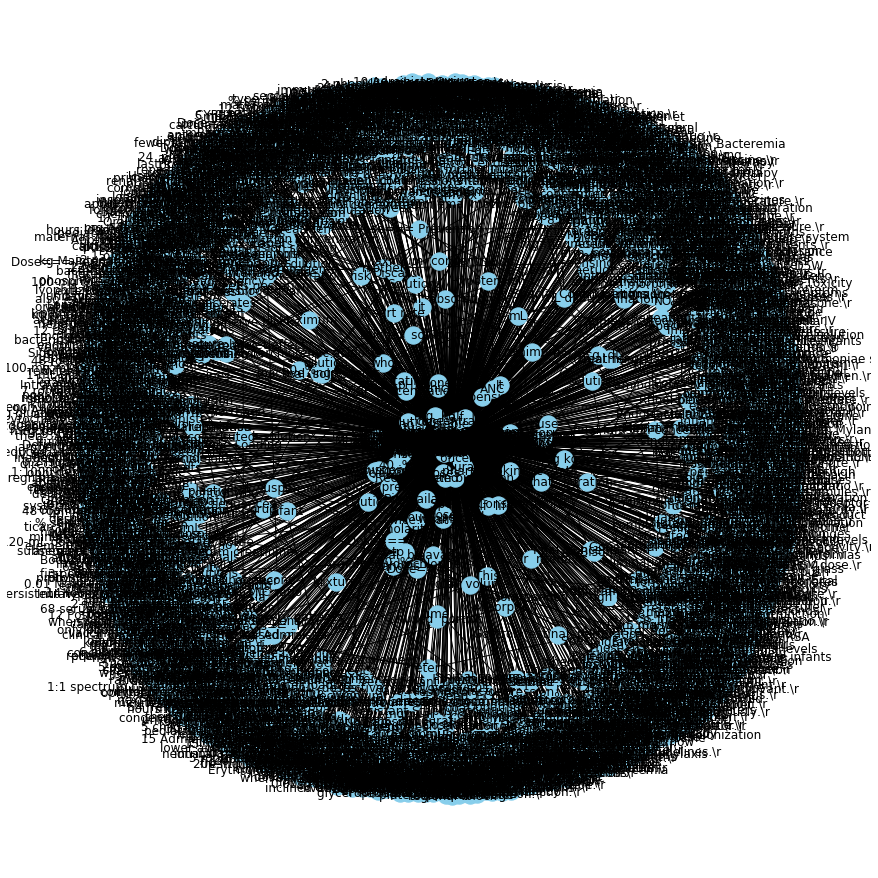

In [35]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

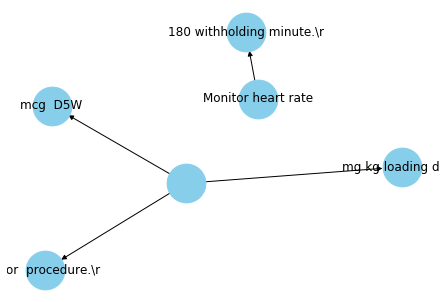

In [41]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="consider"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

#plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
#plt.show()

In [59]:
piano_class_doc = nlp(str(new_sent))
for ent in piano_class_doc.ents:
   print(ent.text, ent.start_char, ent.end_char,
           ent.label_, spacy.explain(ent.label_))


Monika 4 10 PERSON People, including fictional
28 years 27 35 DATE Absolute or relative dates or periods
34 74 76 CARDINAL Numerals that do not fall under another type


In [60]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
doc = nlp("San Francisco considers banning sidewalk delivery robots")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

doc = nlp("FB is hiring a new VP of global policy")
doc.ents = [Span(doc, 0, 1, label="ORG")]
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

San Francisco 0 13 GPE
FB 0 2 ORG


In [61]:
import spacy
import random

nlp = spacy.load("en_core_web_sm")
train_data = [("Uber blew through $1 million", {"entities": [(0, 4, "ORG")]})]

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    for i in range(10):
        random.shuffle(train_data)
        for text, annotations in train_data:
            nlp.update([text], [annotations], sgd=optimizer)
nlp.to_disk("/model")

In [ ]:
from spacy import displacy

doc_dep = nlp("This is a sentence.")
displacy.serve(doc_dep, style="dep")

doc_ent = nlp("When Sebastian Thrun started working on self-driving cars at Google "
              "in 2007, few people outside of the company took him seriously.")
displacy.serve(doc_ent, style="ent")

C:\Users\monika\Anaconda3\lib\runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


C:\Users\monika\Anaconda3\lib\runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

